In [3]:
#home 
#setwd("C://Users//Cherch//DataScience//project")

#work 
setwd("C://bb//DataScience//project")



#install.packages("openxlsx")
#install.packages("caret")

require("caret")
require("openxlsx")
require("tidyverse")
require(devtools)
library(dplyr)
library(car)


protocol<-read.xlsx("../project/BoxOffice - Data Retrieval Protocol.xlsx", sheet = "protocol")

head(protocol)

rownames(protocol) <- str_trim(protocol$Feature.name)

load("../data/BoxOffice_ff.RData")



Loading required package: caret

Loading required package: lattice

Loading required package: ggplot2

Loading required package: openxlsx

Loading required package: tidyverse

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v tibble  2.1.3     v purrr   0.3.2
v tidyr   0.8.3     v dplyr   0.8.3
v readr   1.3.1     v stringr 1.4.0
v tibble  2.1.3     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()

Loading required package: devtools

Loading required package: usethis

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some




Feature.name                       Source                              
1 movie_id                           movies                              
2 depart_Lighting_female             movie_crew LEFT OUTER JOIN crew_dim 
3 original_language                  movies                              
4 sw_collection                      movie_collection                    
5 depart_Visual_Effects_female       movie_crew LEFT OUTER JOIN crew_dim 
6 runtime_cat                        movies                              
  Value.type  Scale   Data.type Unique.count Measure.unit Conversion.factor Min
1 Categorical Nominal Decimal   NA           NA           NA                 1 
2 Numeric     Ratio   Decimal    2           NA           NA                 0 
3 Categorical Nominal Text      44           NA           NA                NA 
4 Categorical Ratio   Decimal    3           NA           NA                 0 
5 Numeric     Ratio   Decimal    3           NA           NA                 0 
6 Categorical Ordinal Text       3           NA           NA                 1 
  Max  Outlier.treatment Null
1 7398 NA                NA  
2    1 Null              NA  
3   NA Leave             NA  
4    2 Leave             NA  
5    2 Leave             NA  
6    3 Leave             NA  
  Notes                                                                           
1 NA                                                                              
2 NA                                                                              
3 NA                                                                              
4 Movies belongin to multiple collections look like an error (check movie_id= 555)
5 NA                                                                              
6 NA

In [18]:

outlierMatrix <- function(data,threshold=1.5) {
  vn <- names(data)
  outdata <- data.frame(row1=1:nrow(data))
  for(v in vn) {
    if(is.numeric(data[[v]])) {
      med<- median(data[[v]], na.rm = T)
      outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
      outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
      irq_level <- (outhigh - outlow) * threshold
      outlow <- outlow - irq_level
      outhigh <- outhigh +  irq_level
      mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
      outdata[v] <- mv
    } else {
      mv <- rep(0,nrow(data))
    }
  }
  outdata$row1 <- NULL
  return(outdata)
}

out<-outlierMatrix(movies,threshold = 1.5)


ocmovies<-movies


options(repr.plot.width = 16, repr.plot.height = 8)
par(mfrow=c(1,3), mar=c(3,2,2,2))

for(v in numerics) {
  #look on variable with some variability
    
    plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
    text(x = 0.5, y = 0.5, v, 
         cex = 1.6, col = "black")
    
    hist(movies[[v]], freq = FALSE, xlab = v,  main = "With Outliers")
    
    #barplot(table(movies[[v]]))
    
    scatterplot(movies[['revenue']] ~ movies[[v]] | out[[v]], 
                      xlab=v, ylab="Revenue",
                      main=paste(v, "before outliers cleaup"))
    abline(lm(ocmovies$revenue ~ movies[[v]]), col = 'green')
    
    
    
    
    
    ##############################
    #Handle outliers
    ##############################

    
    if (protocol[v,"Outlier.treatment"] == "Leave"){
      
      print("Do nothing")
      
    } else if (protocol[v,"Outlier.treatment"] == "Null"){
      
      #drop outlier value (replace by NA)
      ocmovies[which(out[v] == 1), v]<-NA
      
    } else if (protocol[v,"Outlier.treatment"] == "Log"){
      
      ocmovies[[v]]<-log(ocmovies[[v]])
      
    } else if (protocol[v,"Outlier.treatment"] == "Mean"){
      
      ocmovies[which(out[v] == 1), v]<-mean(ocmovies[[v]])
      
    } else if (protocol[v,"Outlier.treatment"] == "Sqrt"){
      
      ocmovies[[v]]<-sqrt(ocmovies[[v]])
    }
    
    
    print(protocol[v,"Notes"])
    
    
    
    
    
    #hist(ocmovies[[v]], freq = FALSE,xlab = v,  main = "Without Outliers")
    #lines(density(ocmovies[[v]], na.rm = TRUE))
    
    #plot(y = rcmovies$revenue, x = rcmovies[[v]], pch = 16, cex = 1.3, col = "blue", main = "Distribution against Revenure(with Outliers)", xlab = v, ylab = "revenue")
    #abline(lm(rcmovies$revenue ~ rcmovies[[v]]))

    #plot(y = ocmovies$revenue, x = ocmovies[[v]], pch = 16, cex = 1.3, col = "blue", main = "Distribution against Revenure(without Outliers)", xlab = v, ylab = "revenue")
    #abline(lm(ocmovies$revenue ~ ocmovies[[v]]))
  
    #print(paste("T-Test of",v))
    #res<-t.test(ocmovies[[v]], rcmovies[[v]])

    #print(res)
    
}
par(mfrow=c(1,1))

ERROR: Error in ok_device(filename, ...): too many open devices


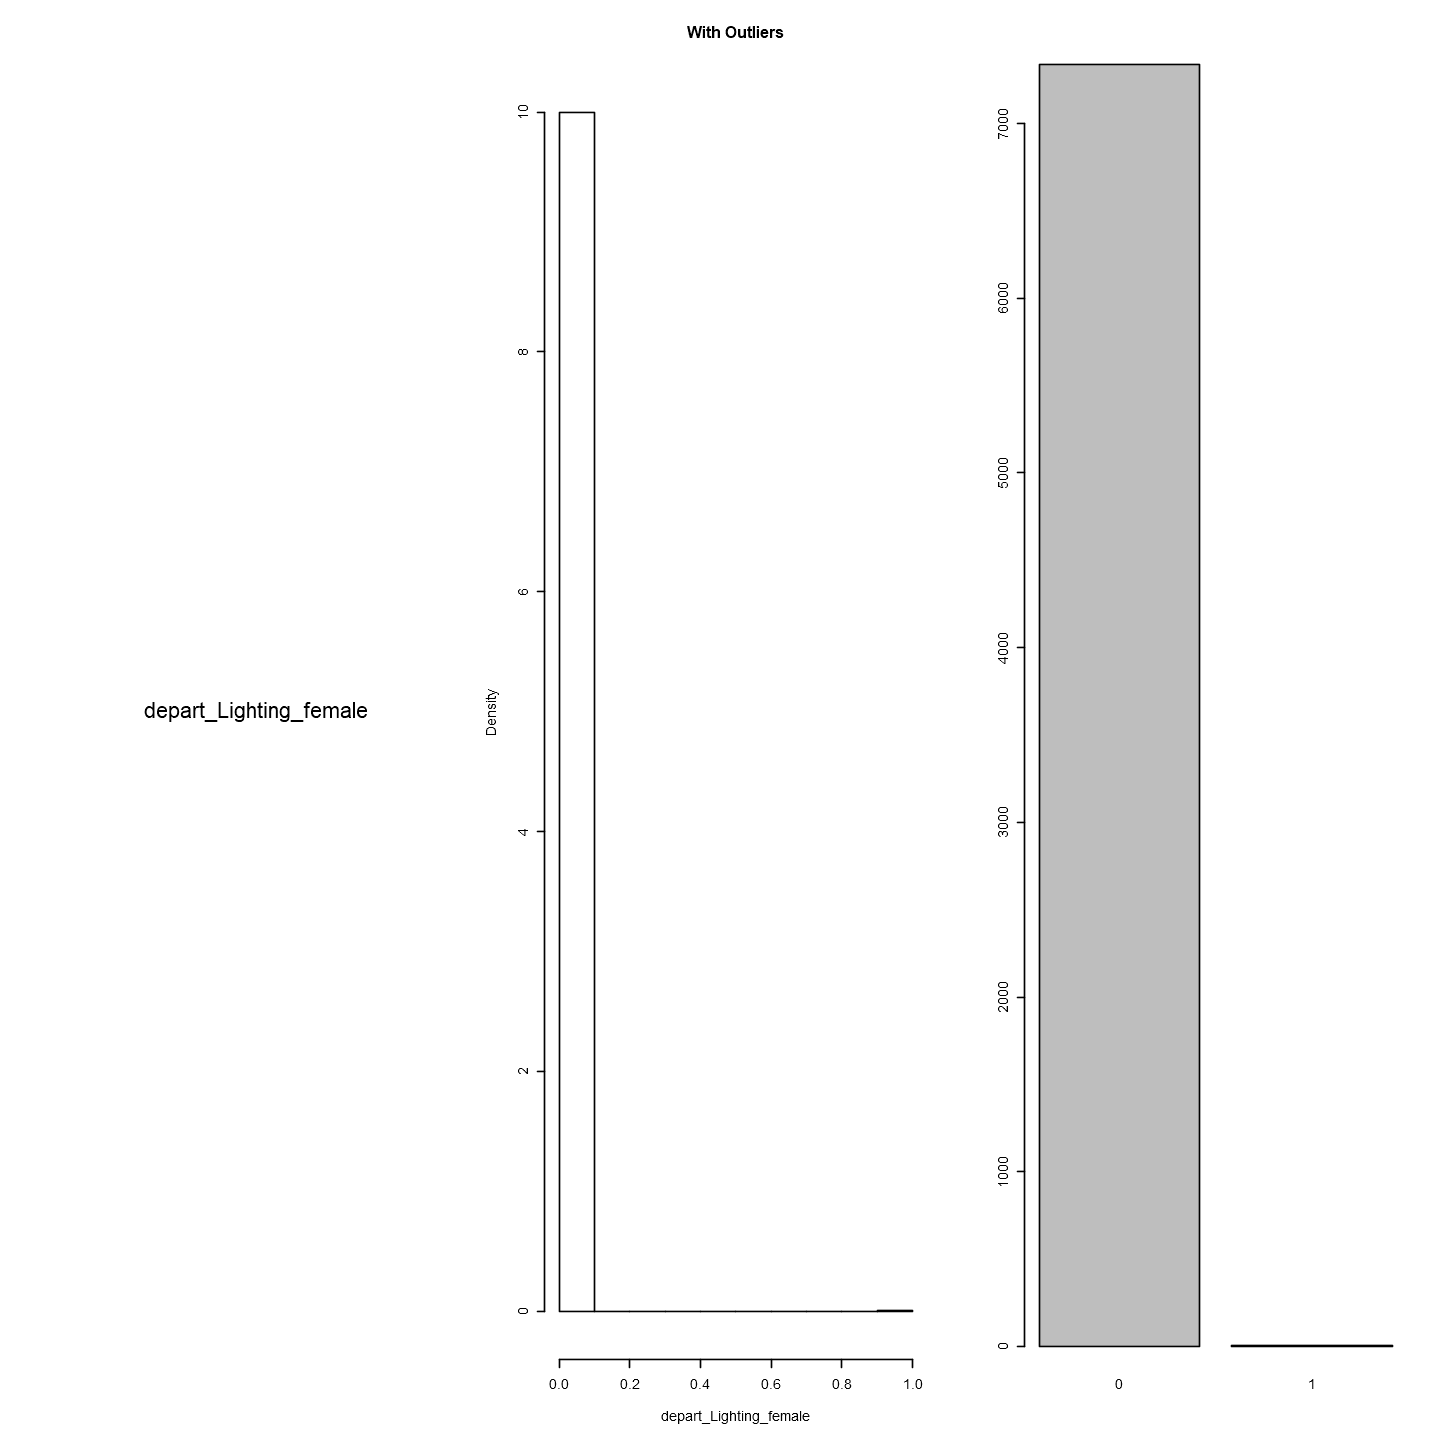

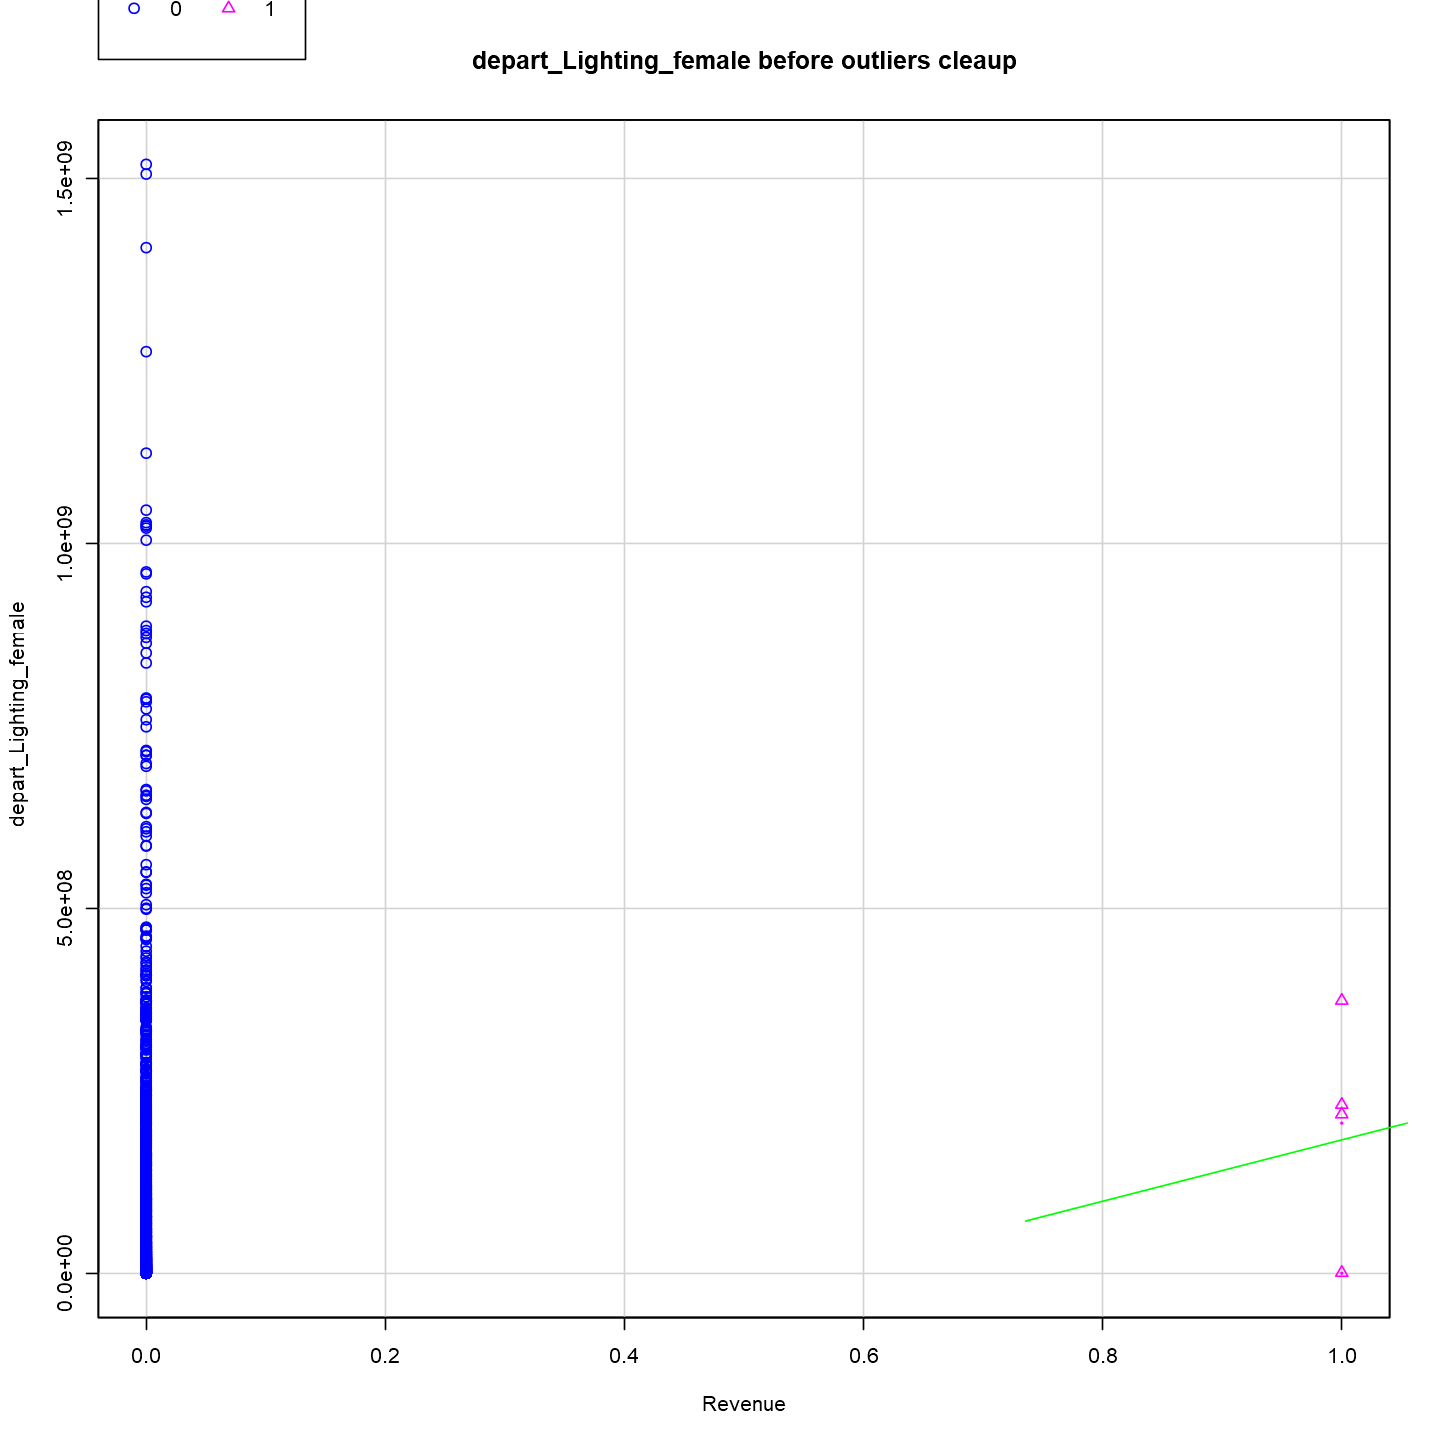

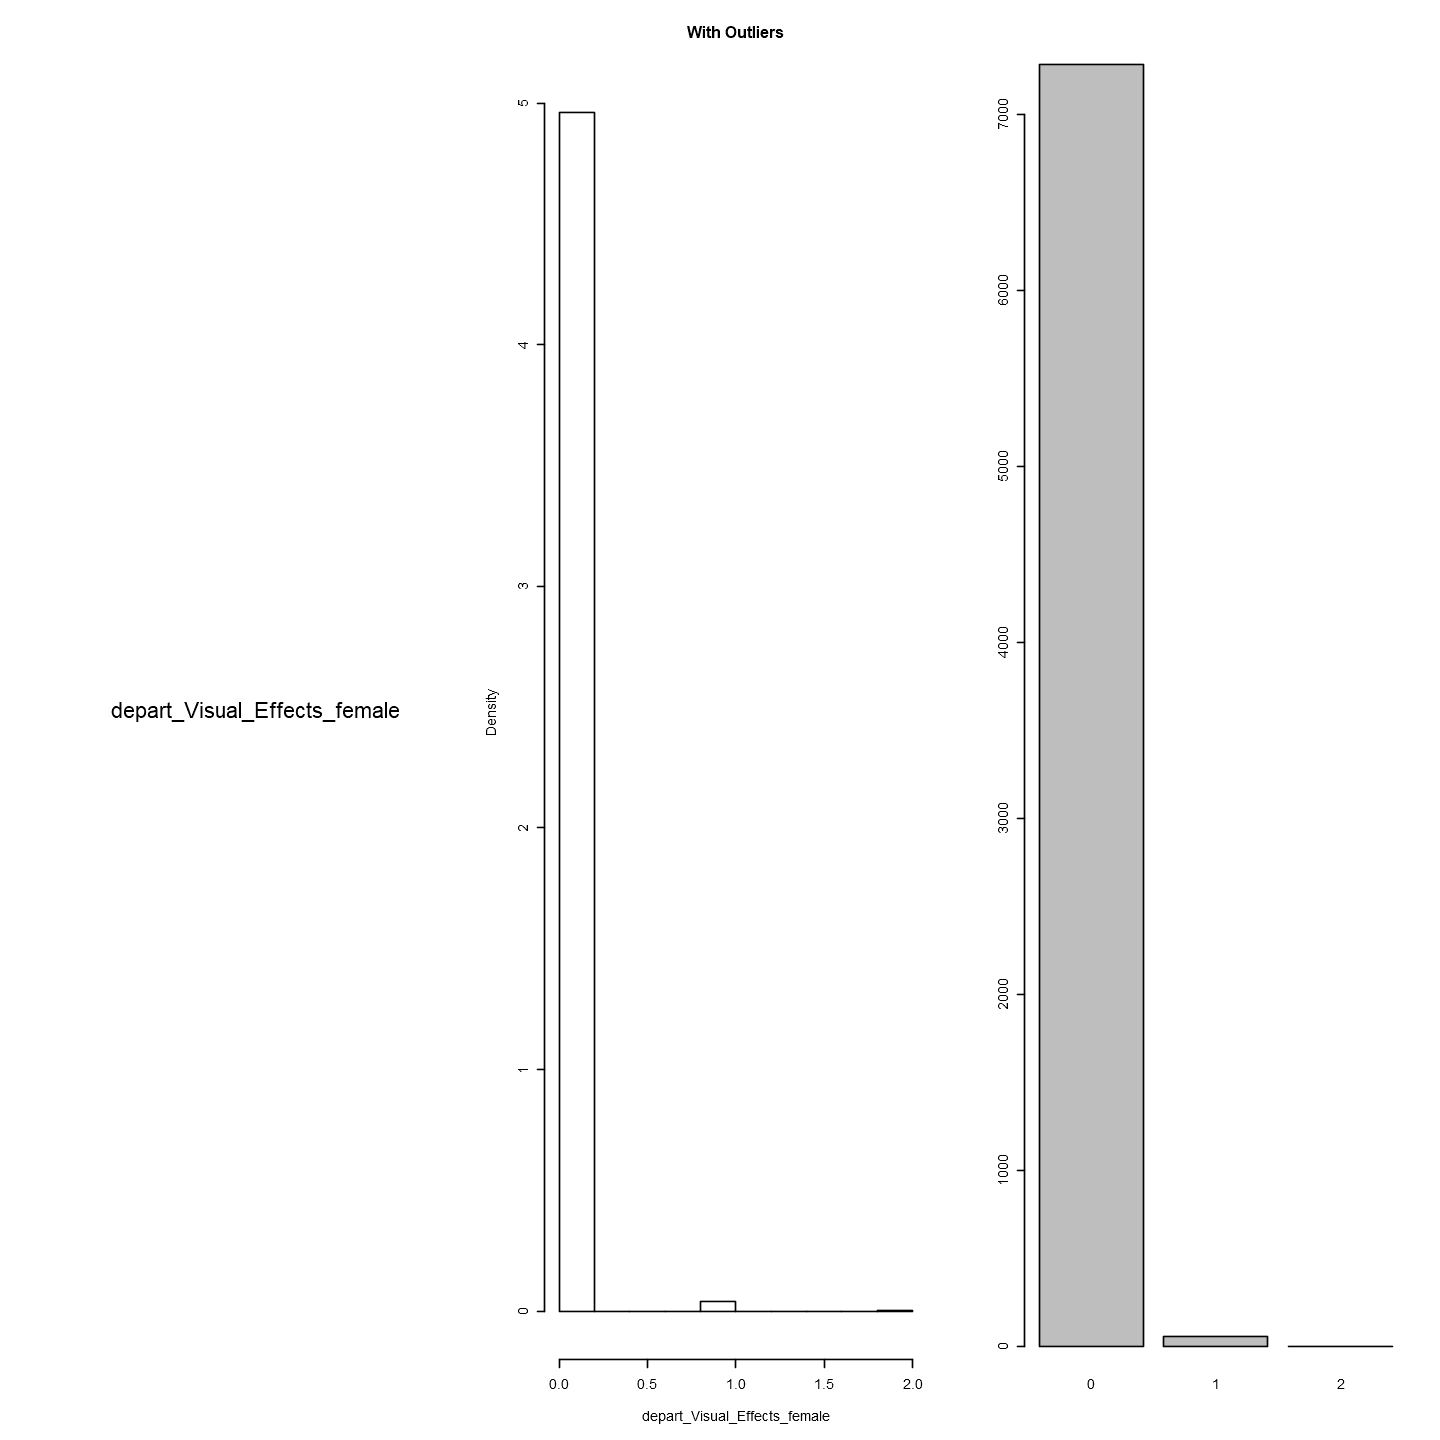

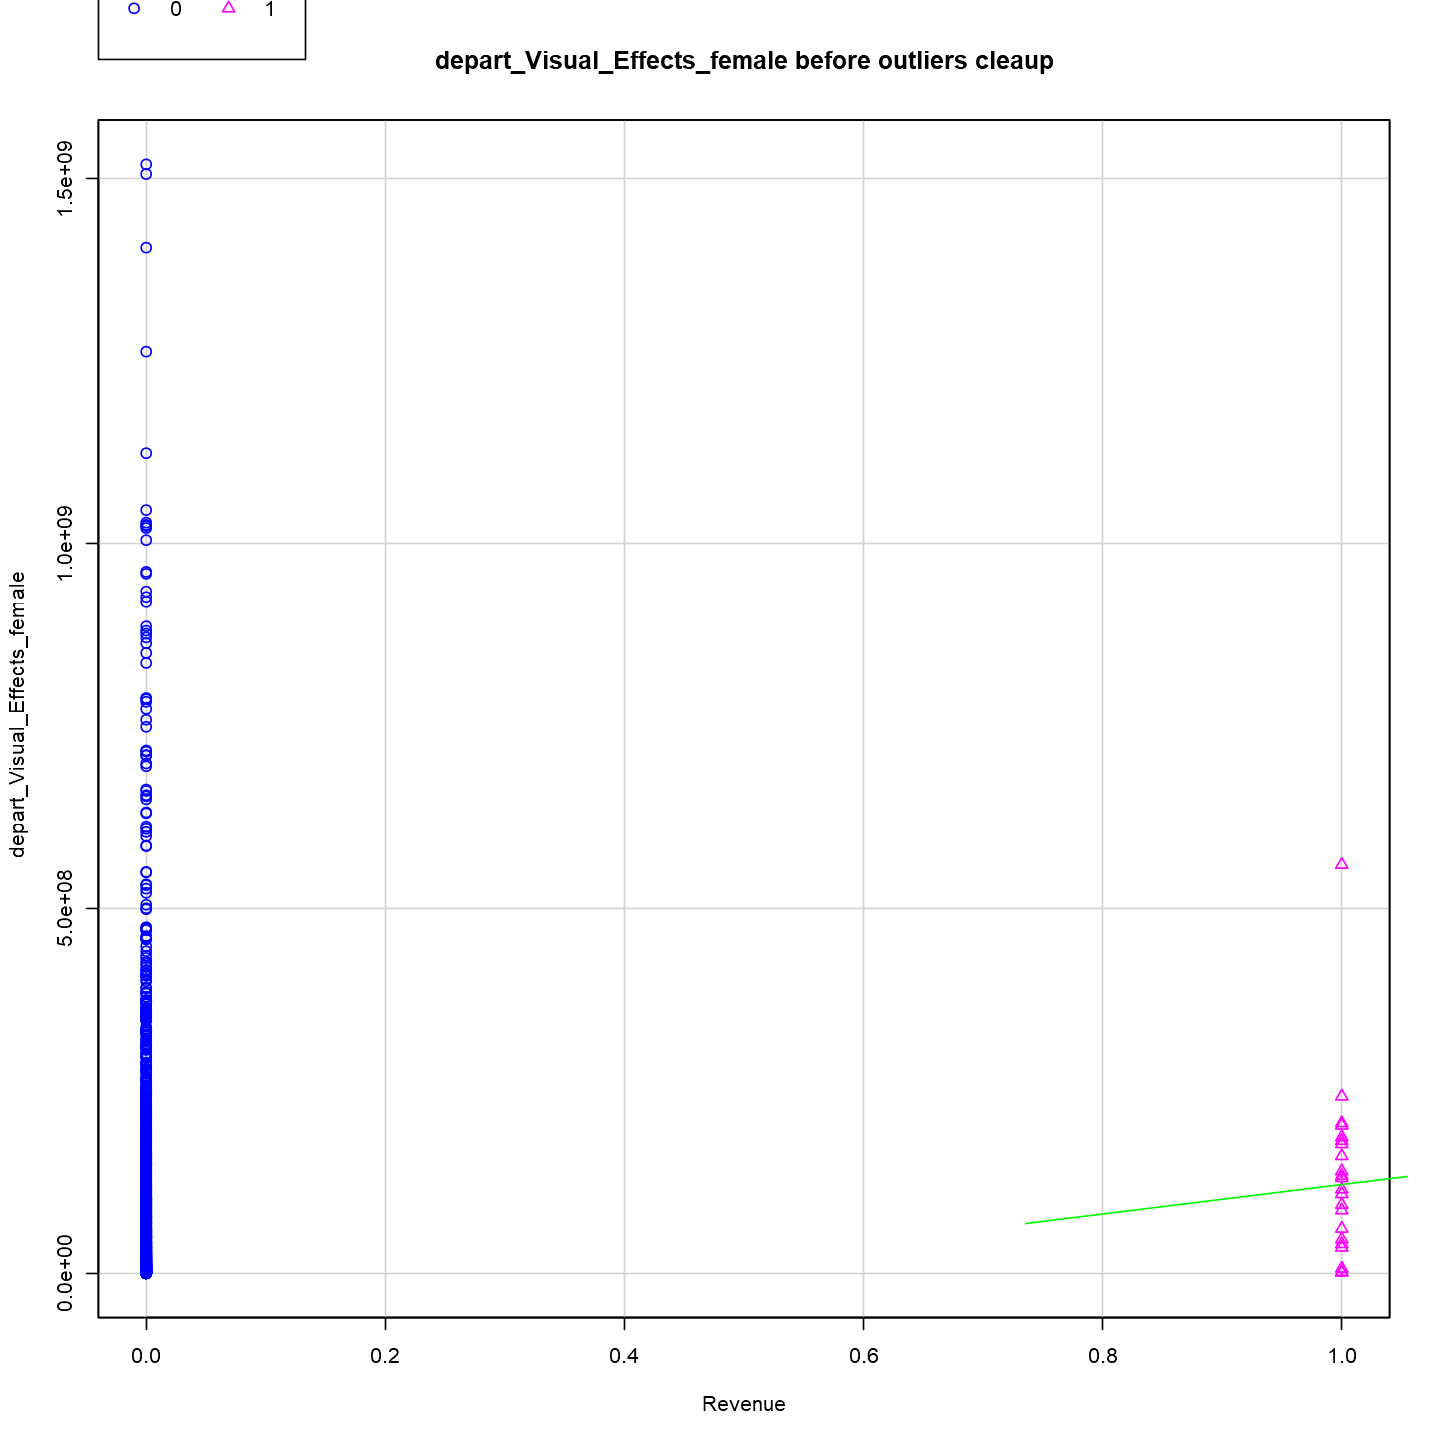

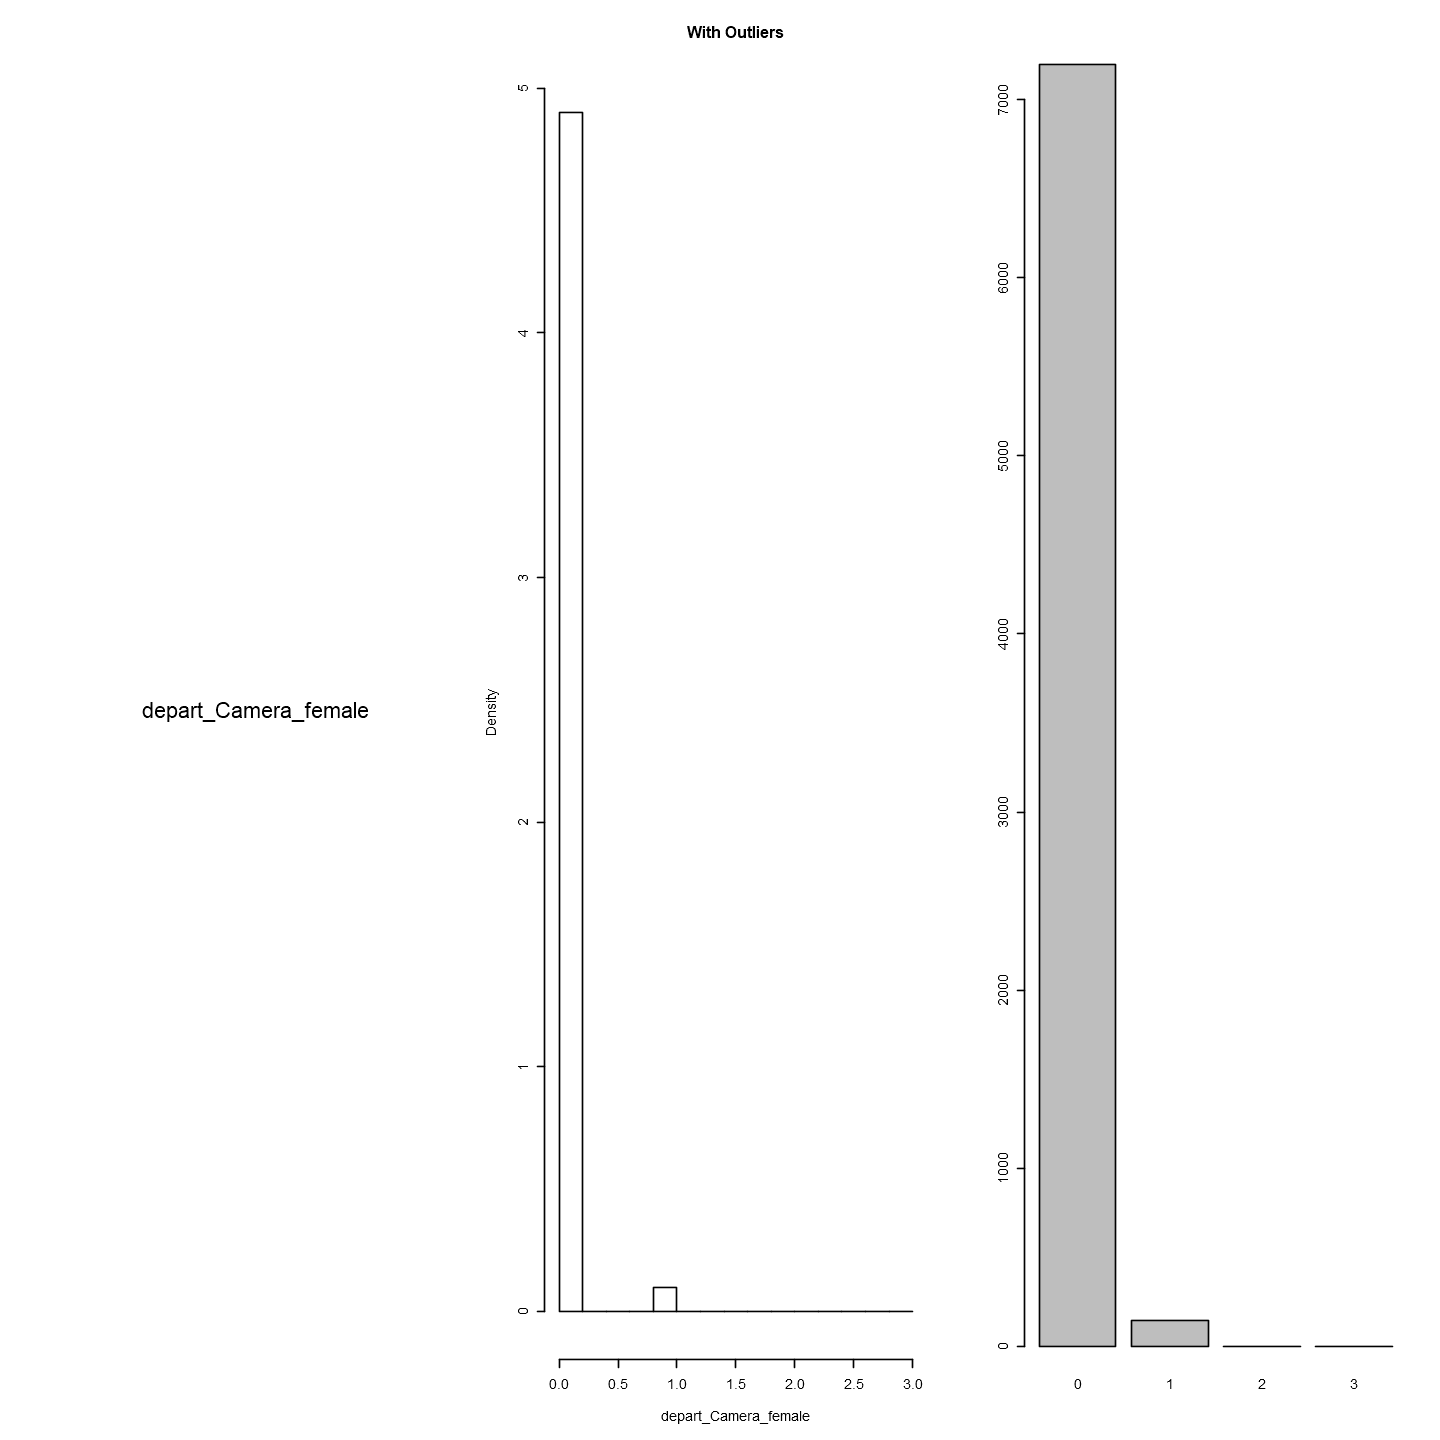

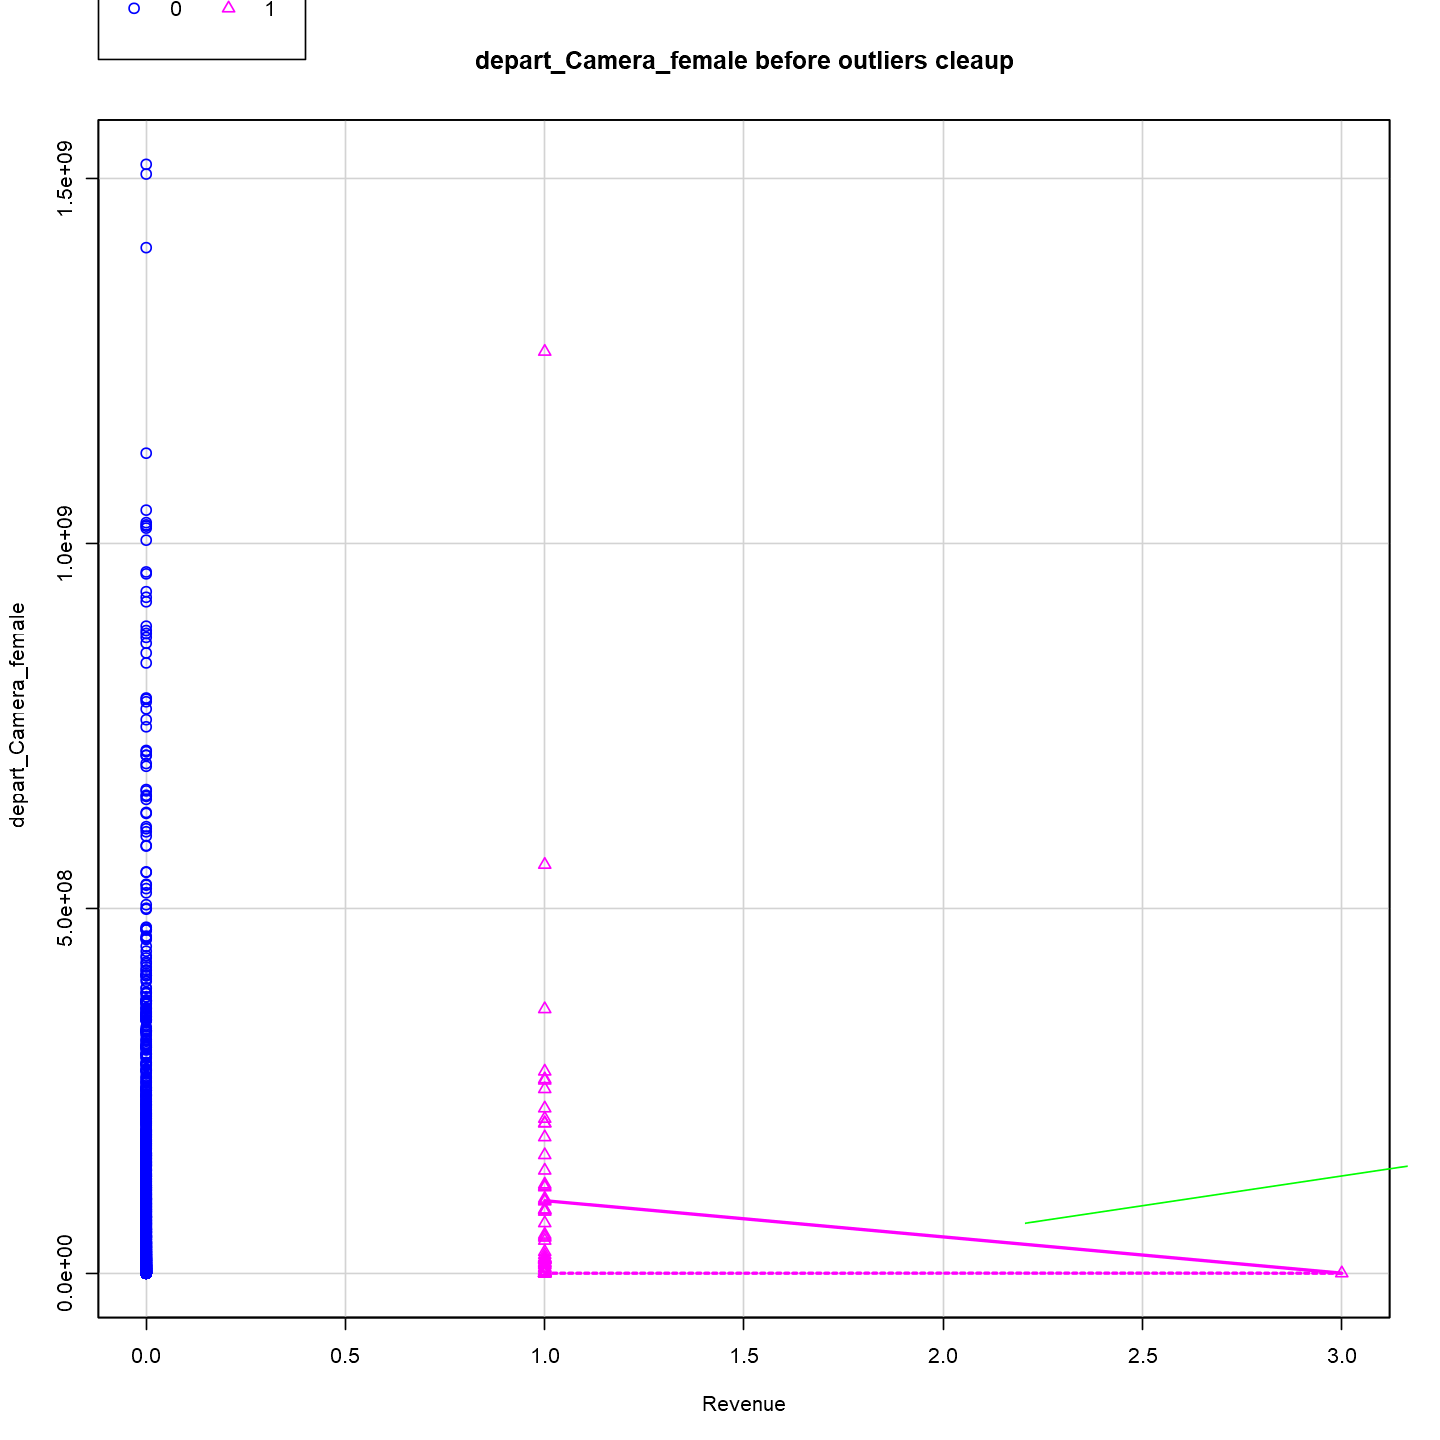

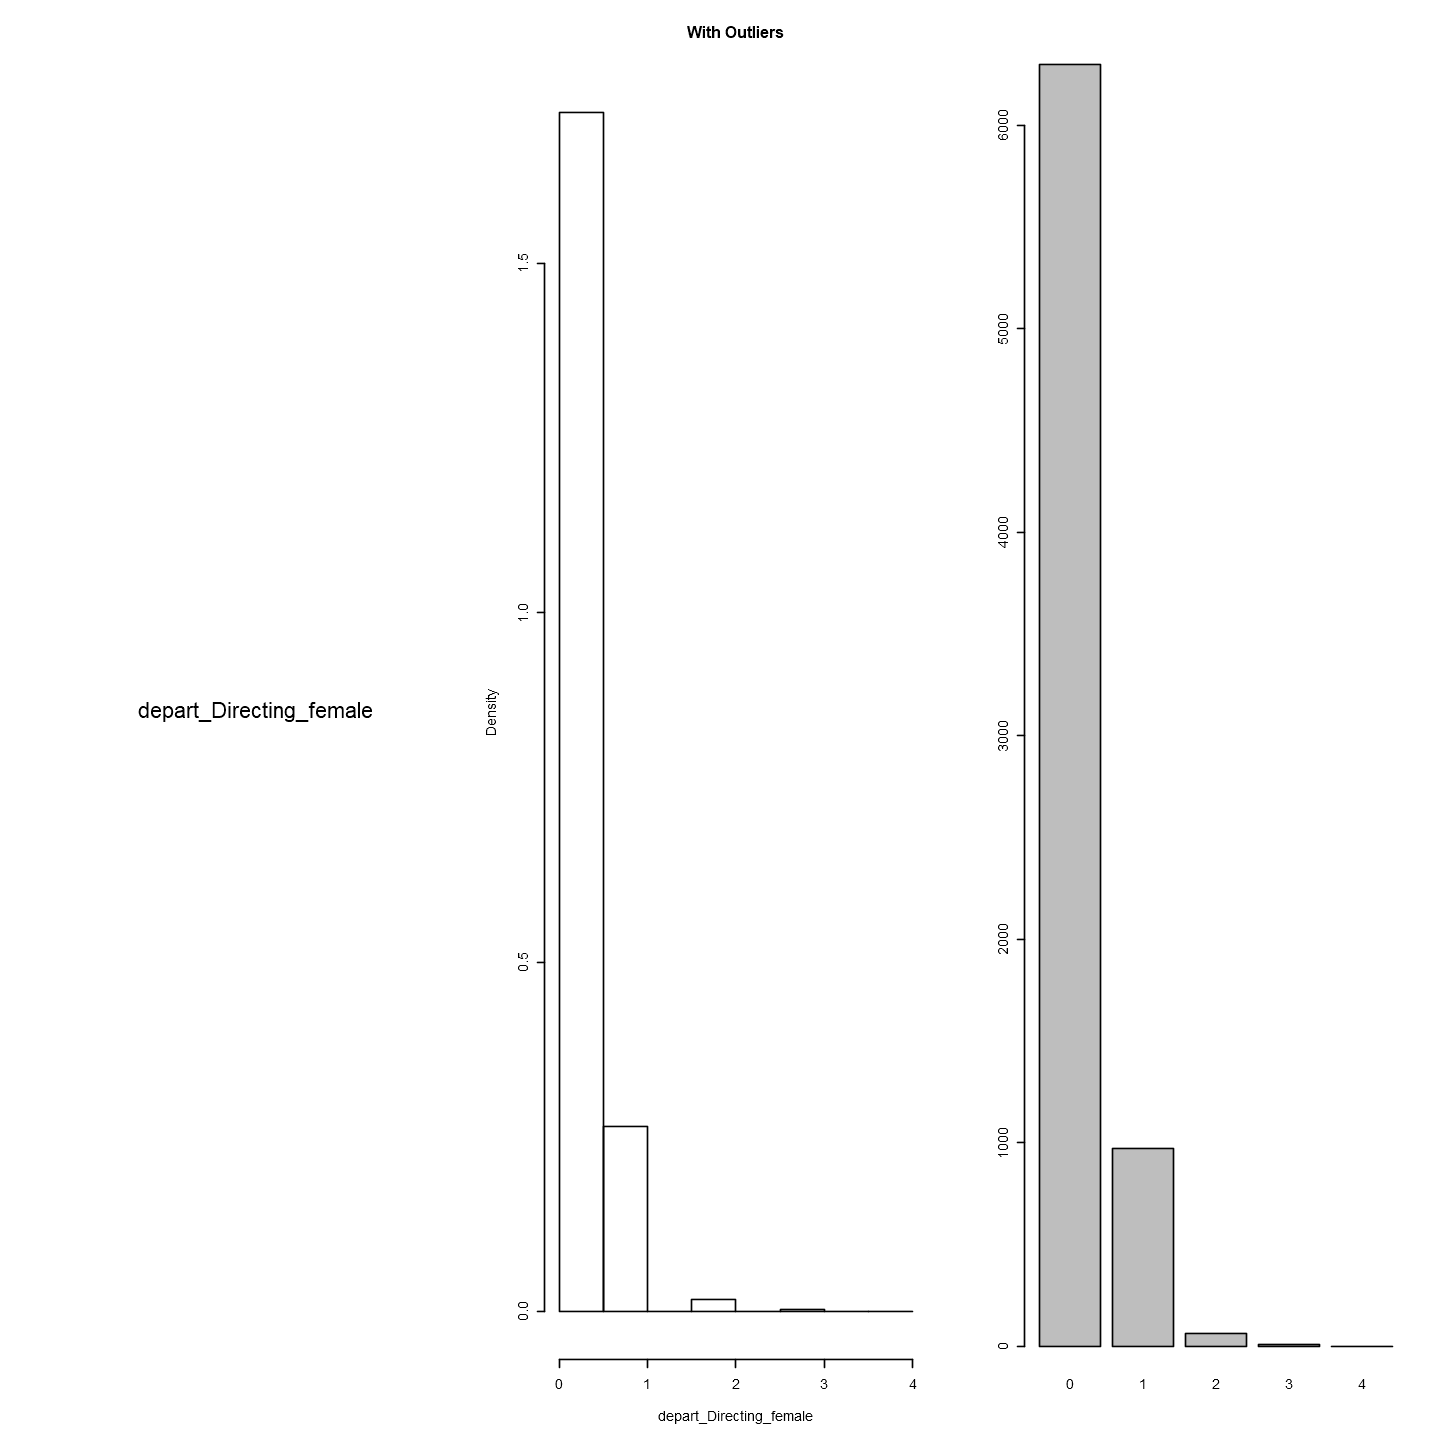

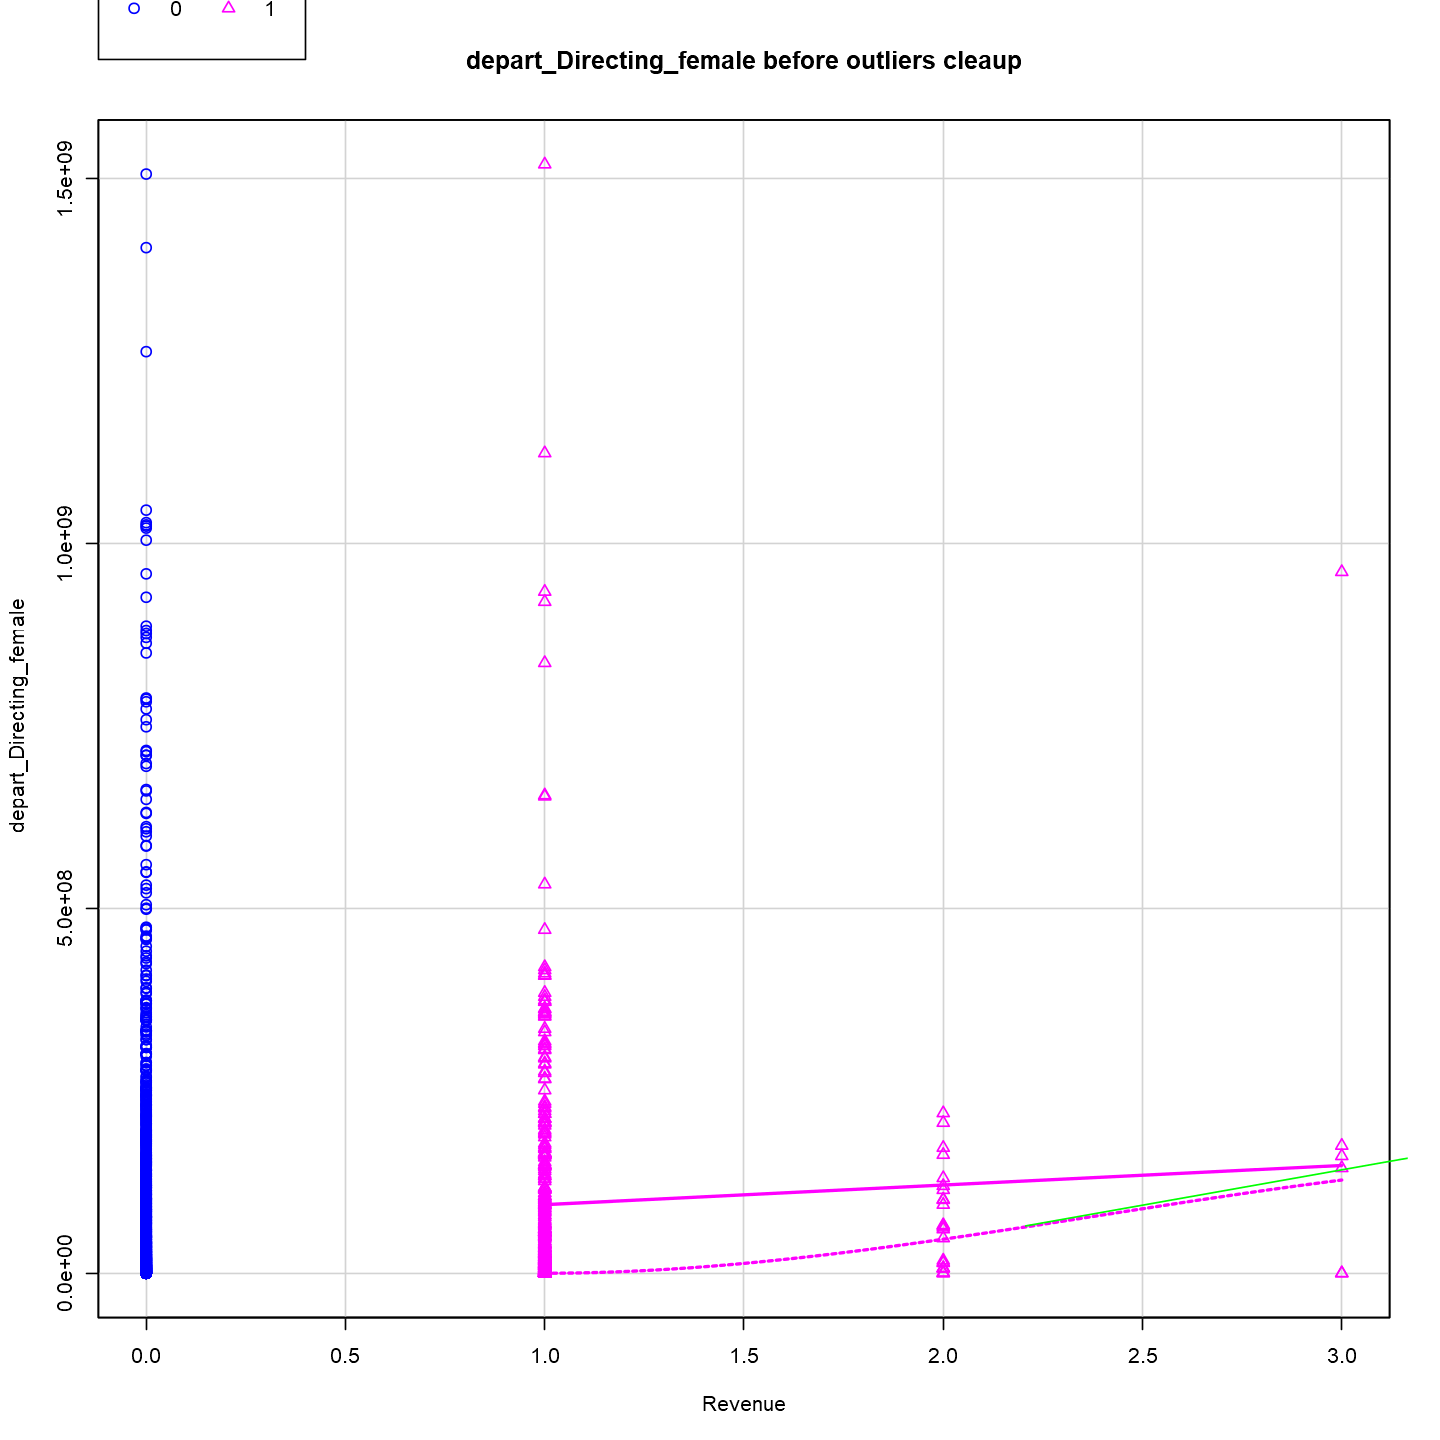

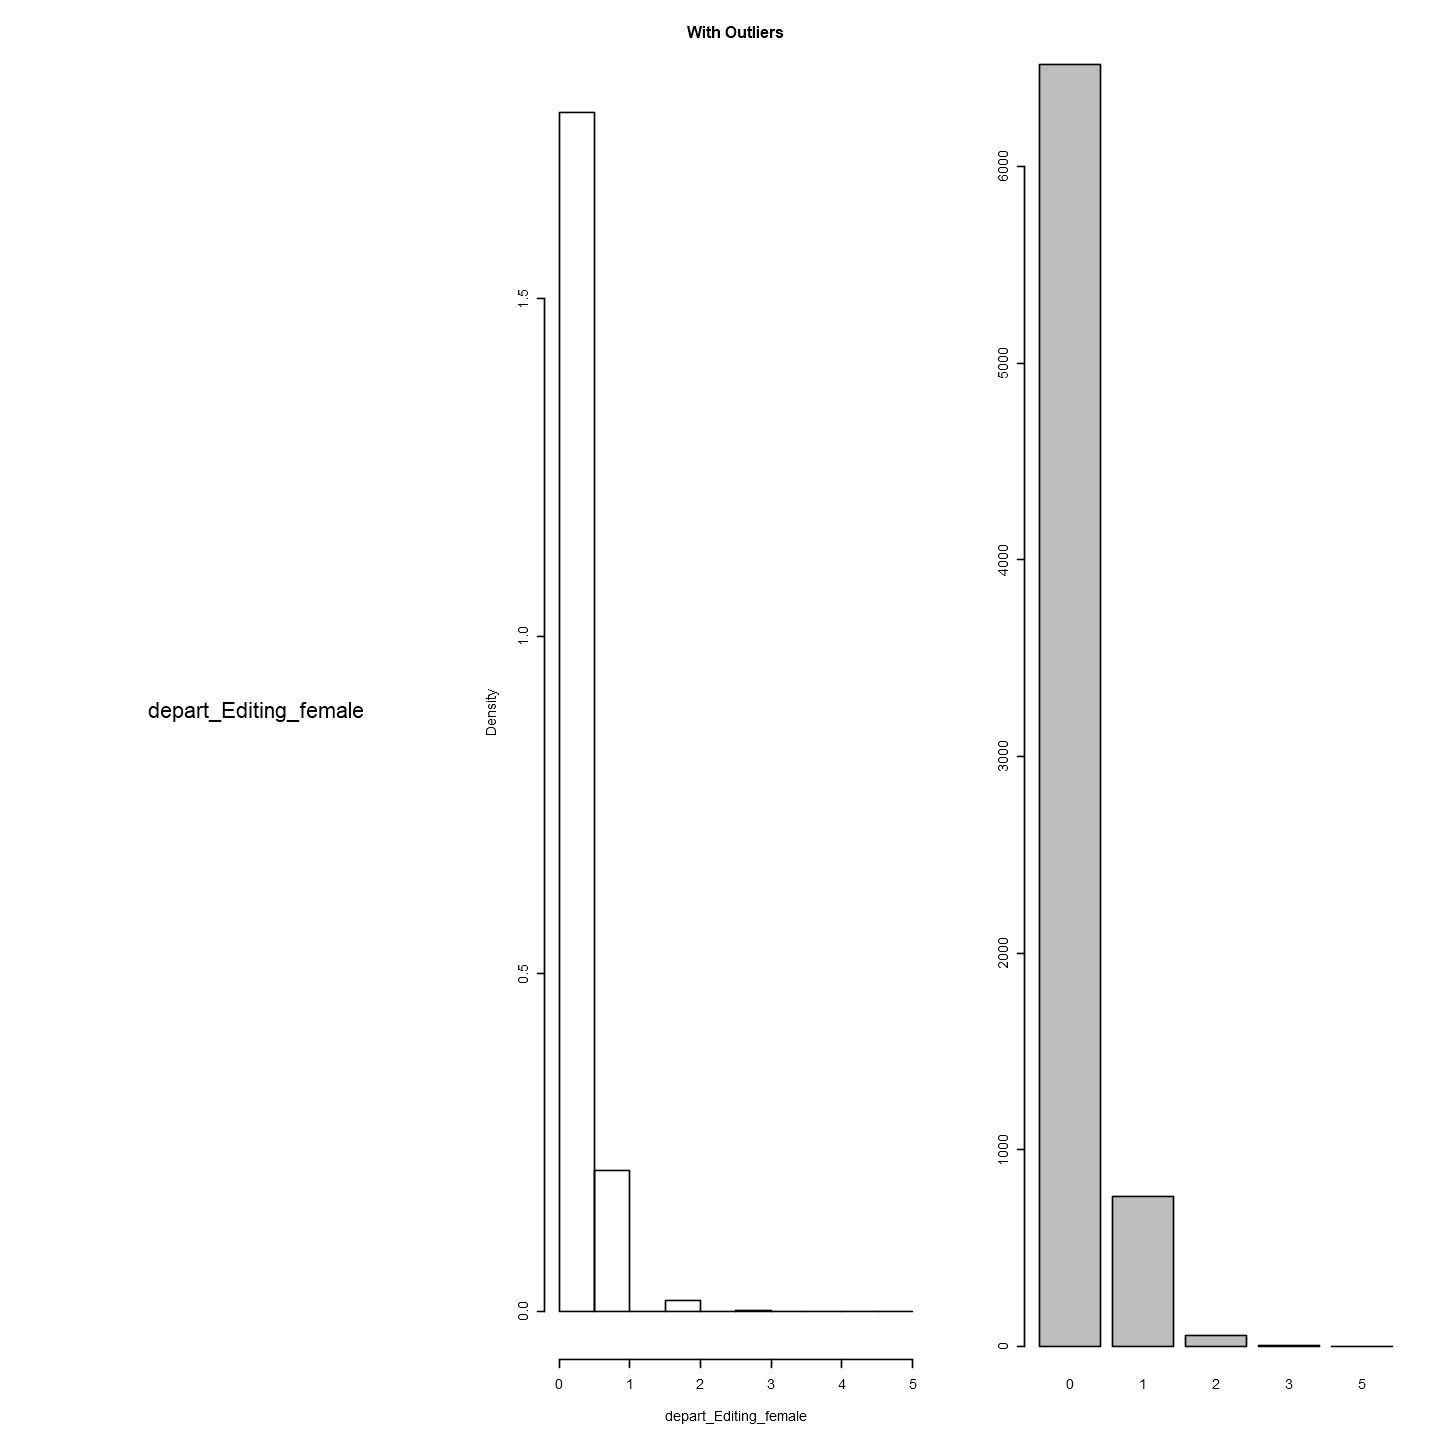

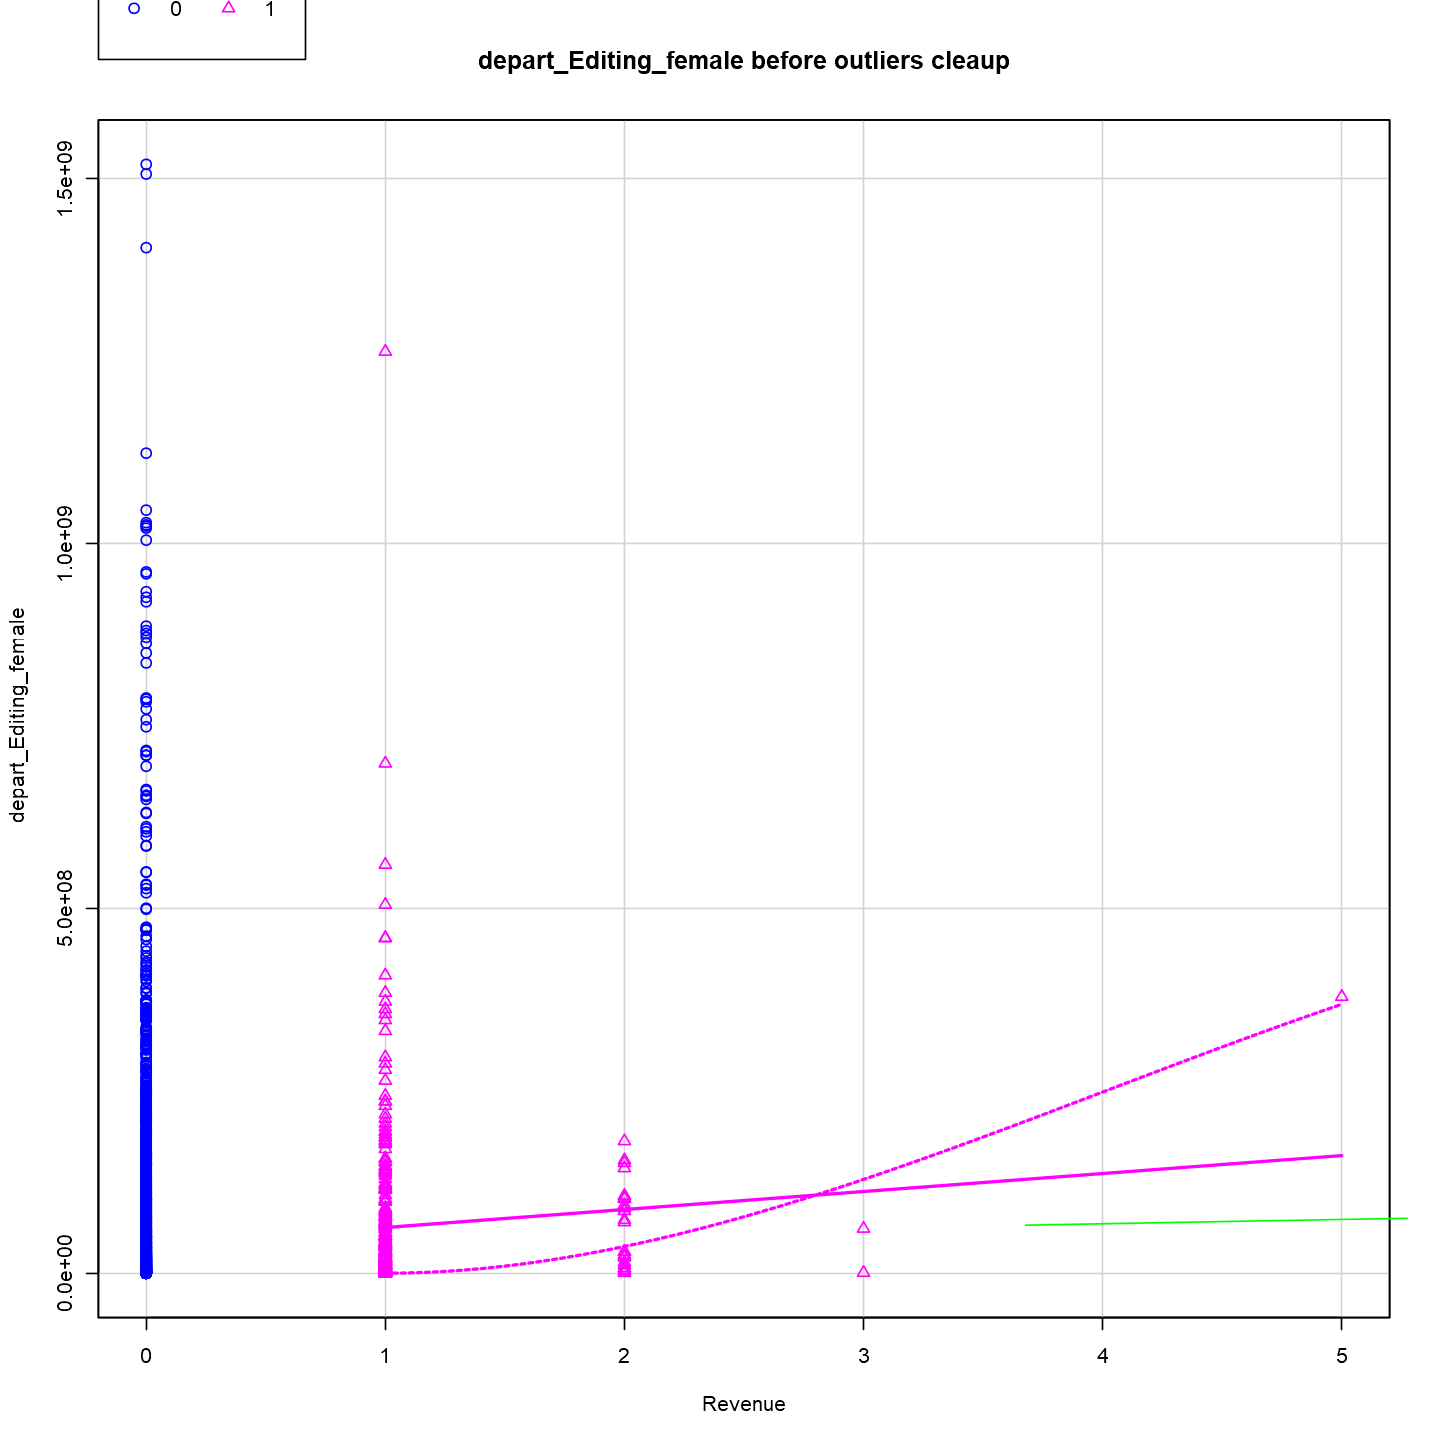

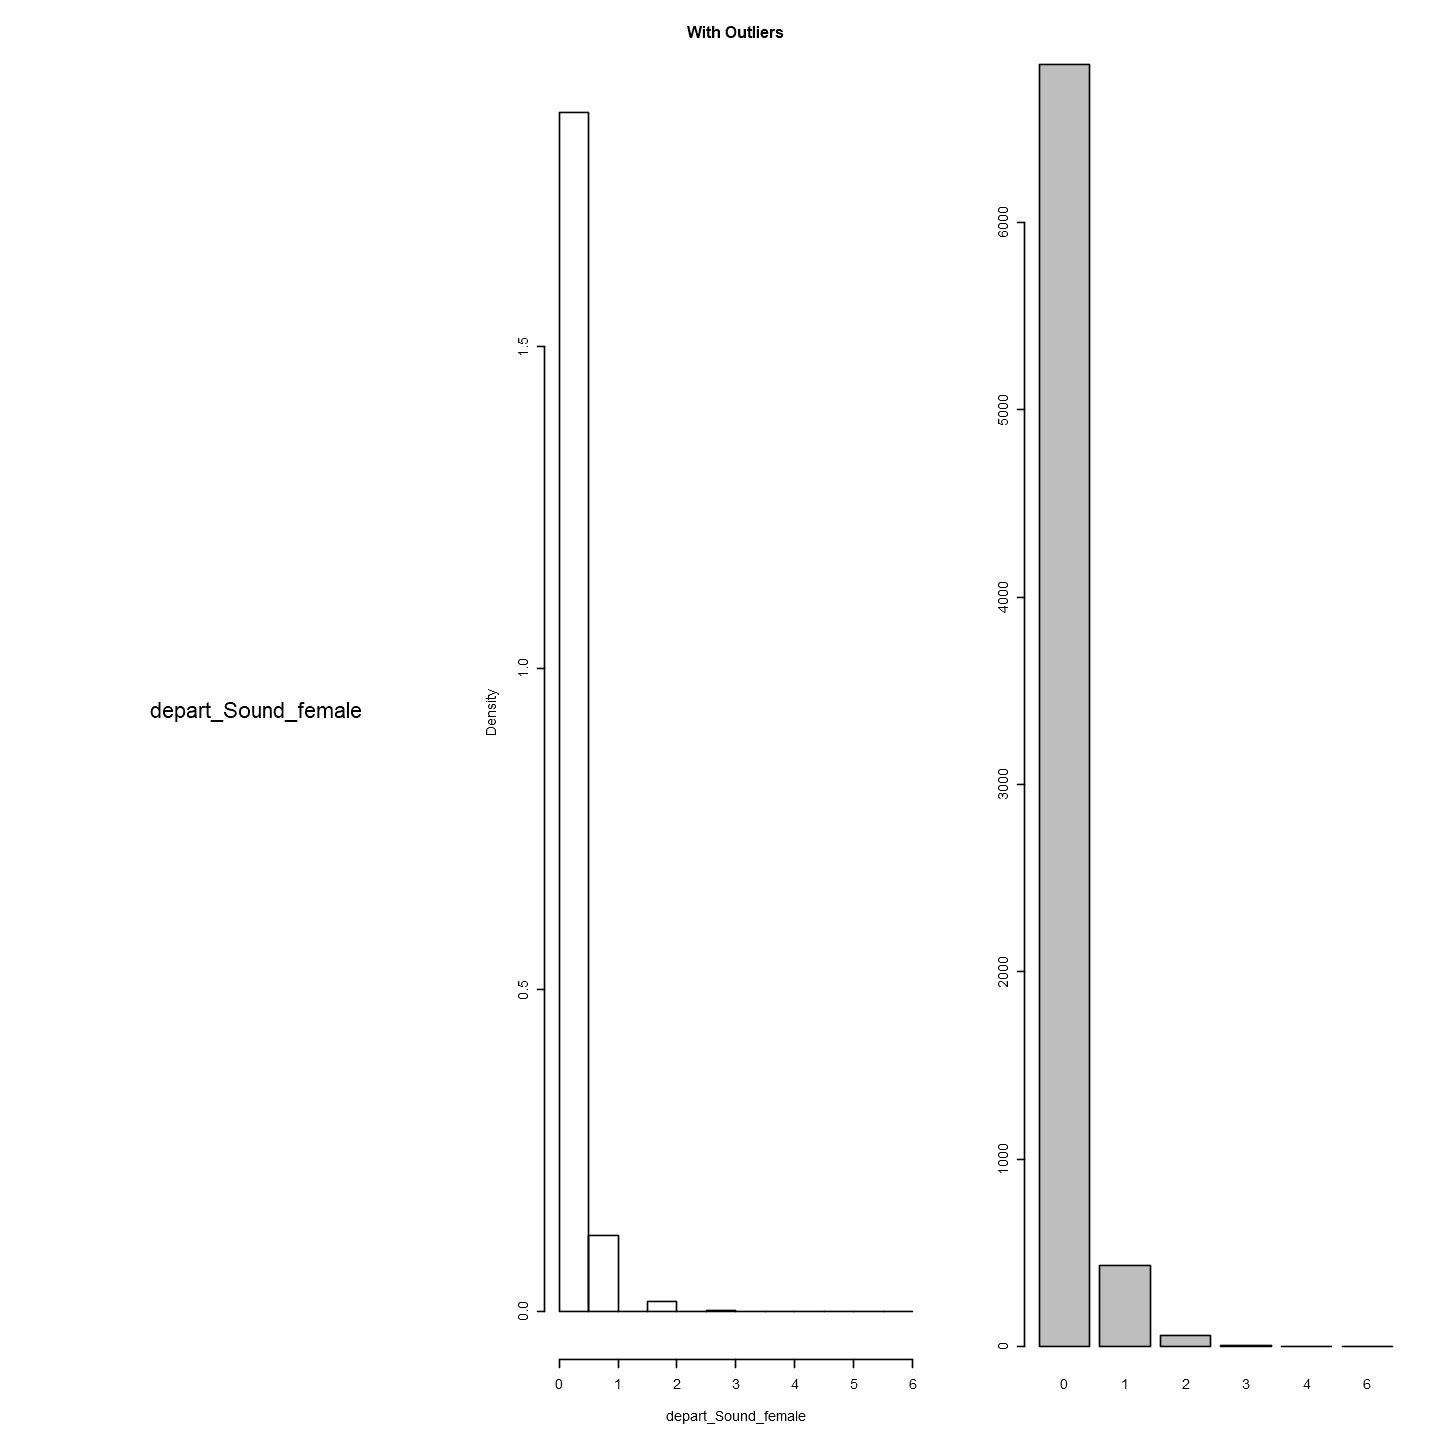

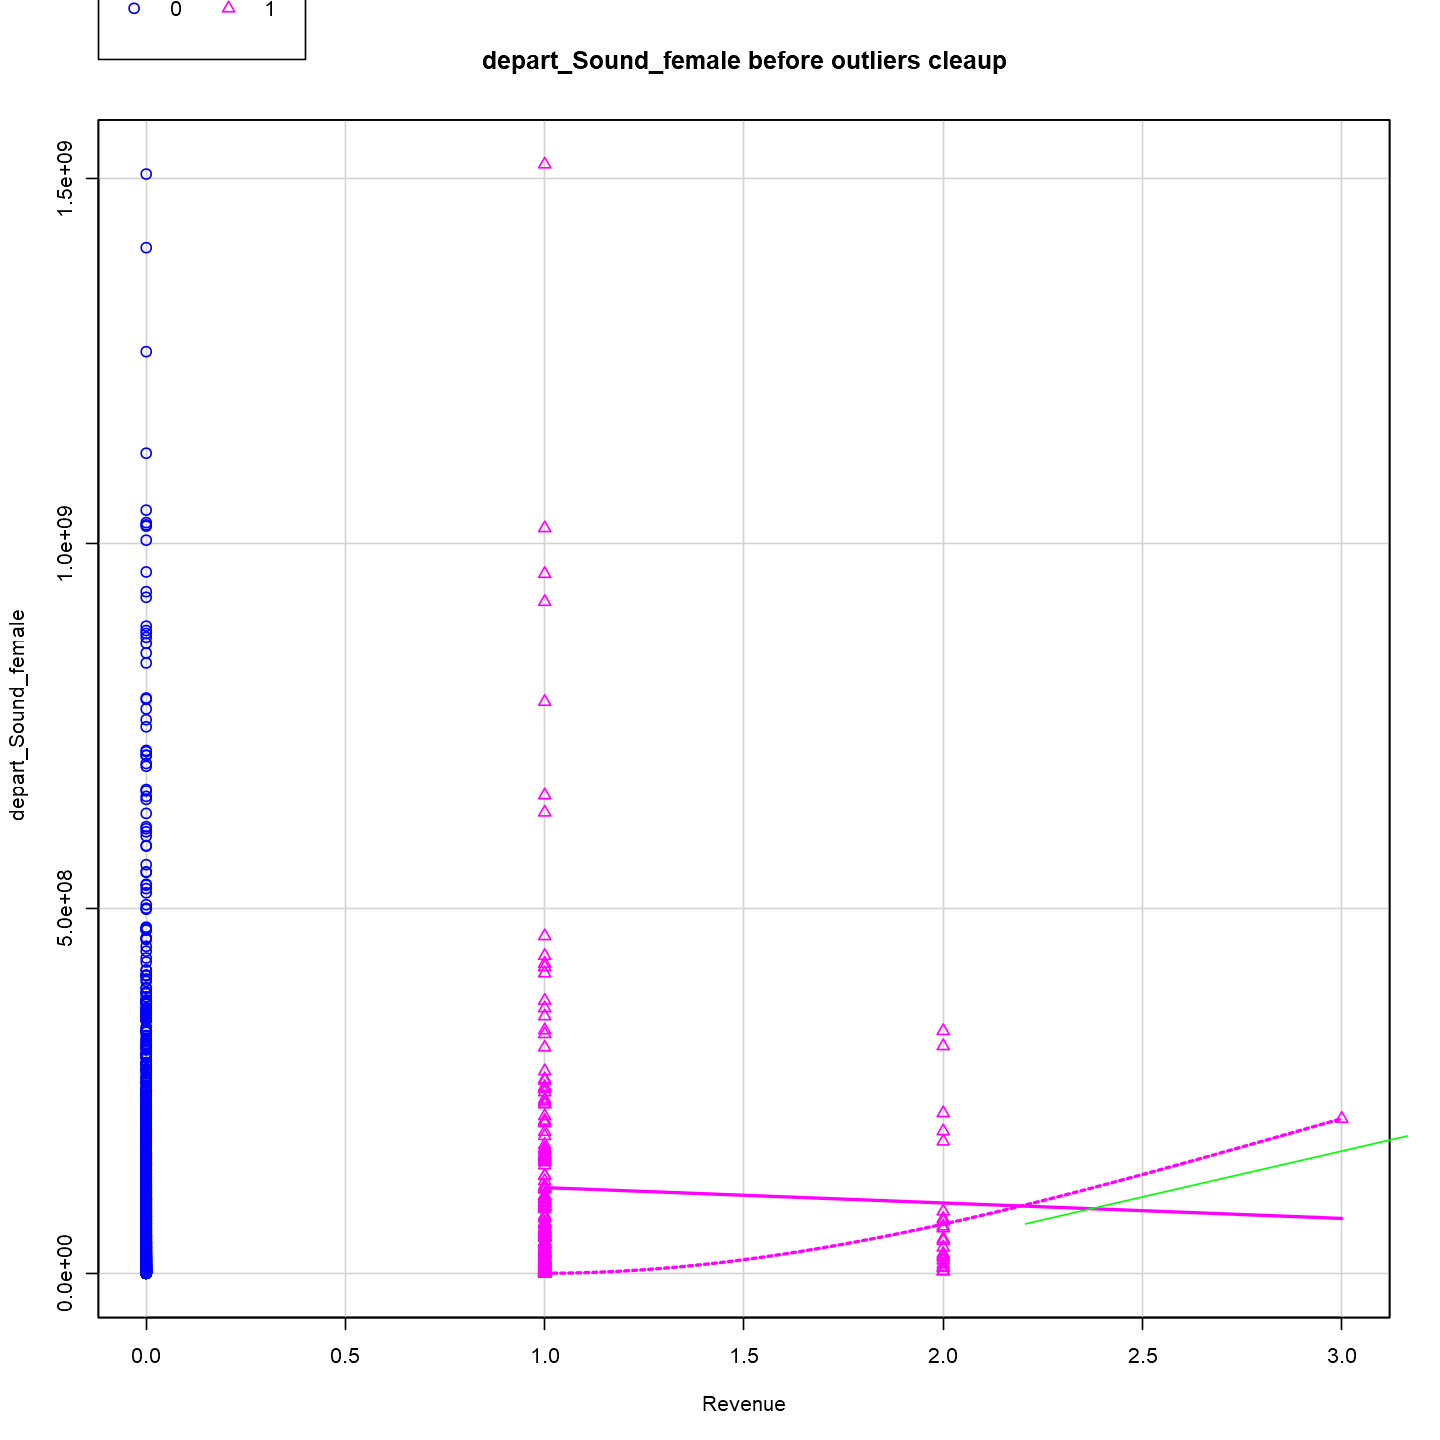

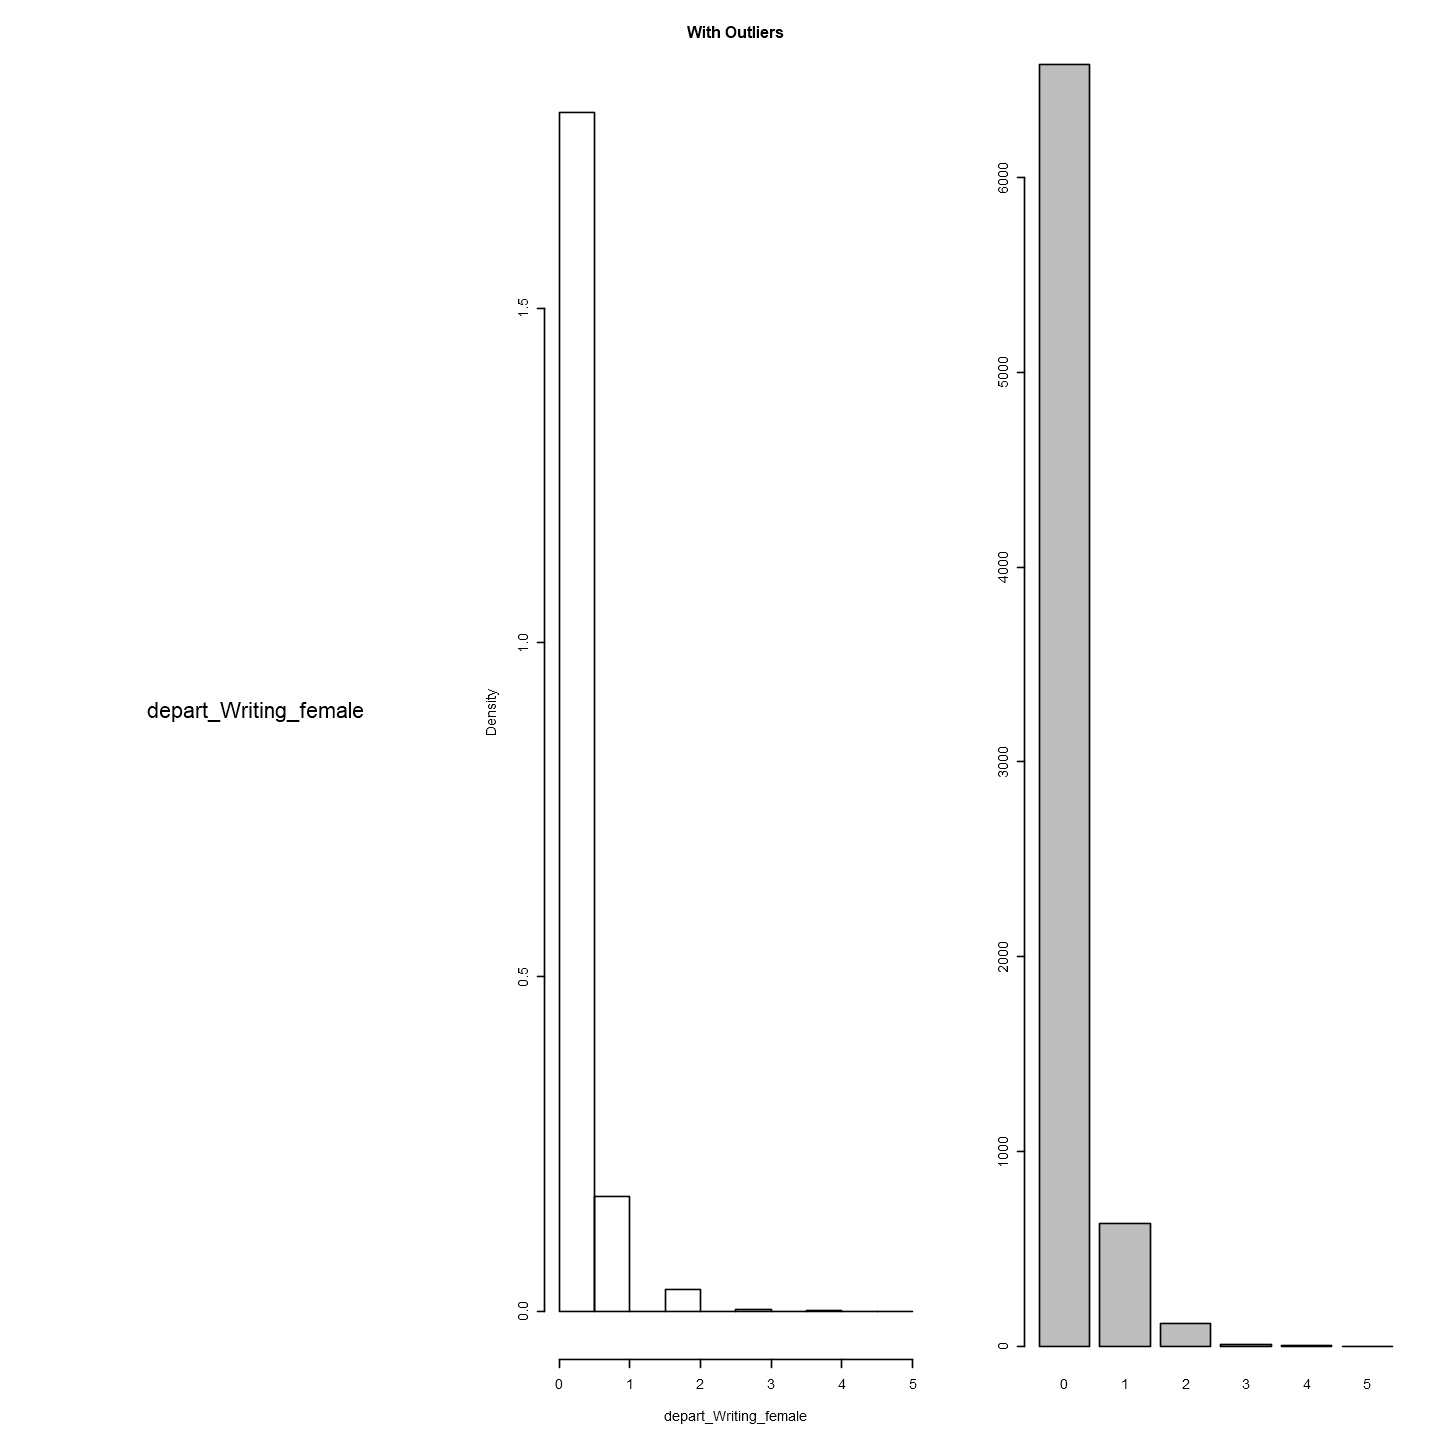

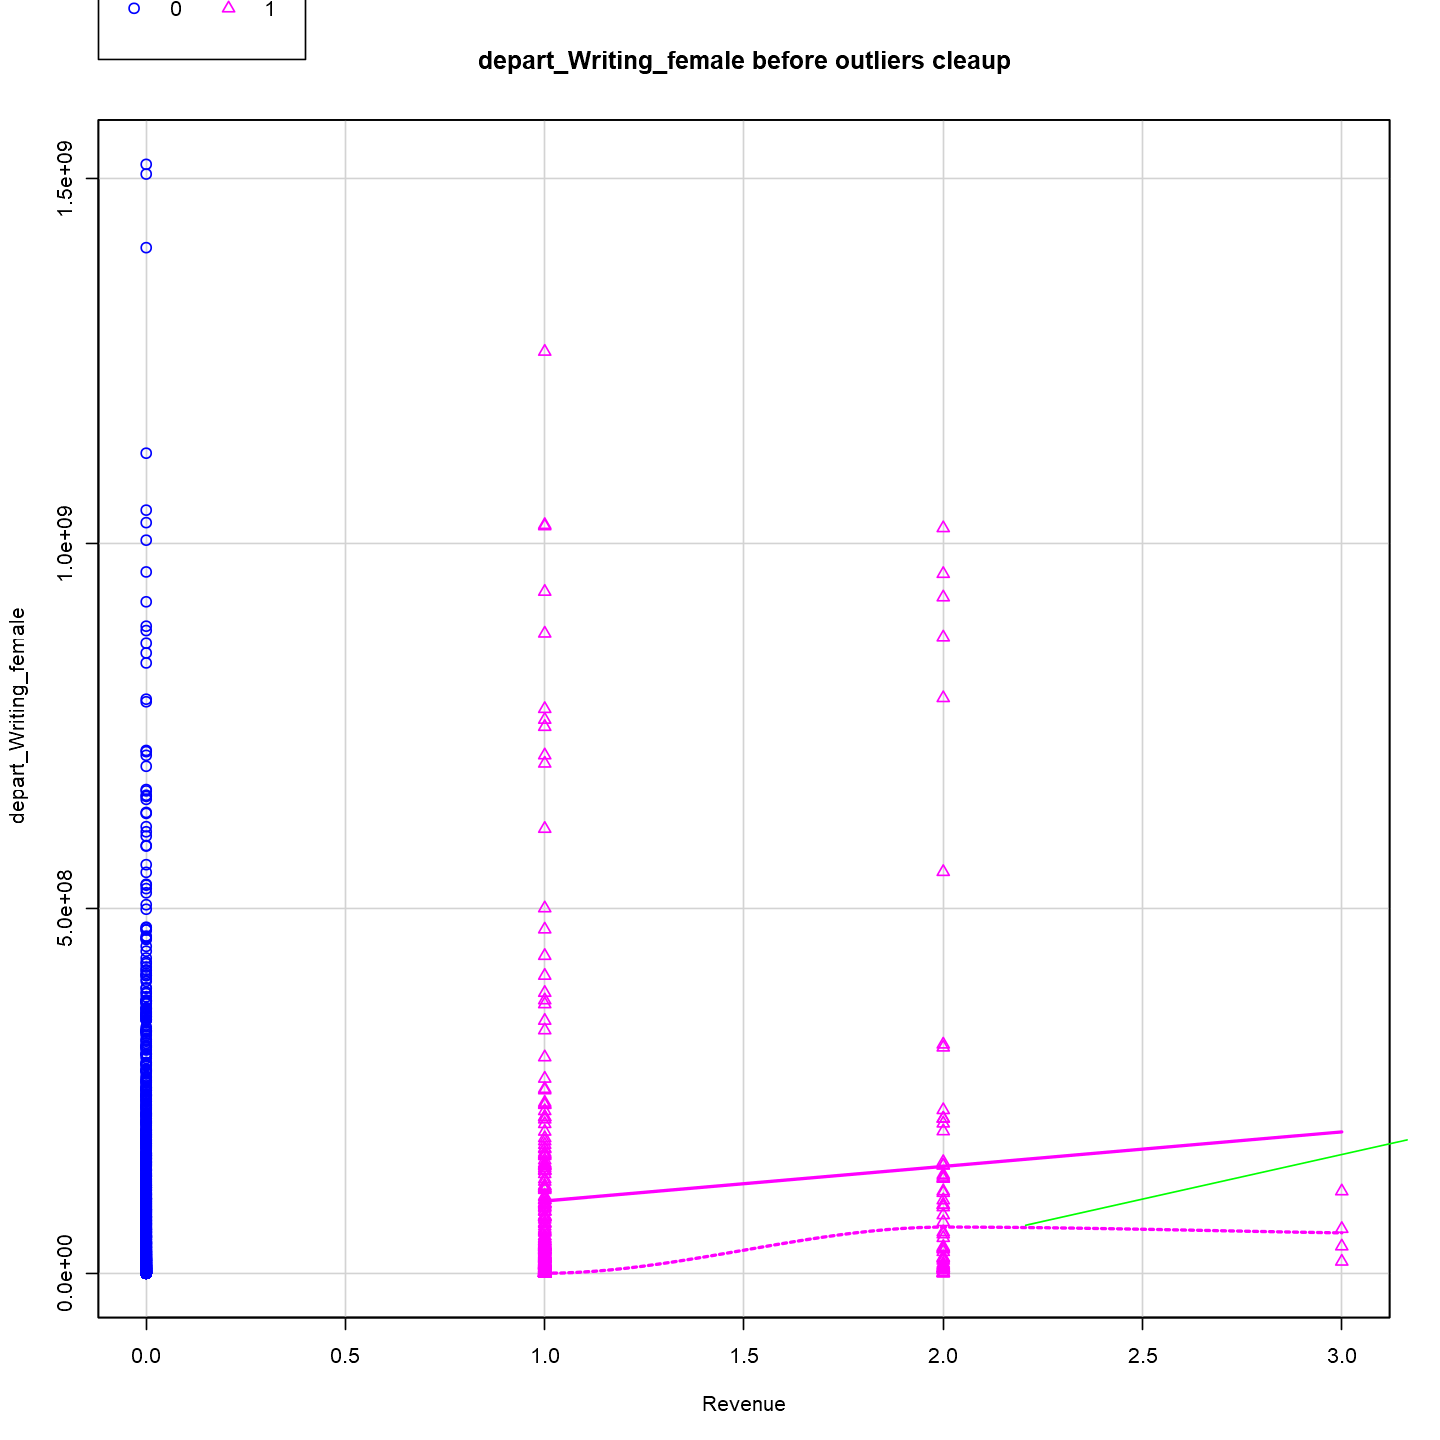

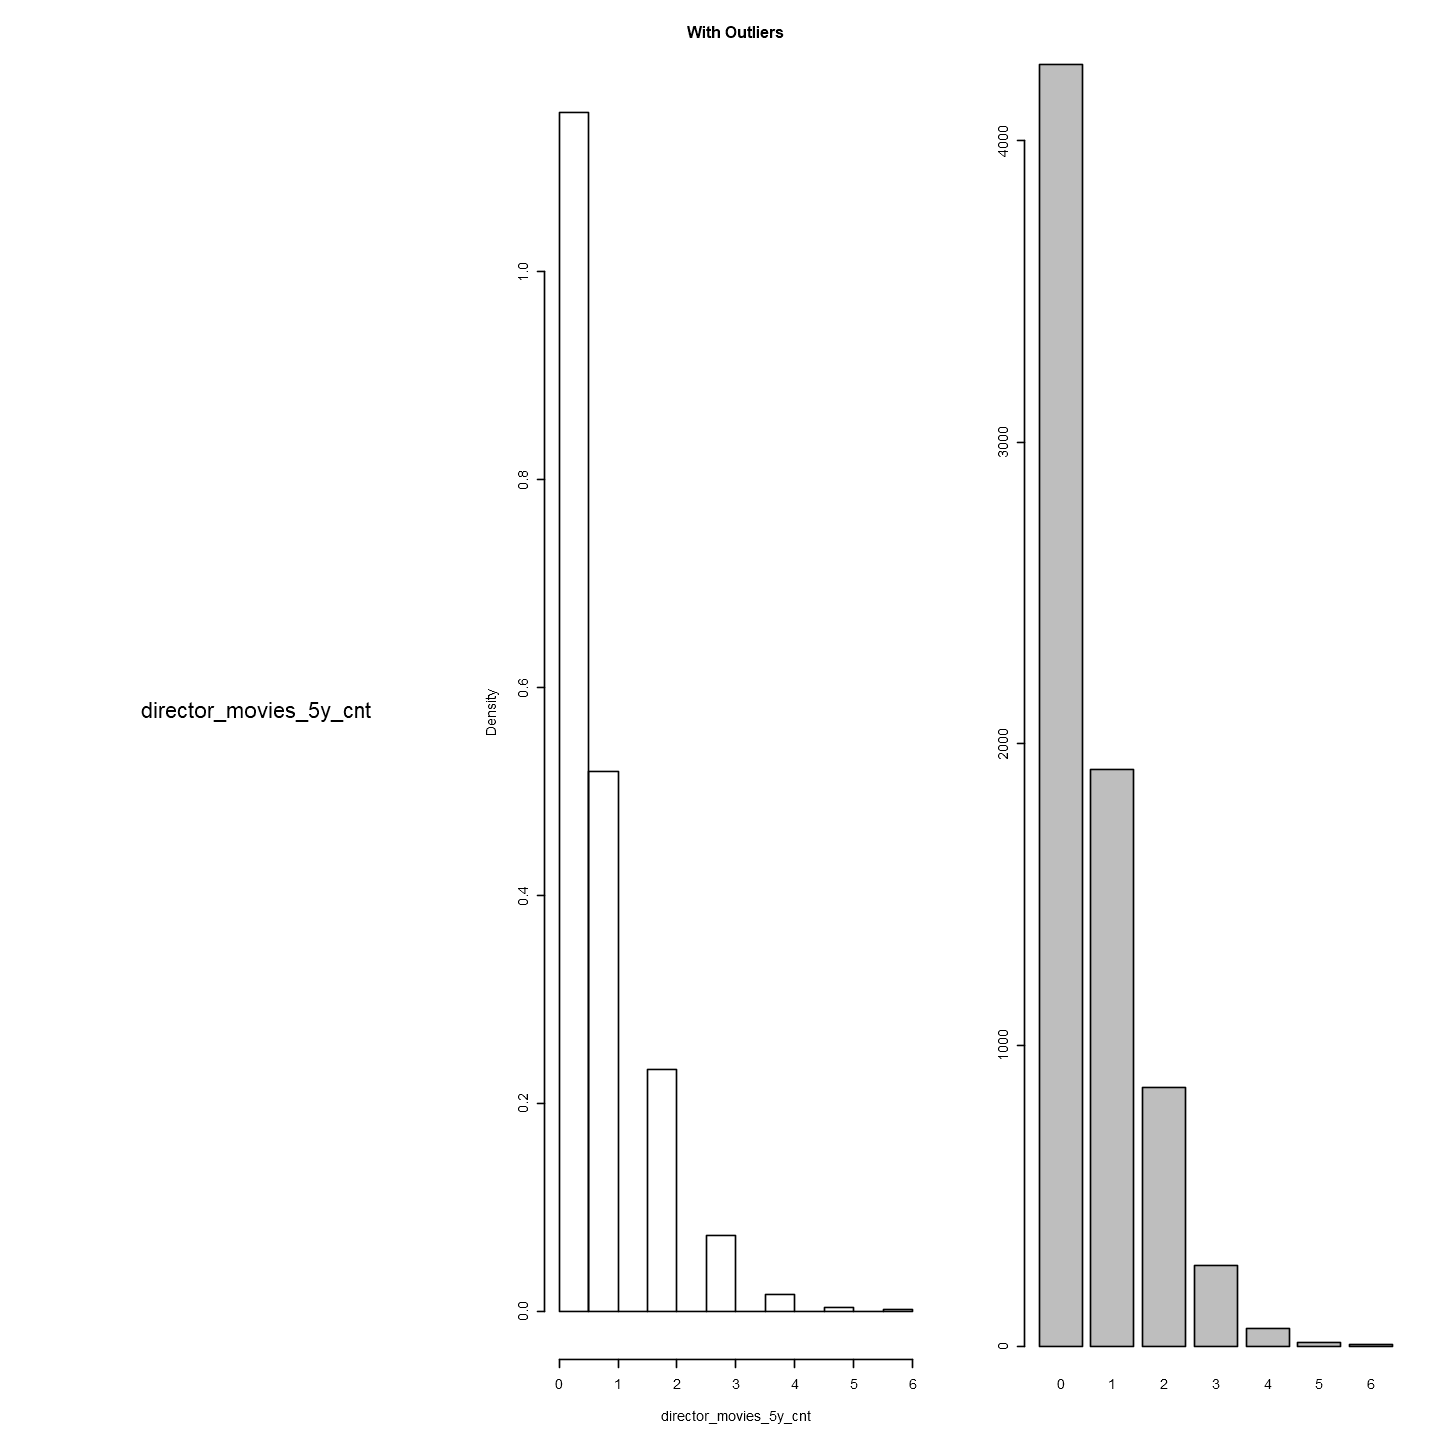

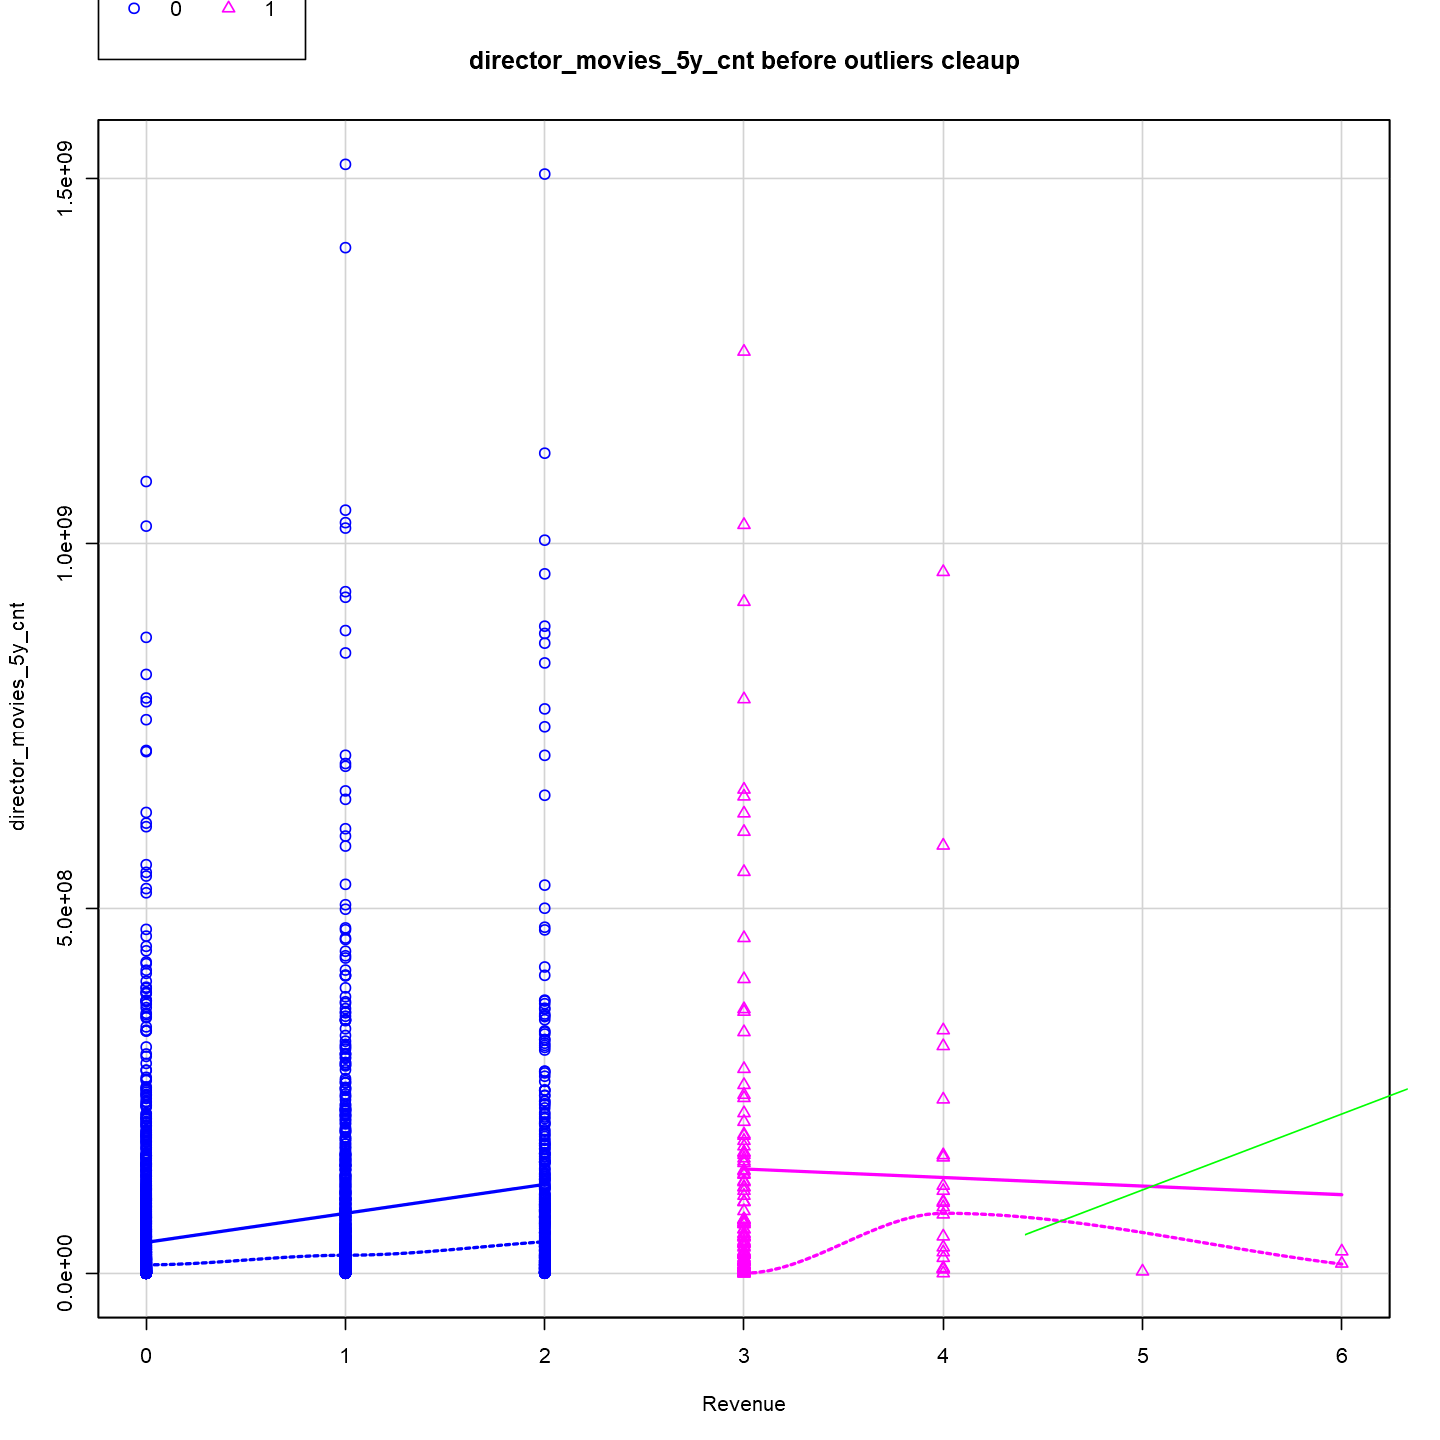

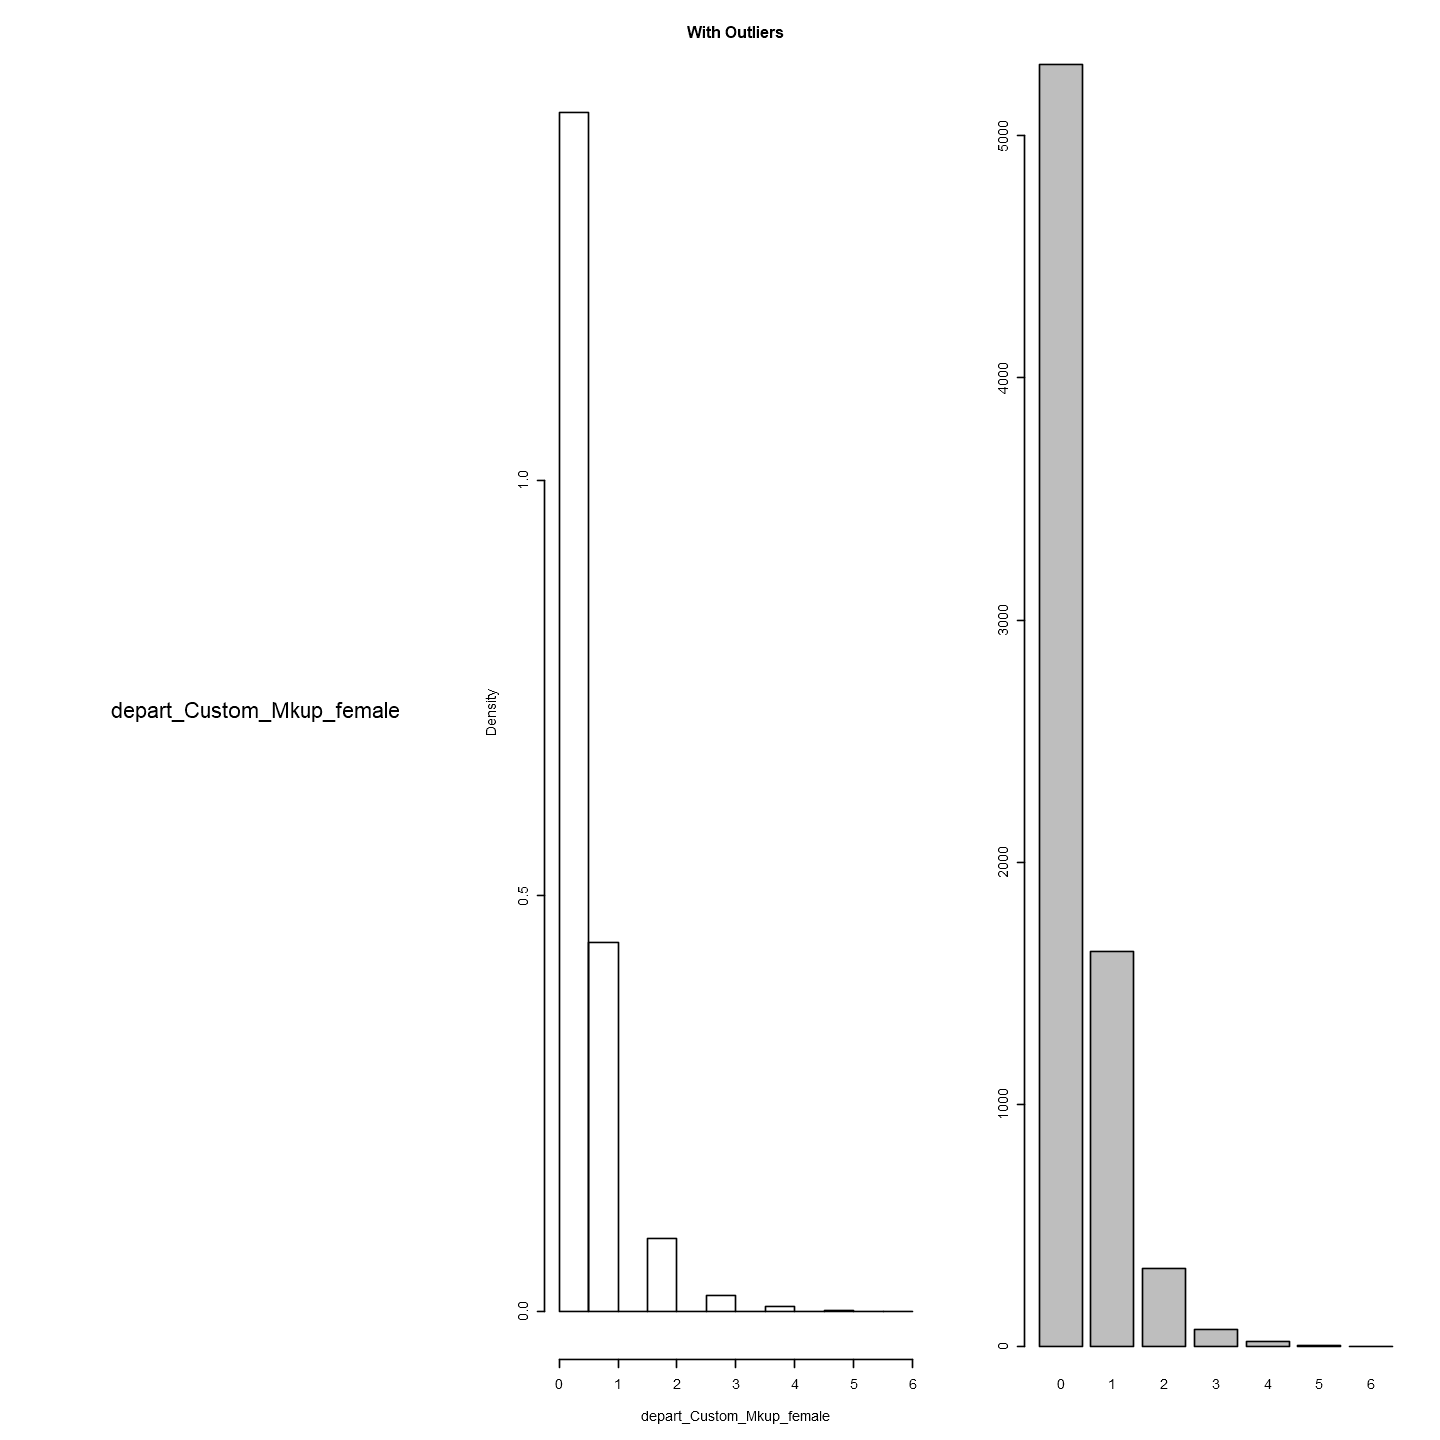

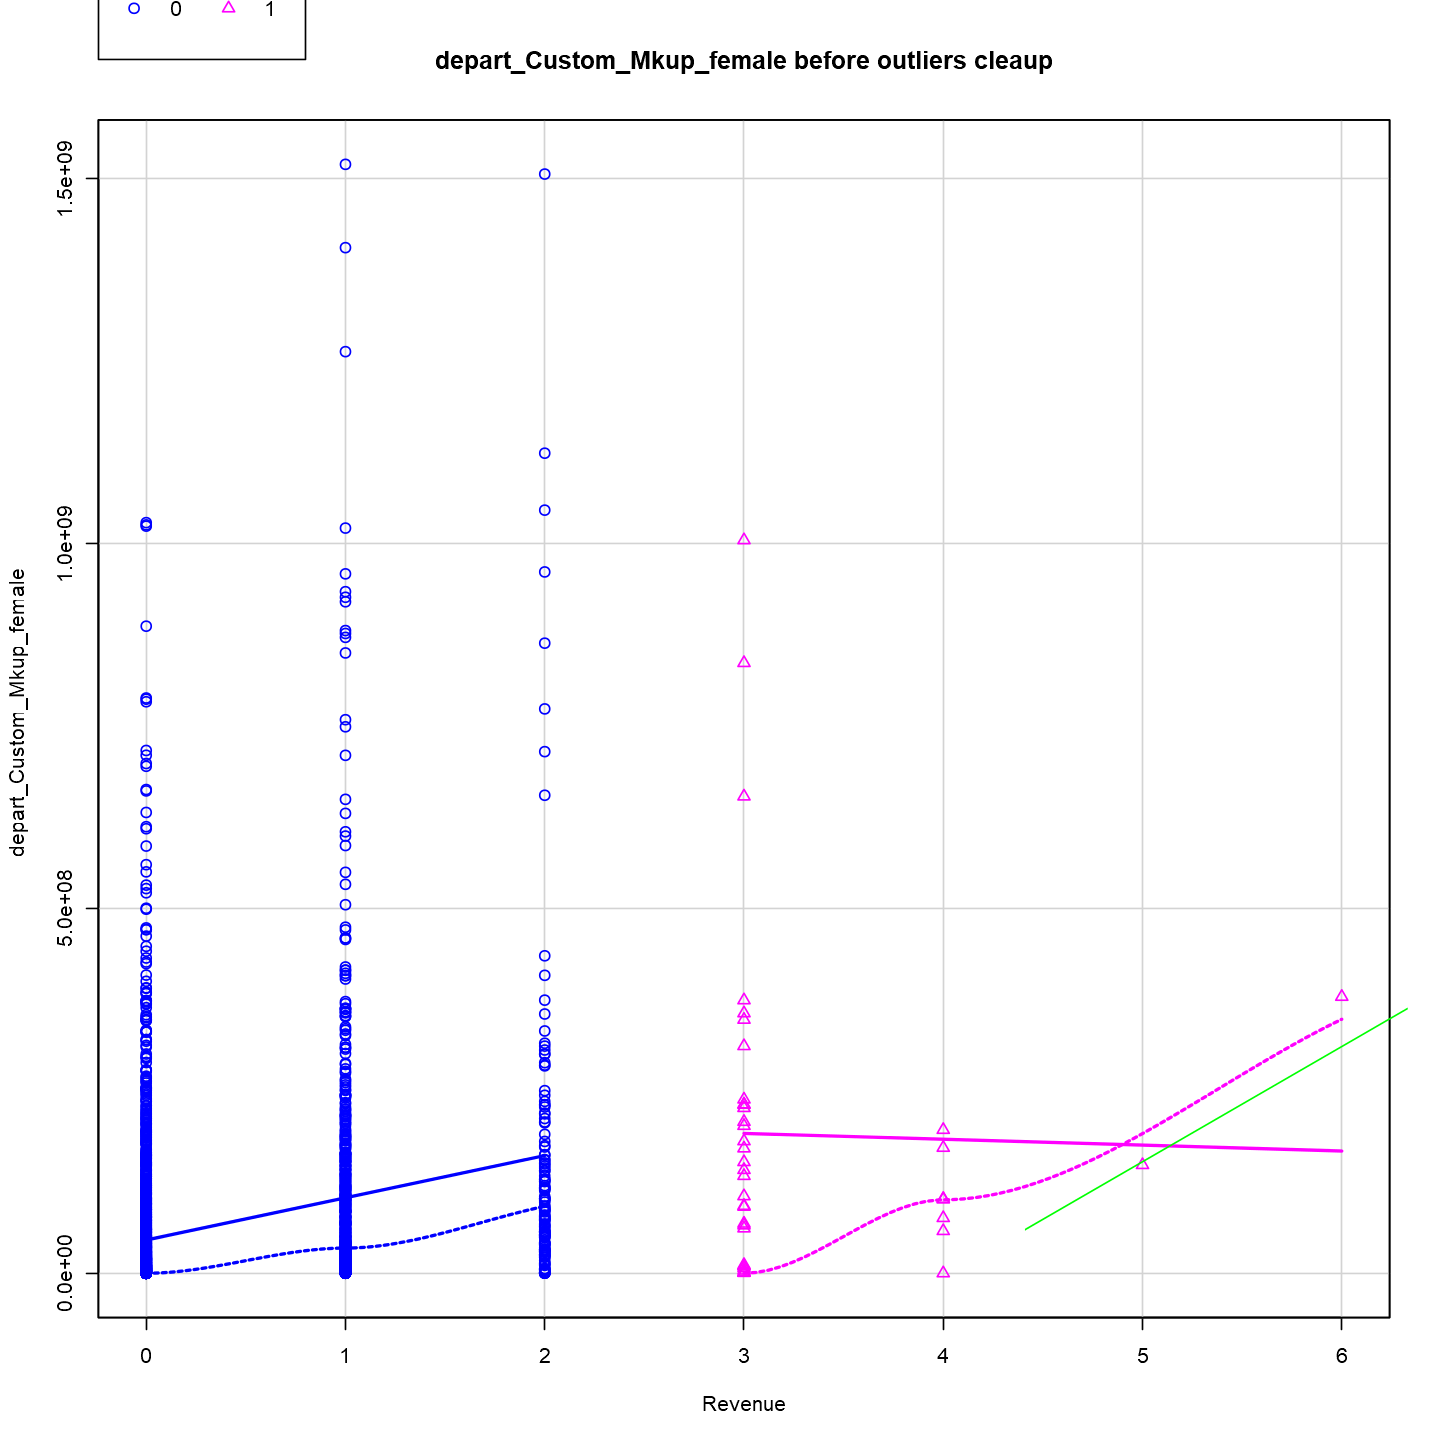

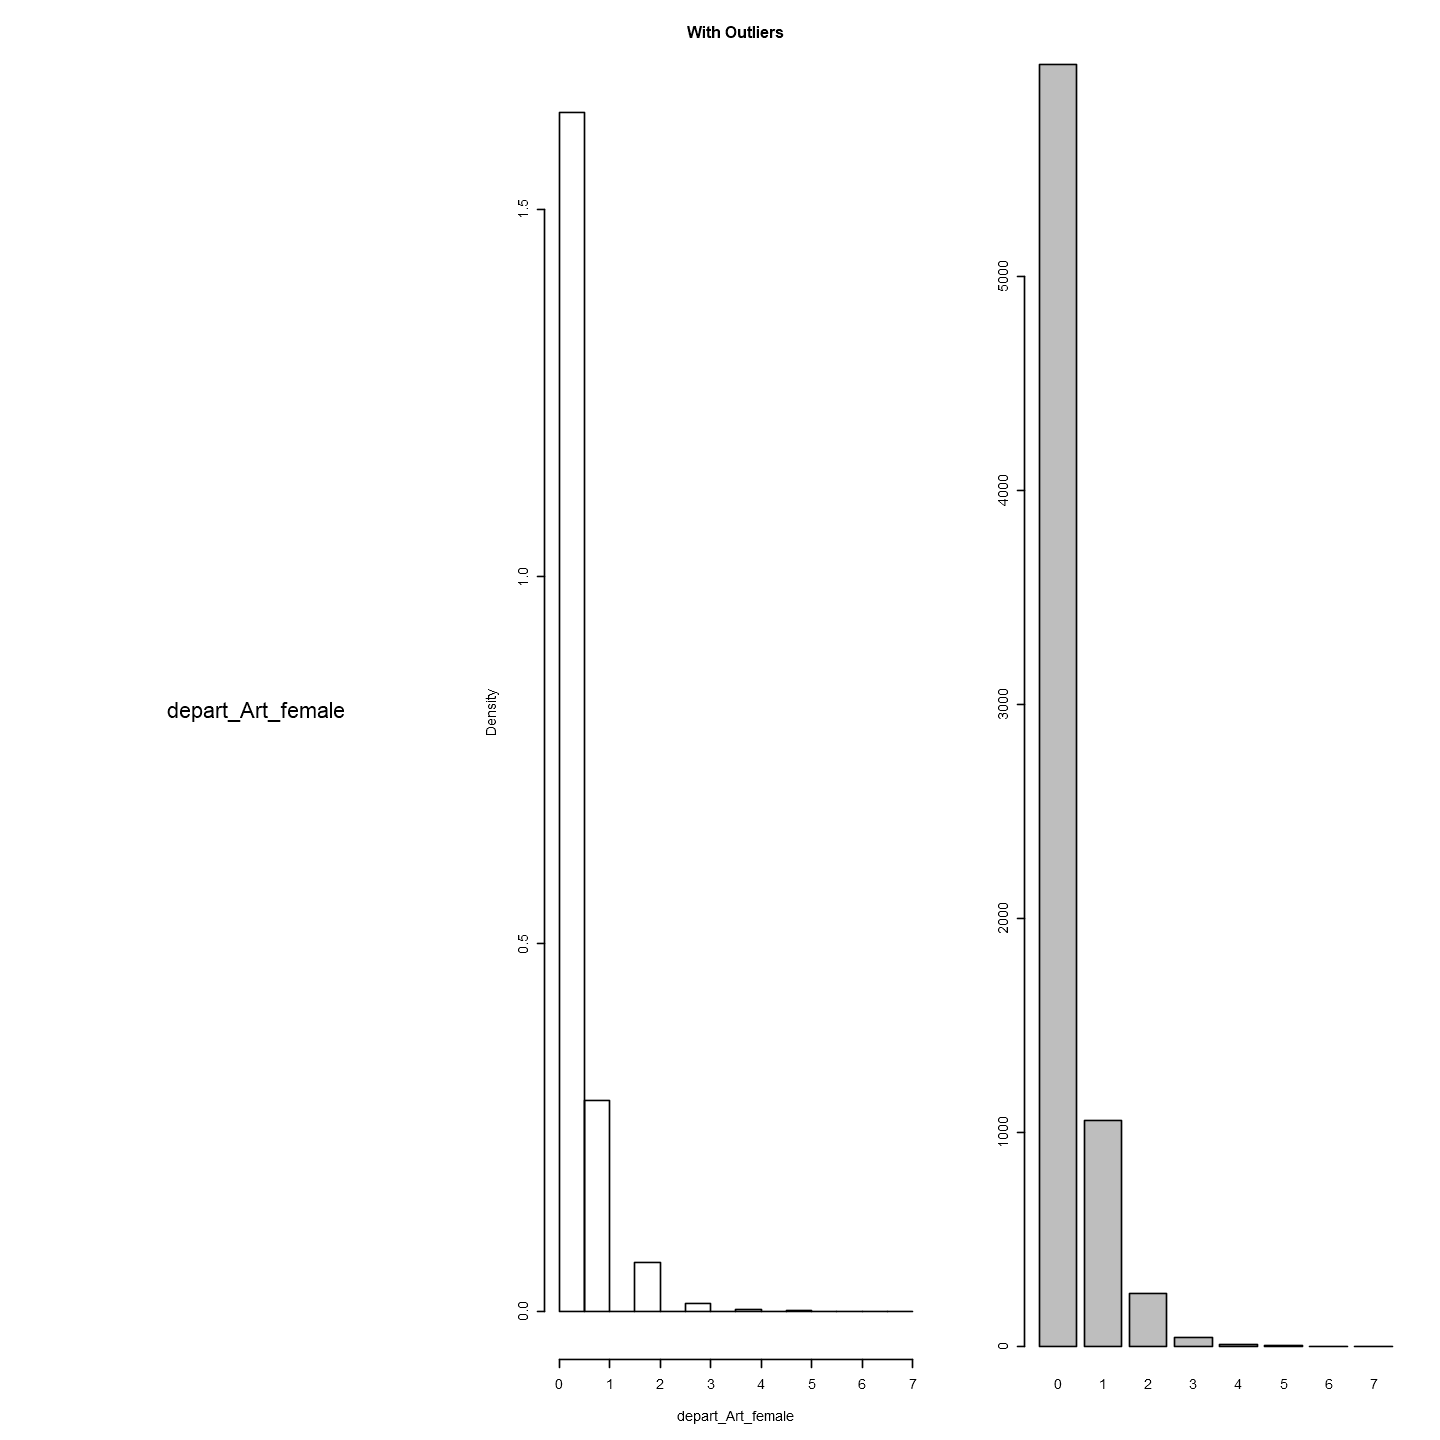

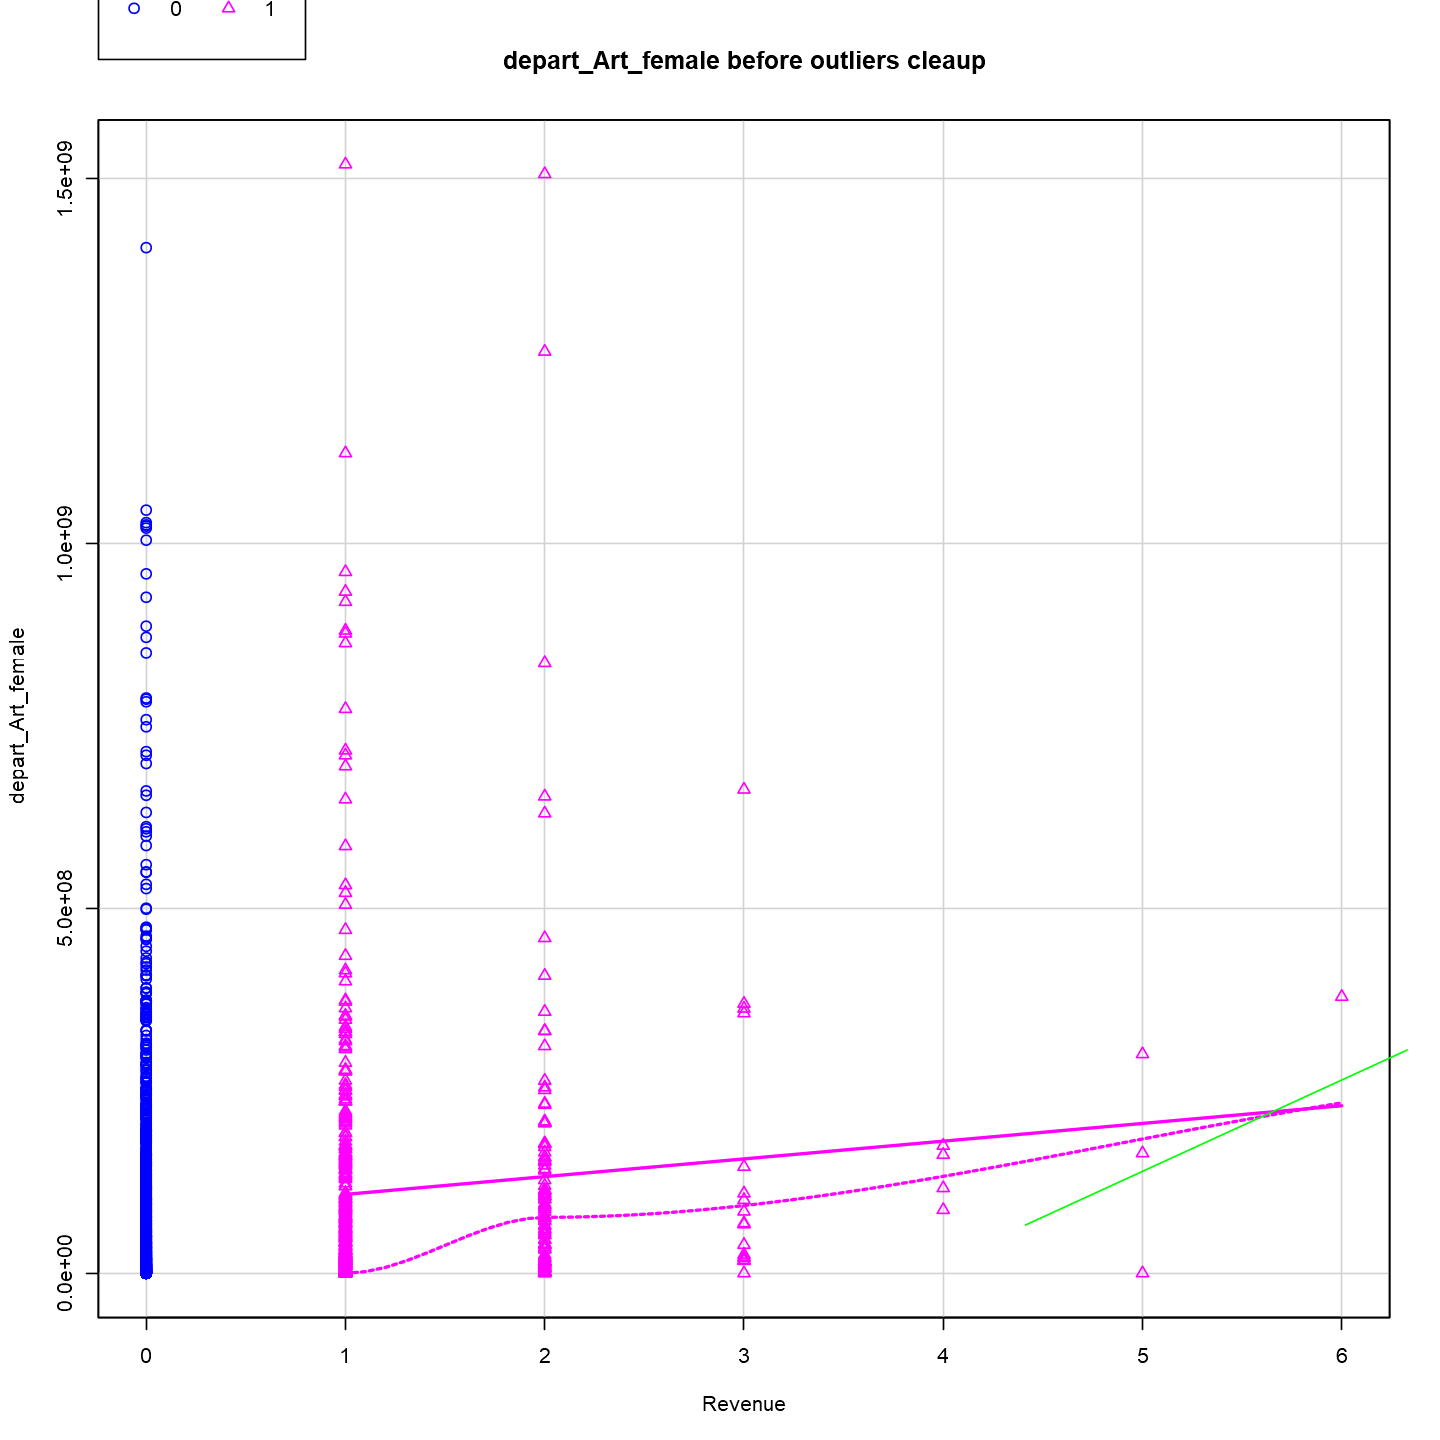

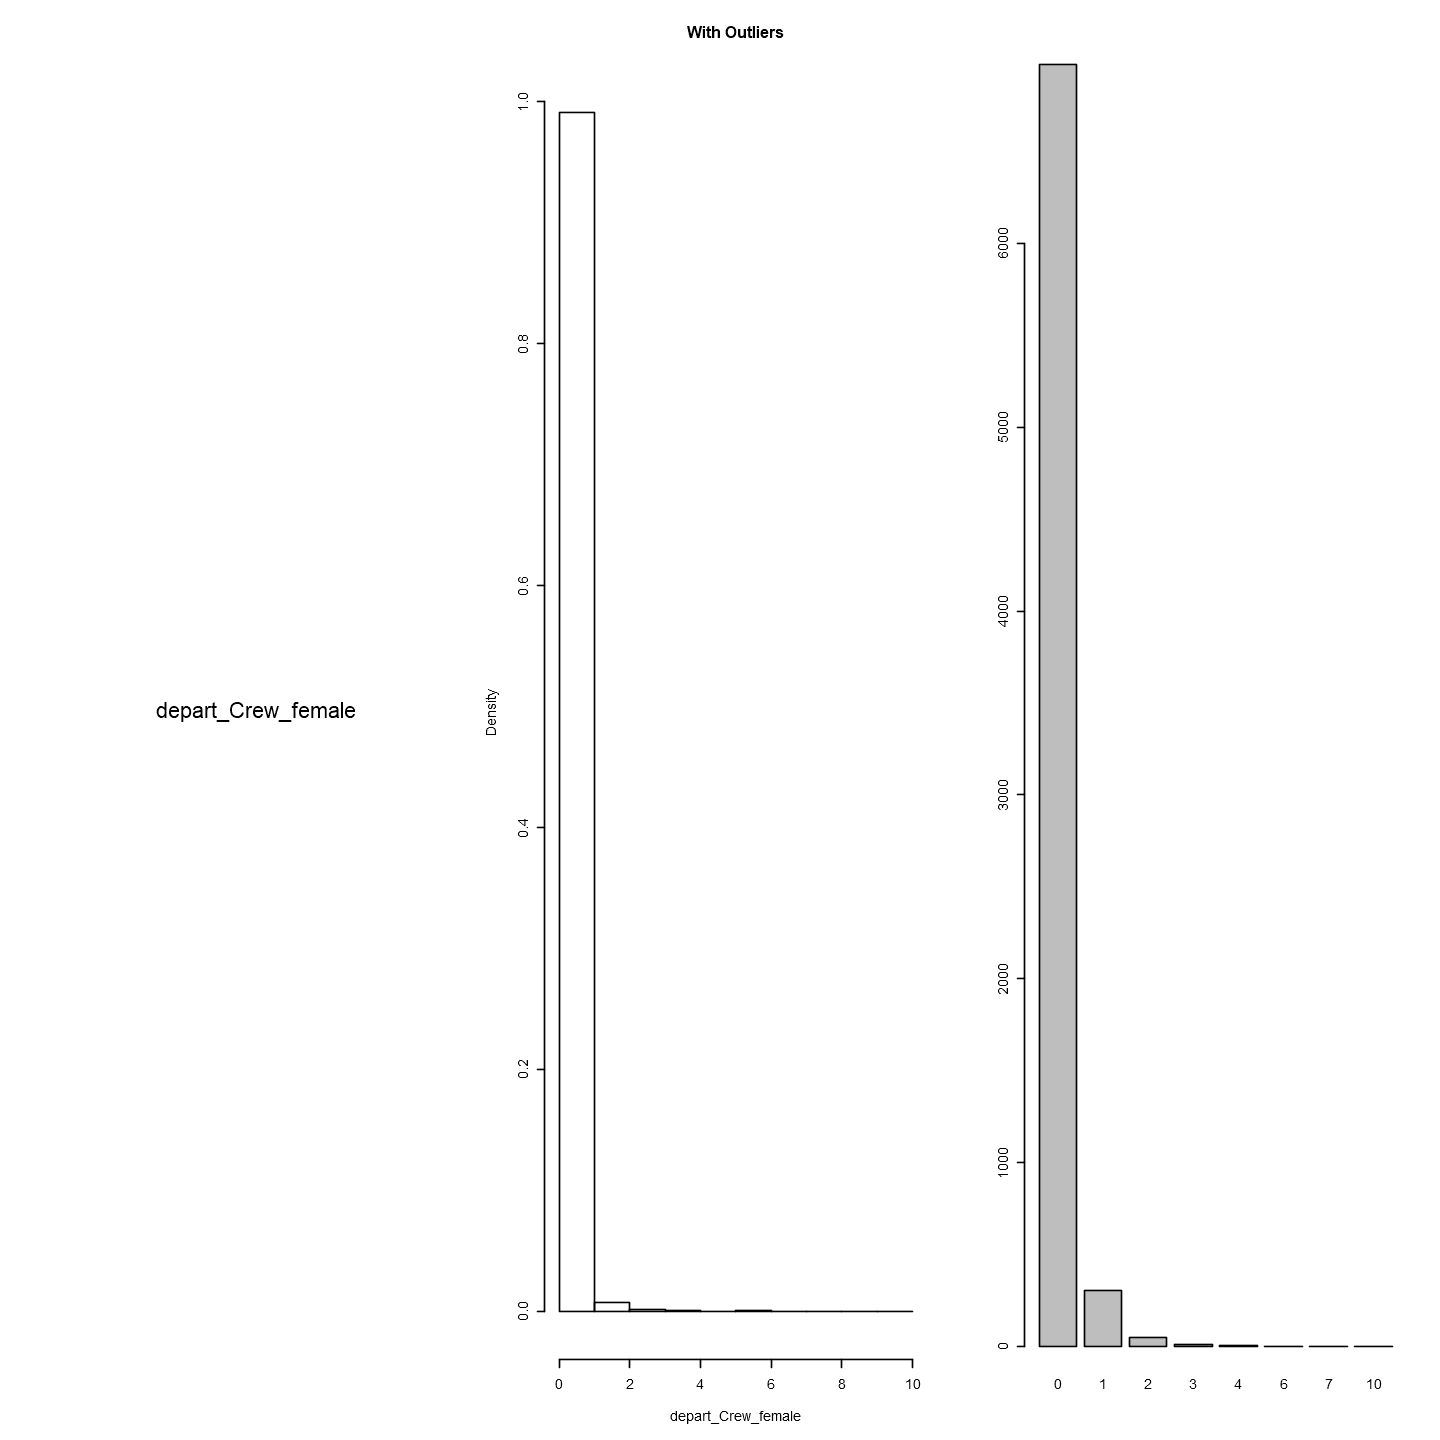

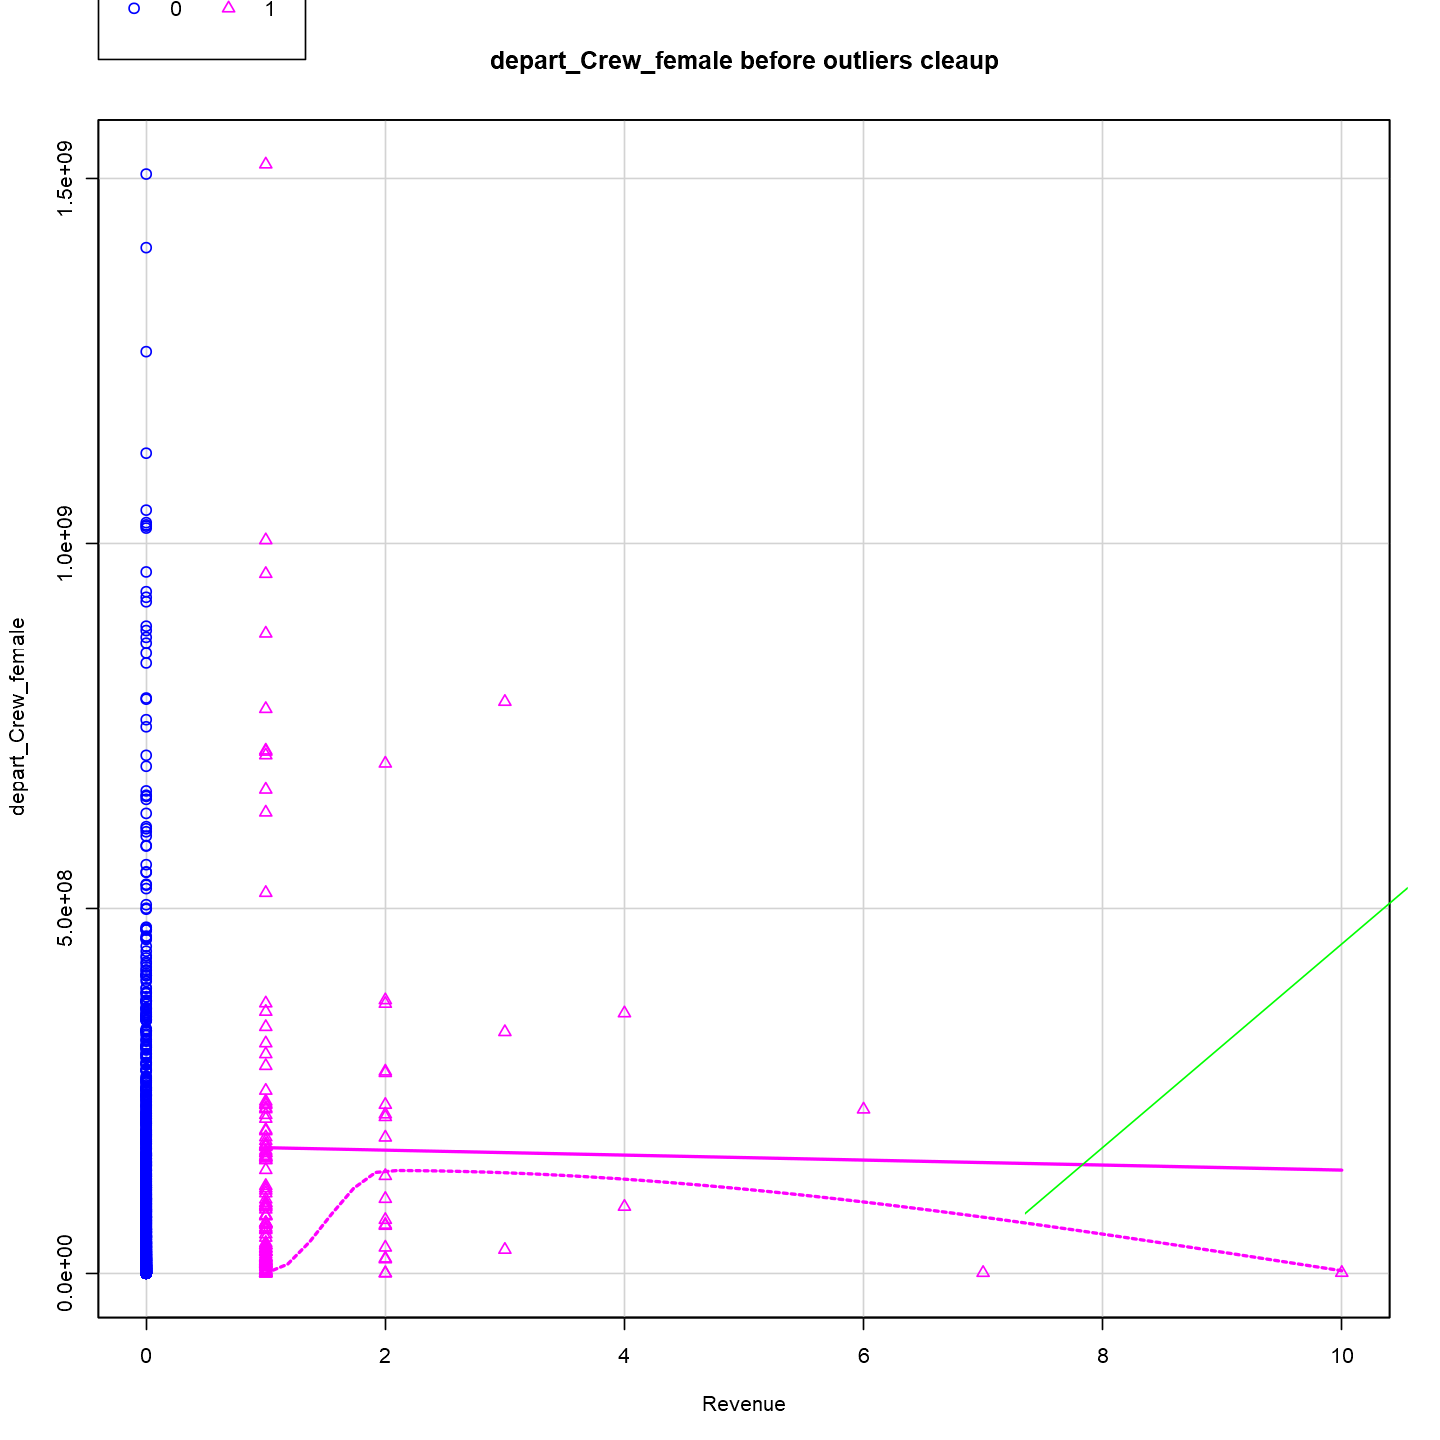

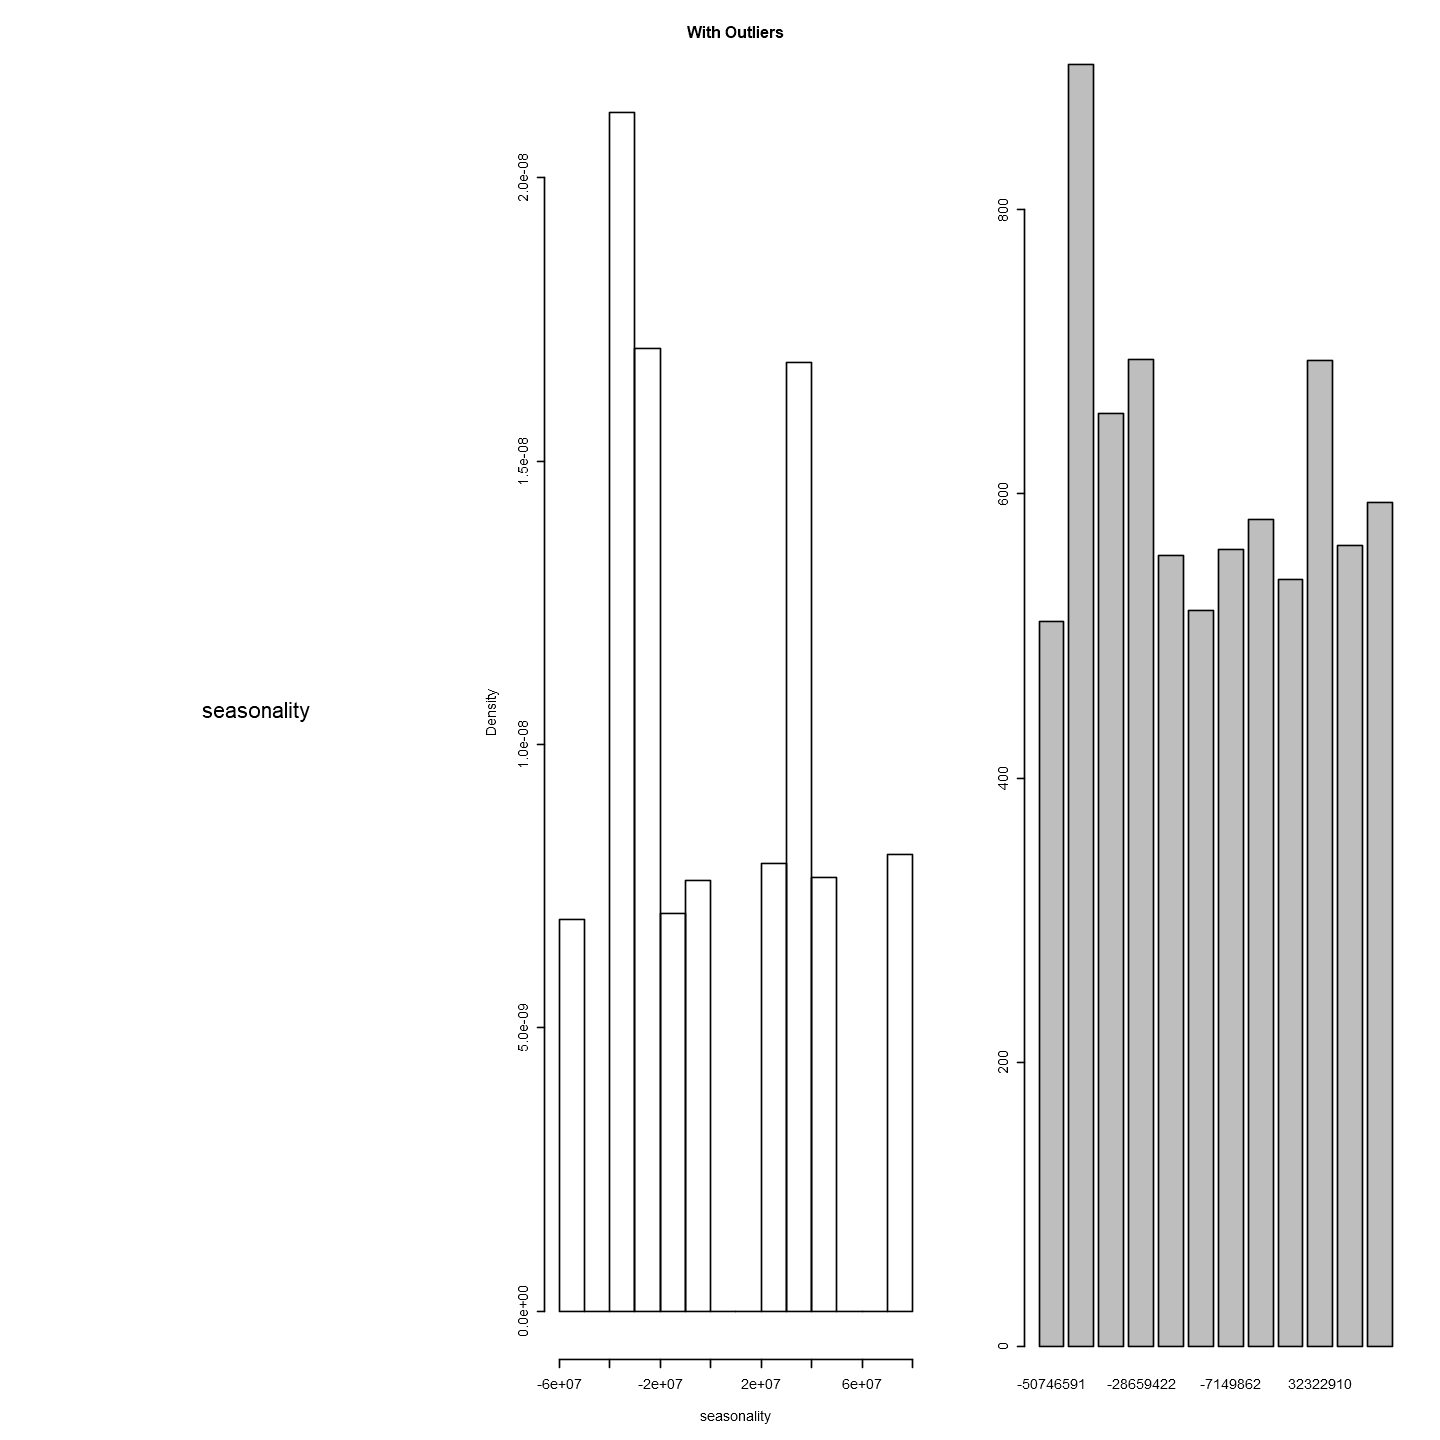

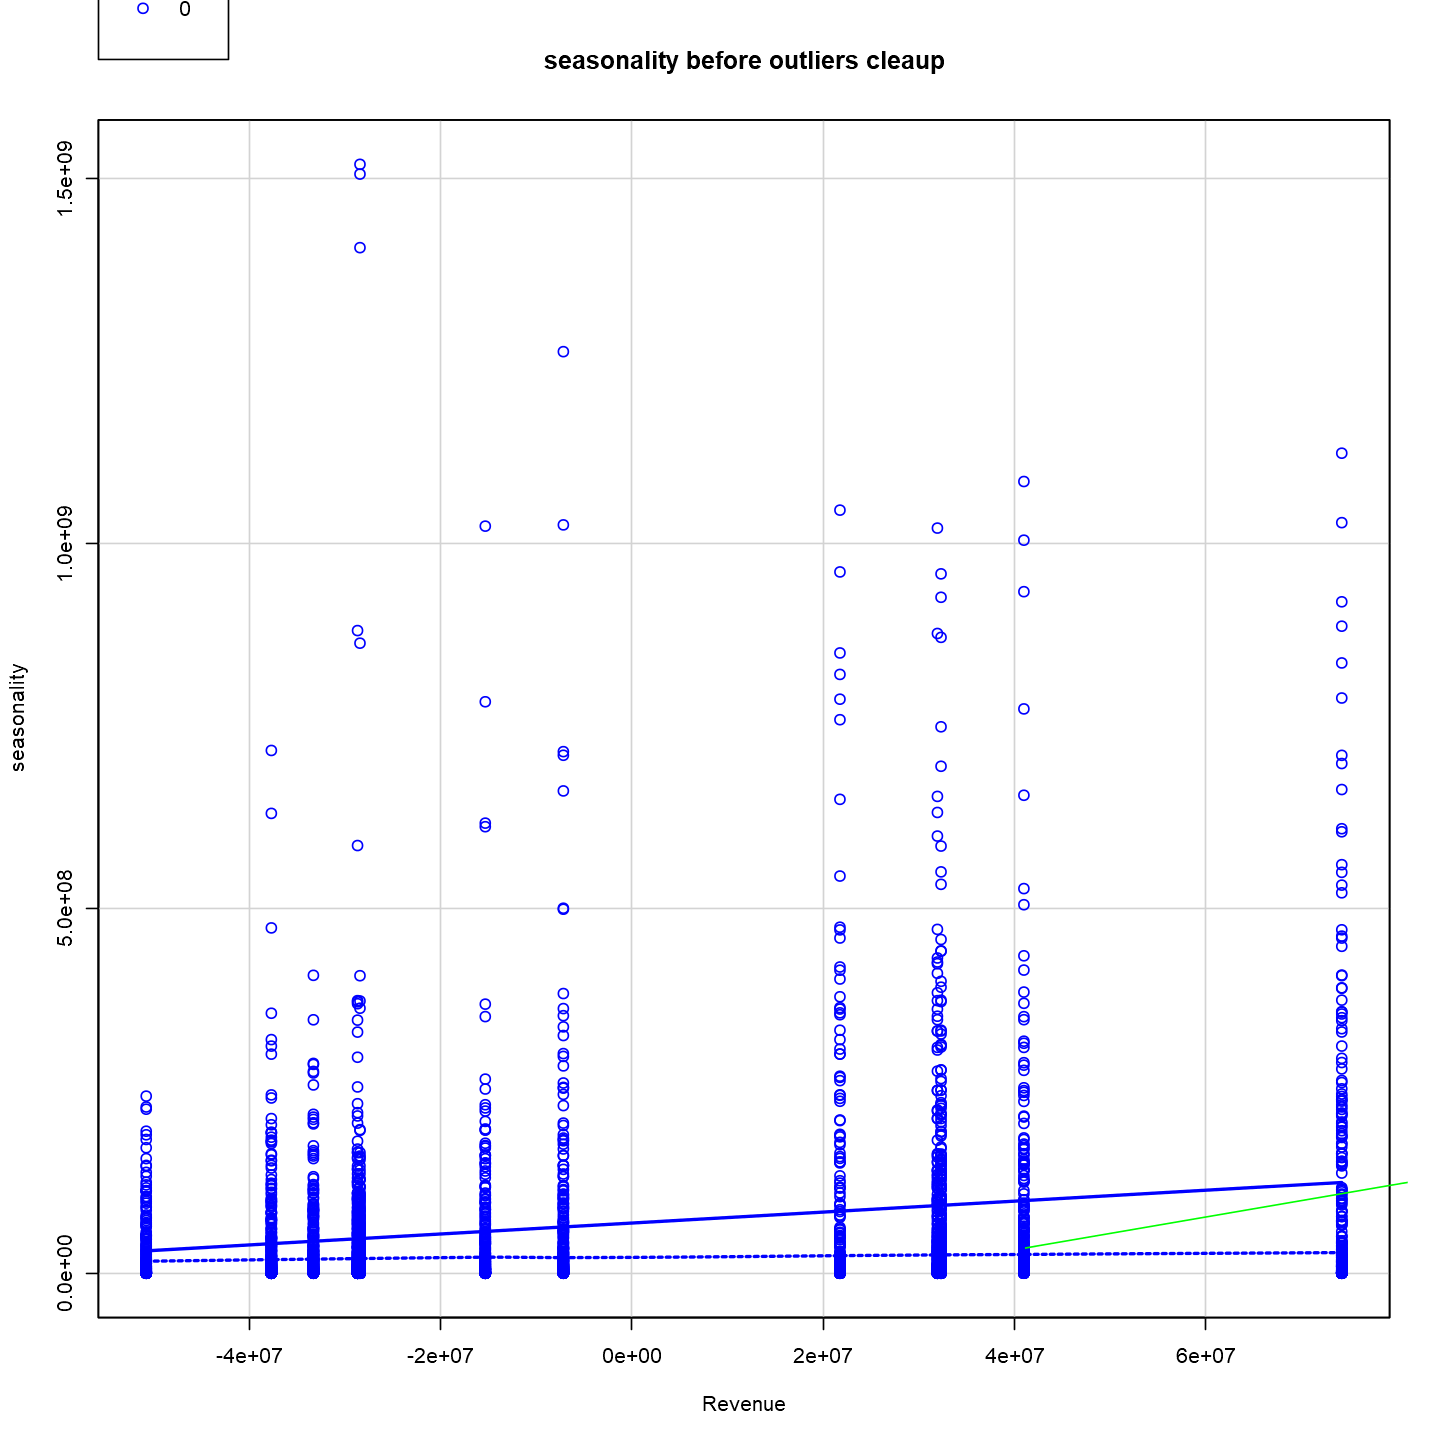

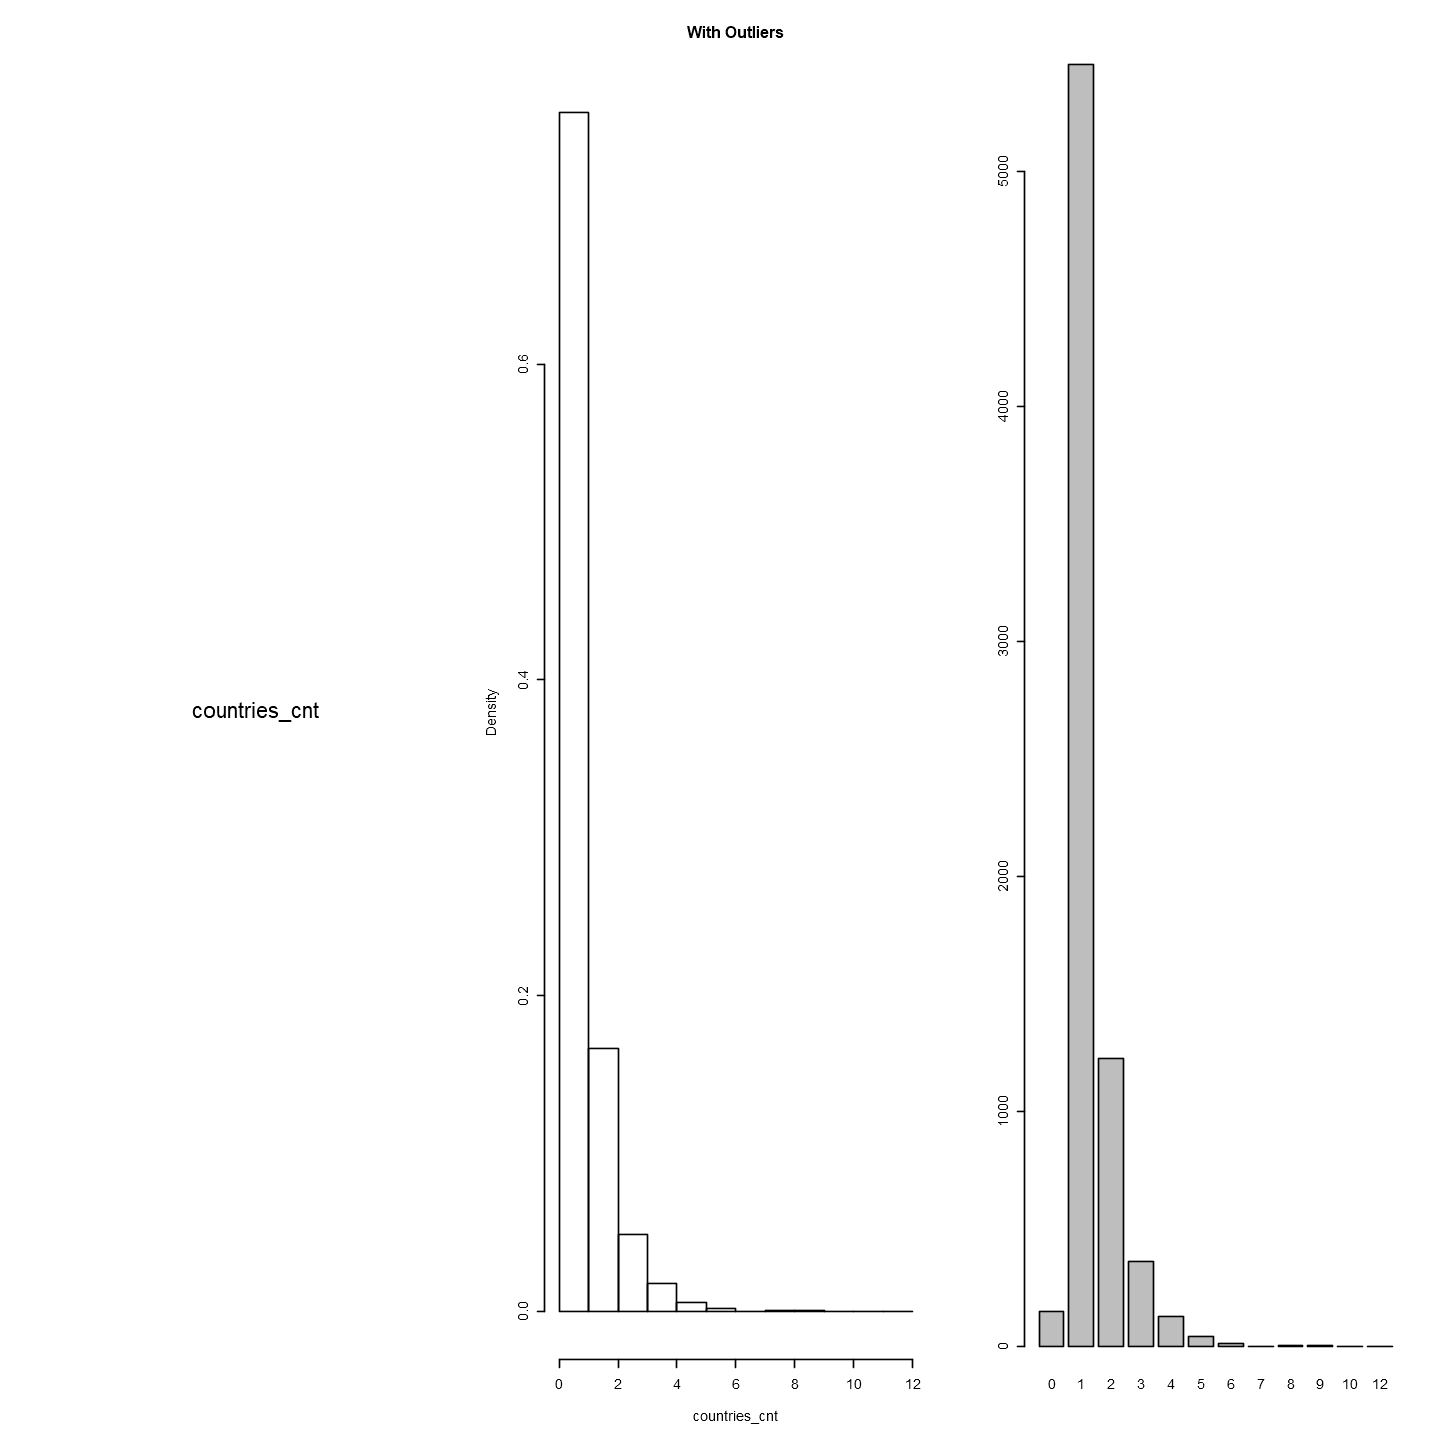

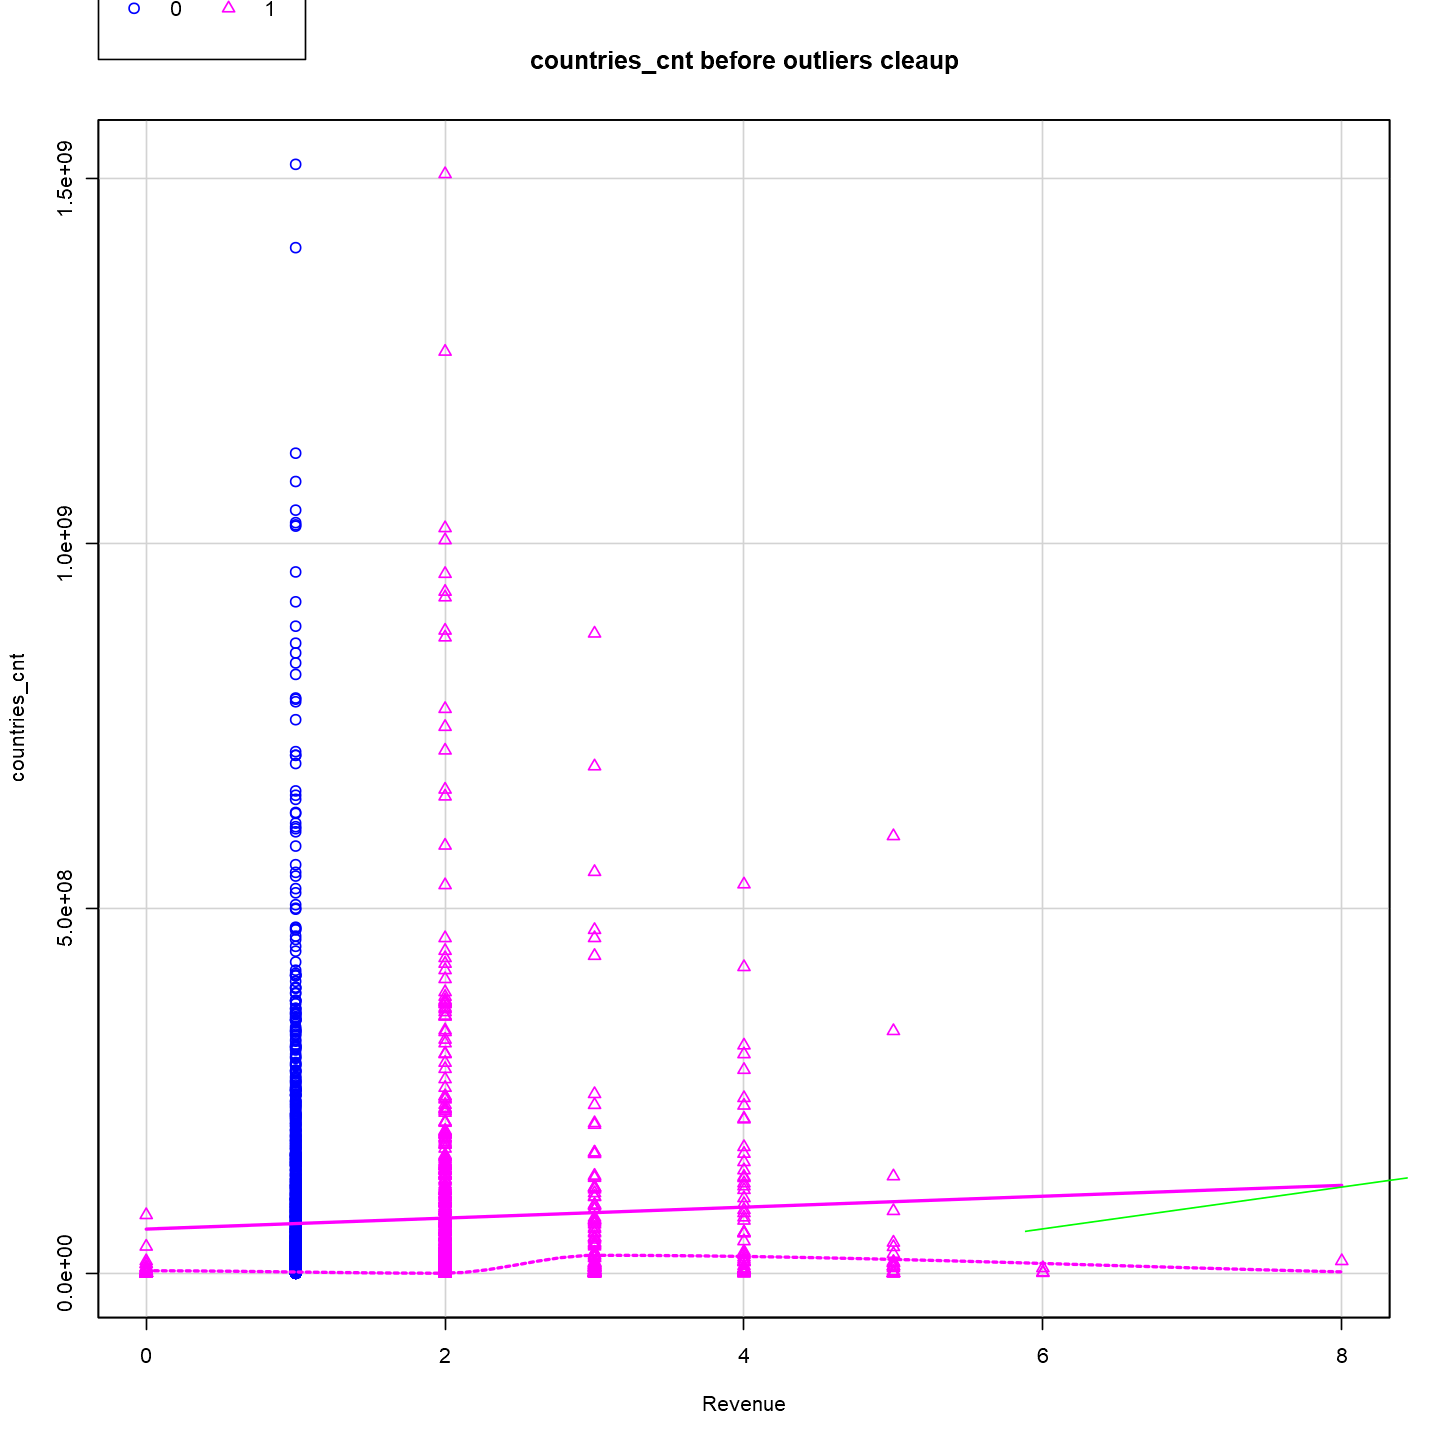

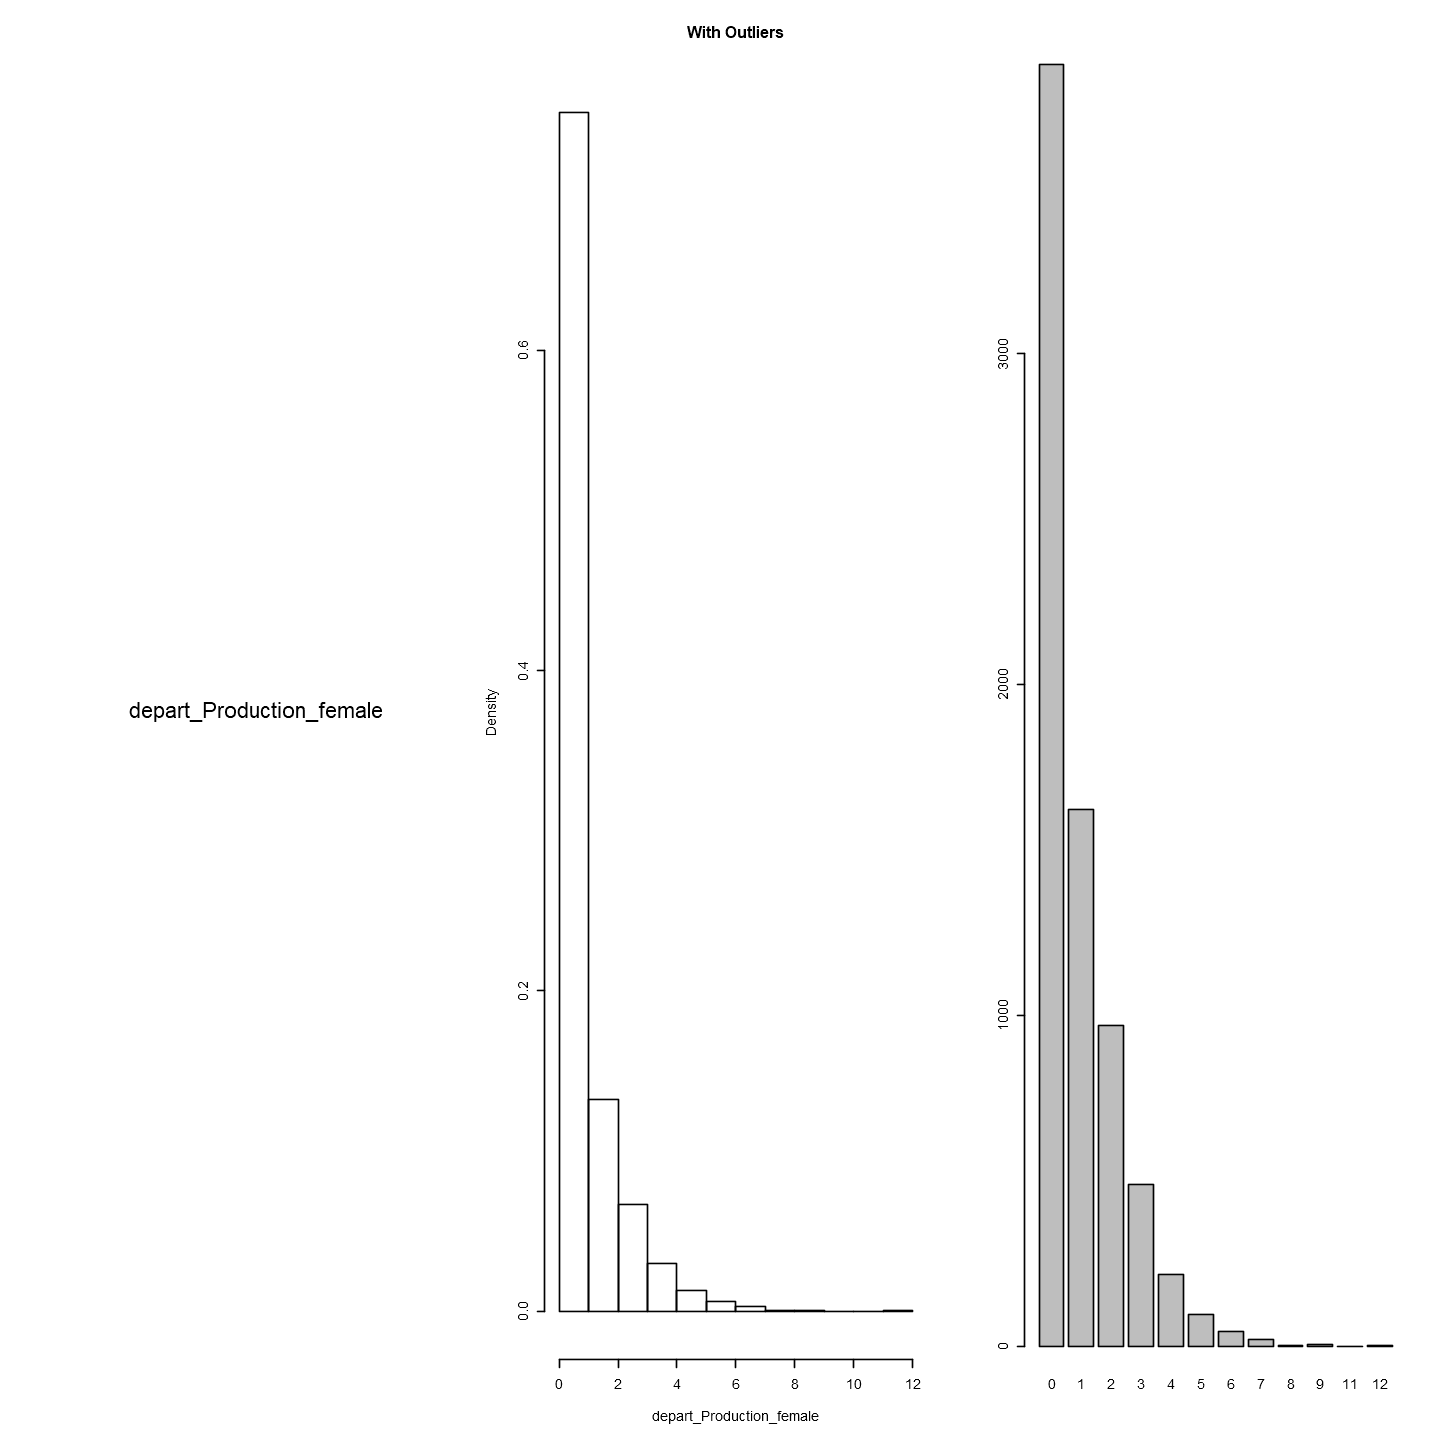

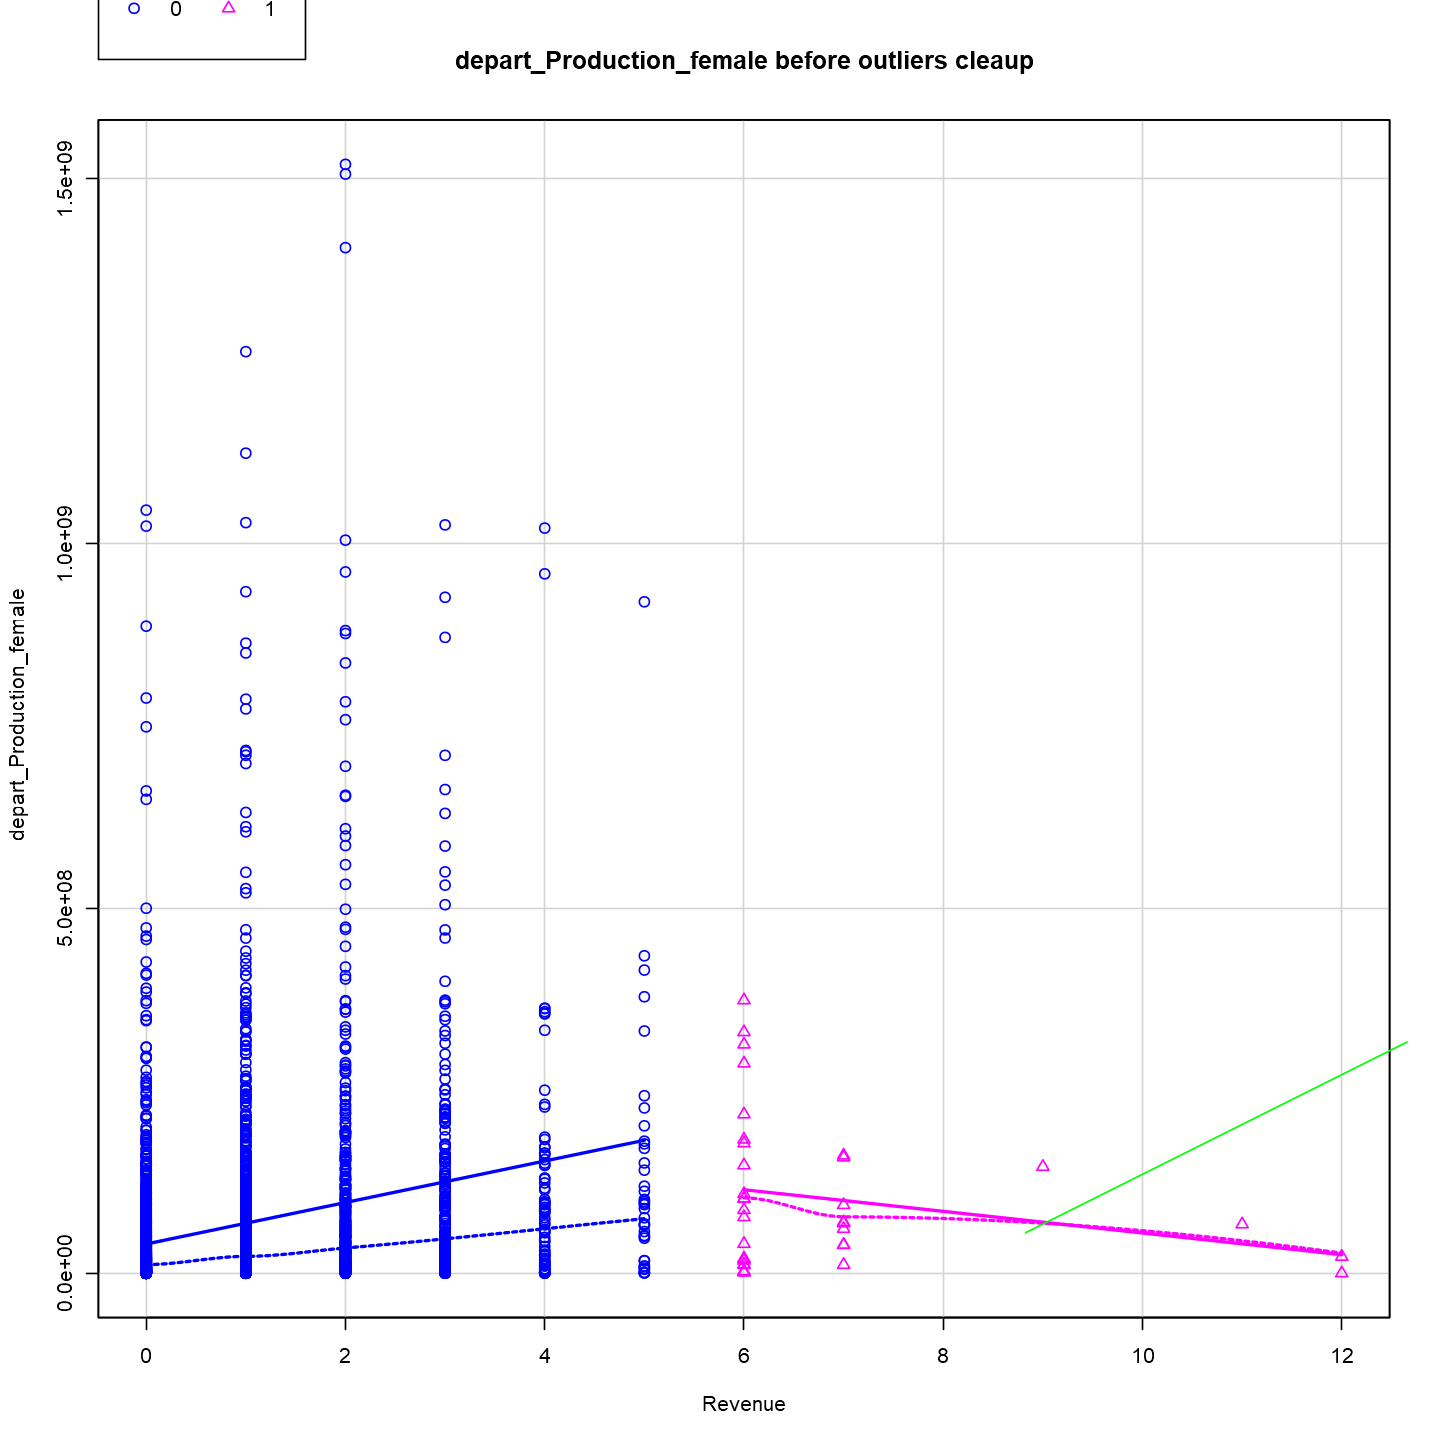

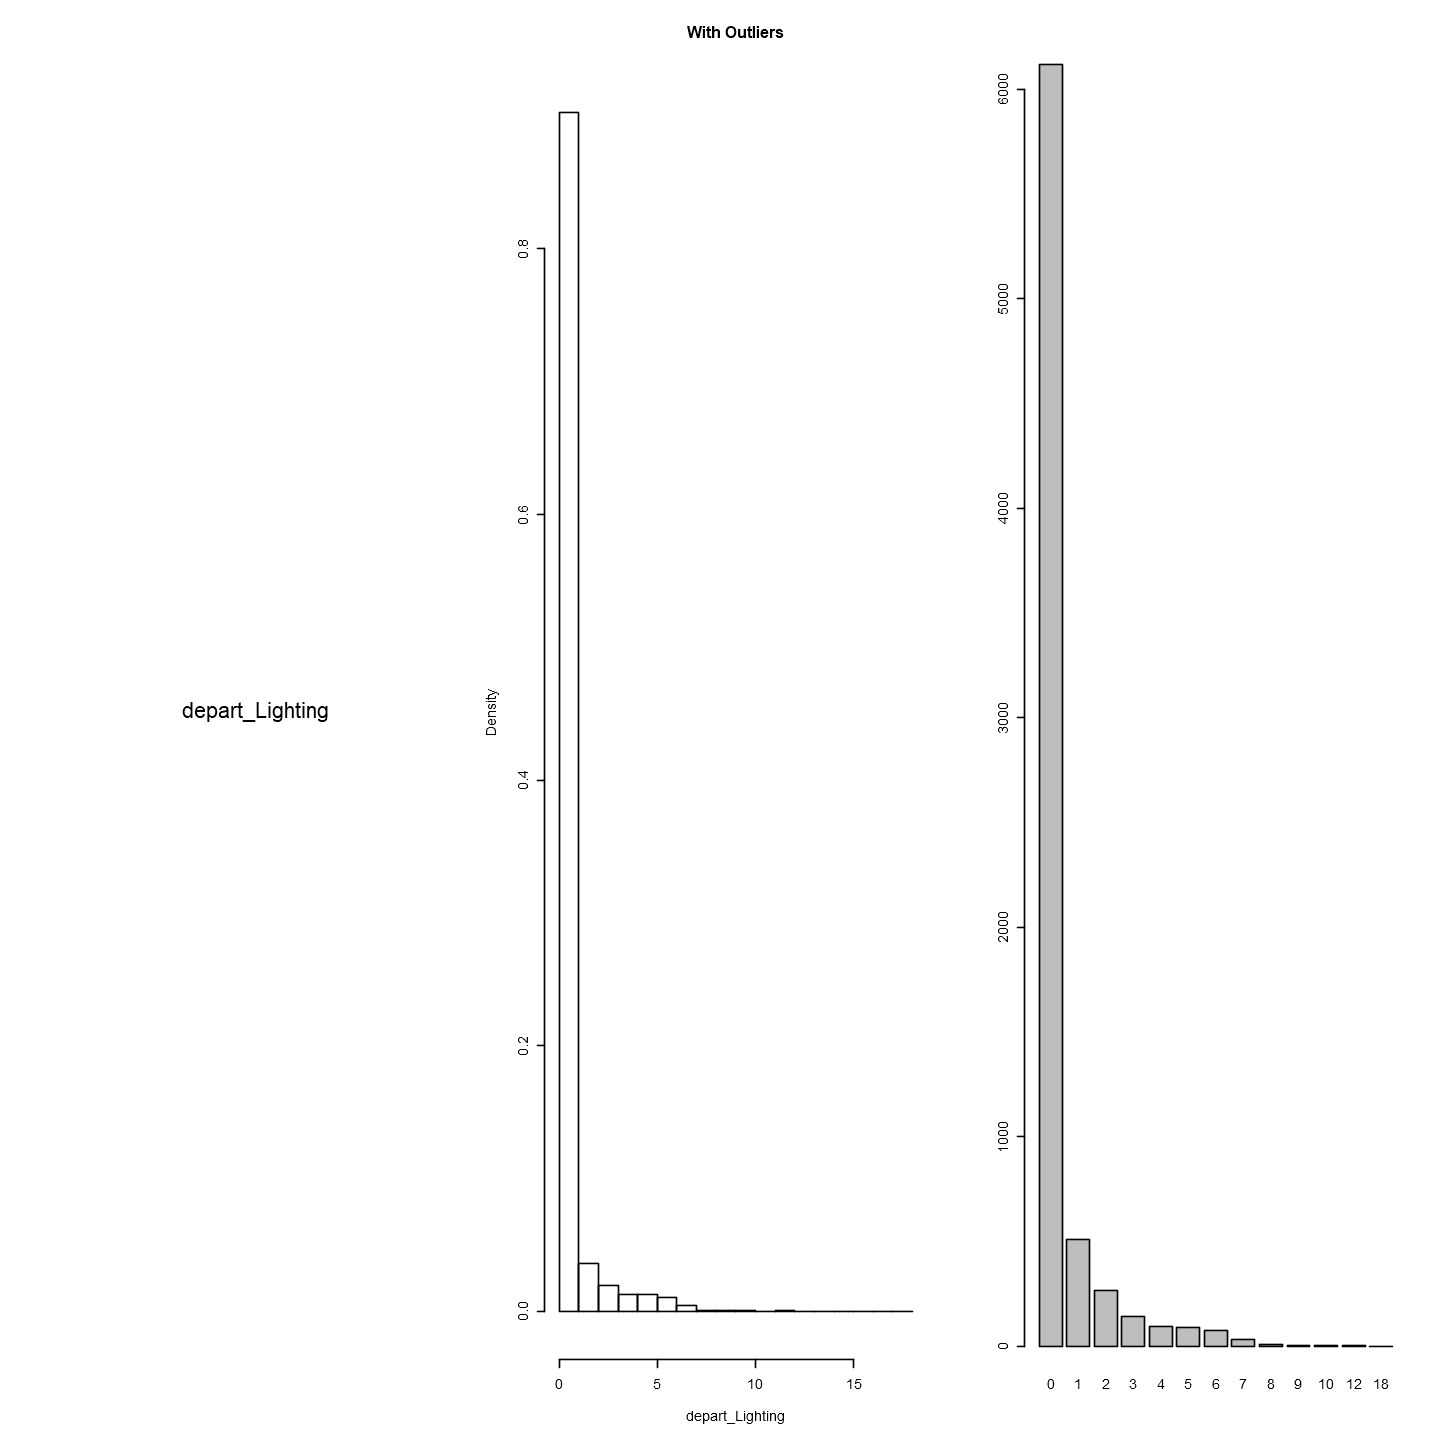

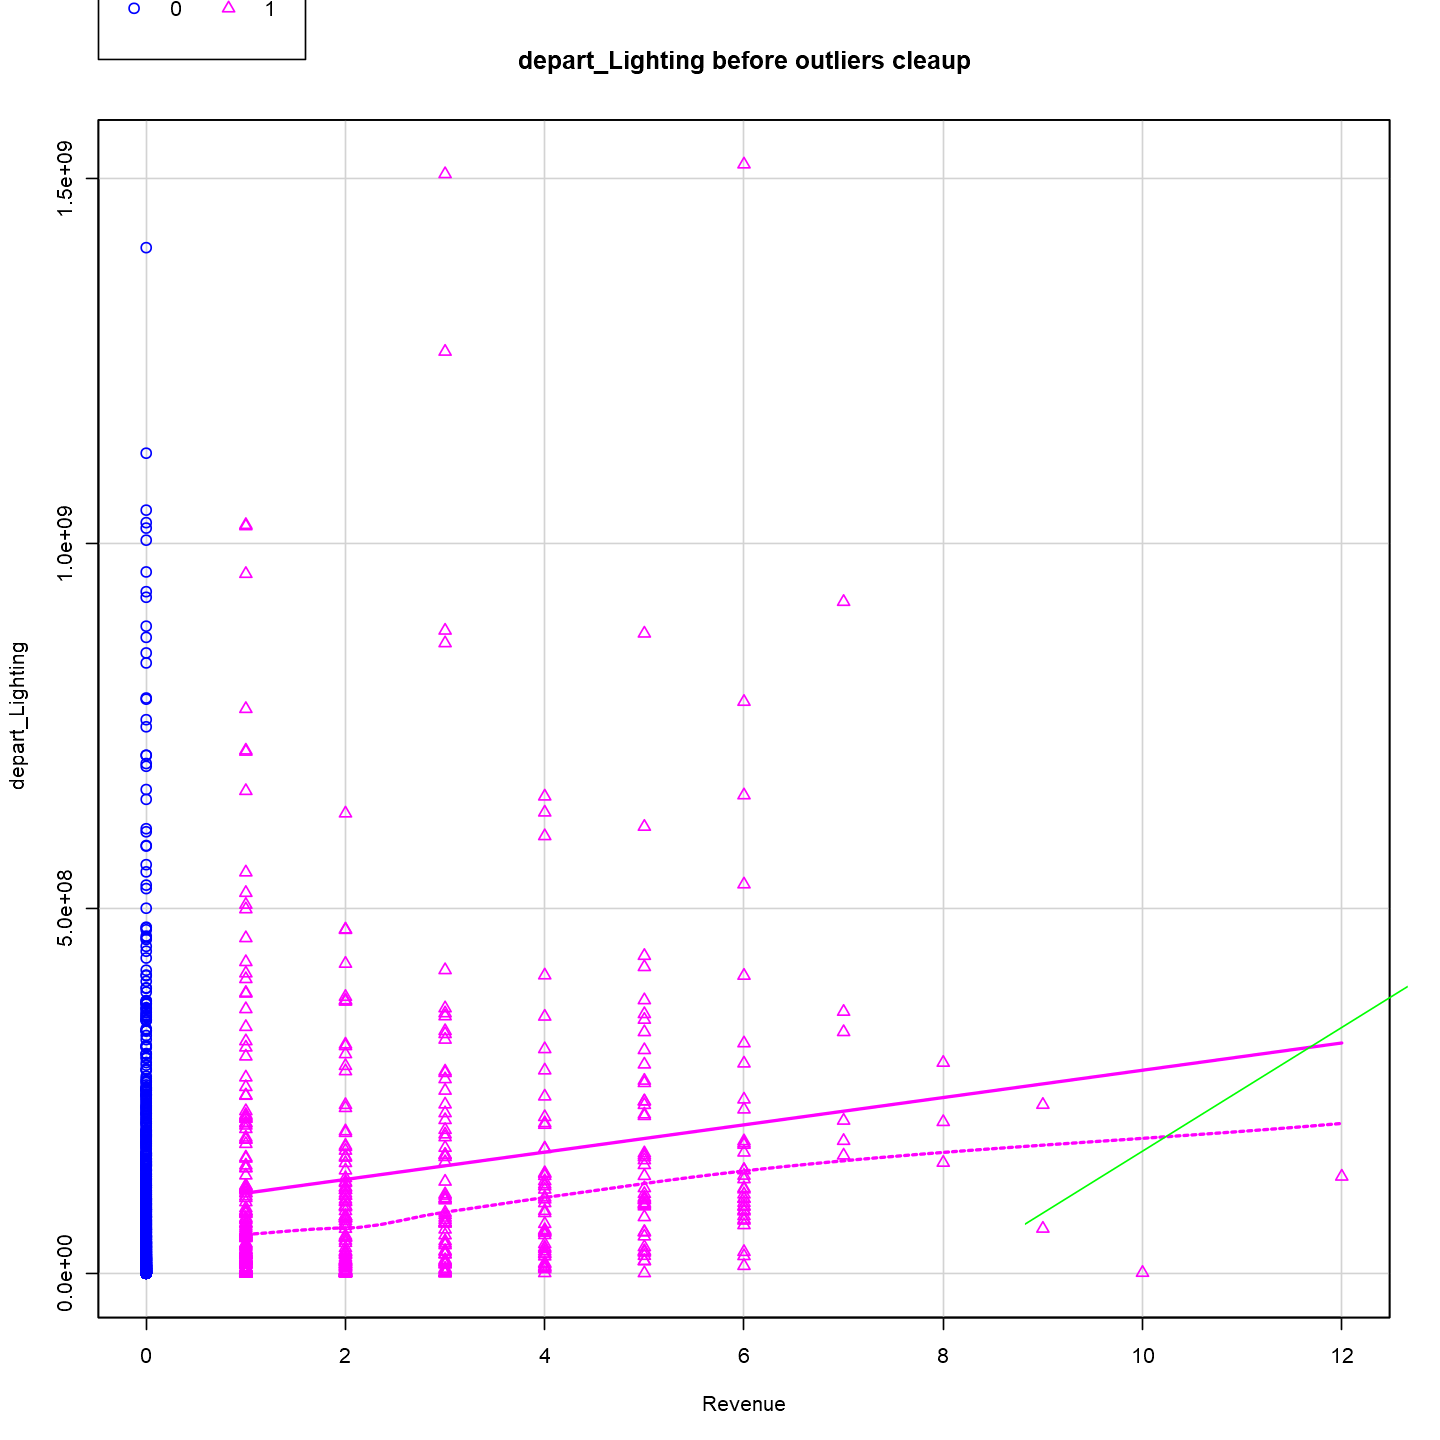

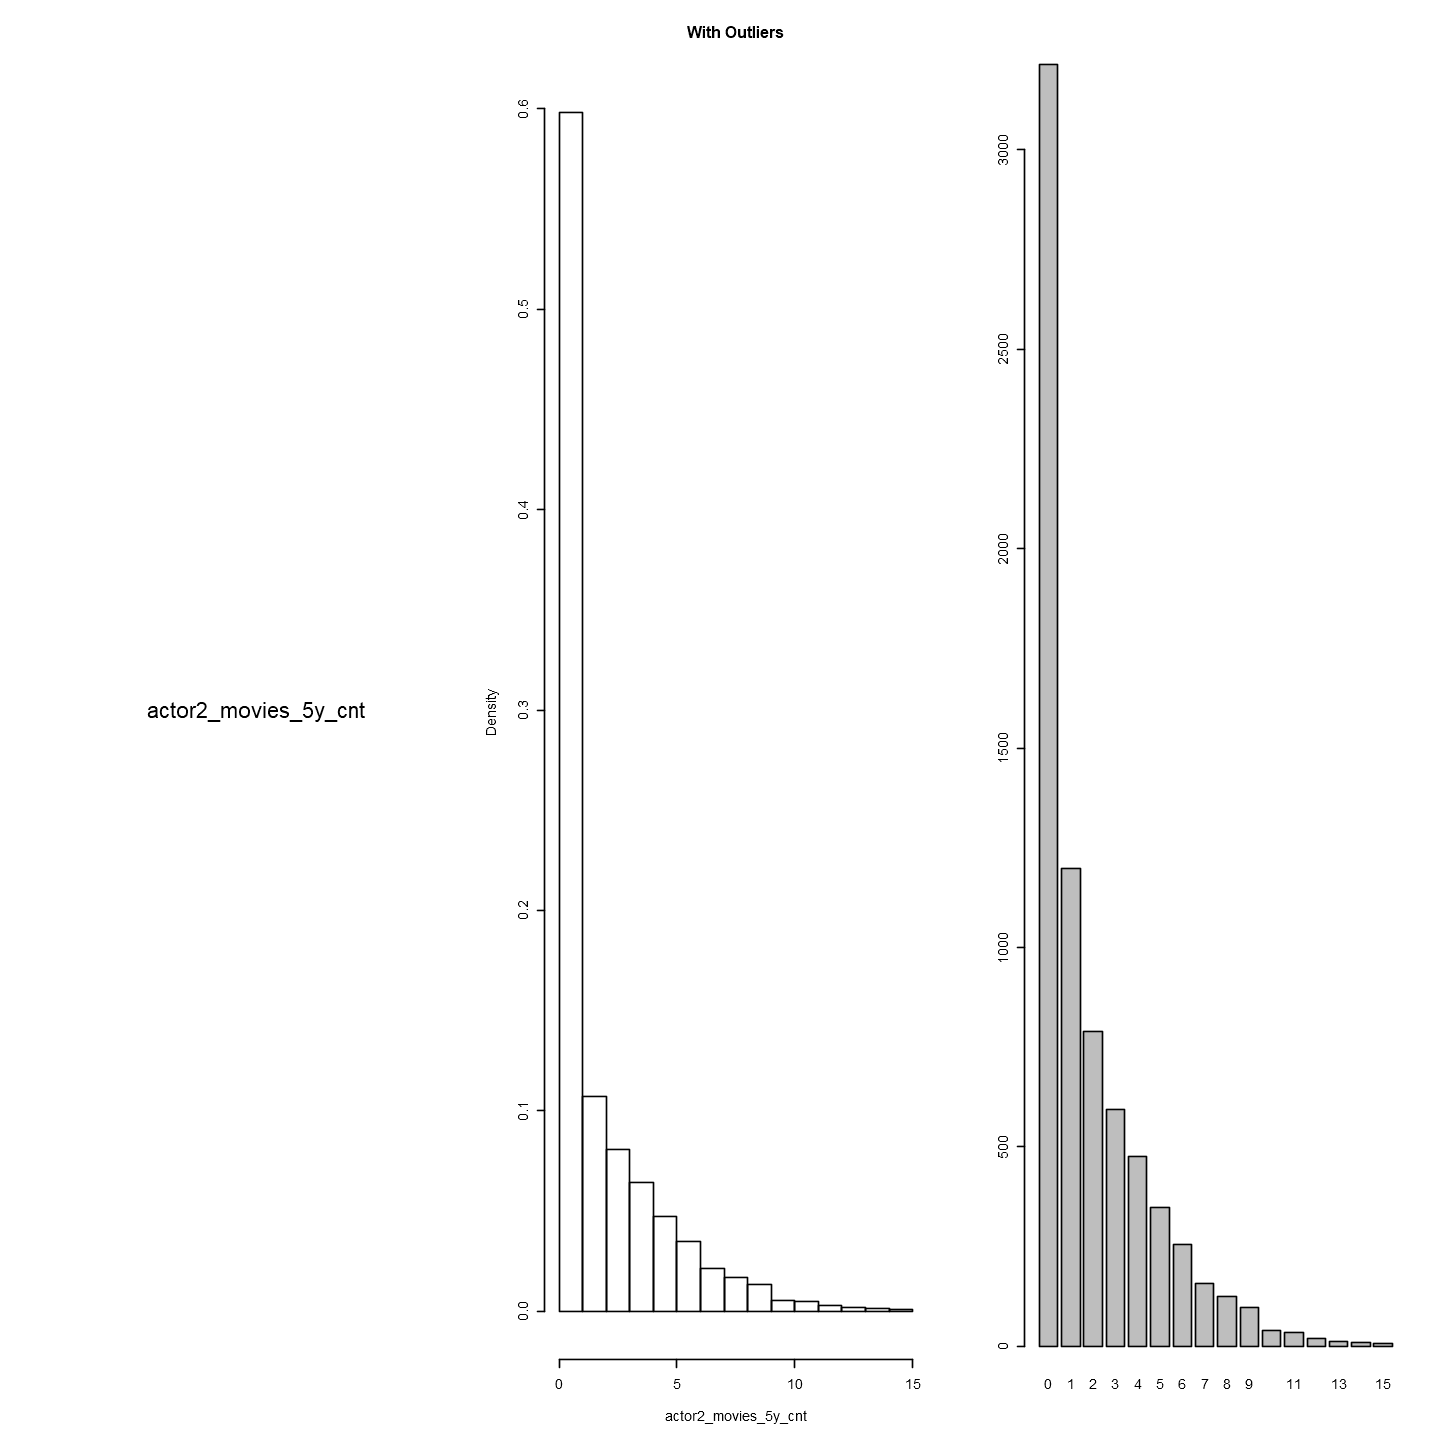

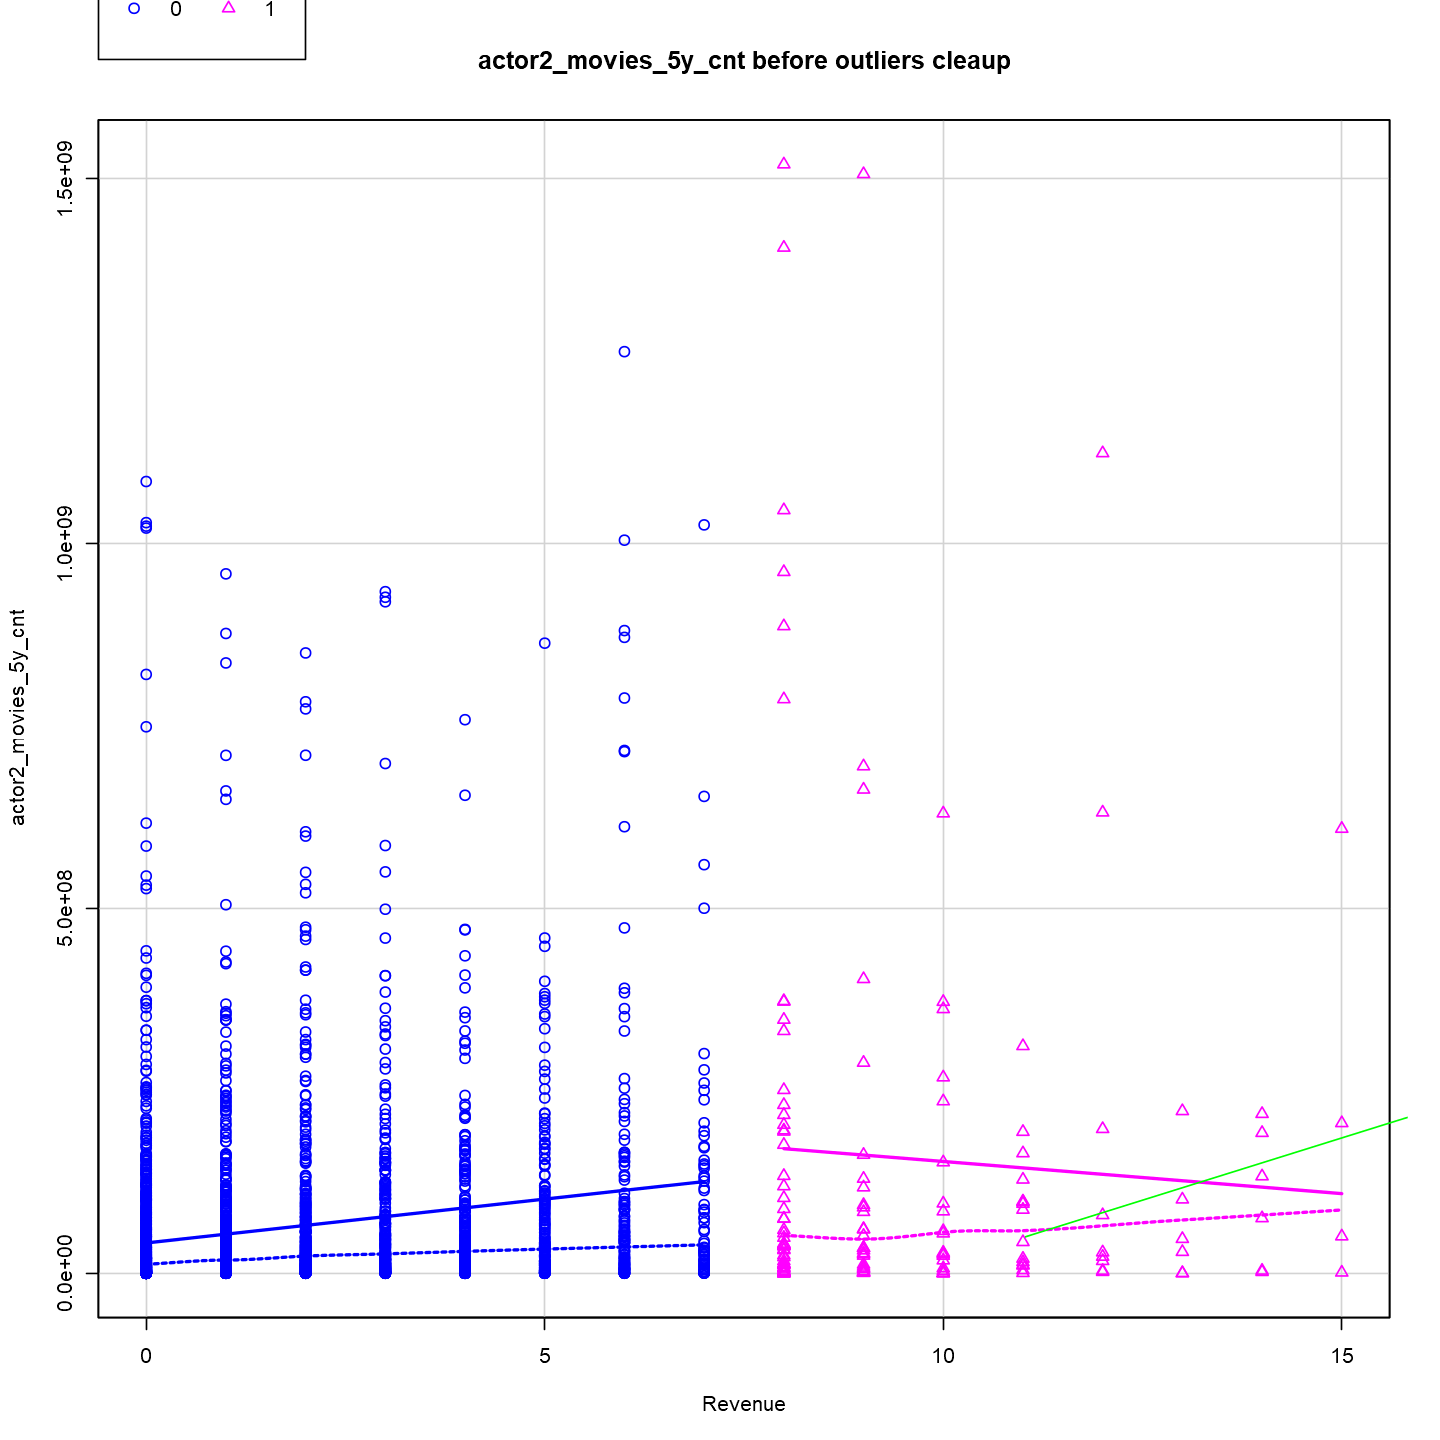

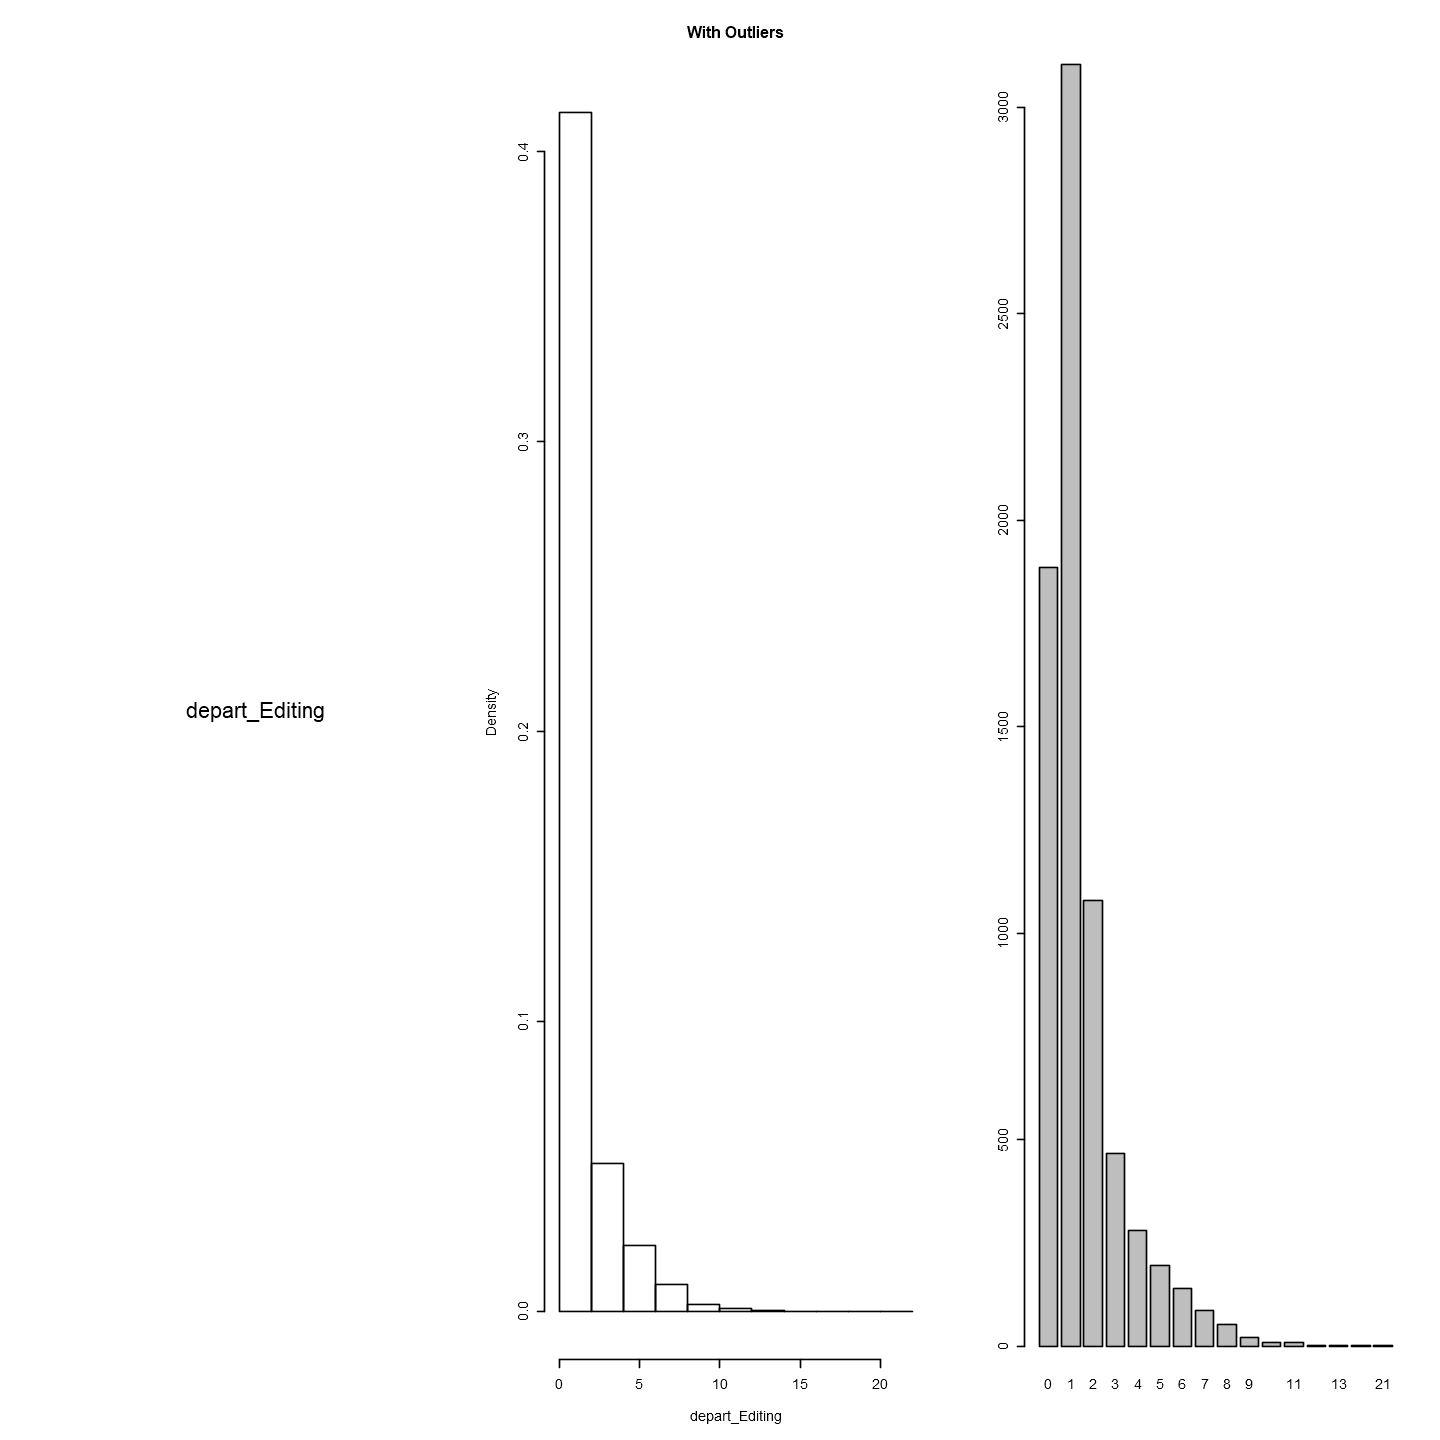

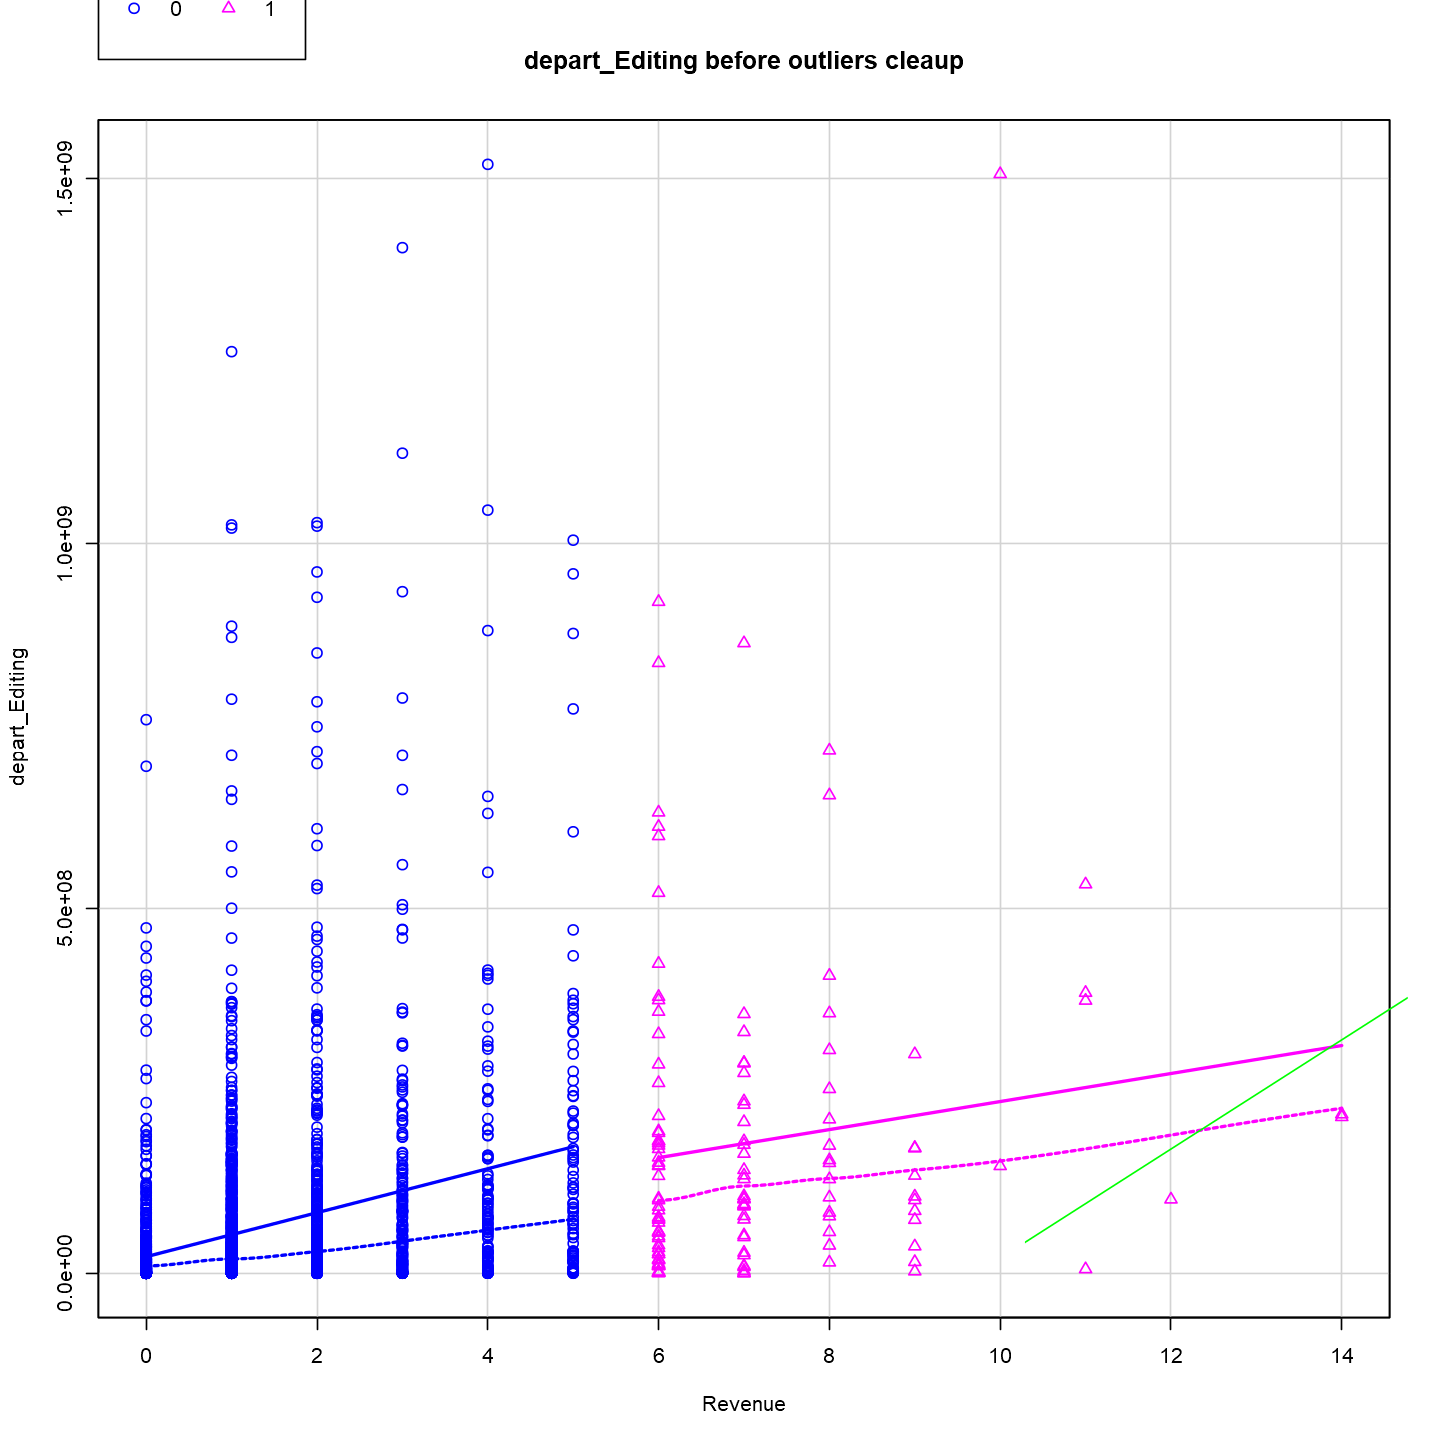

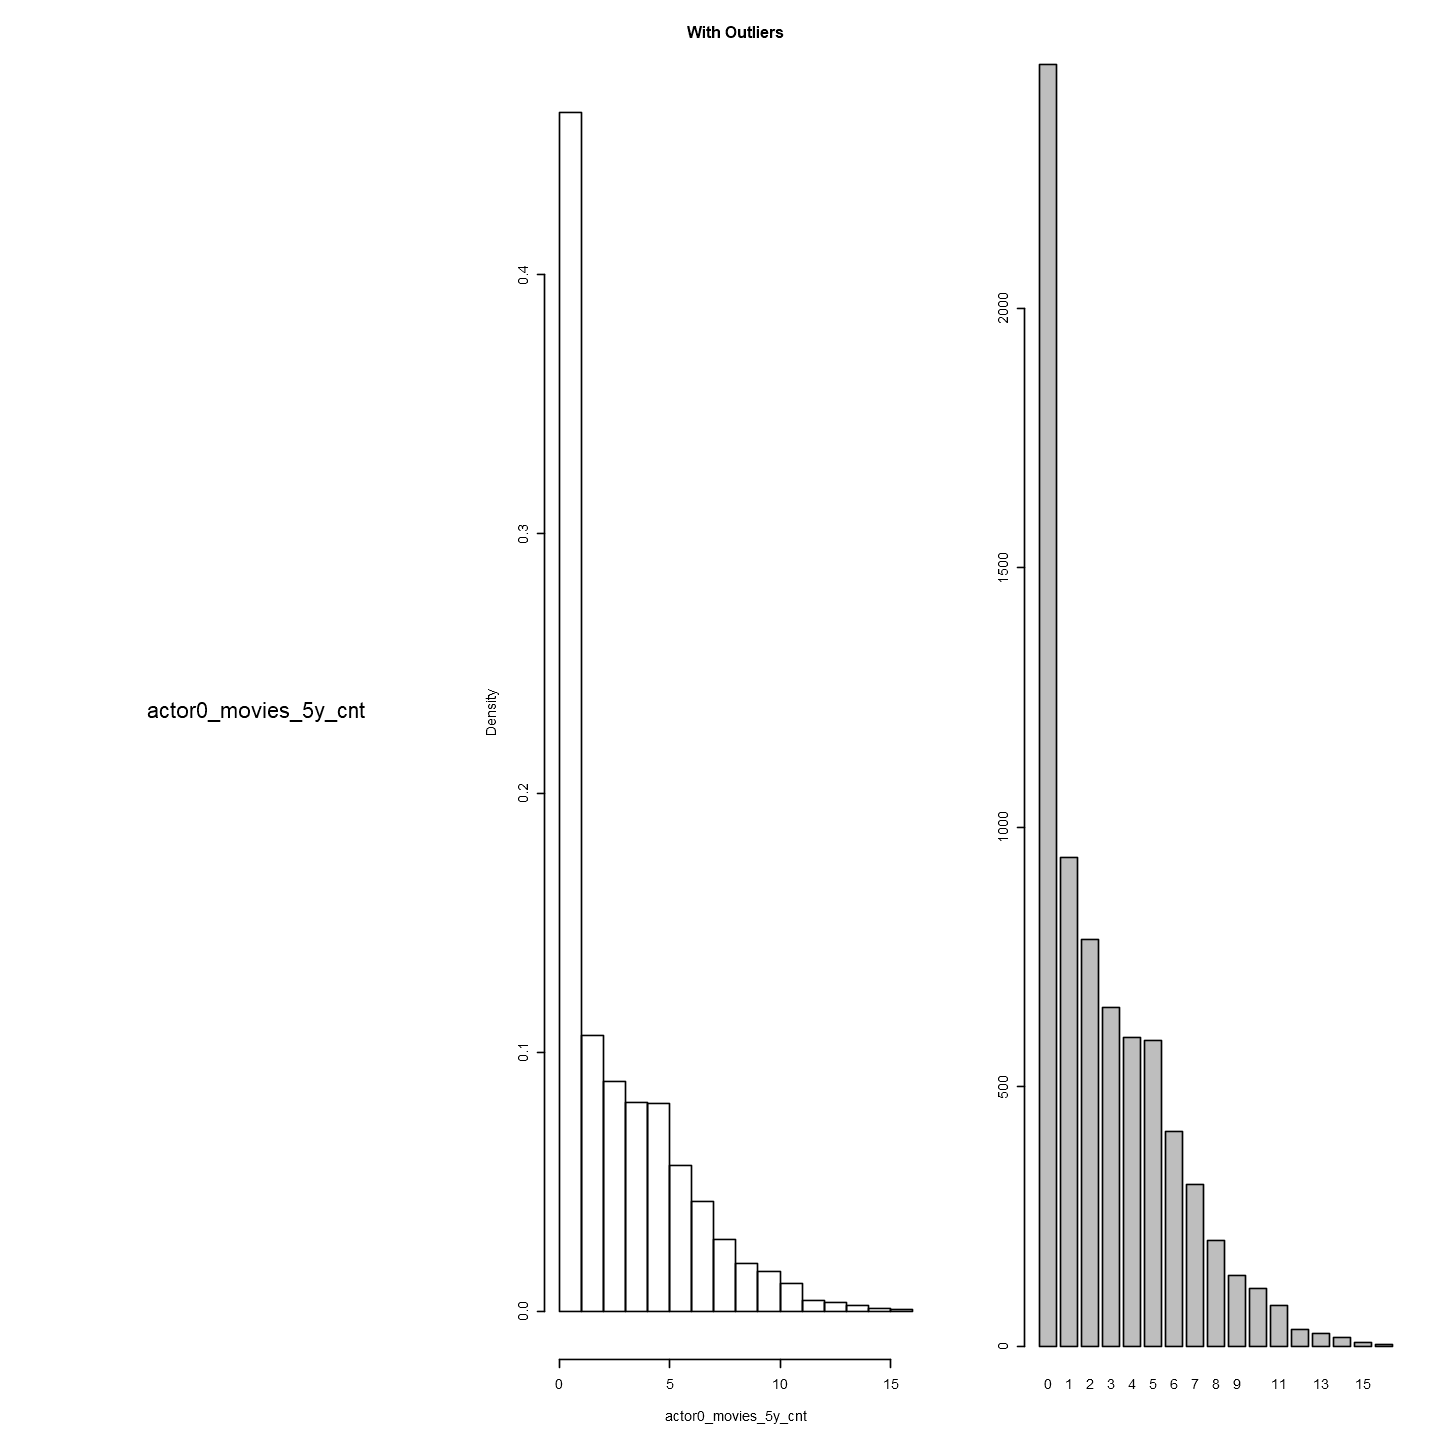

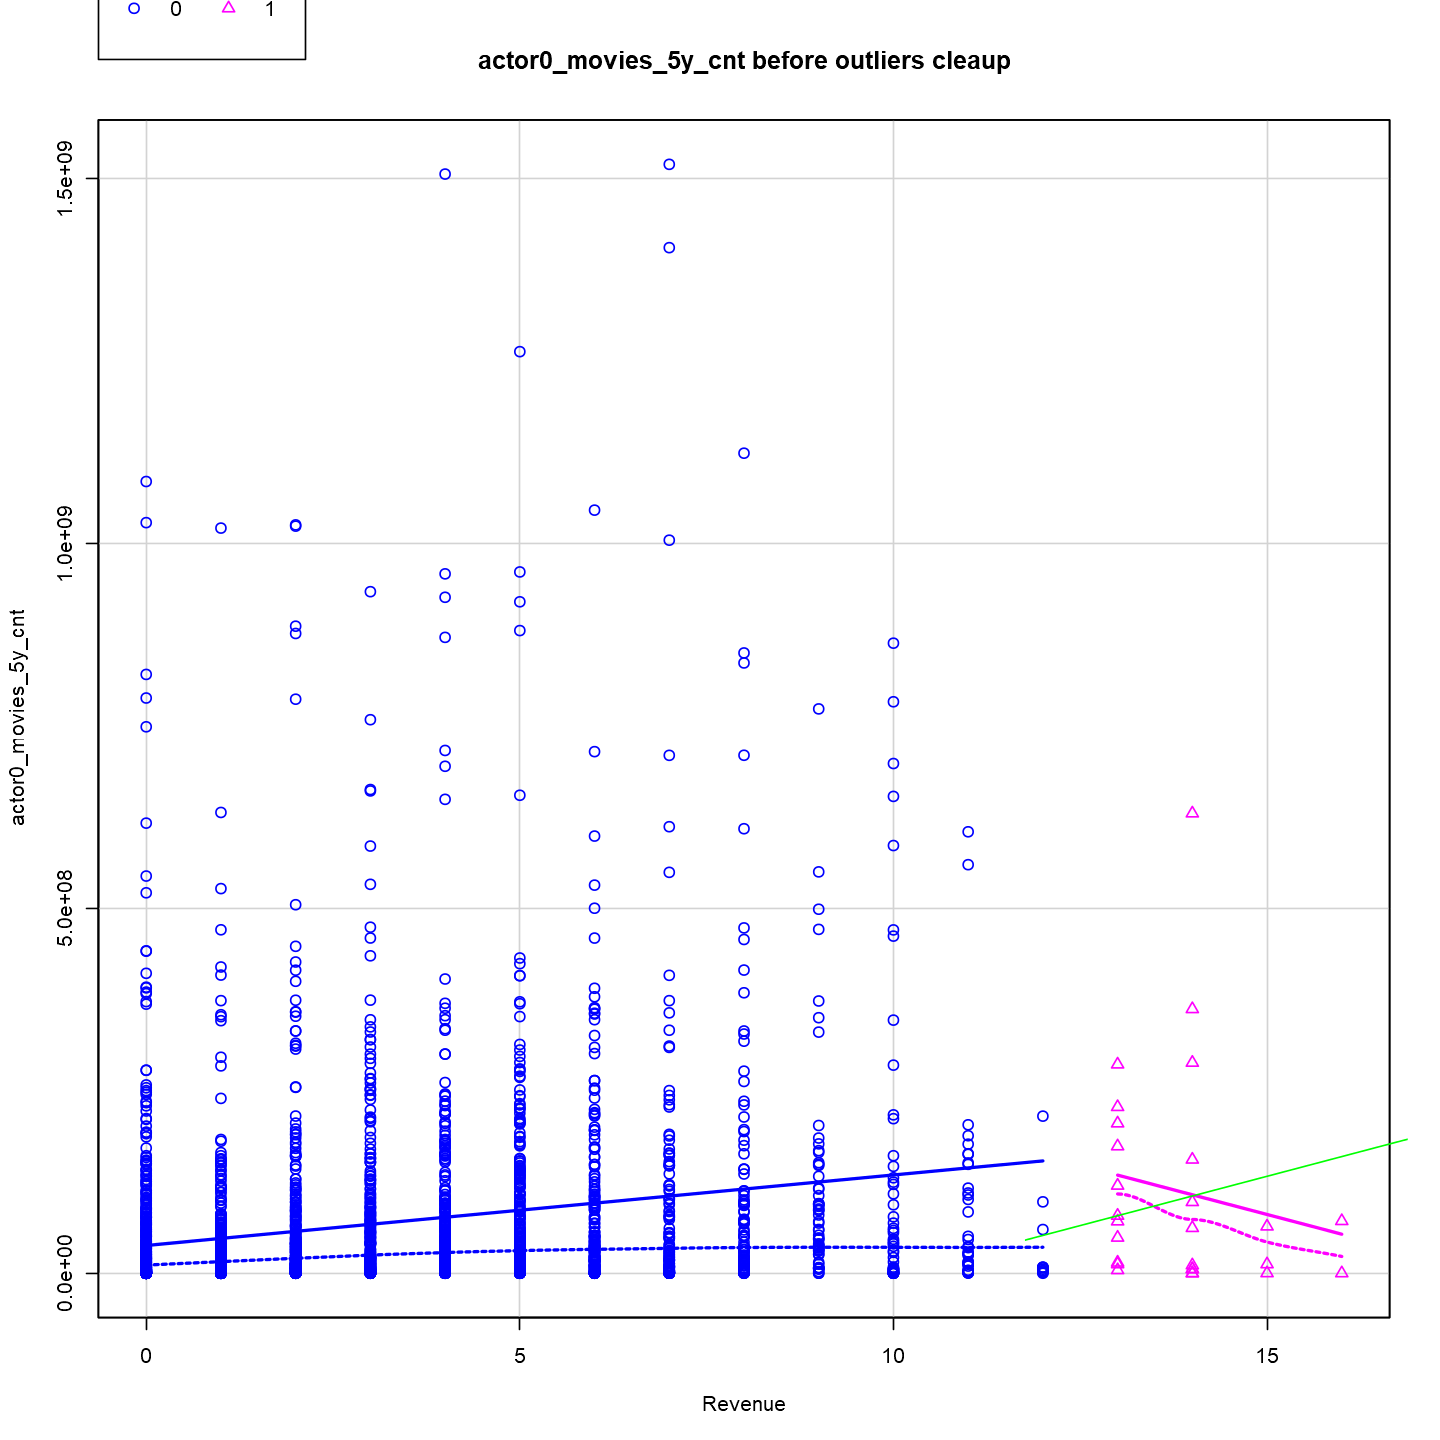

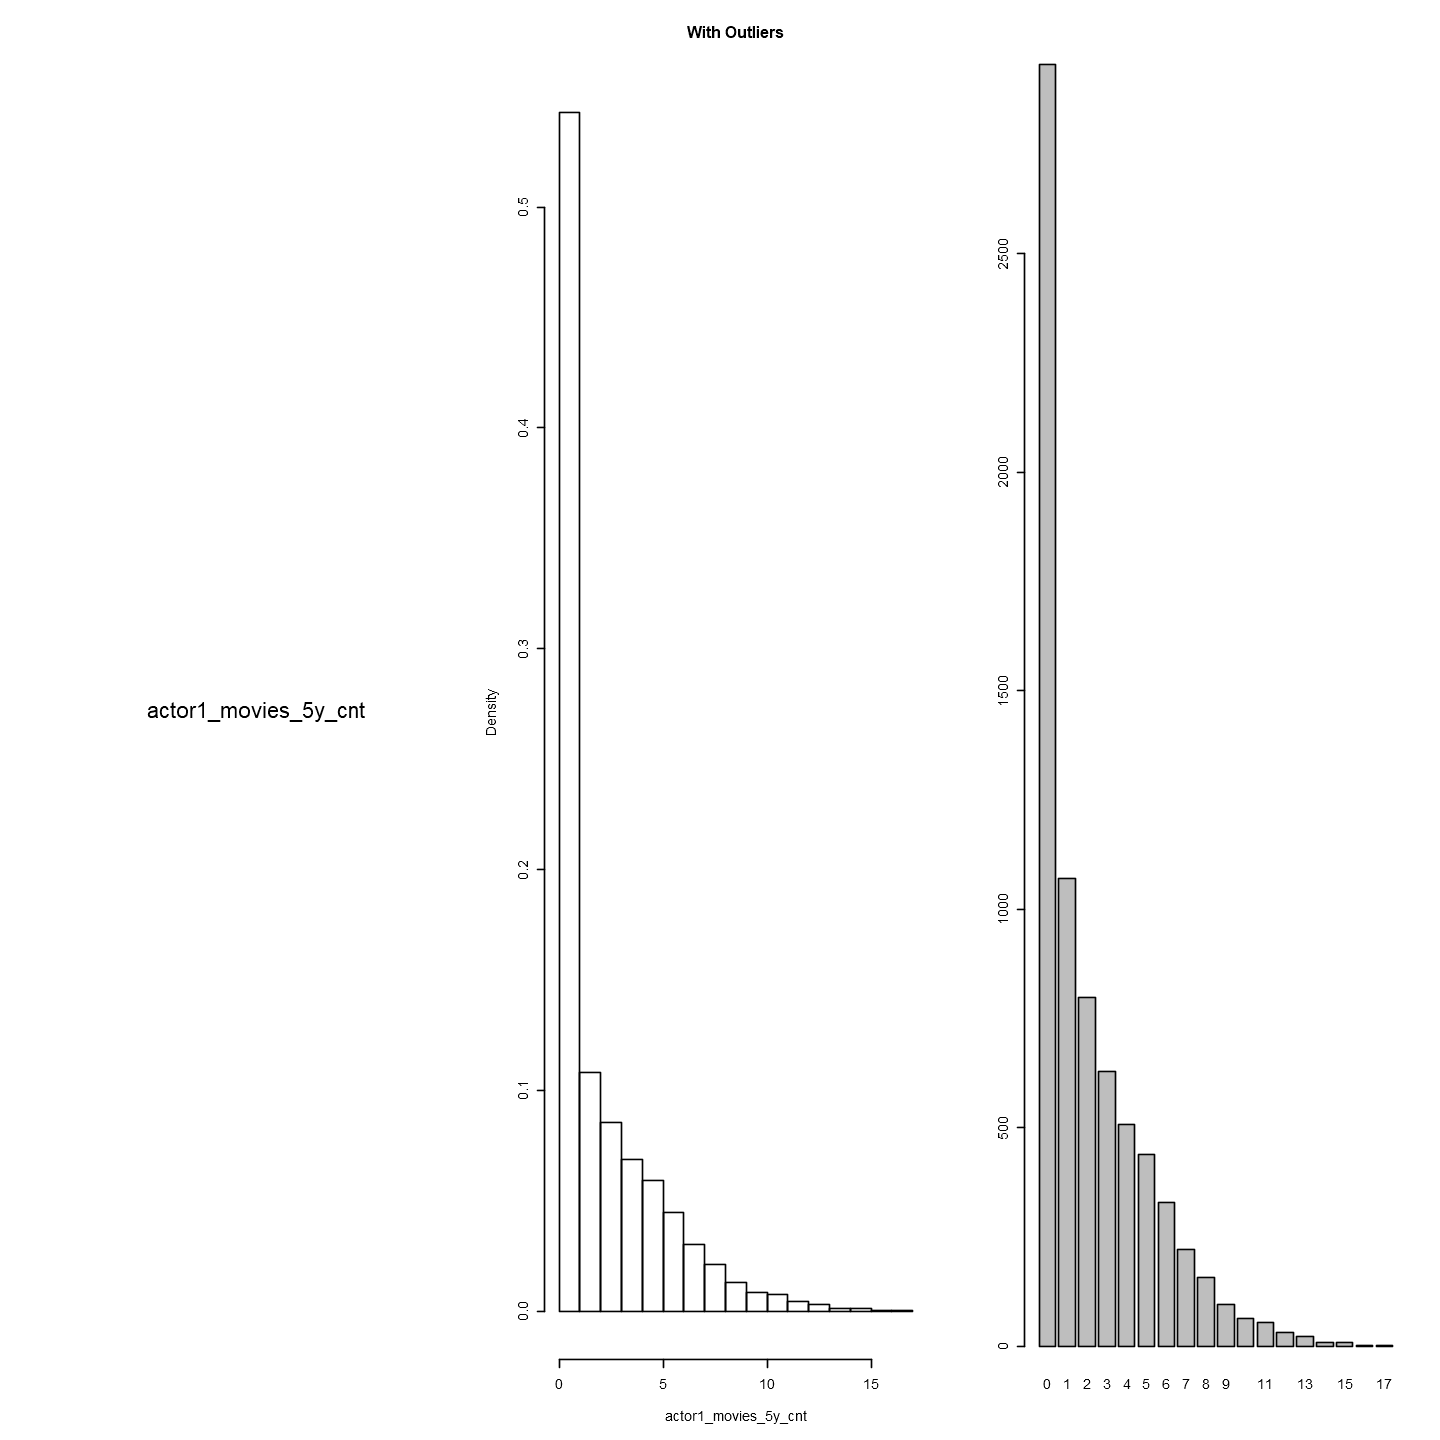

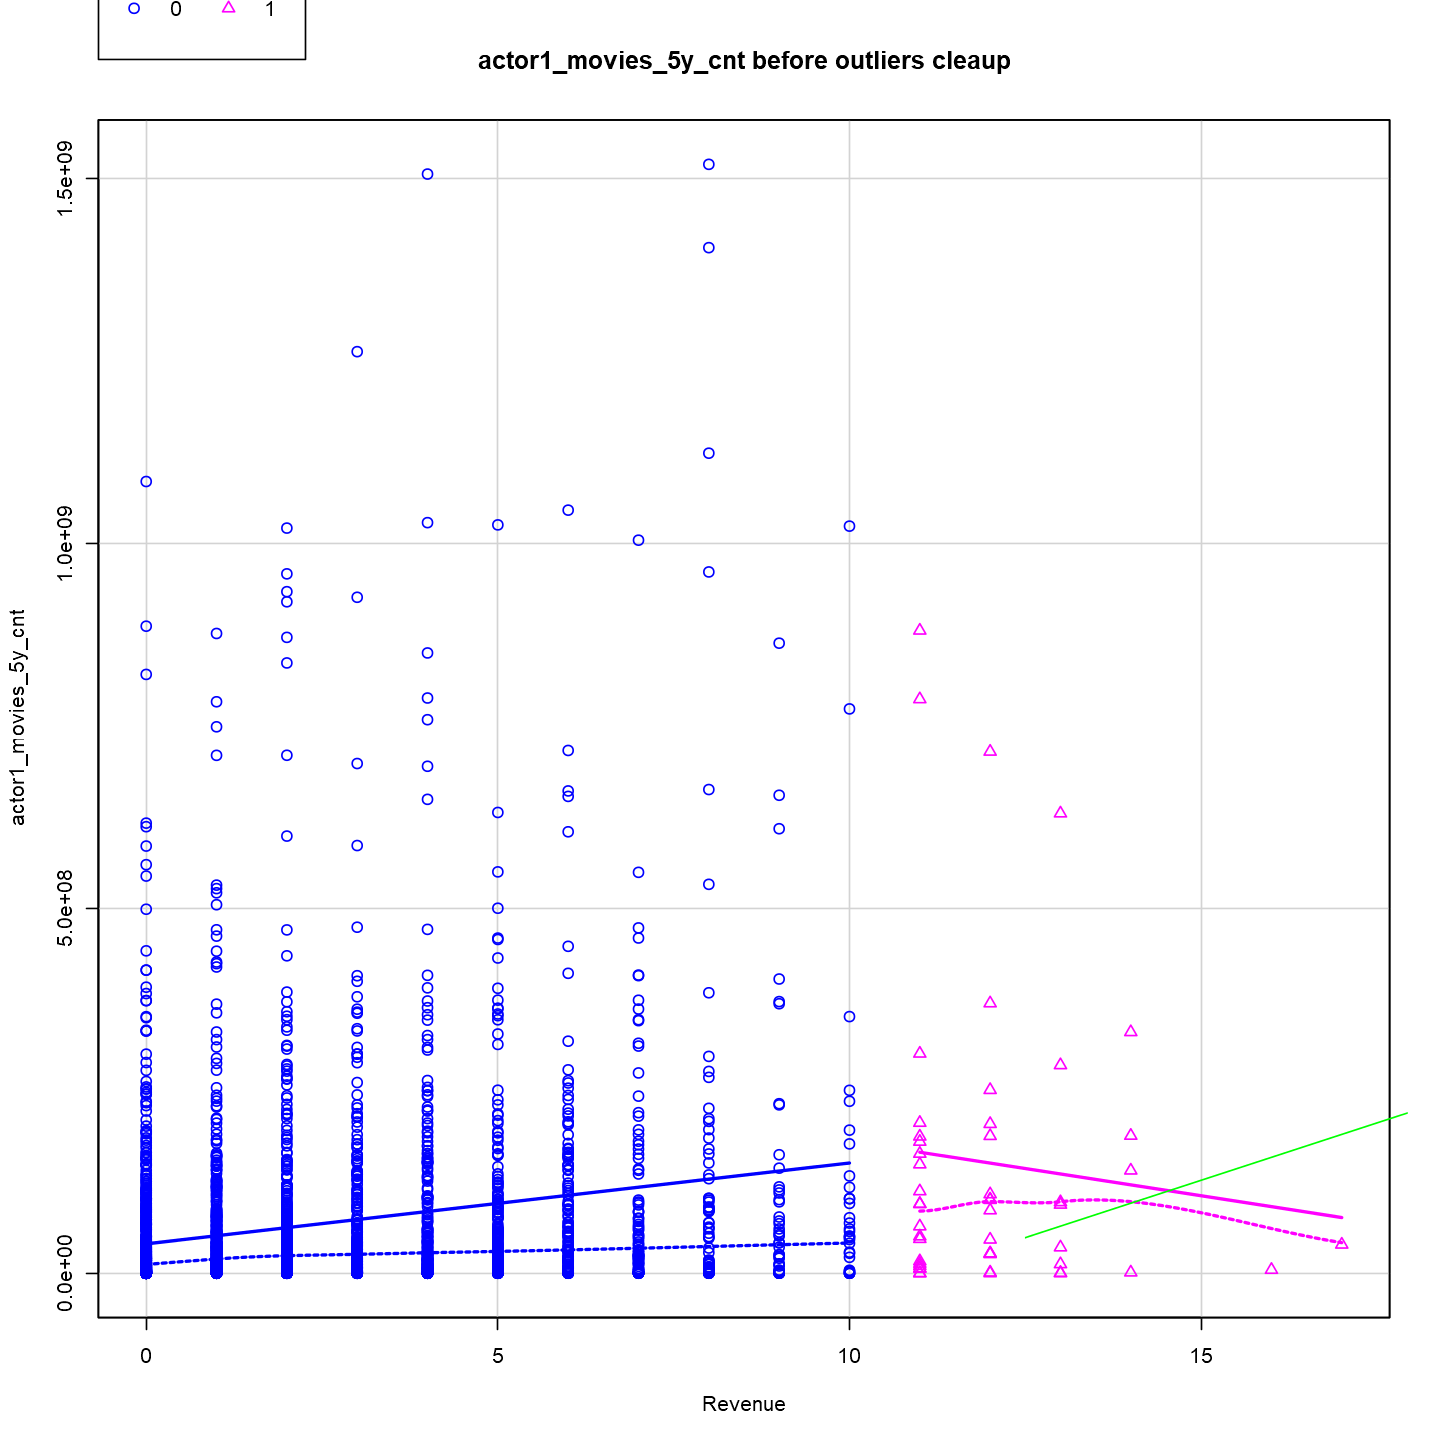

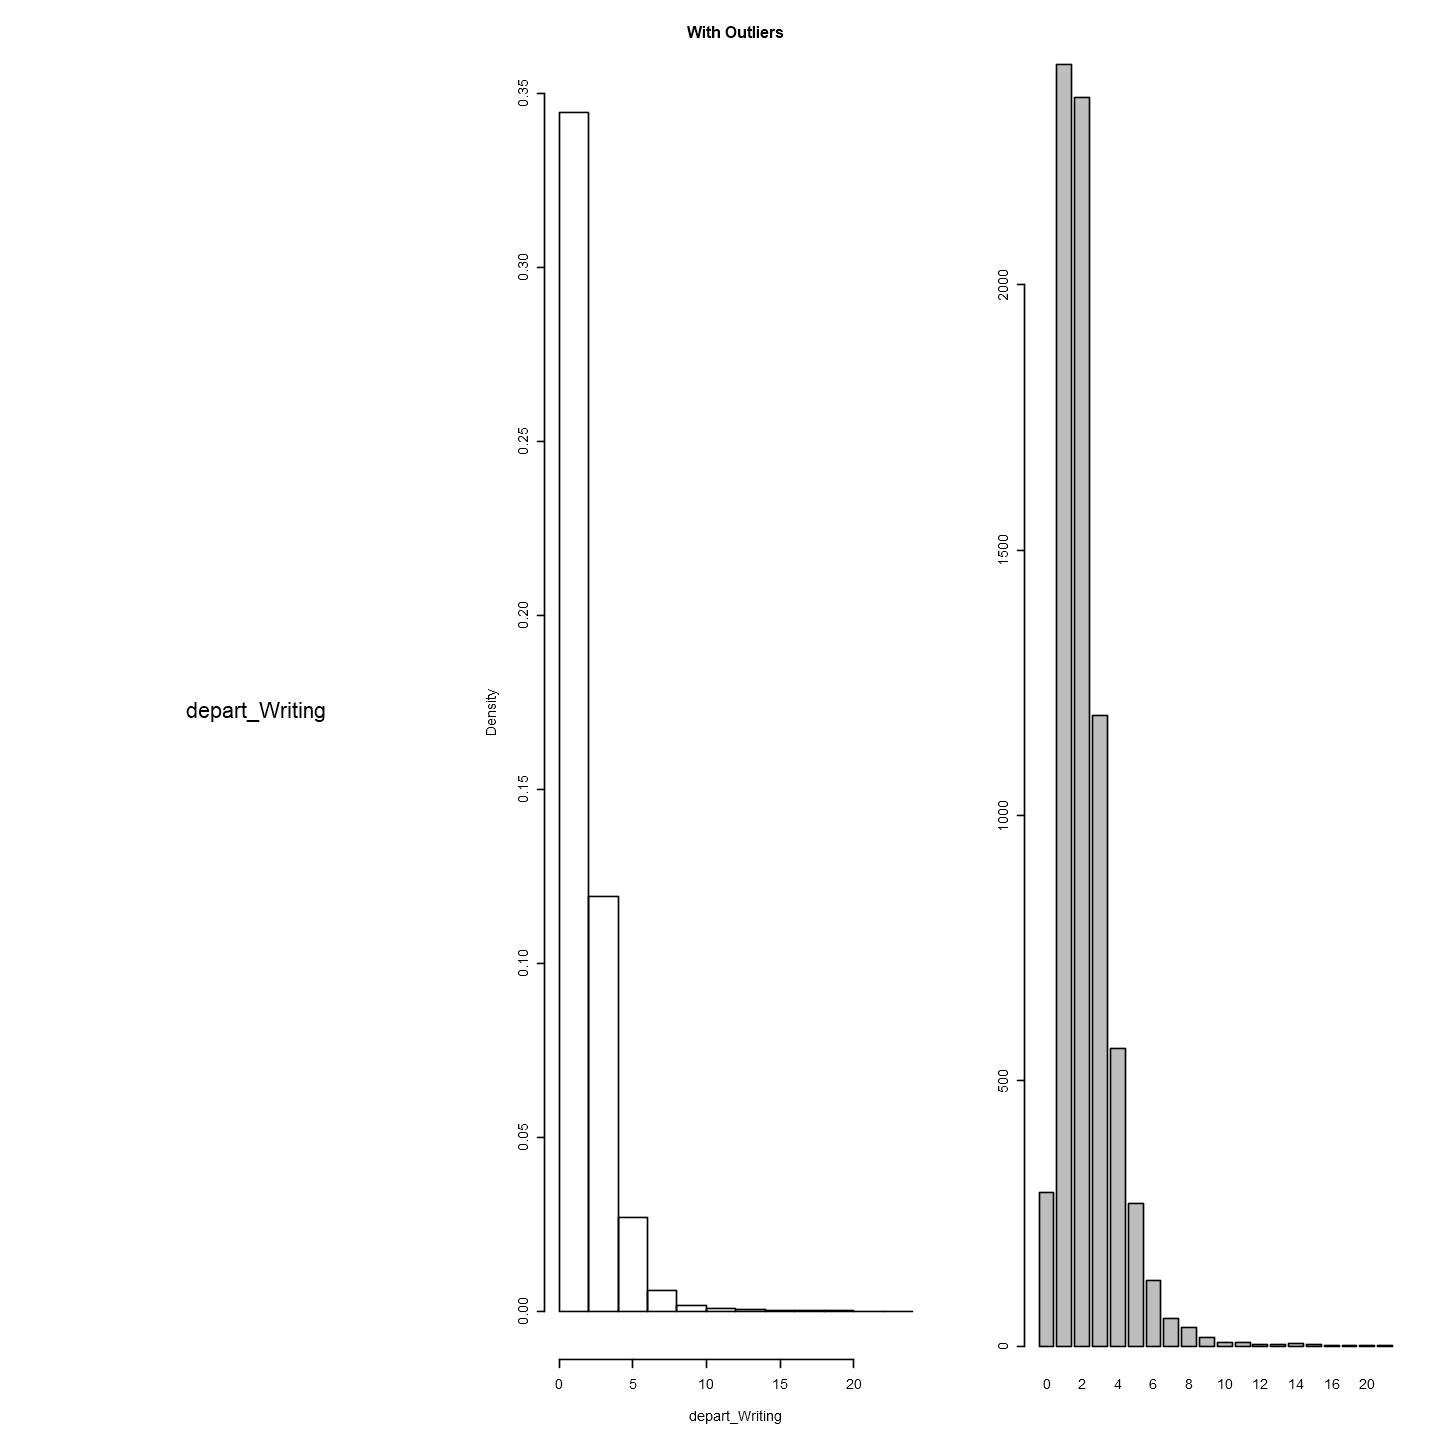

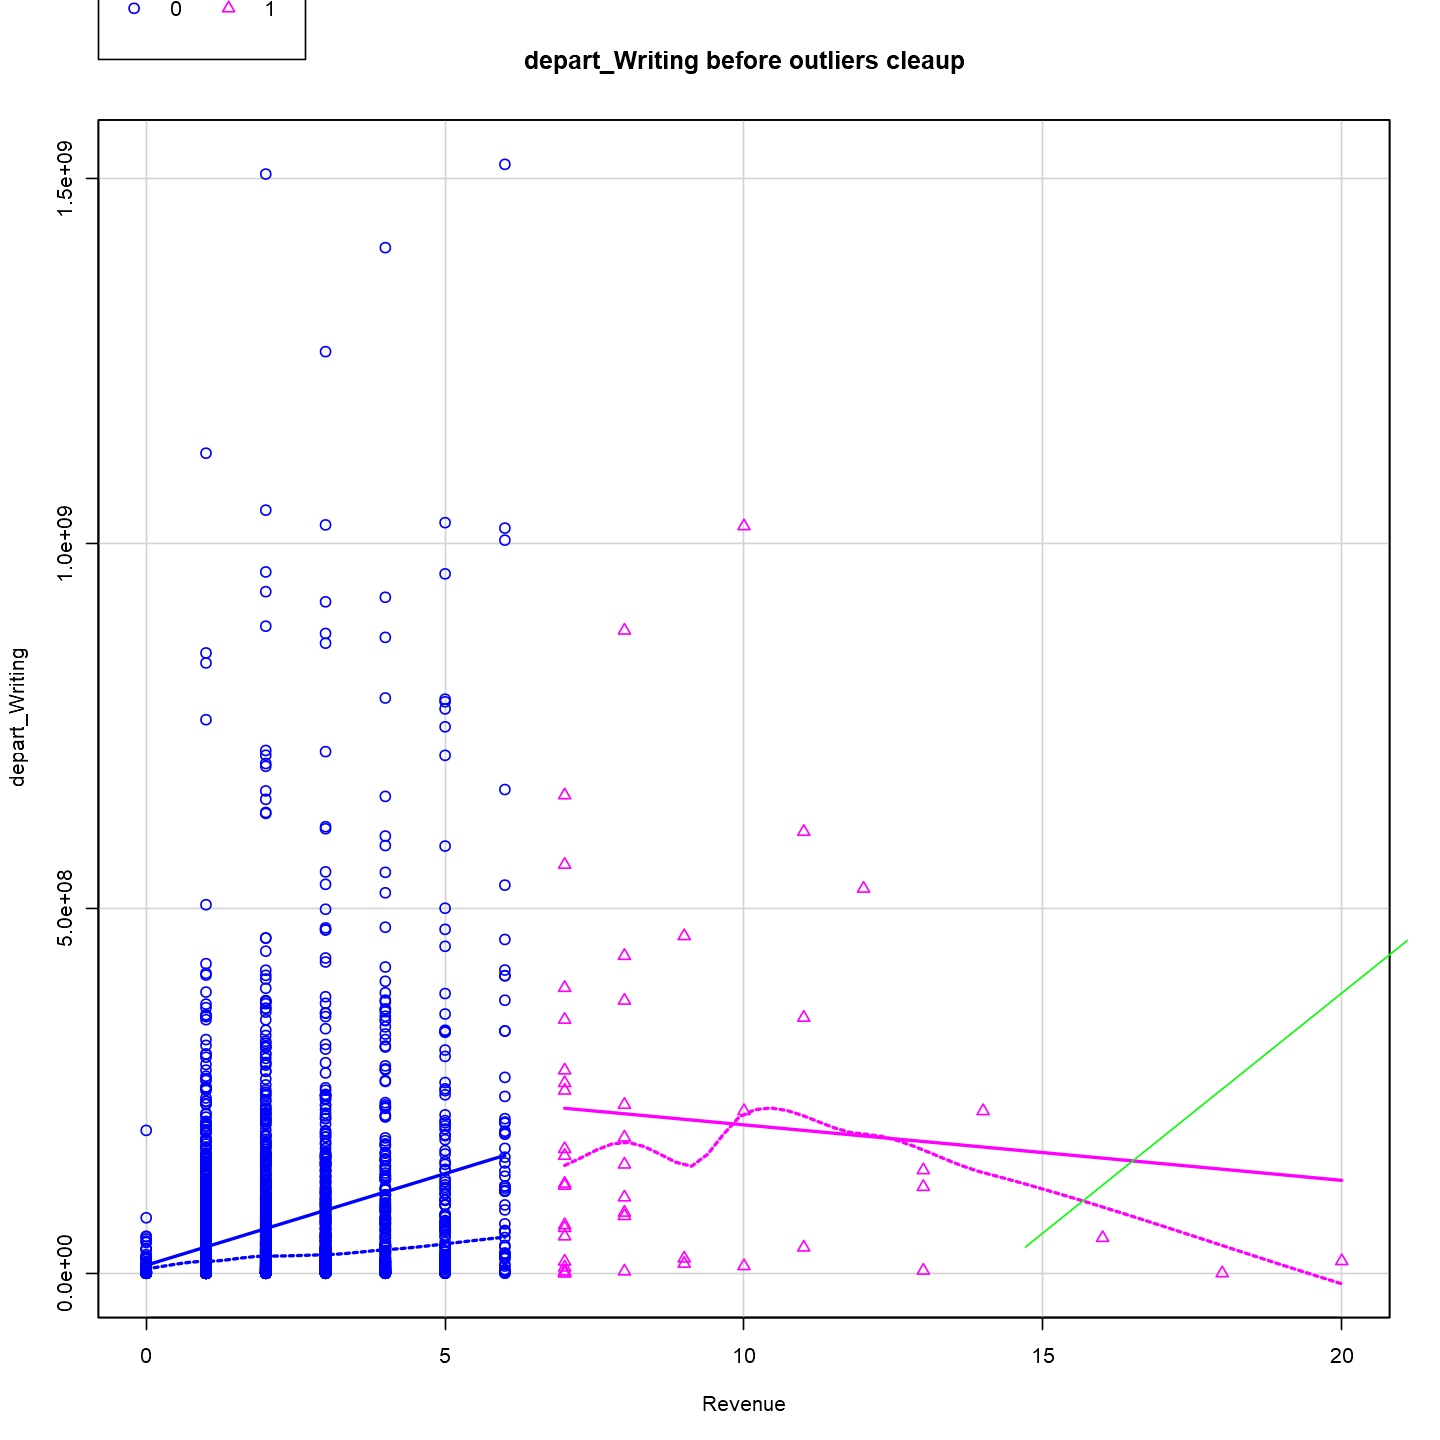

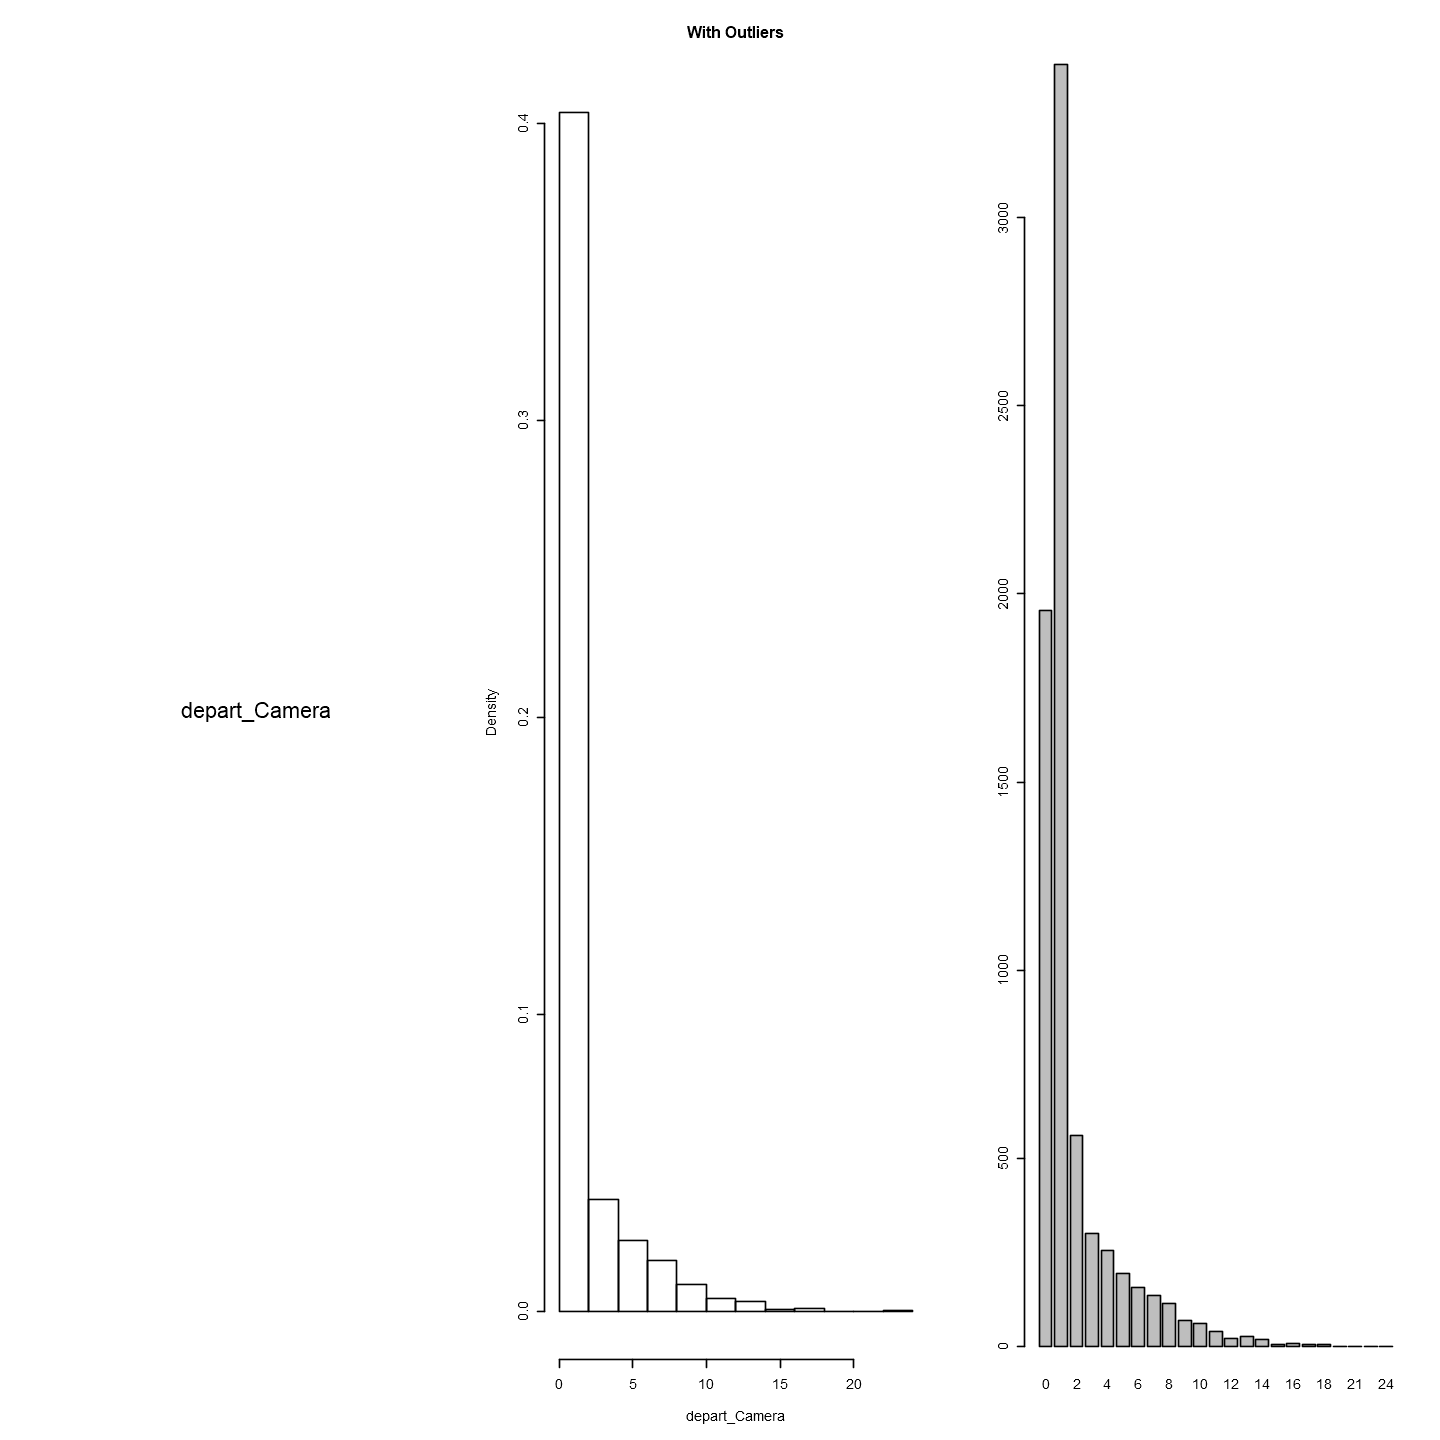

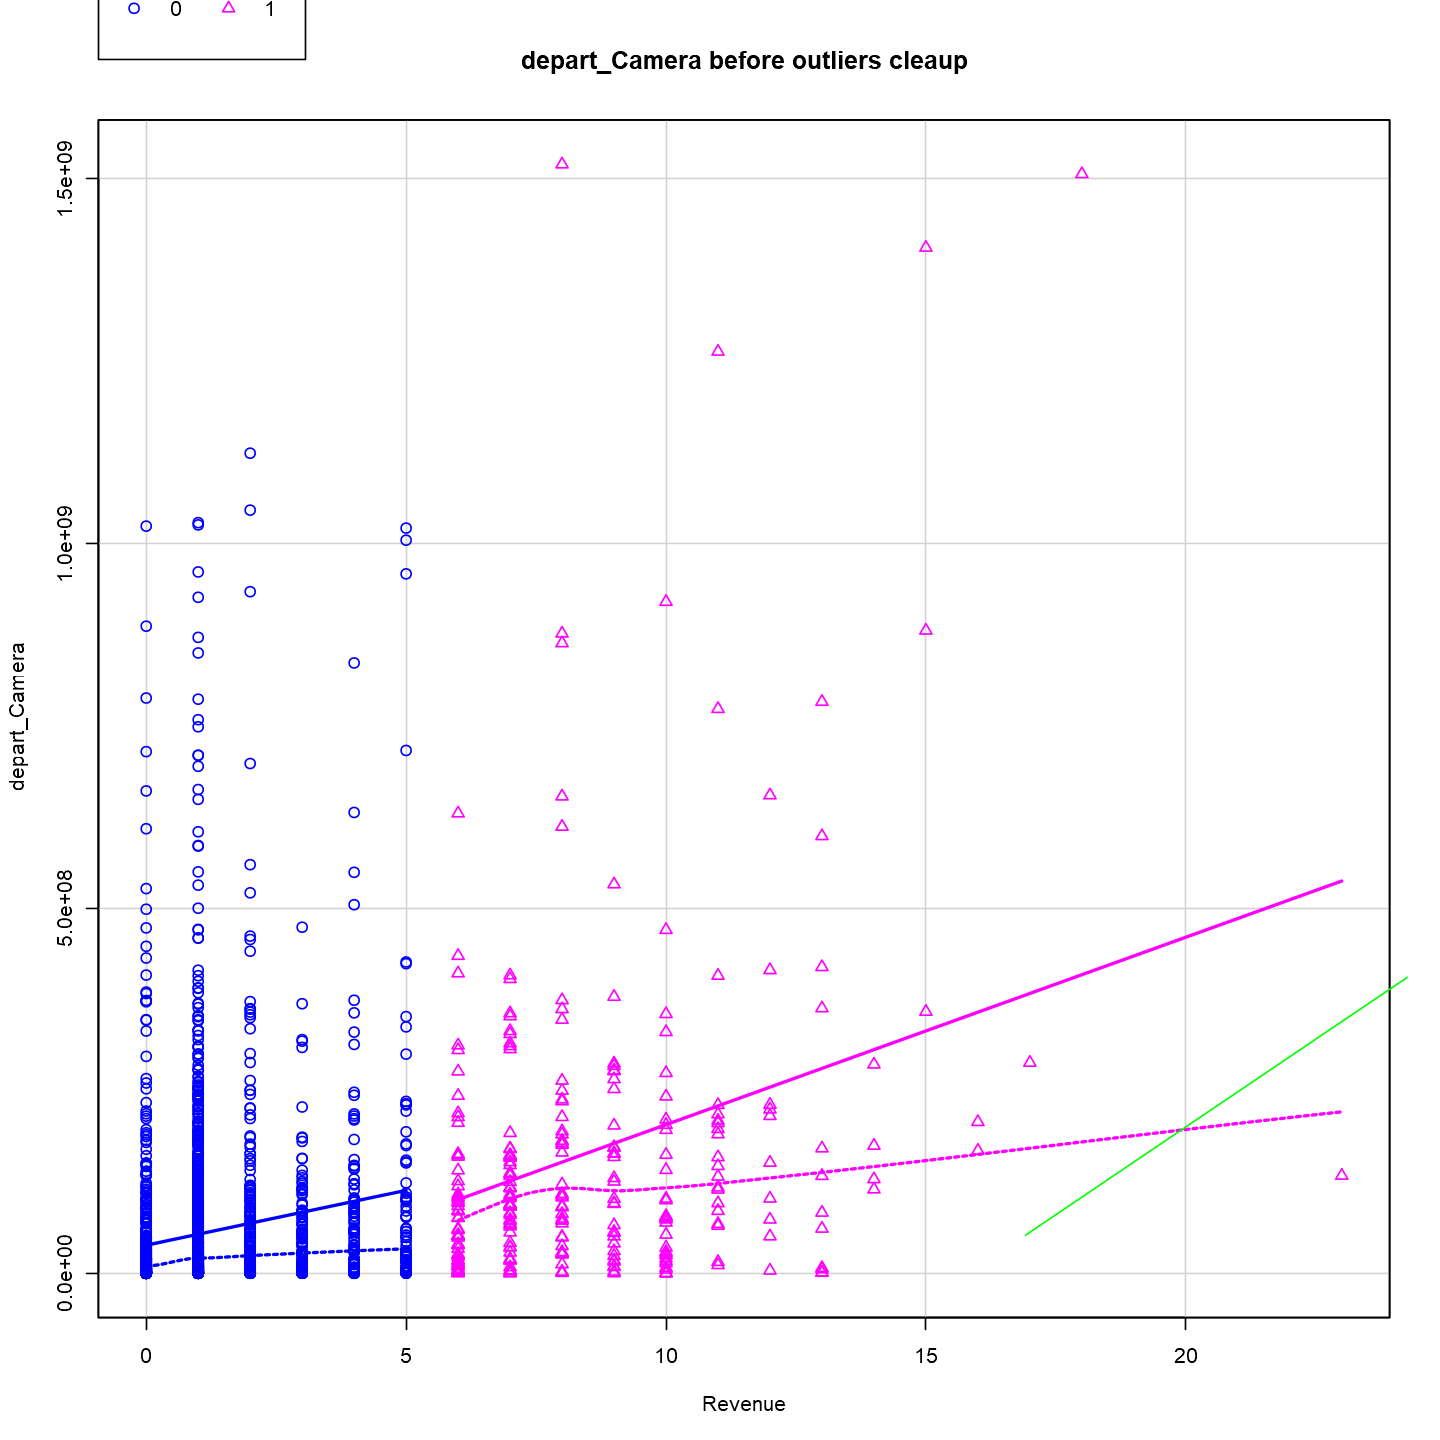

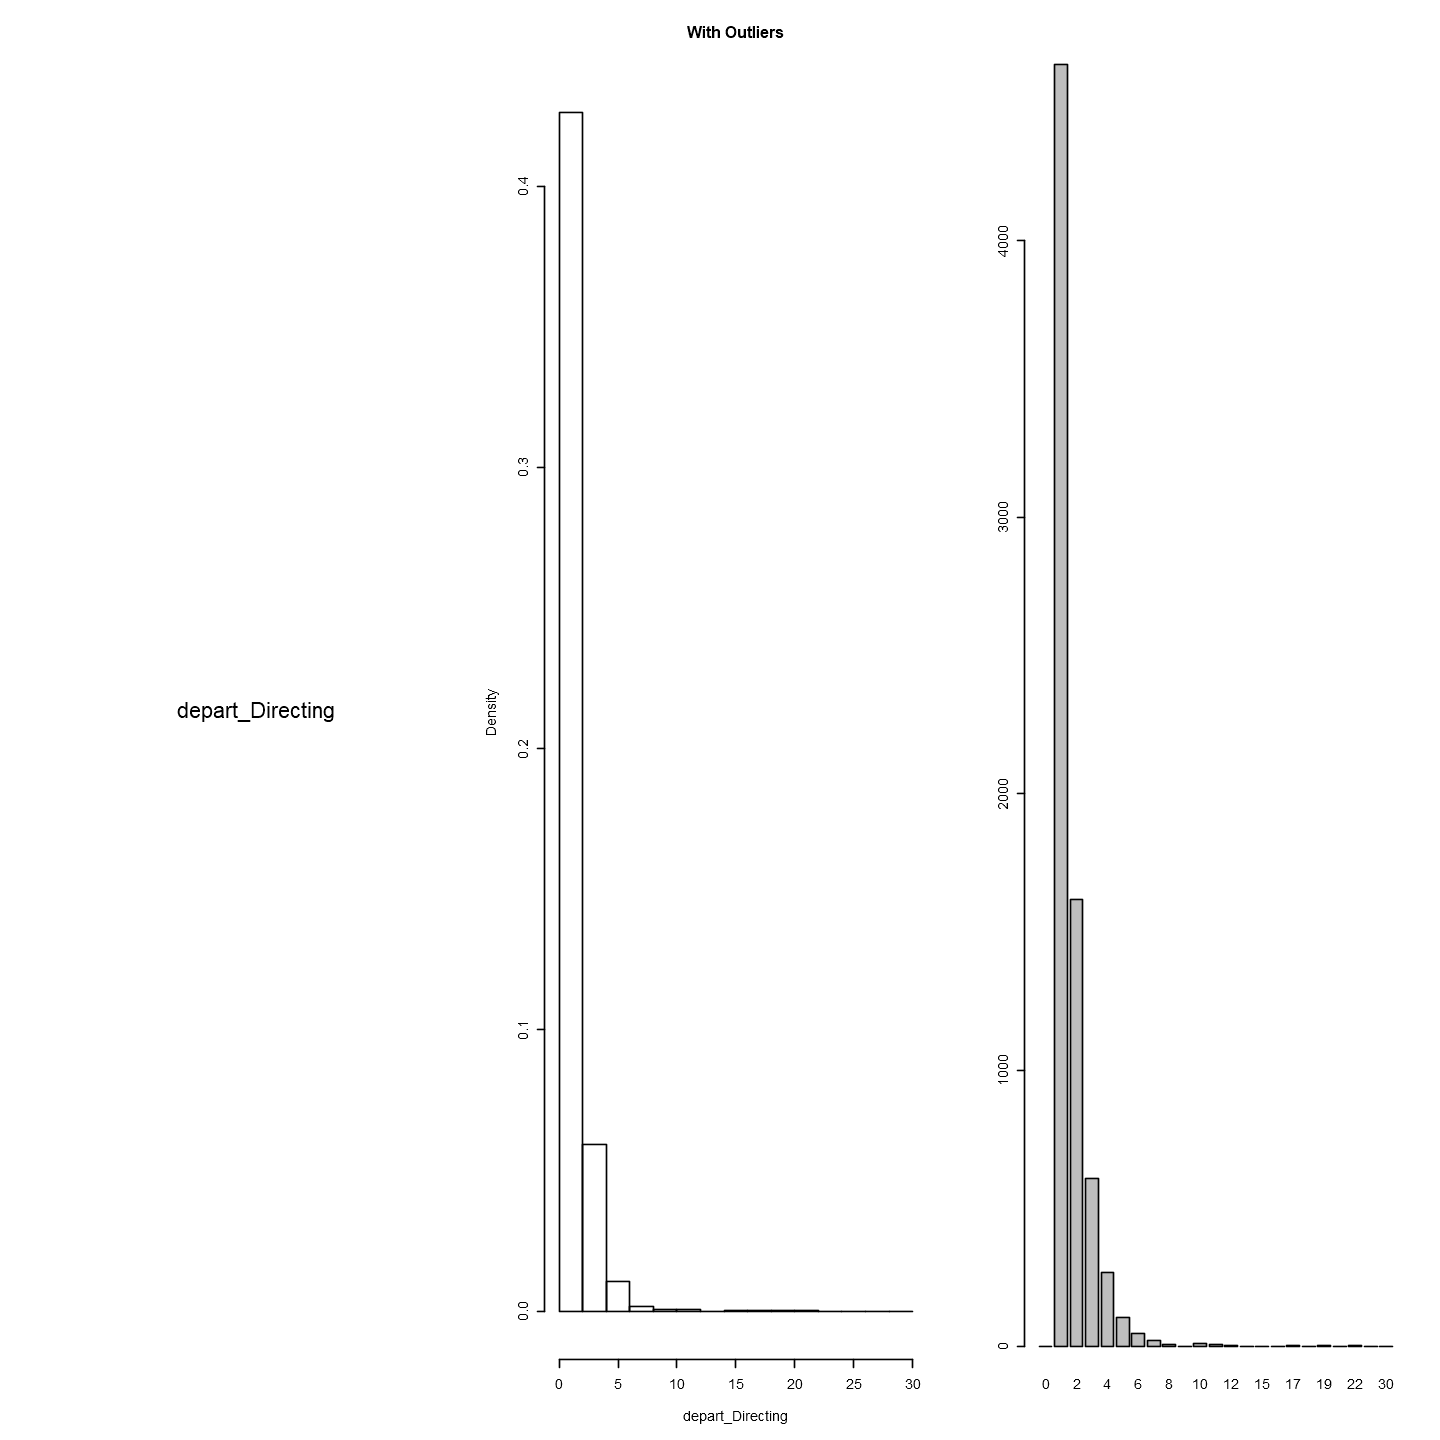

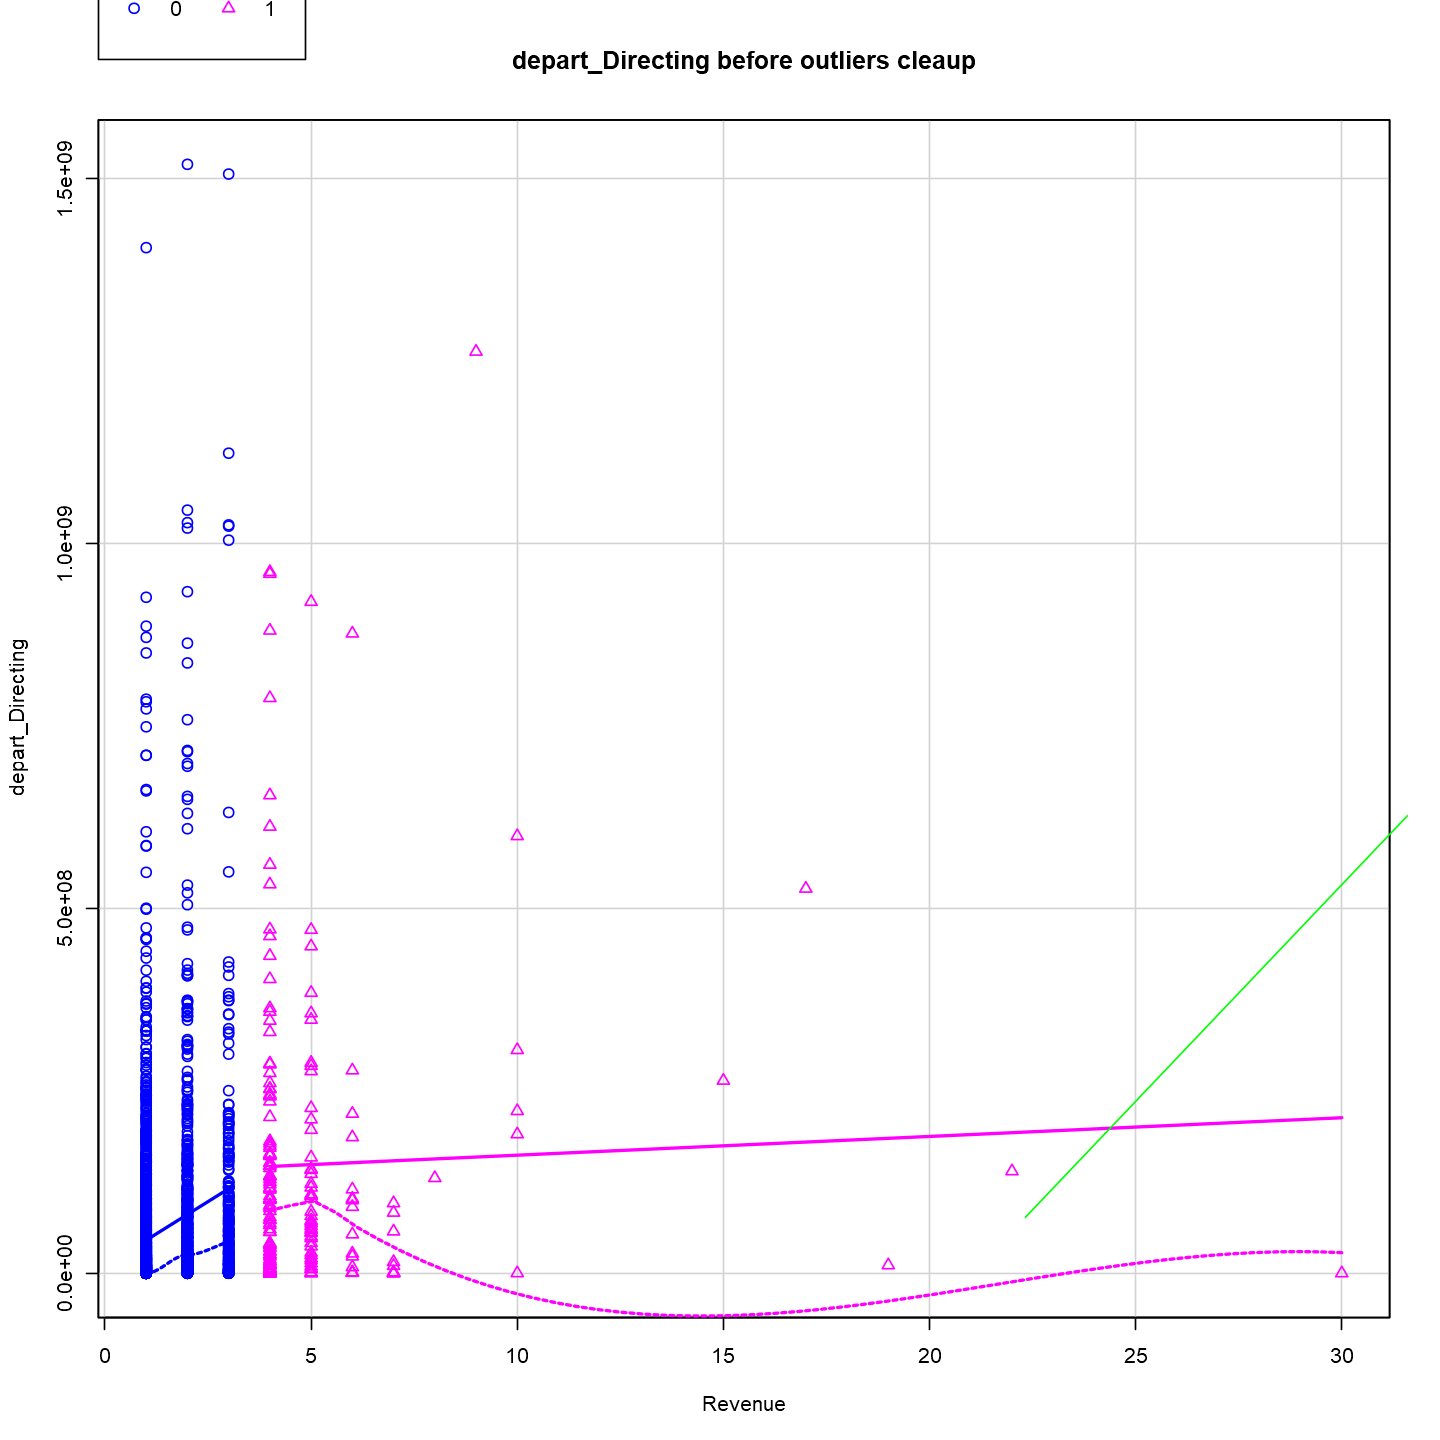

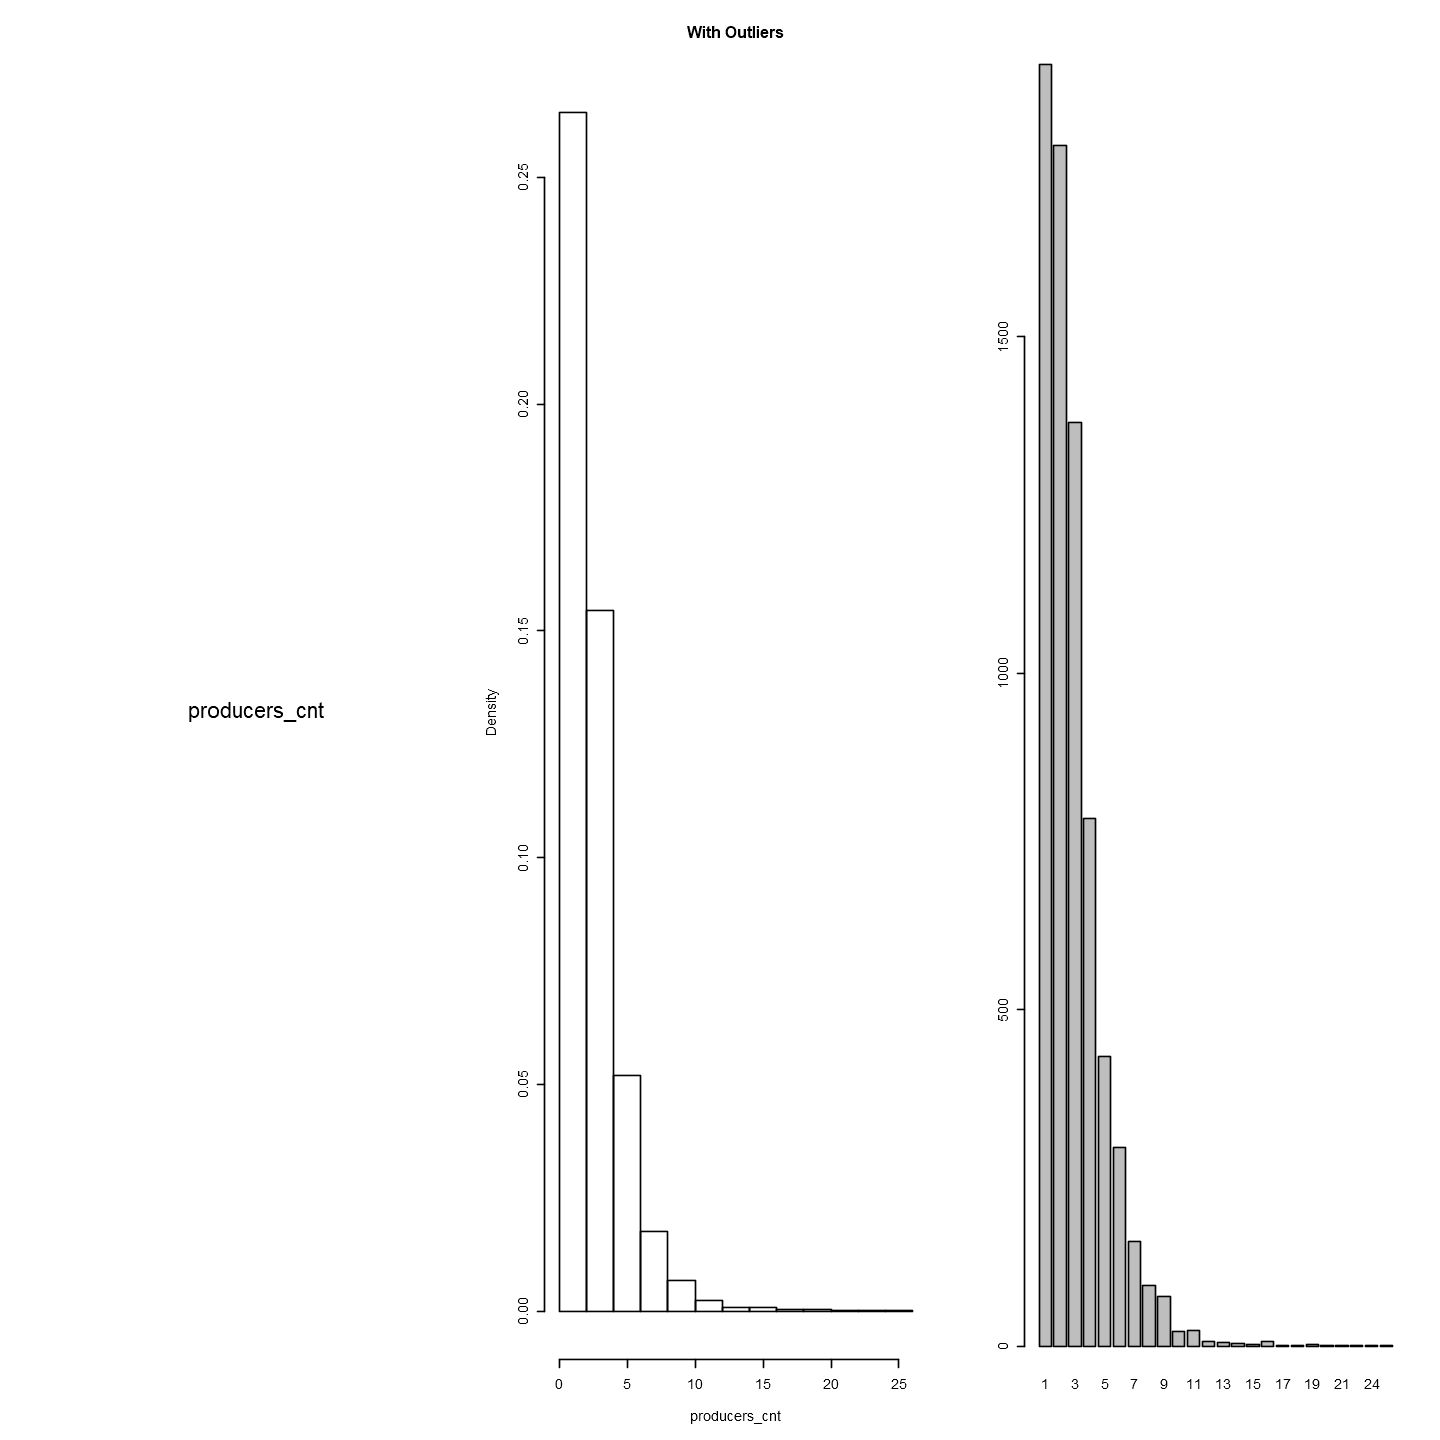

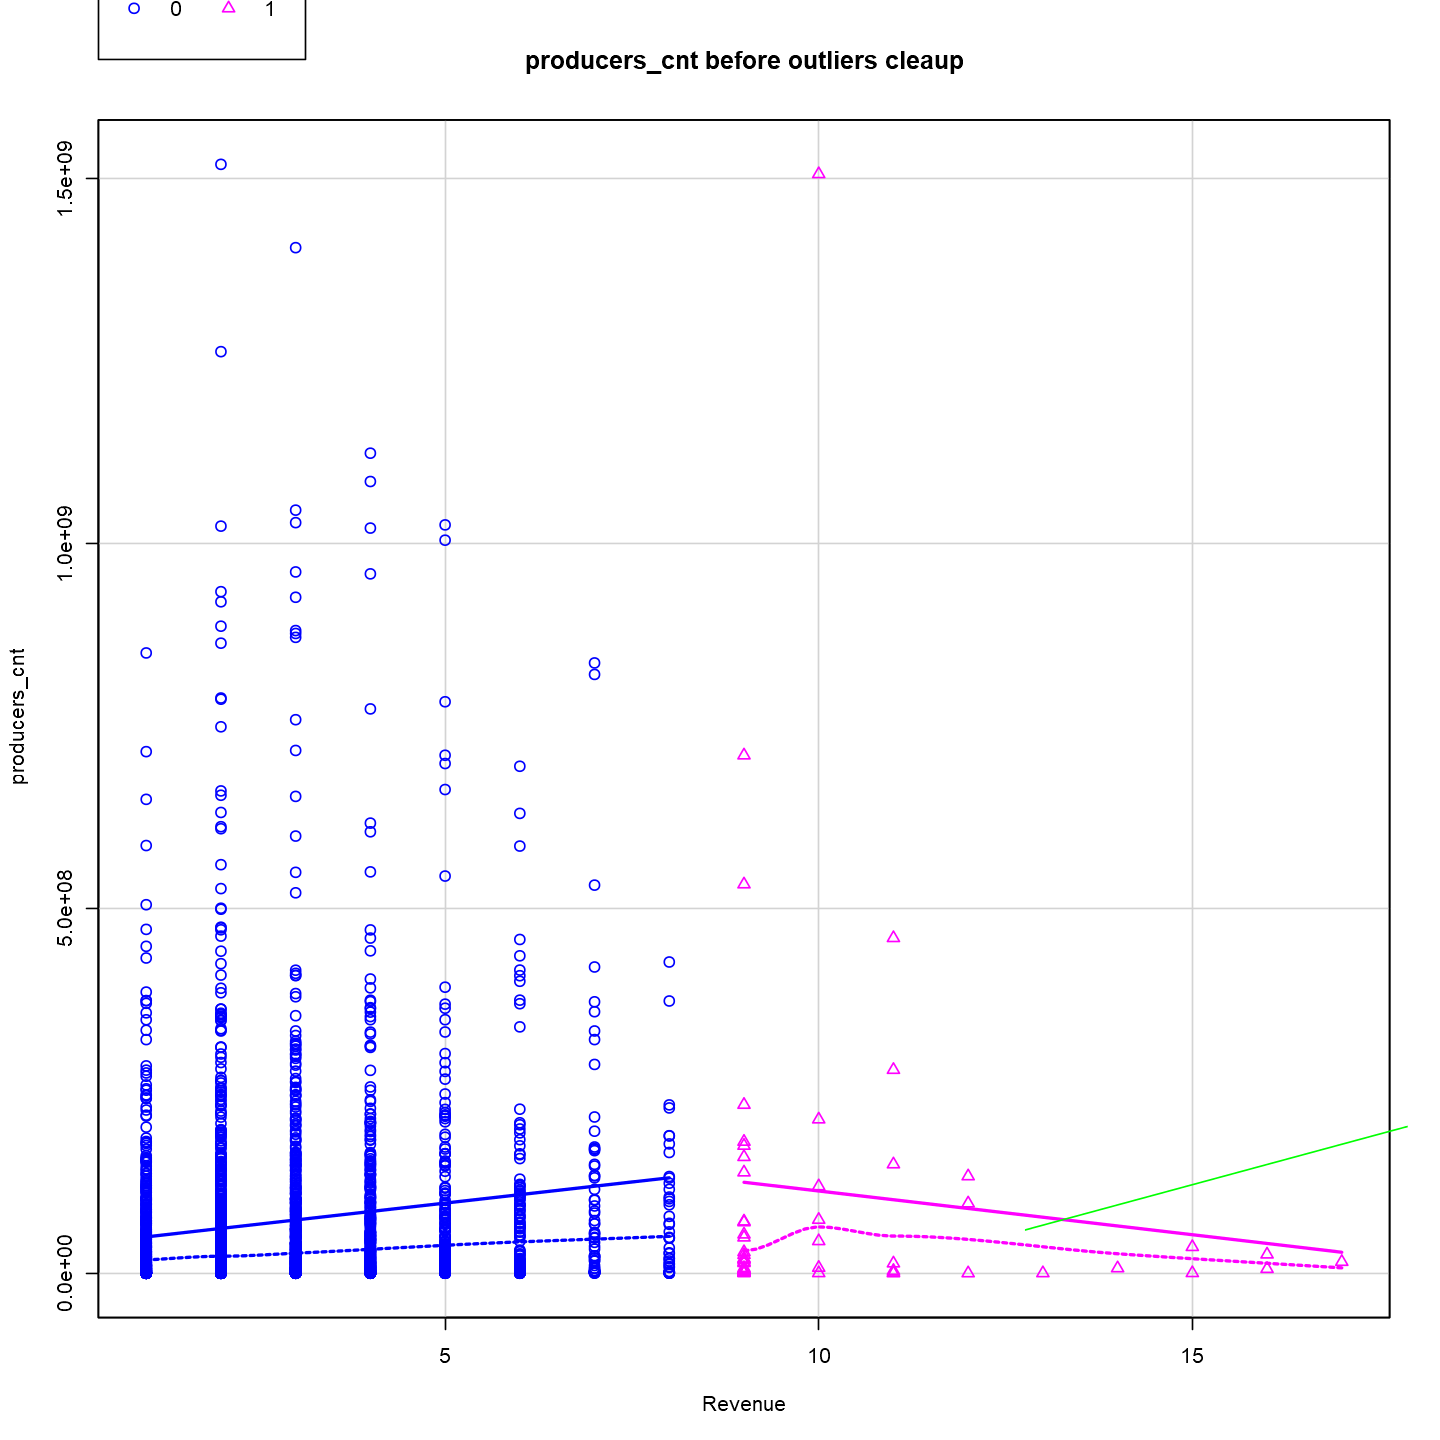

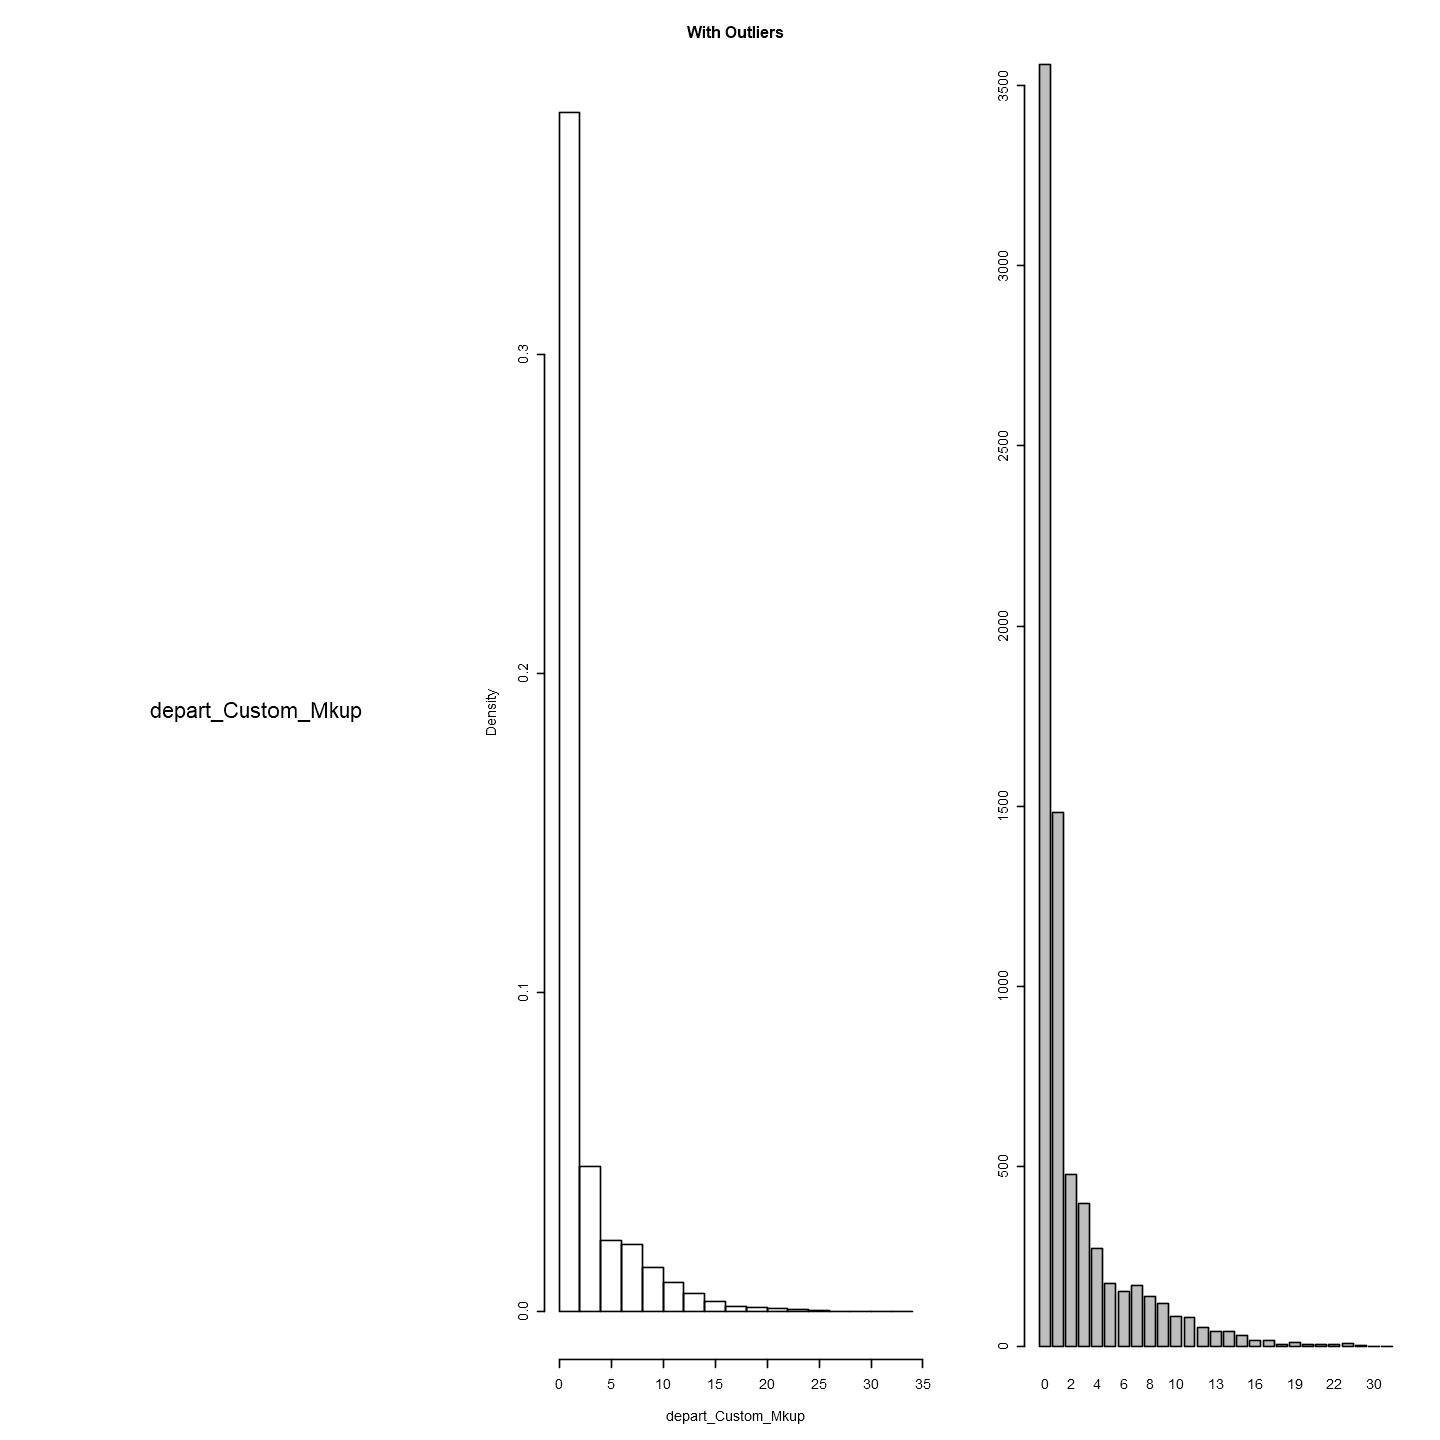

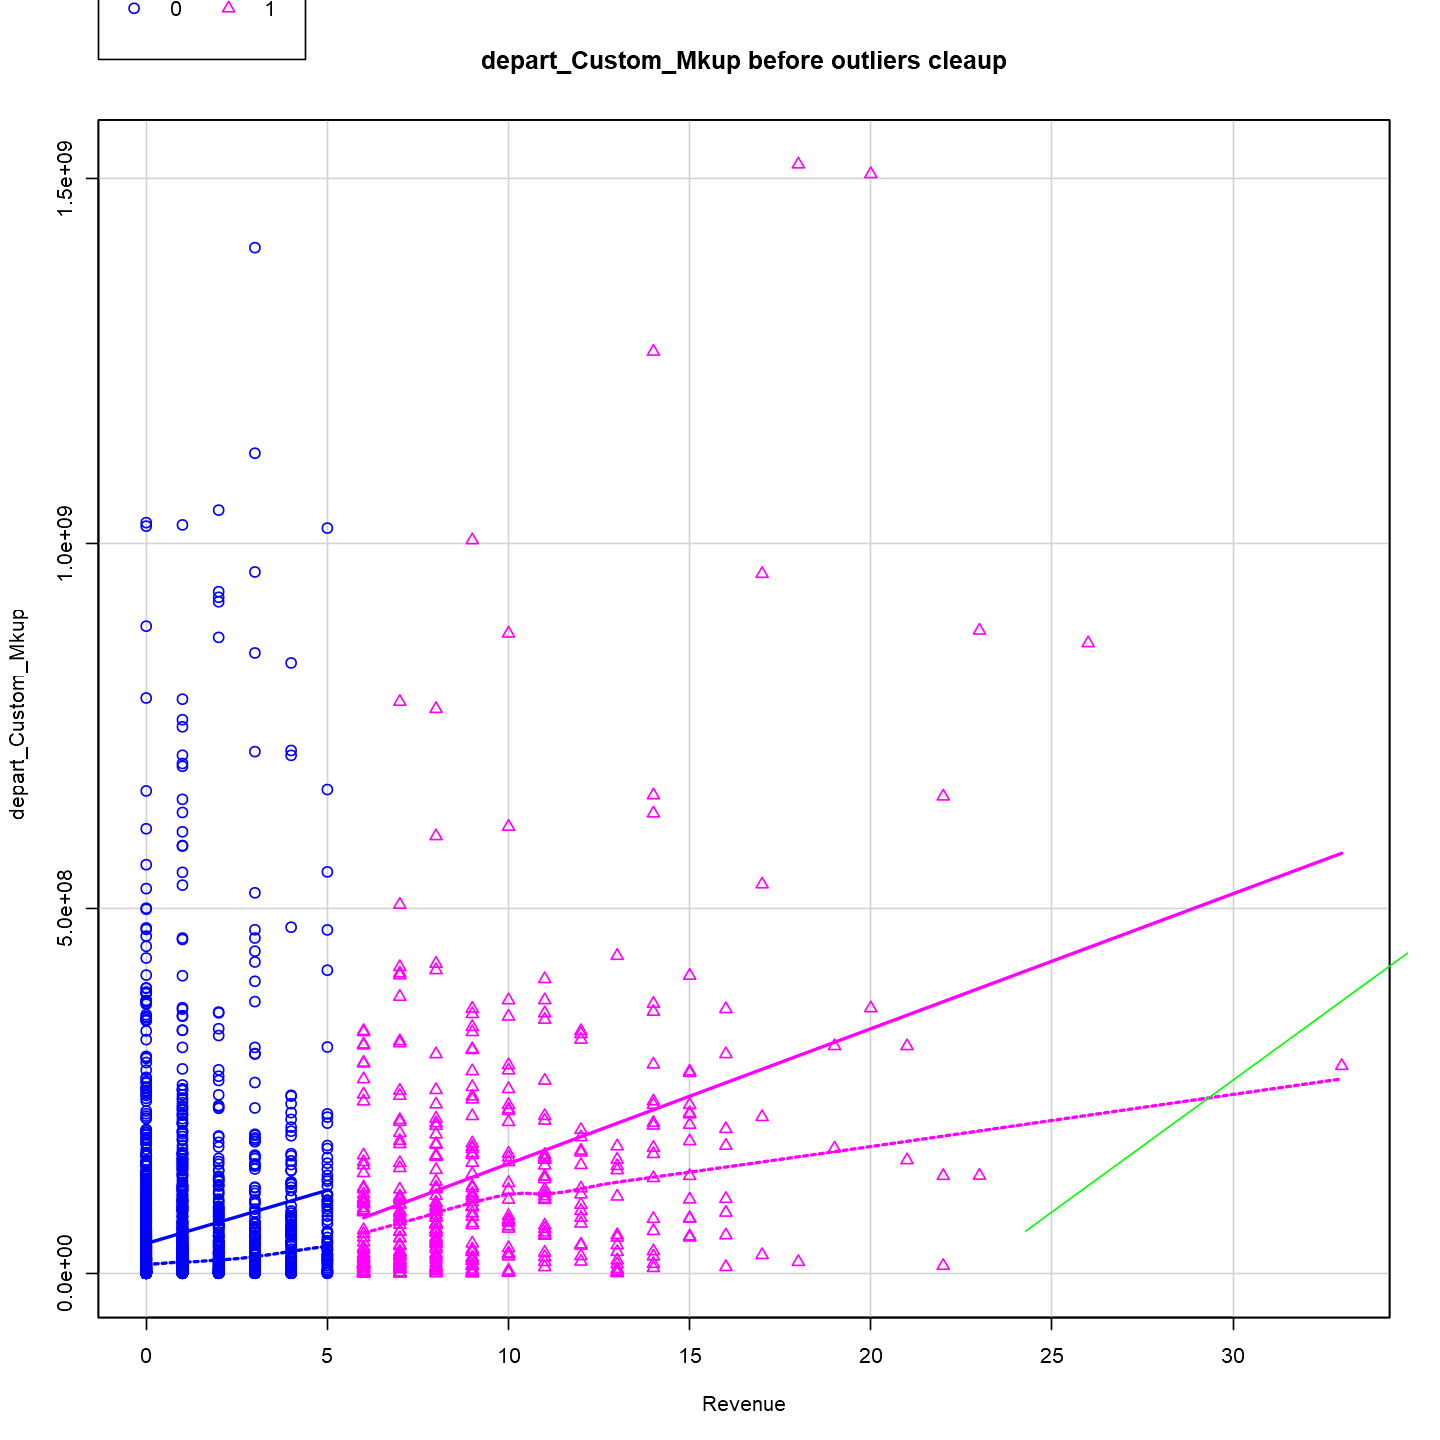

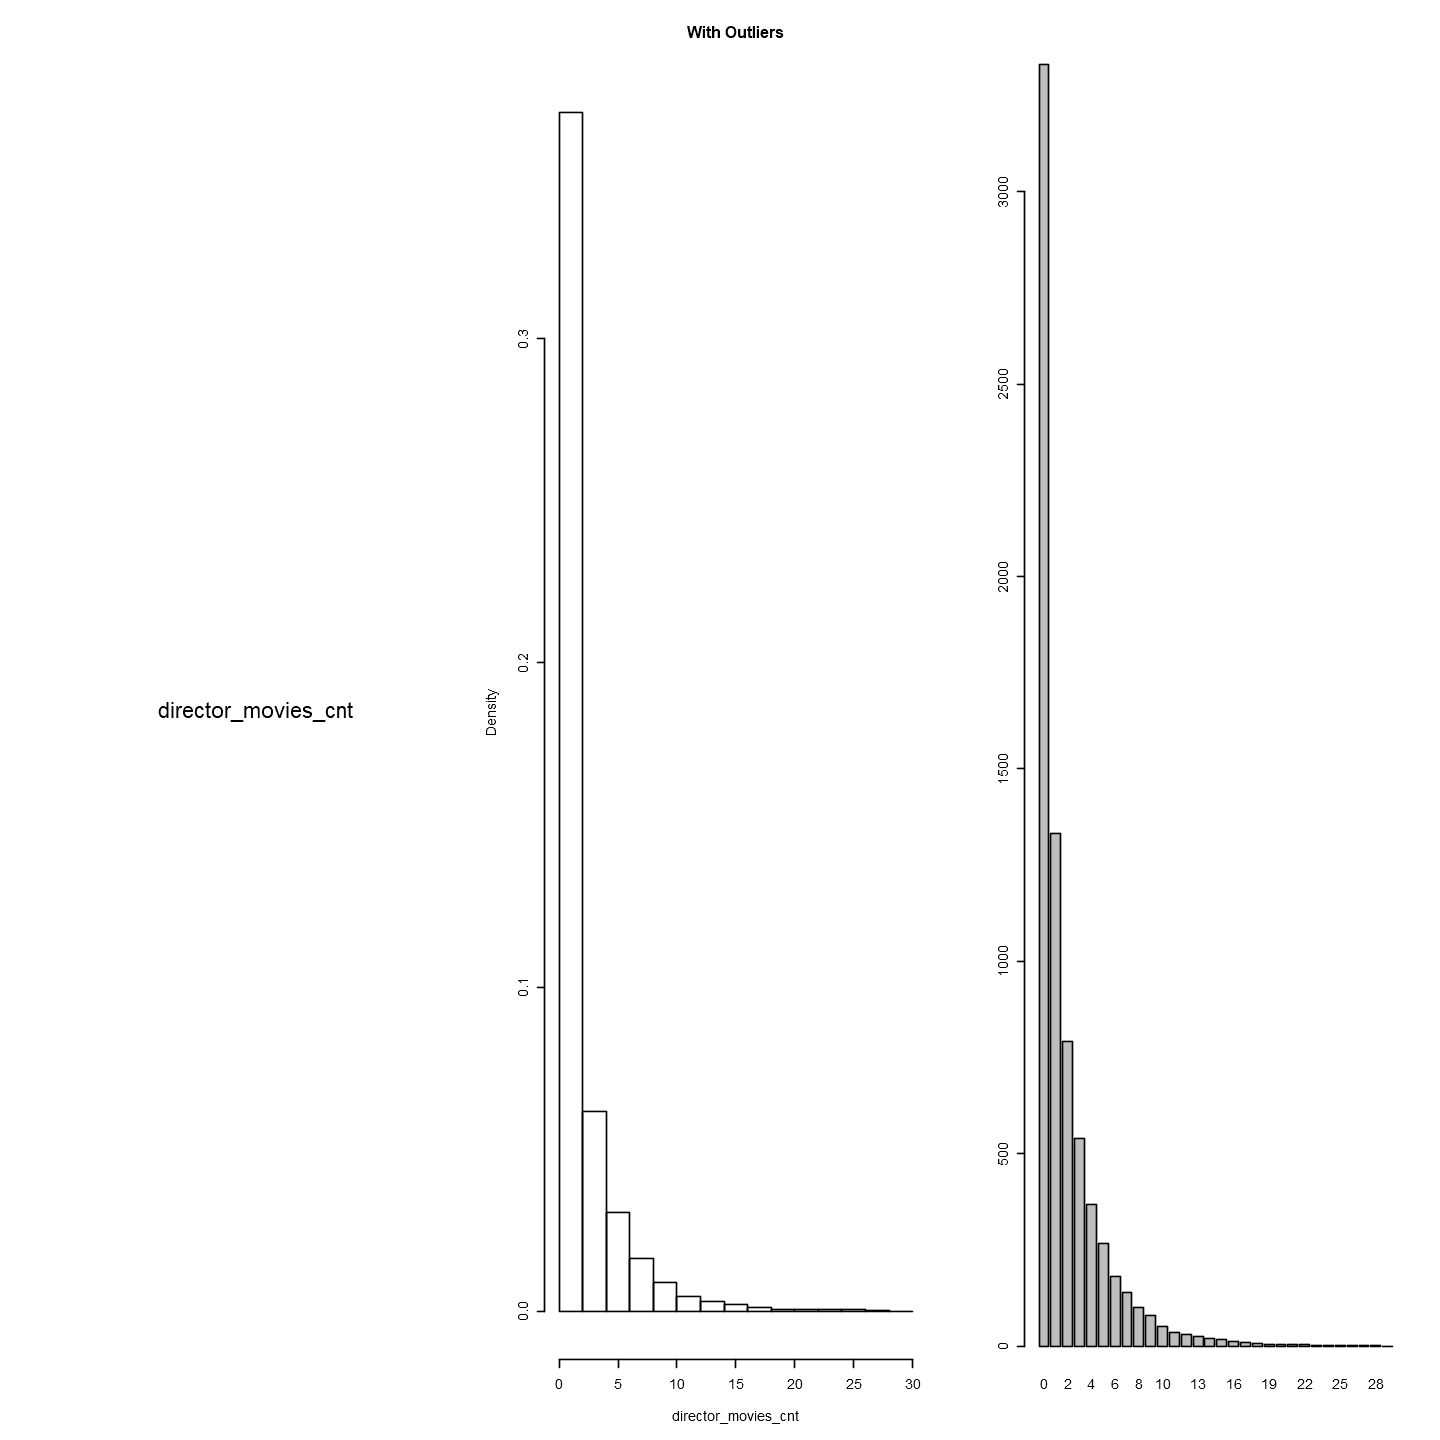

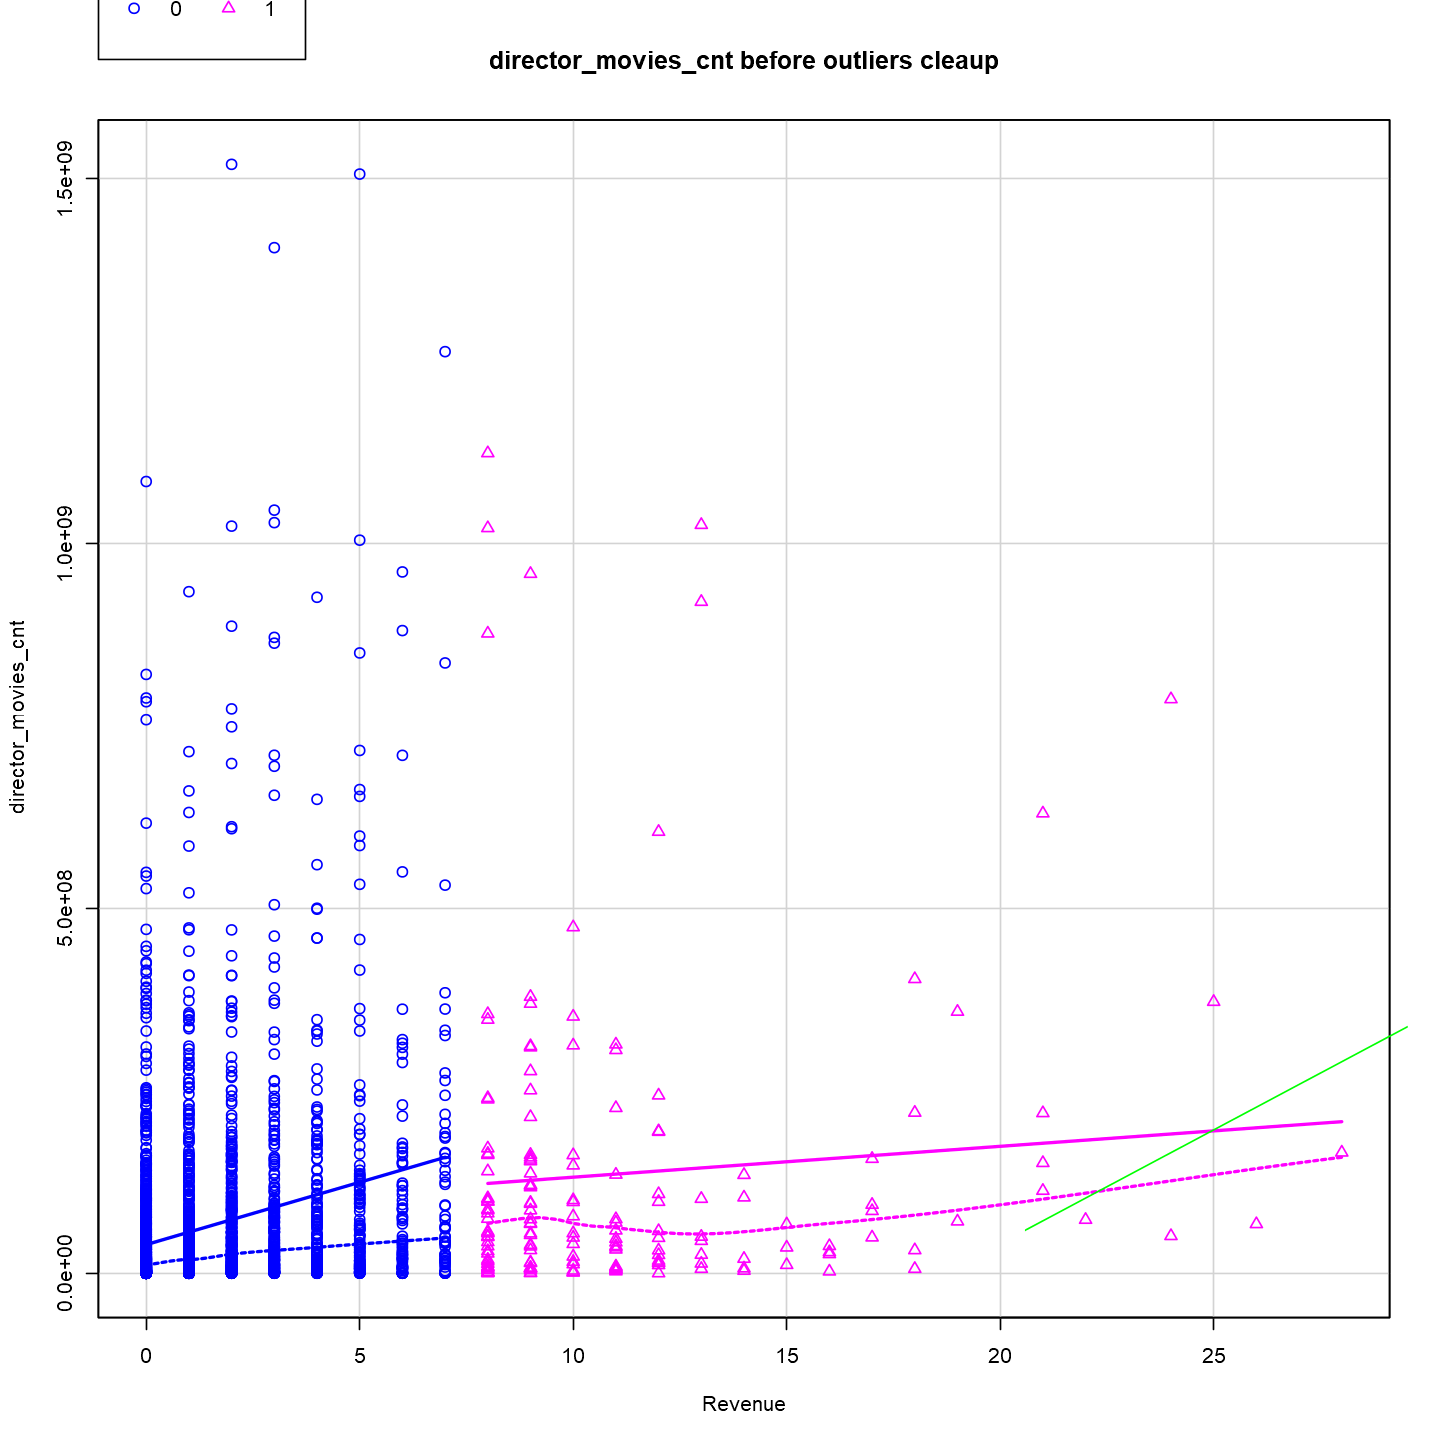

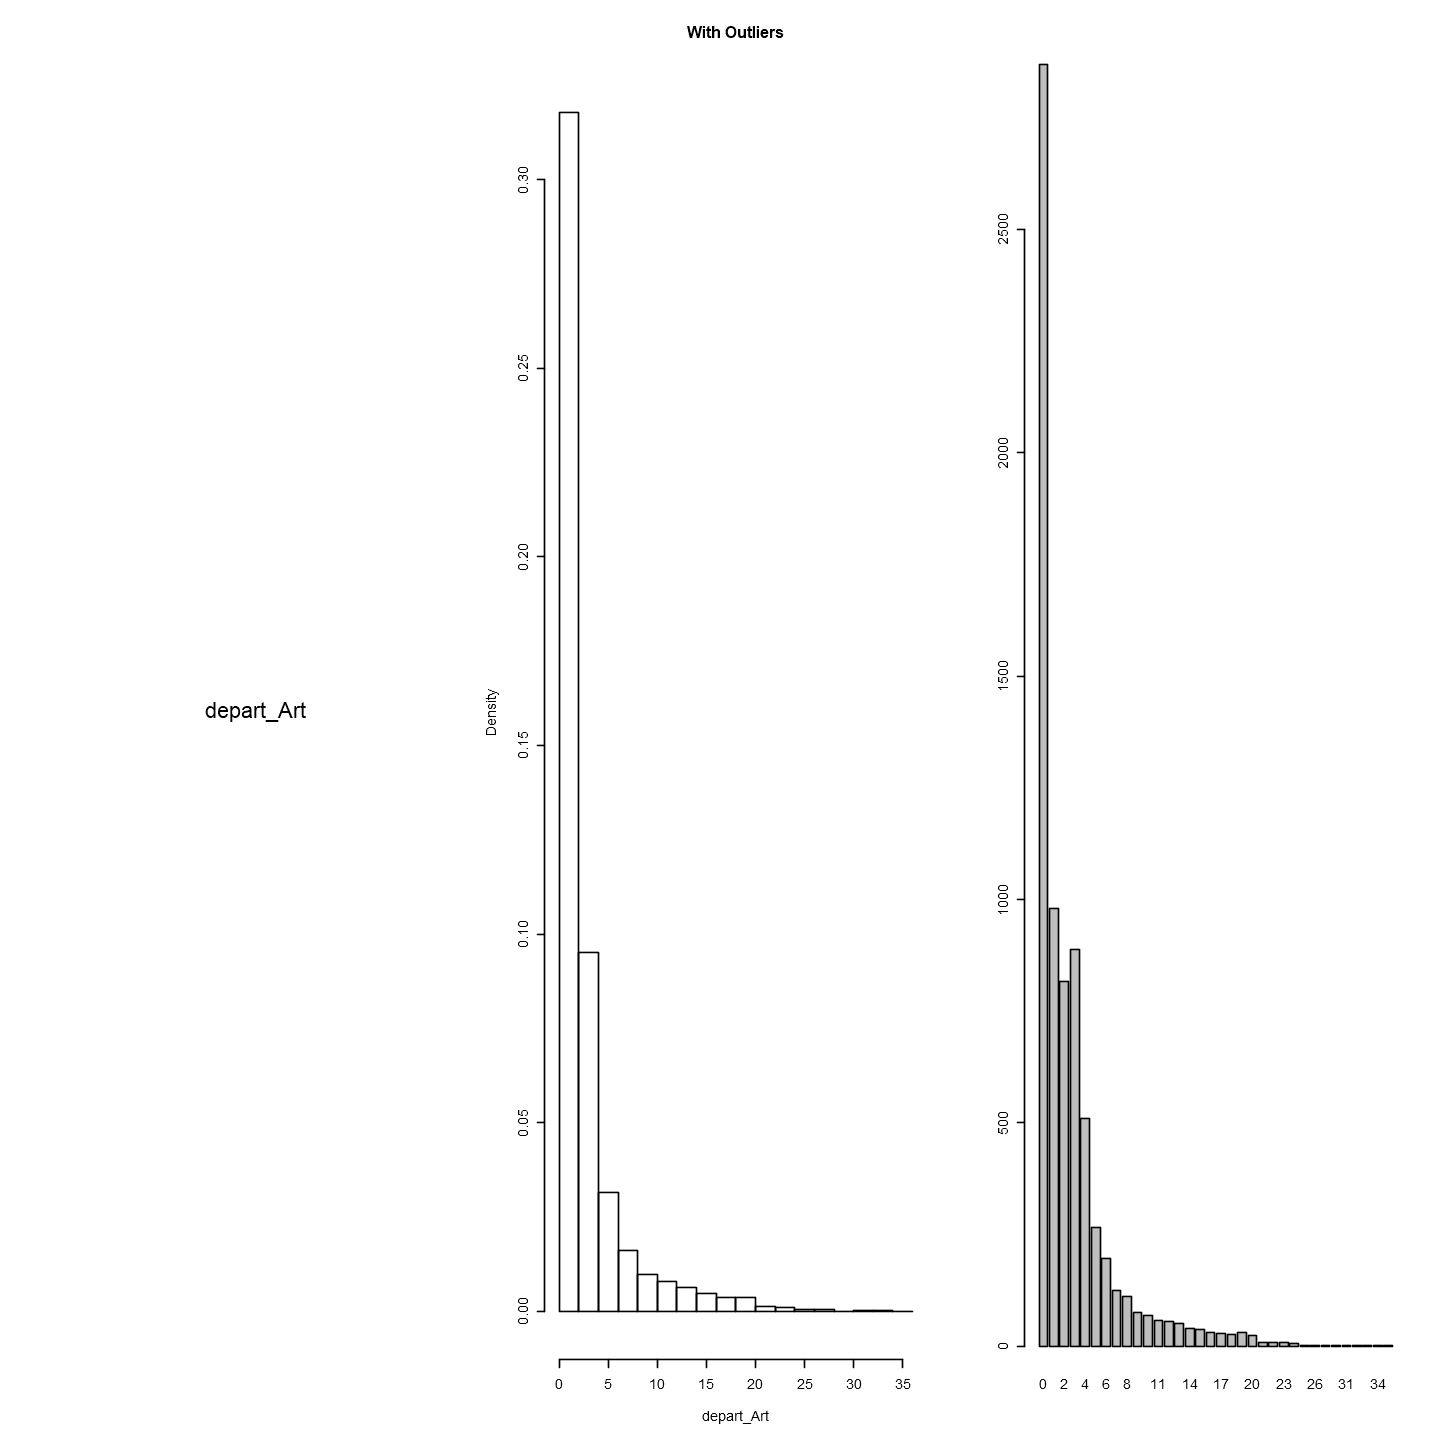

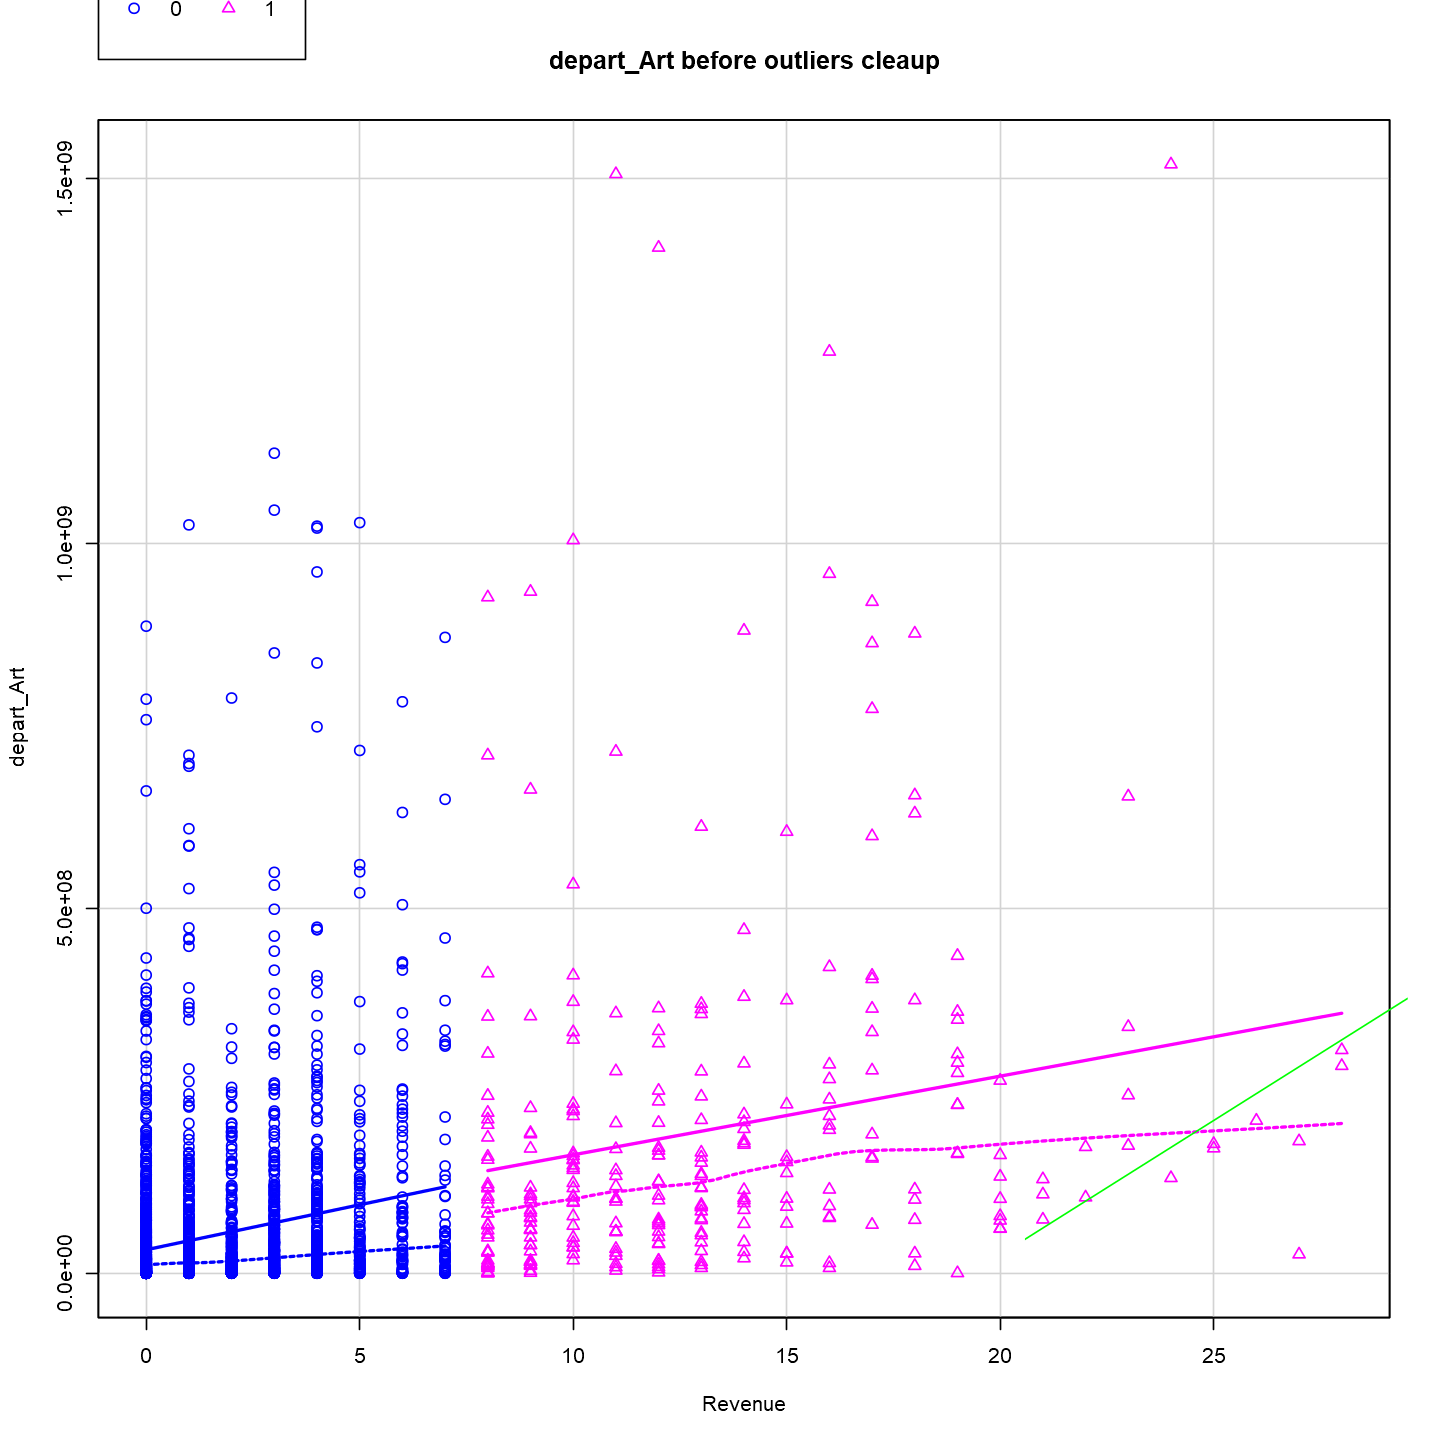

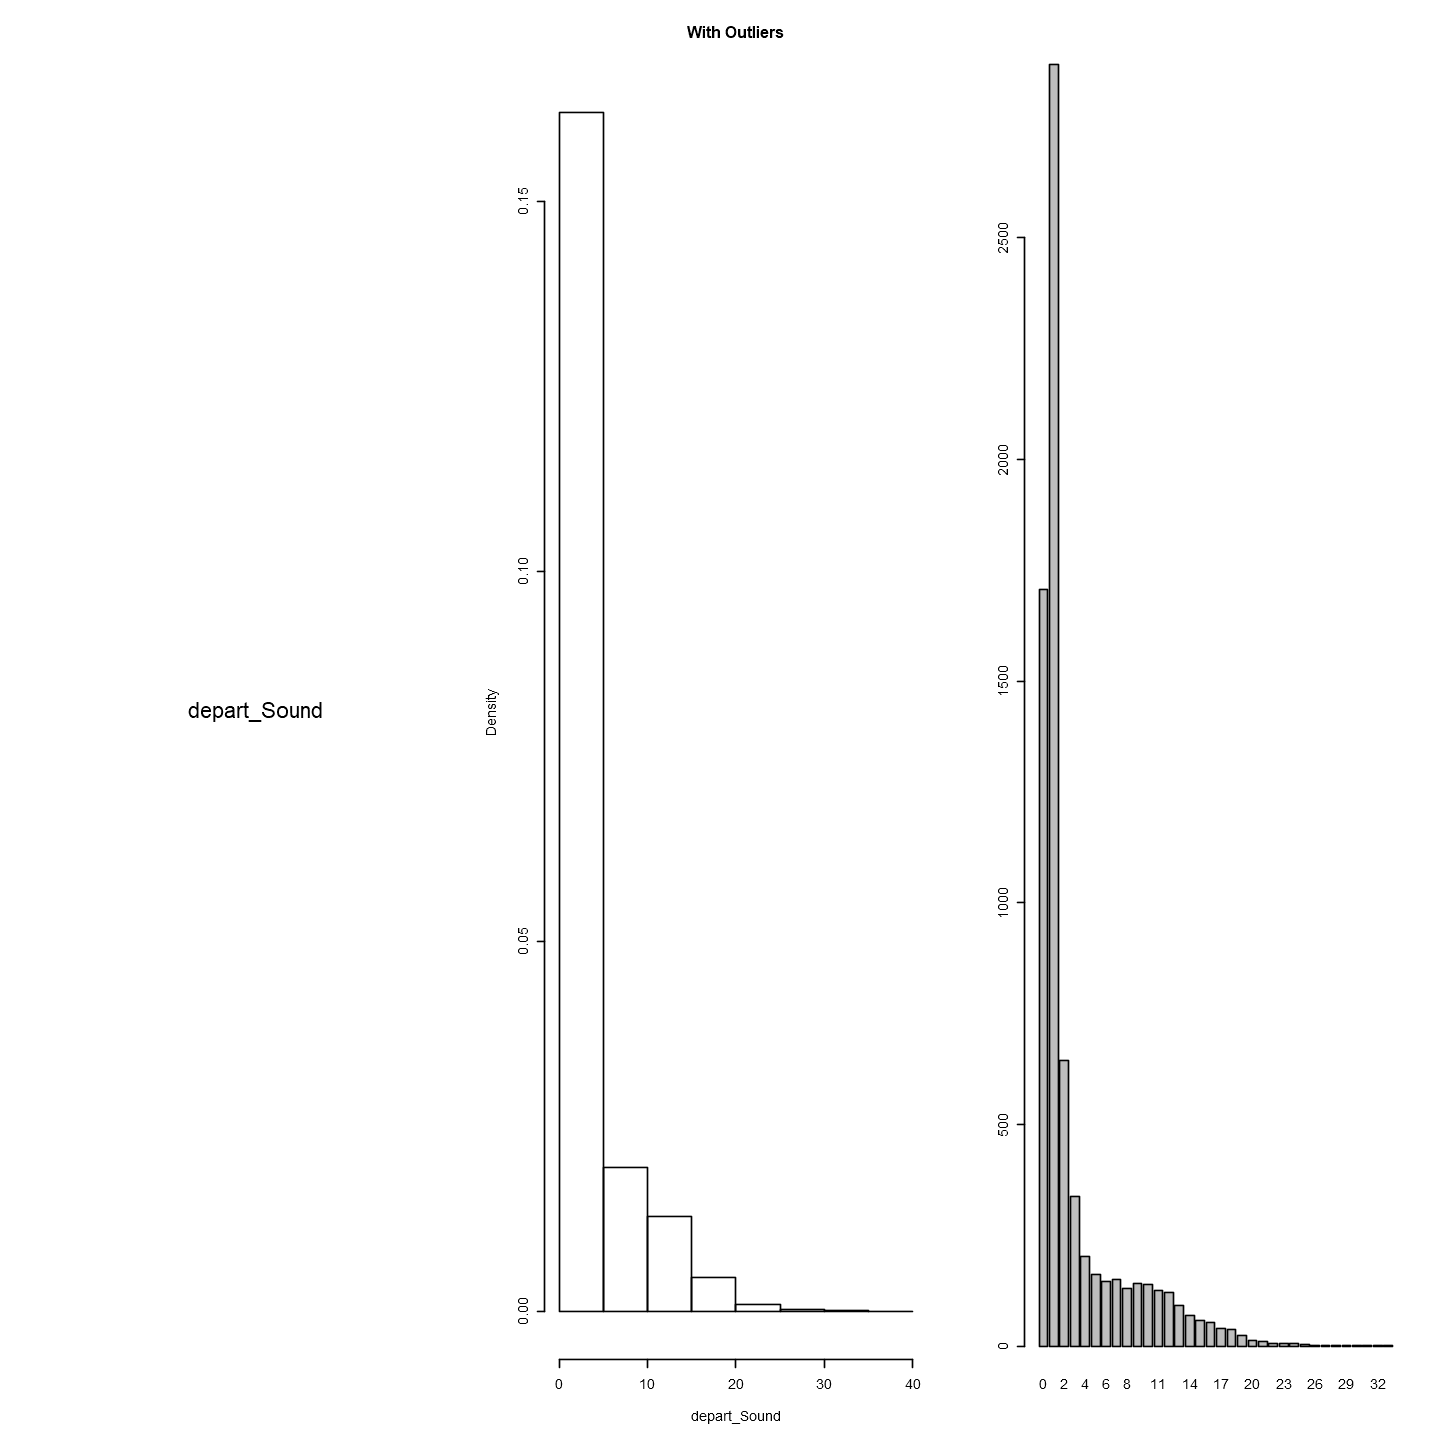

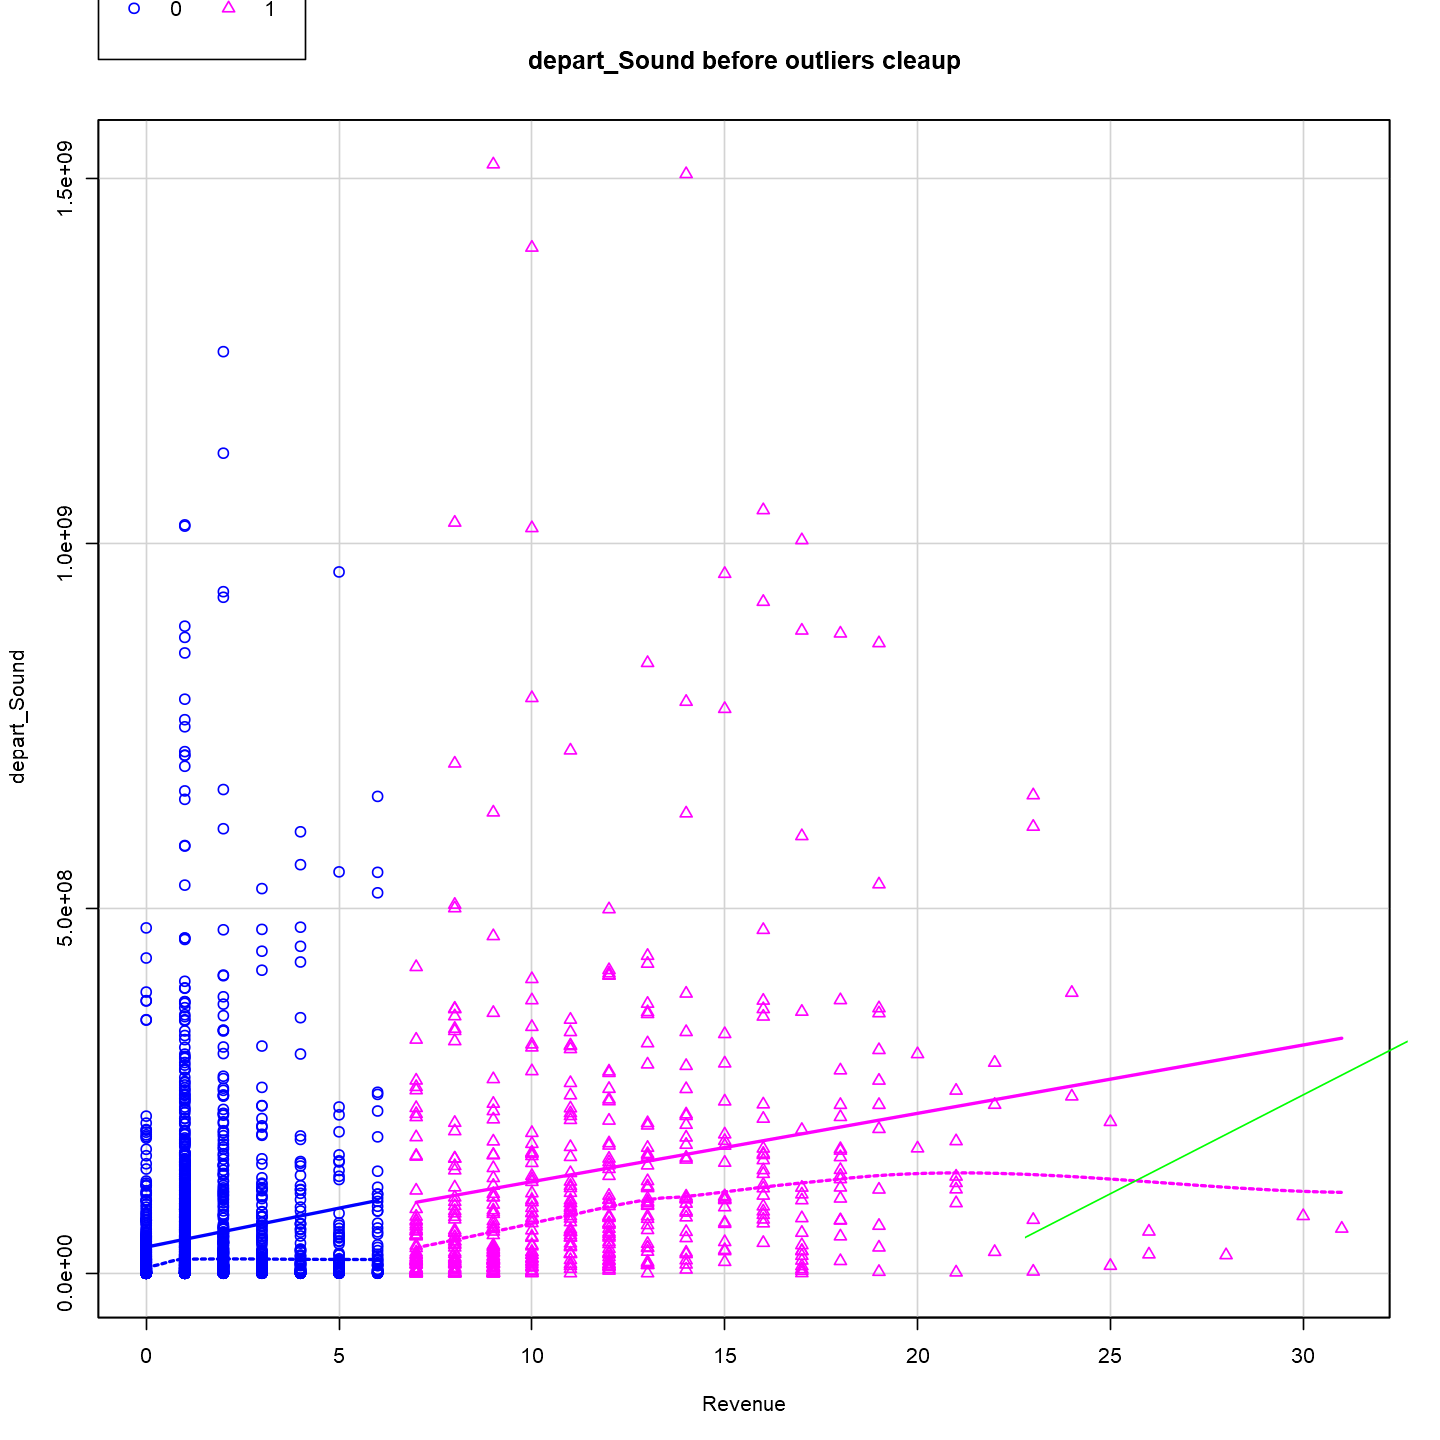

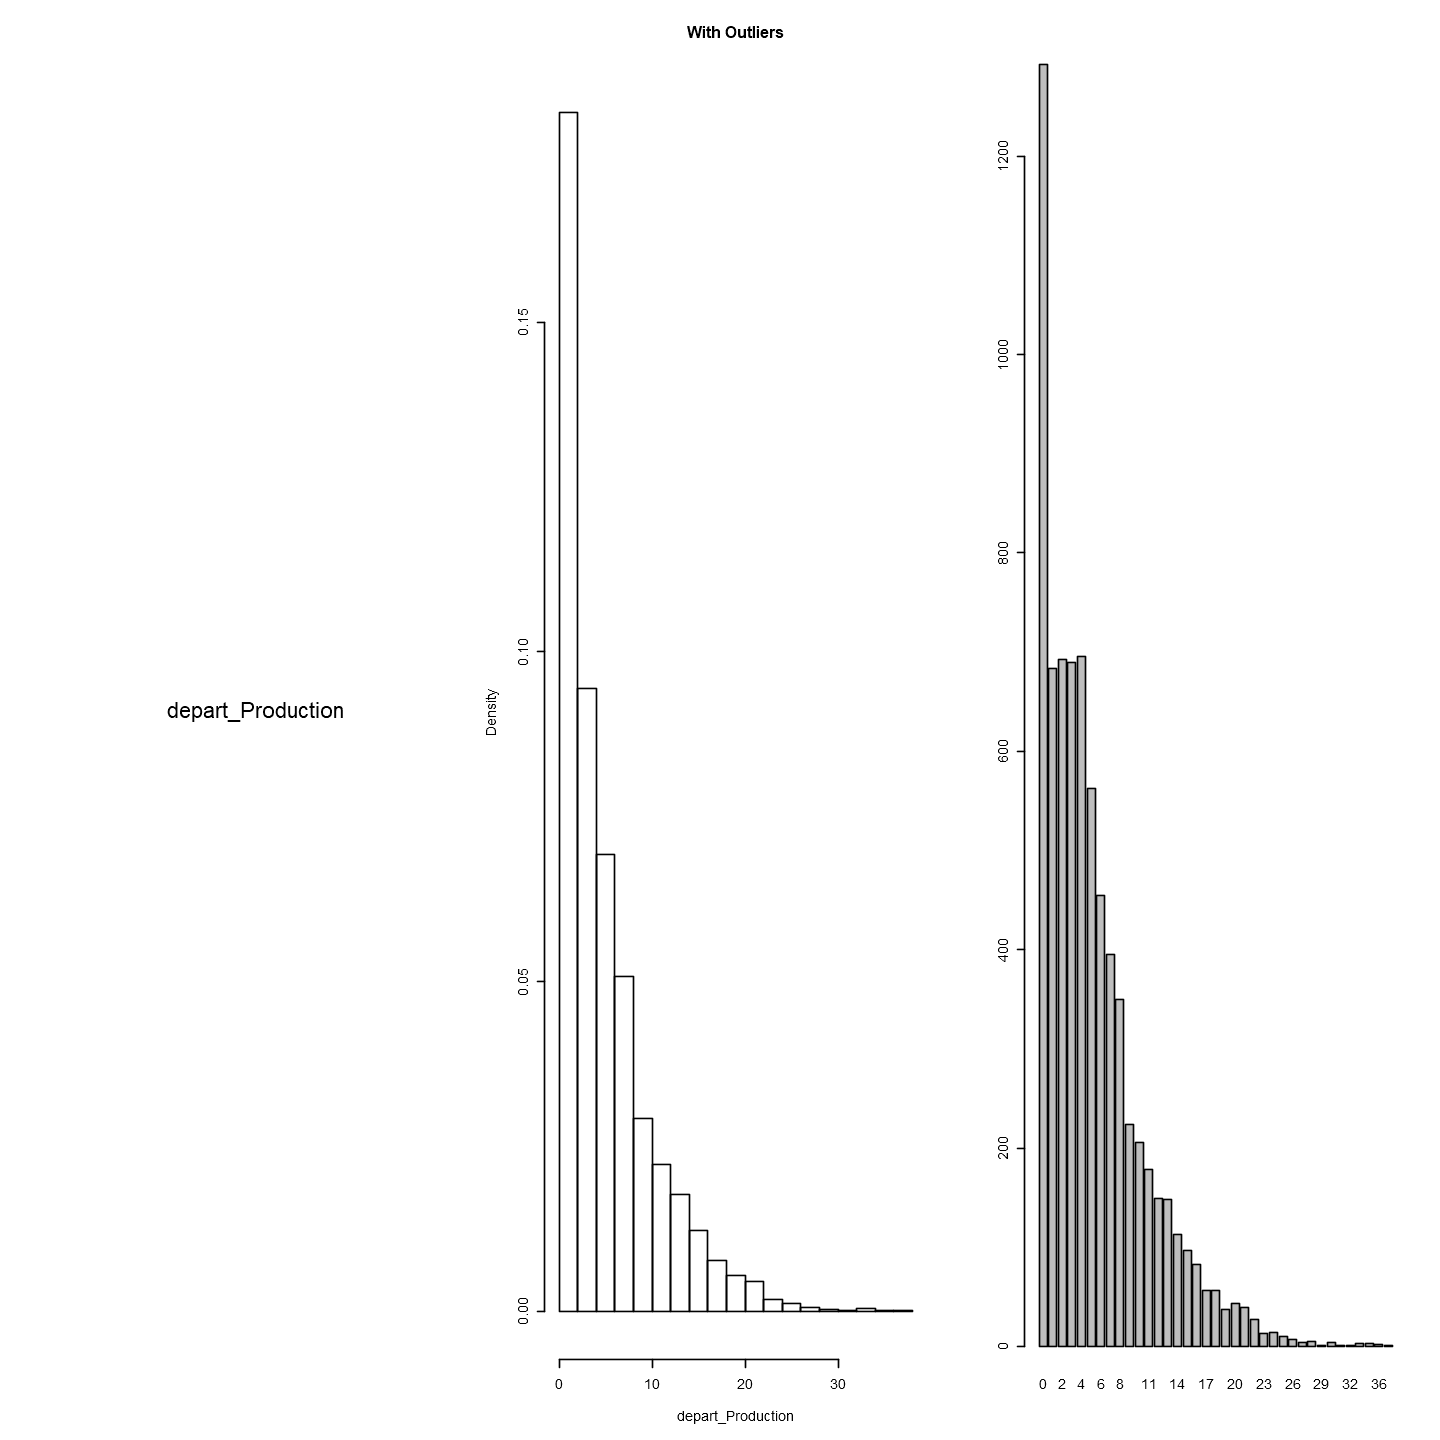

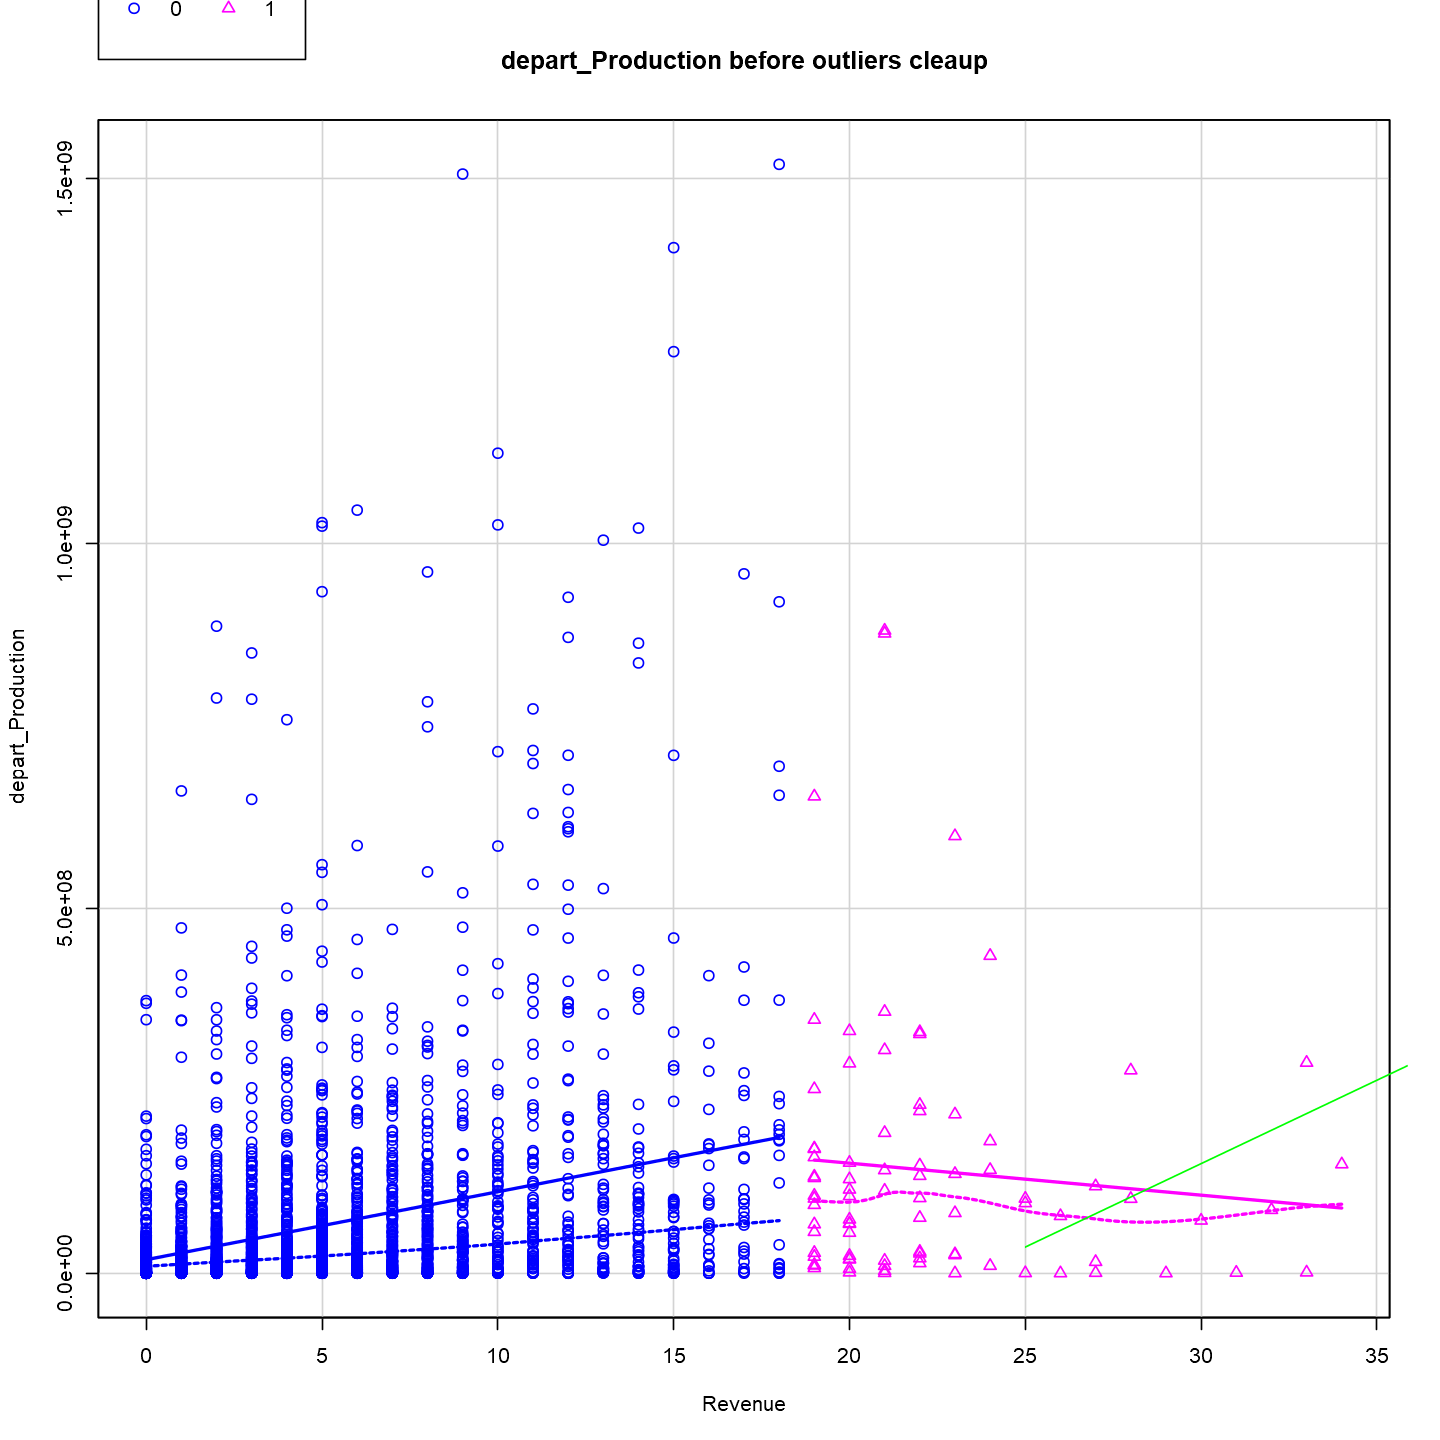

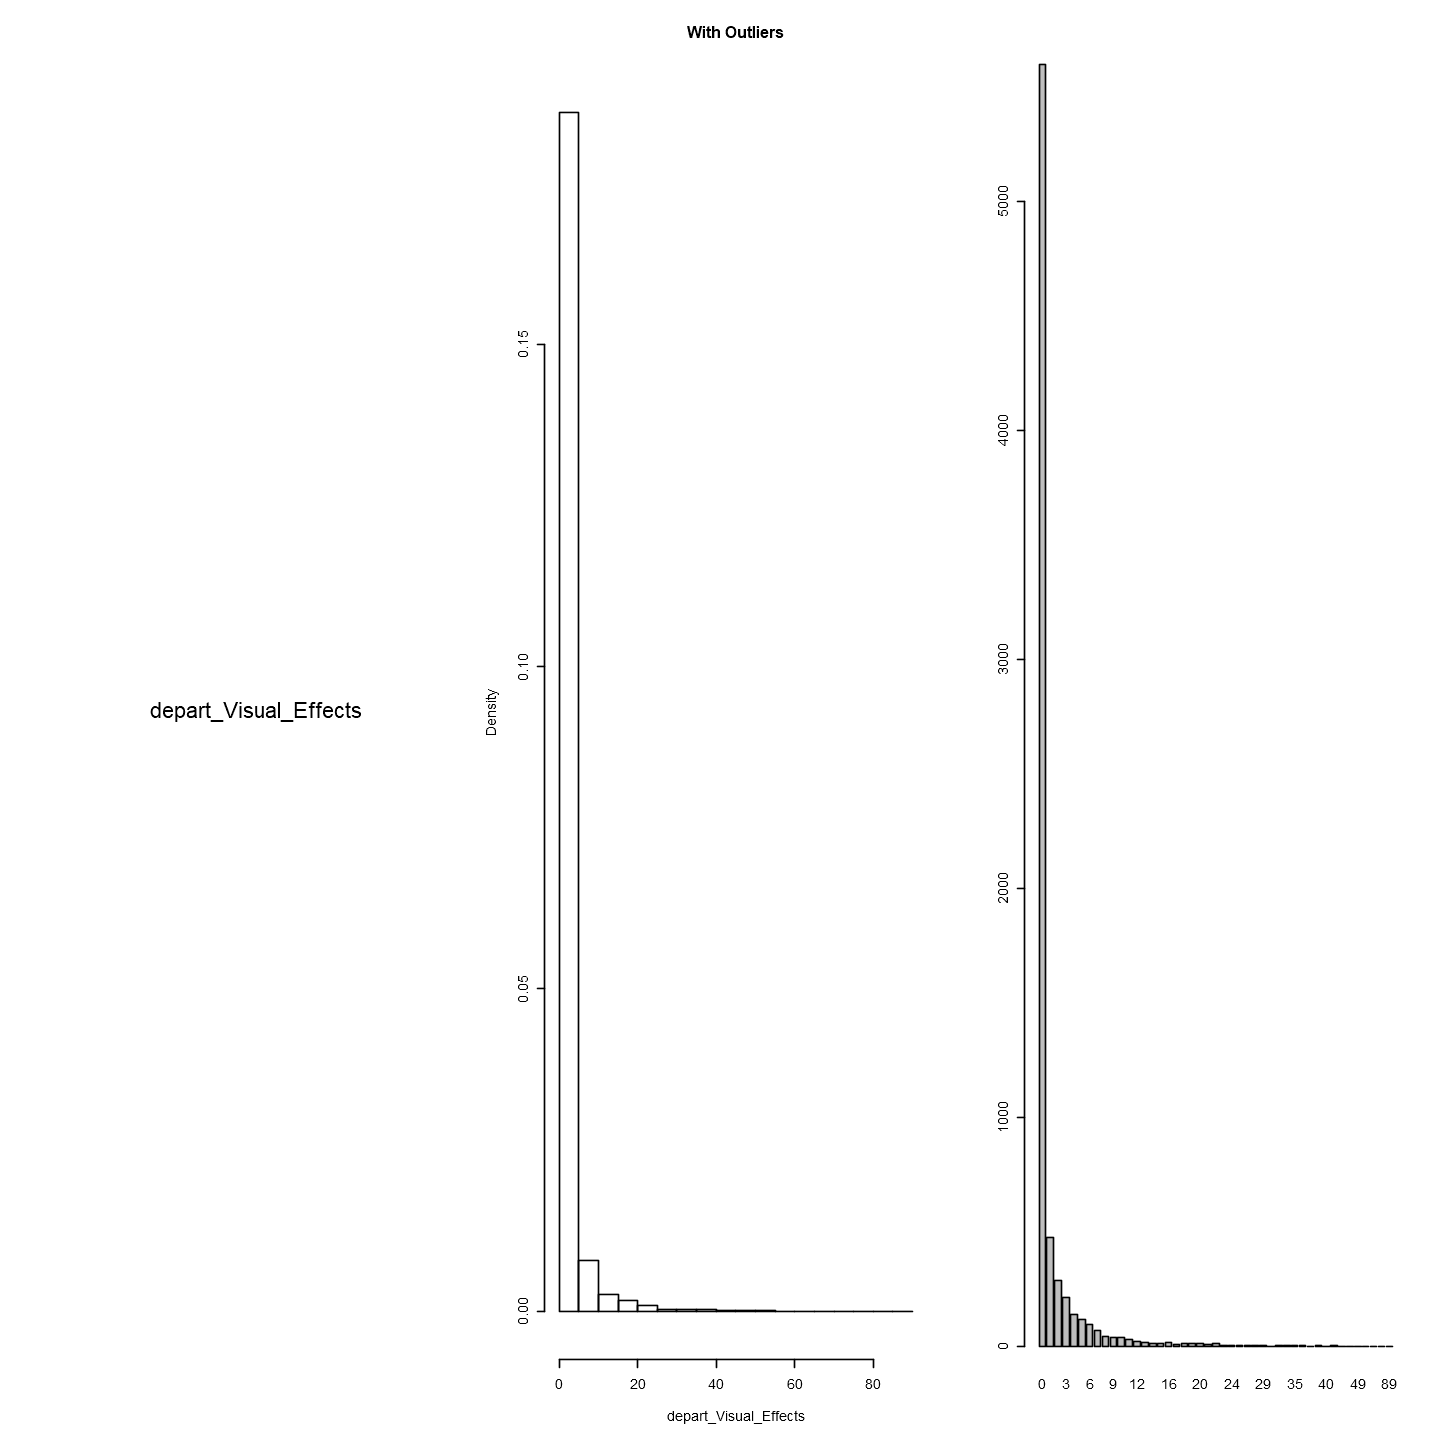

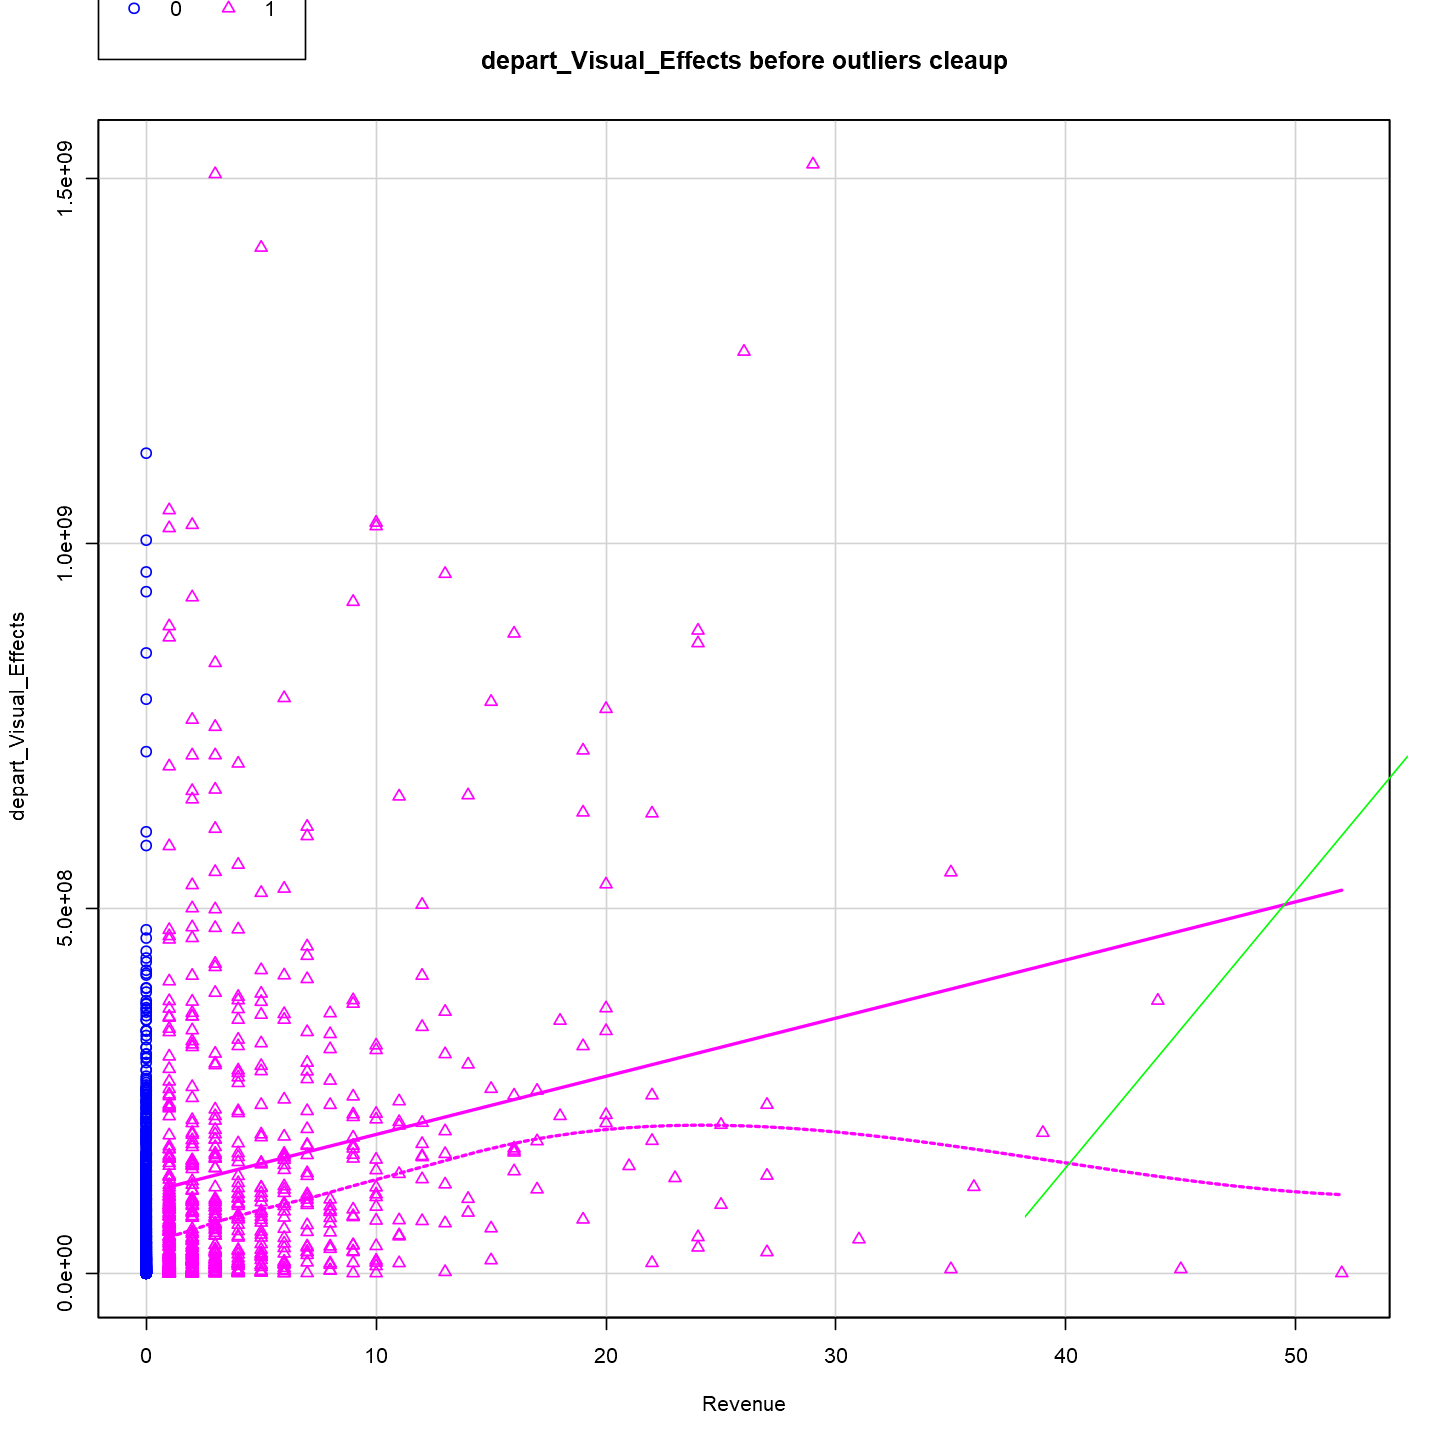

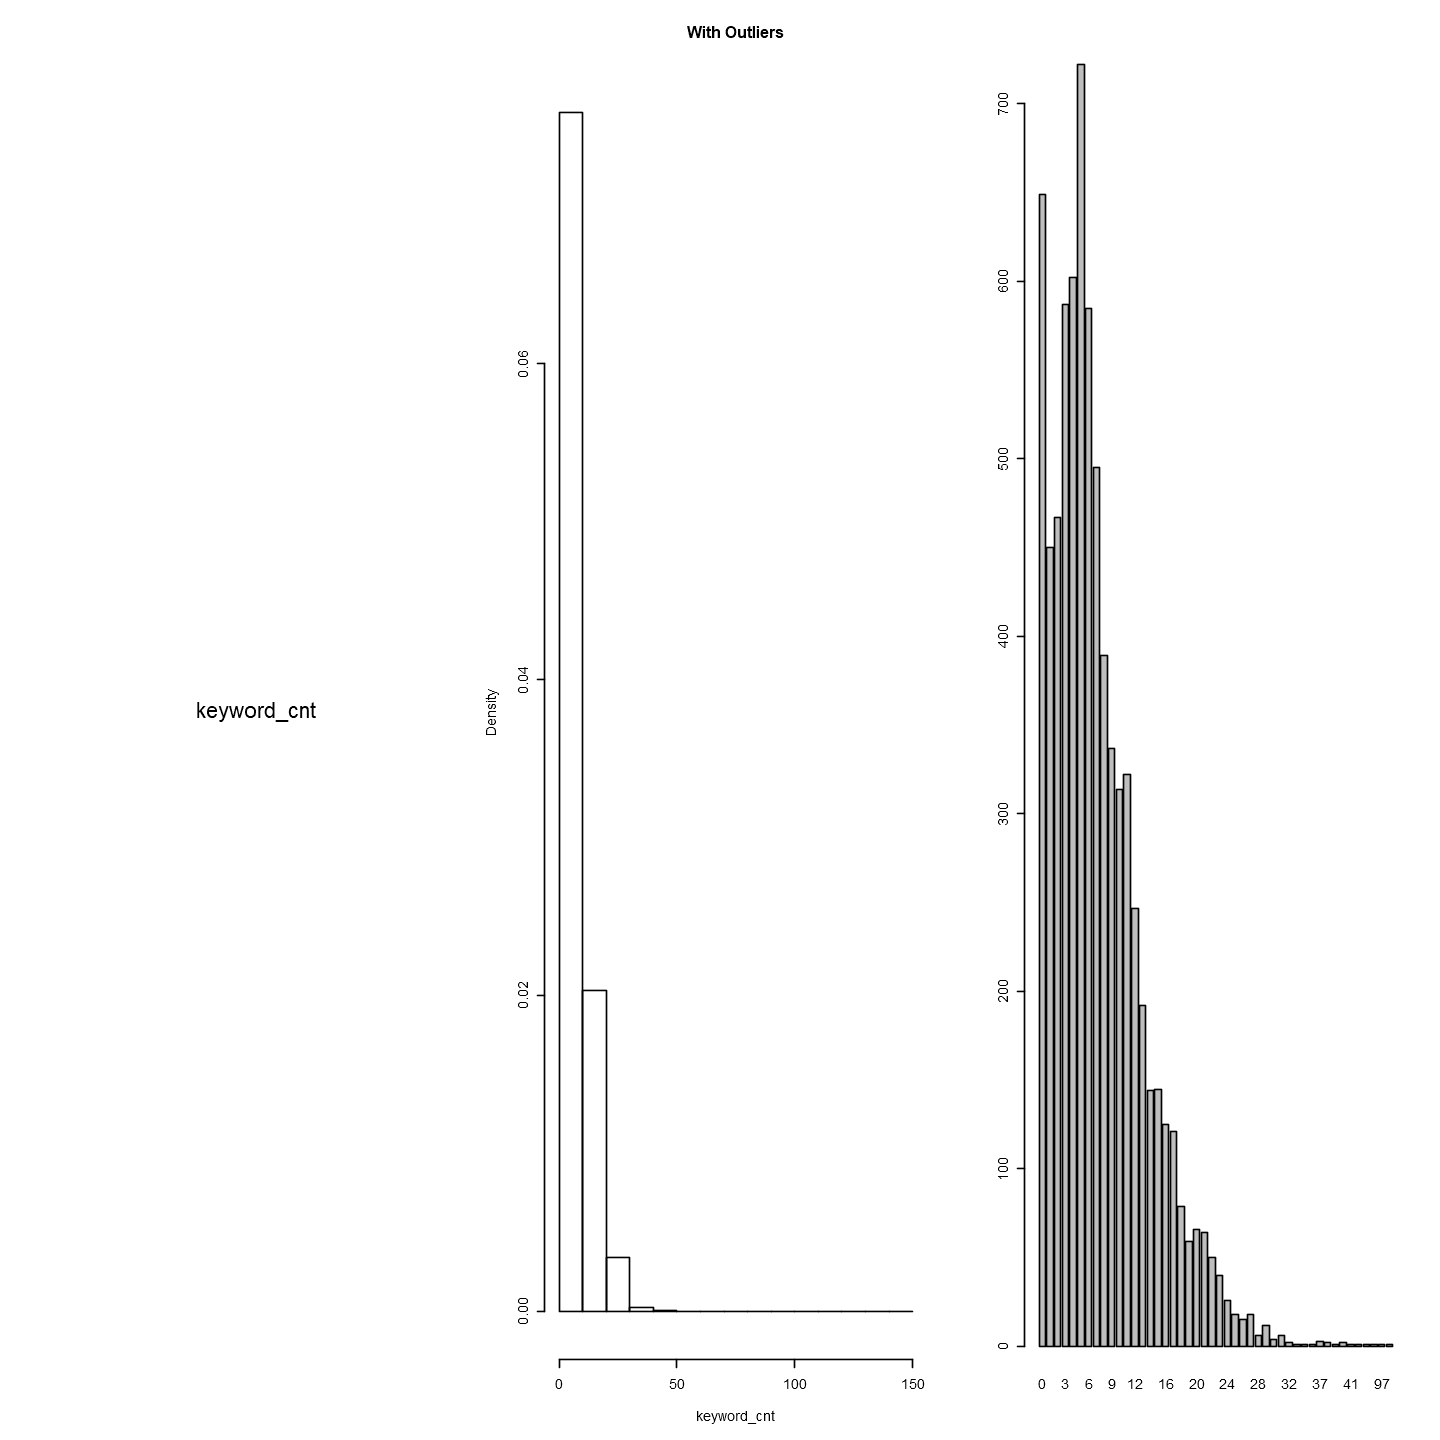

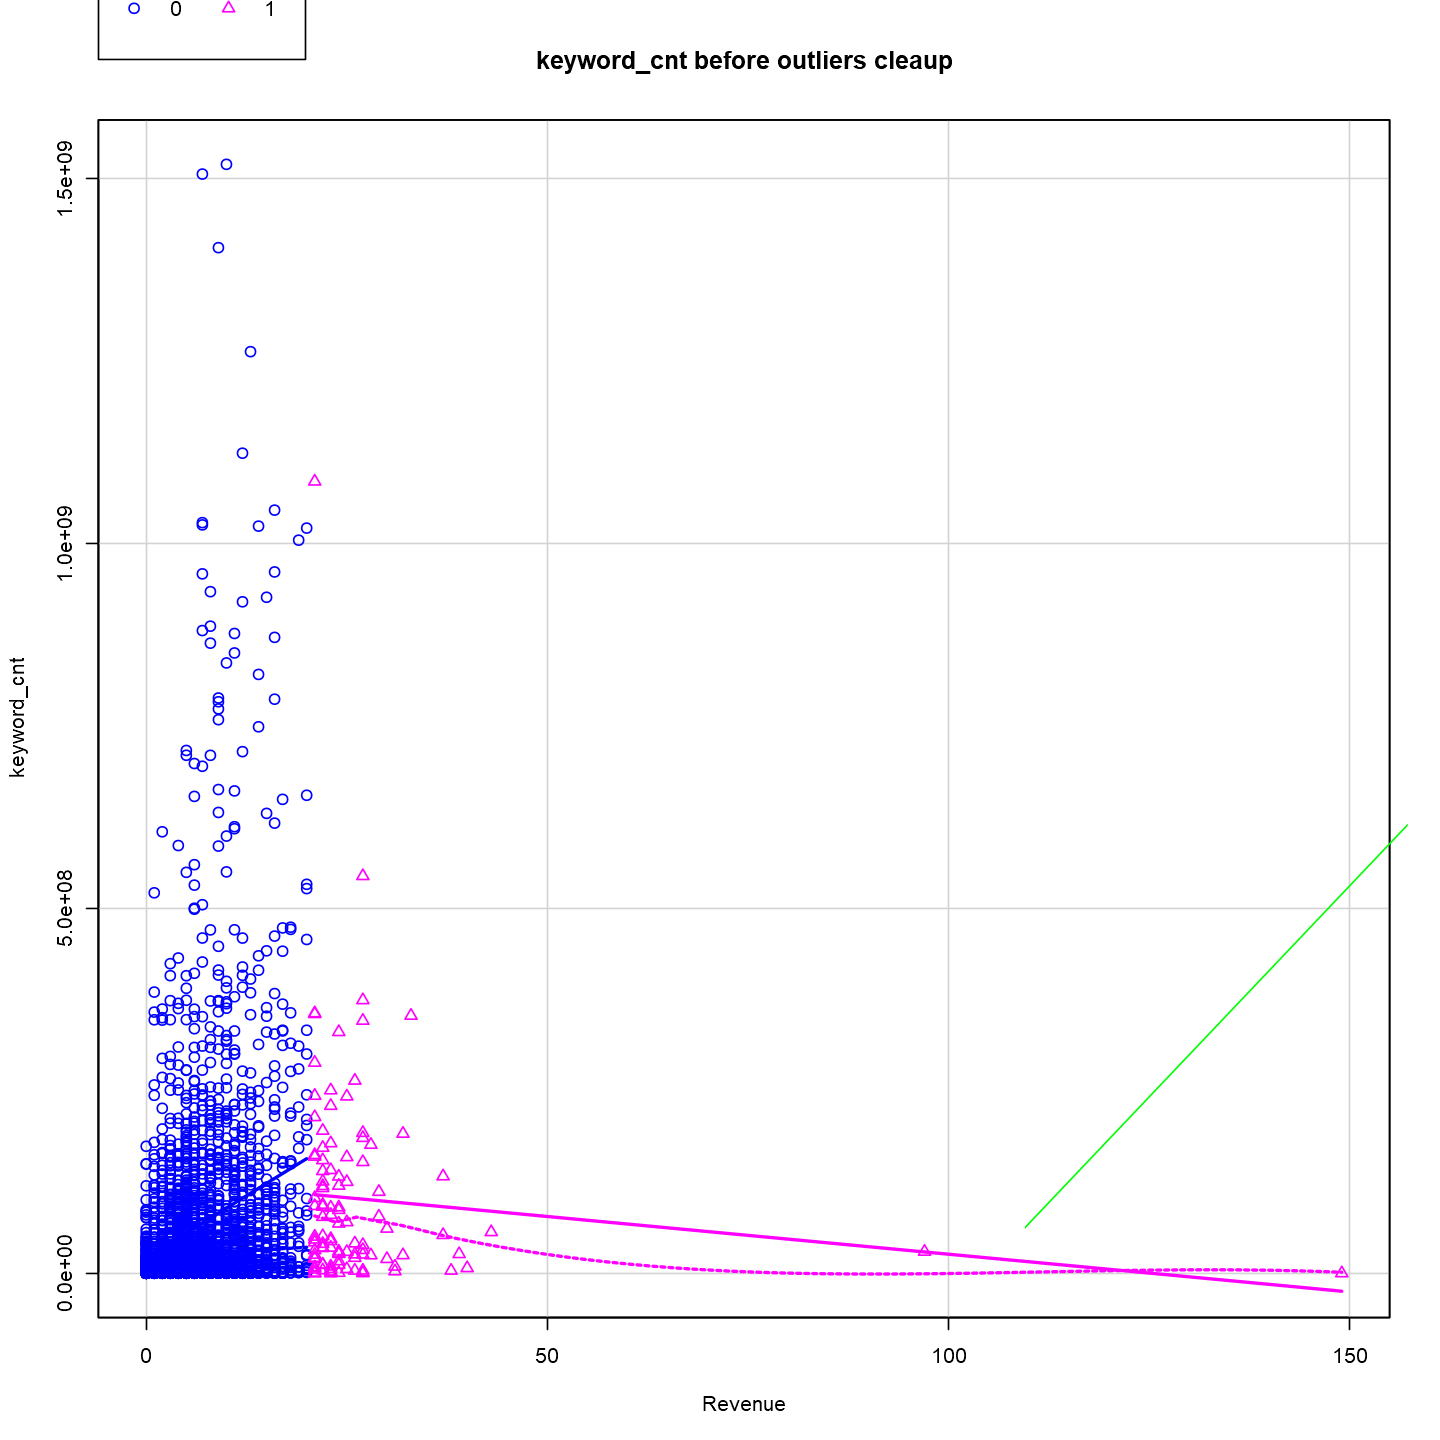

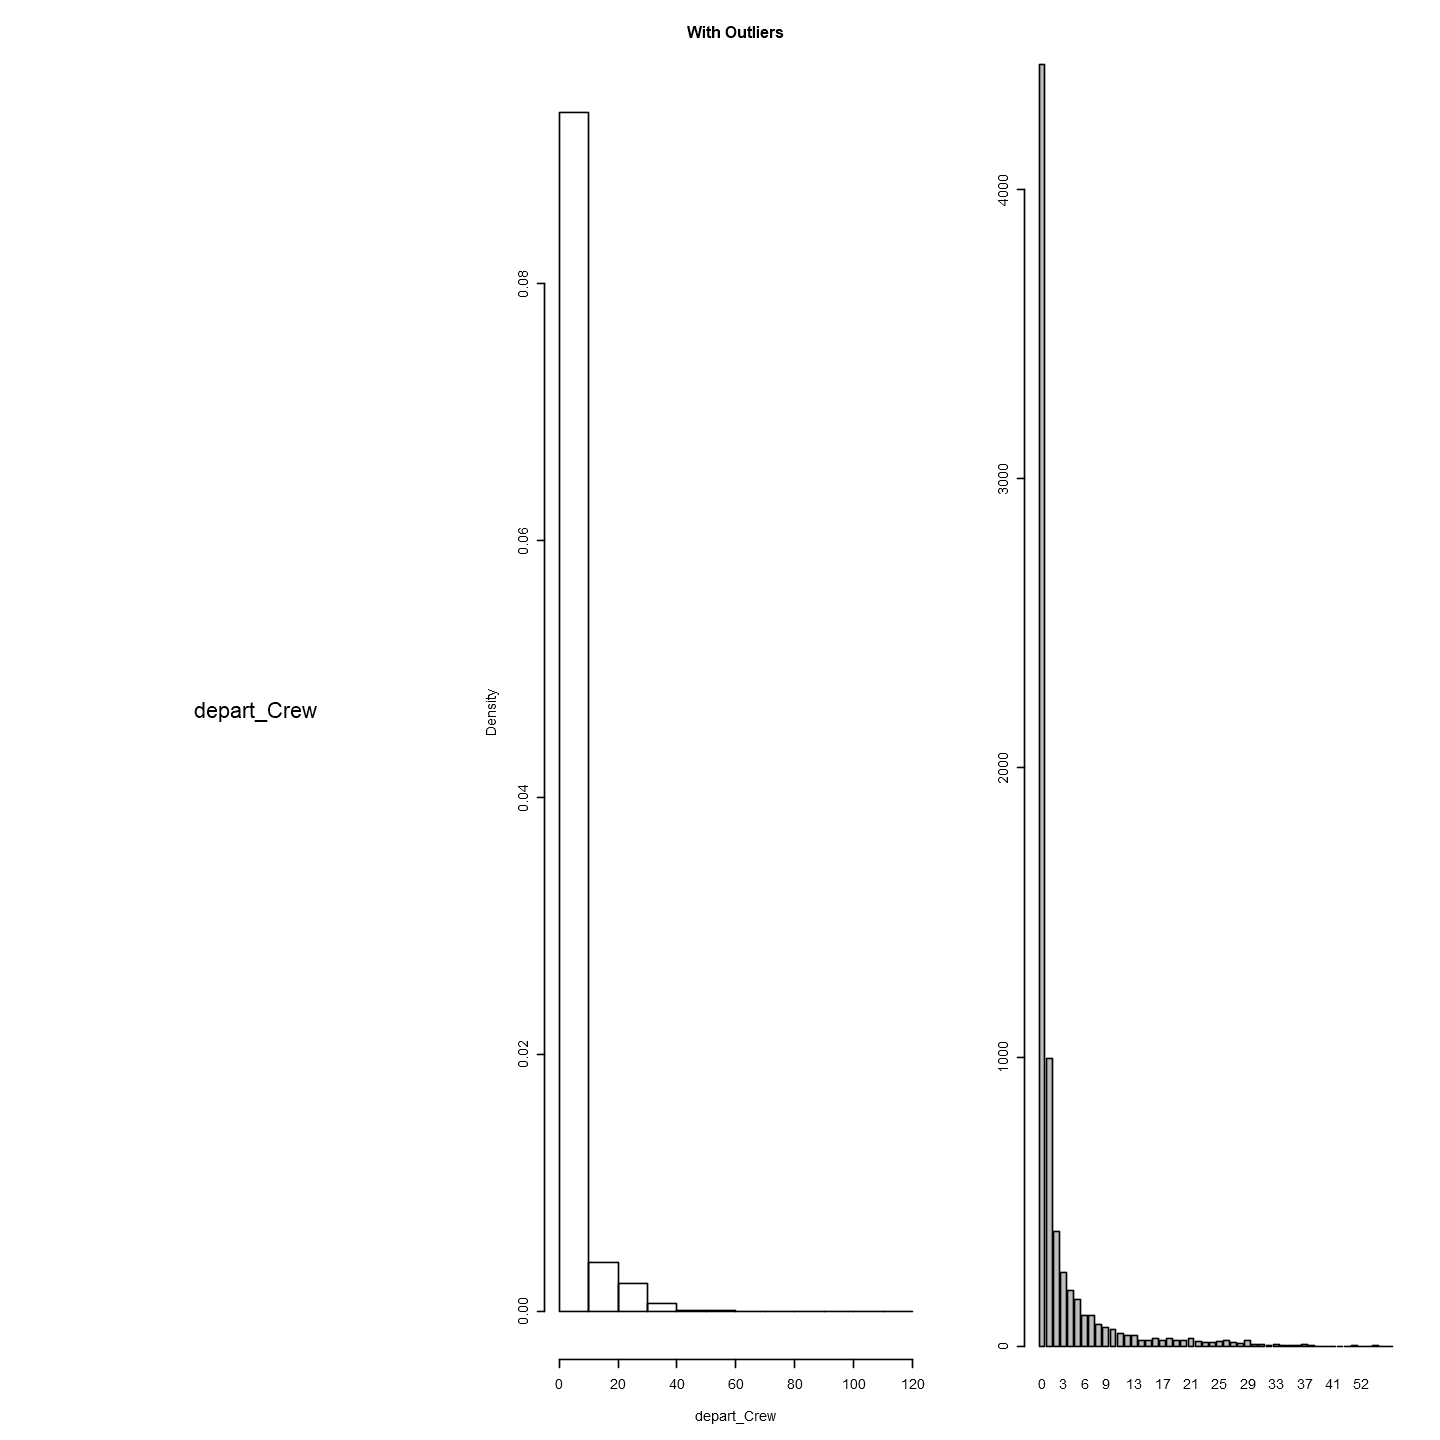

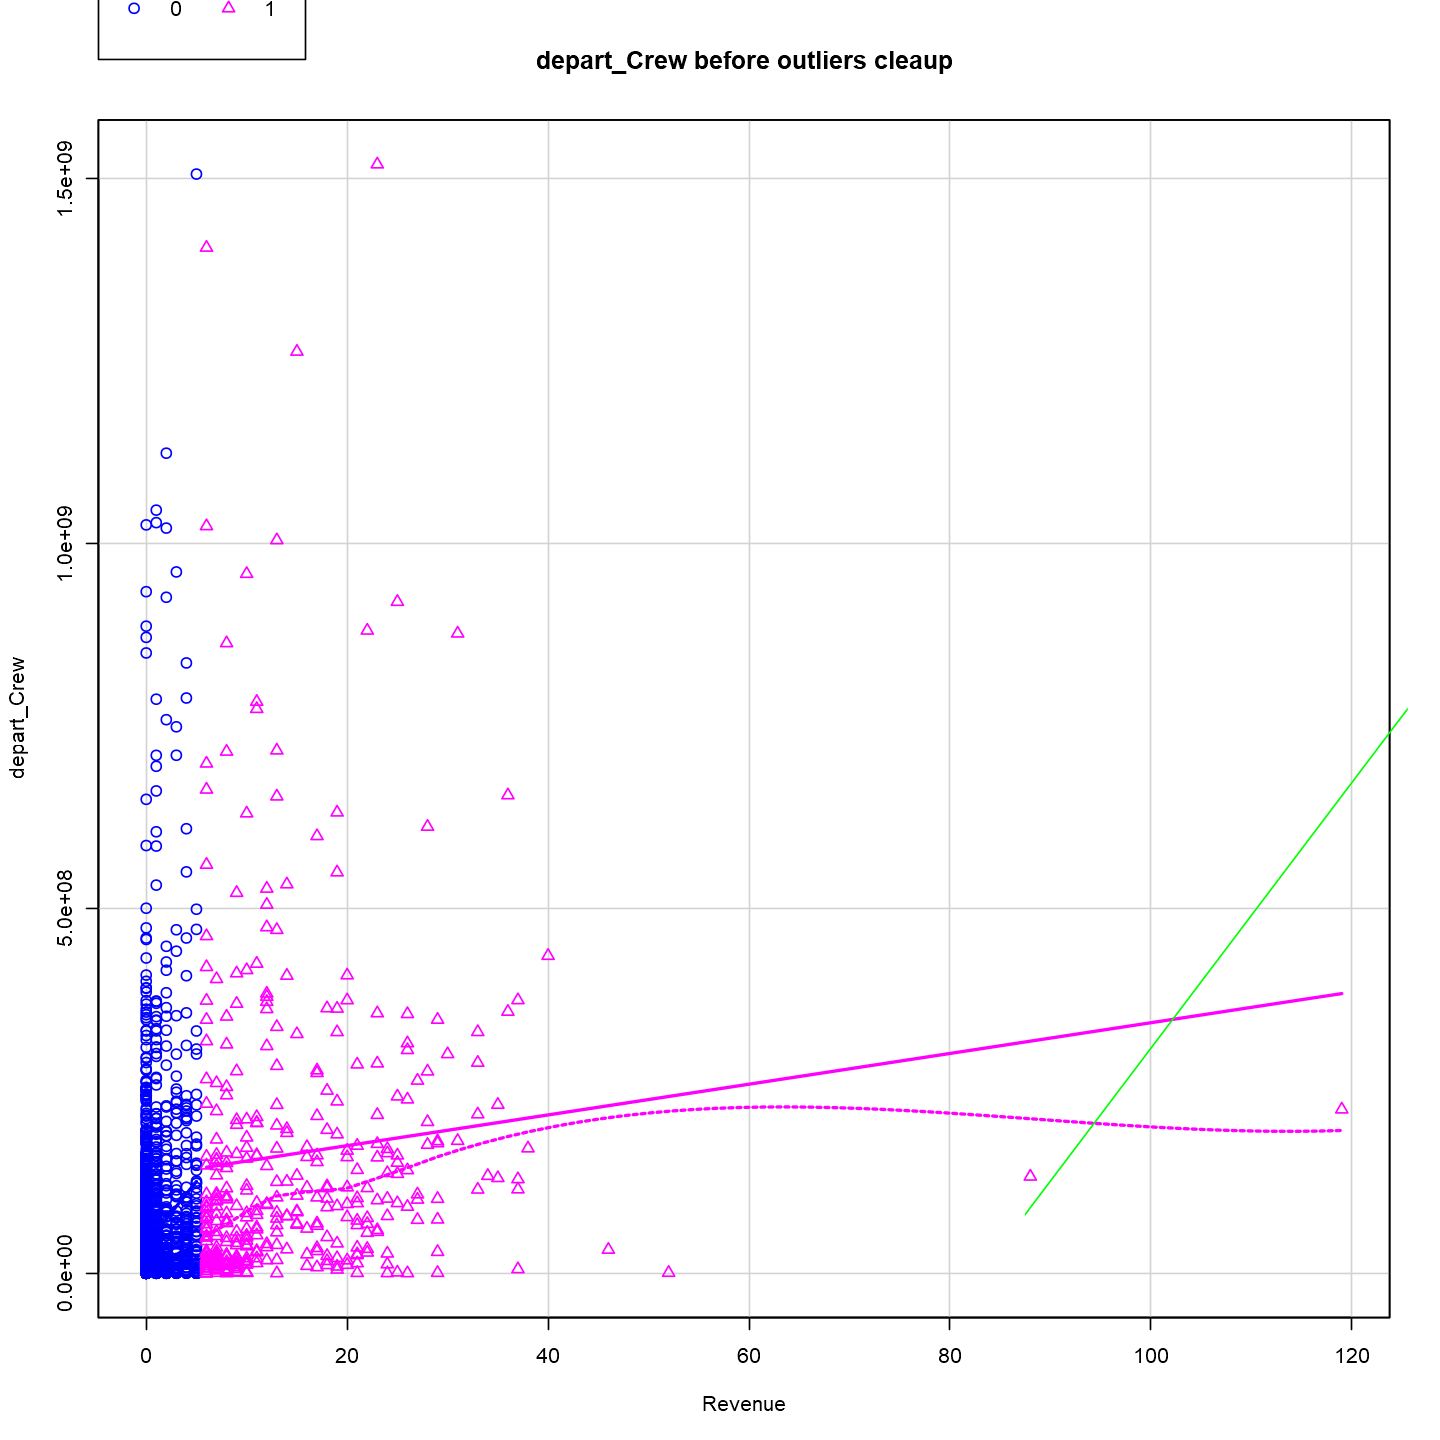

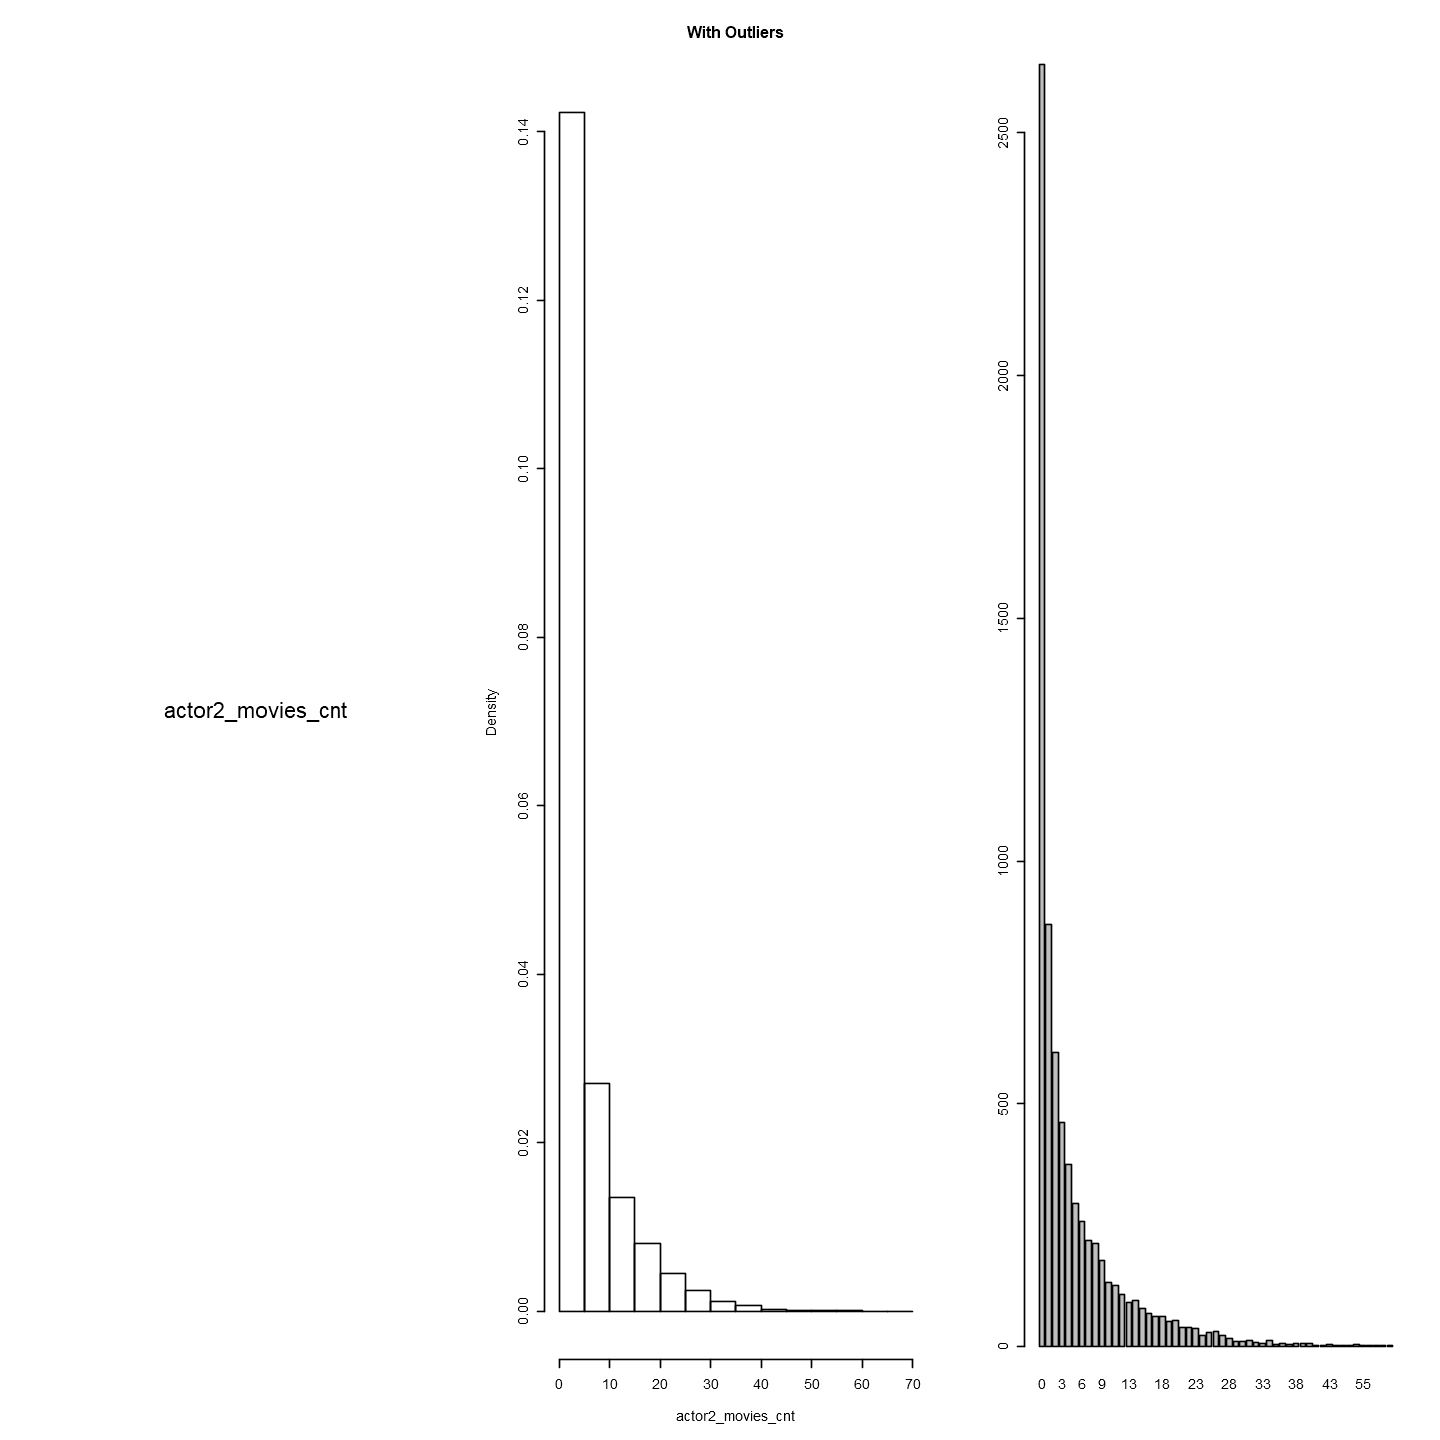

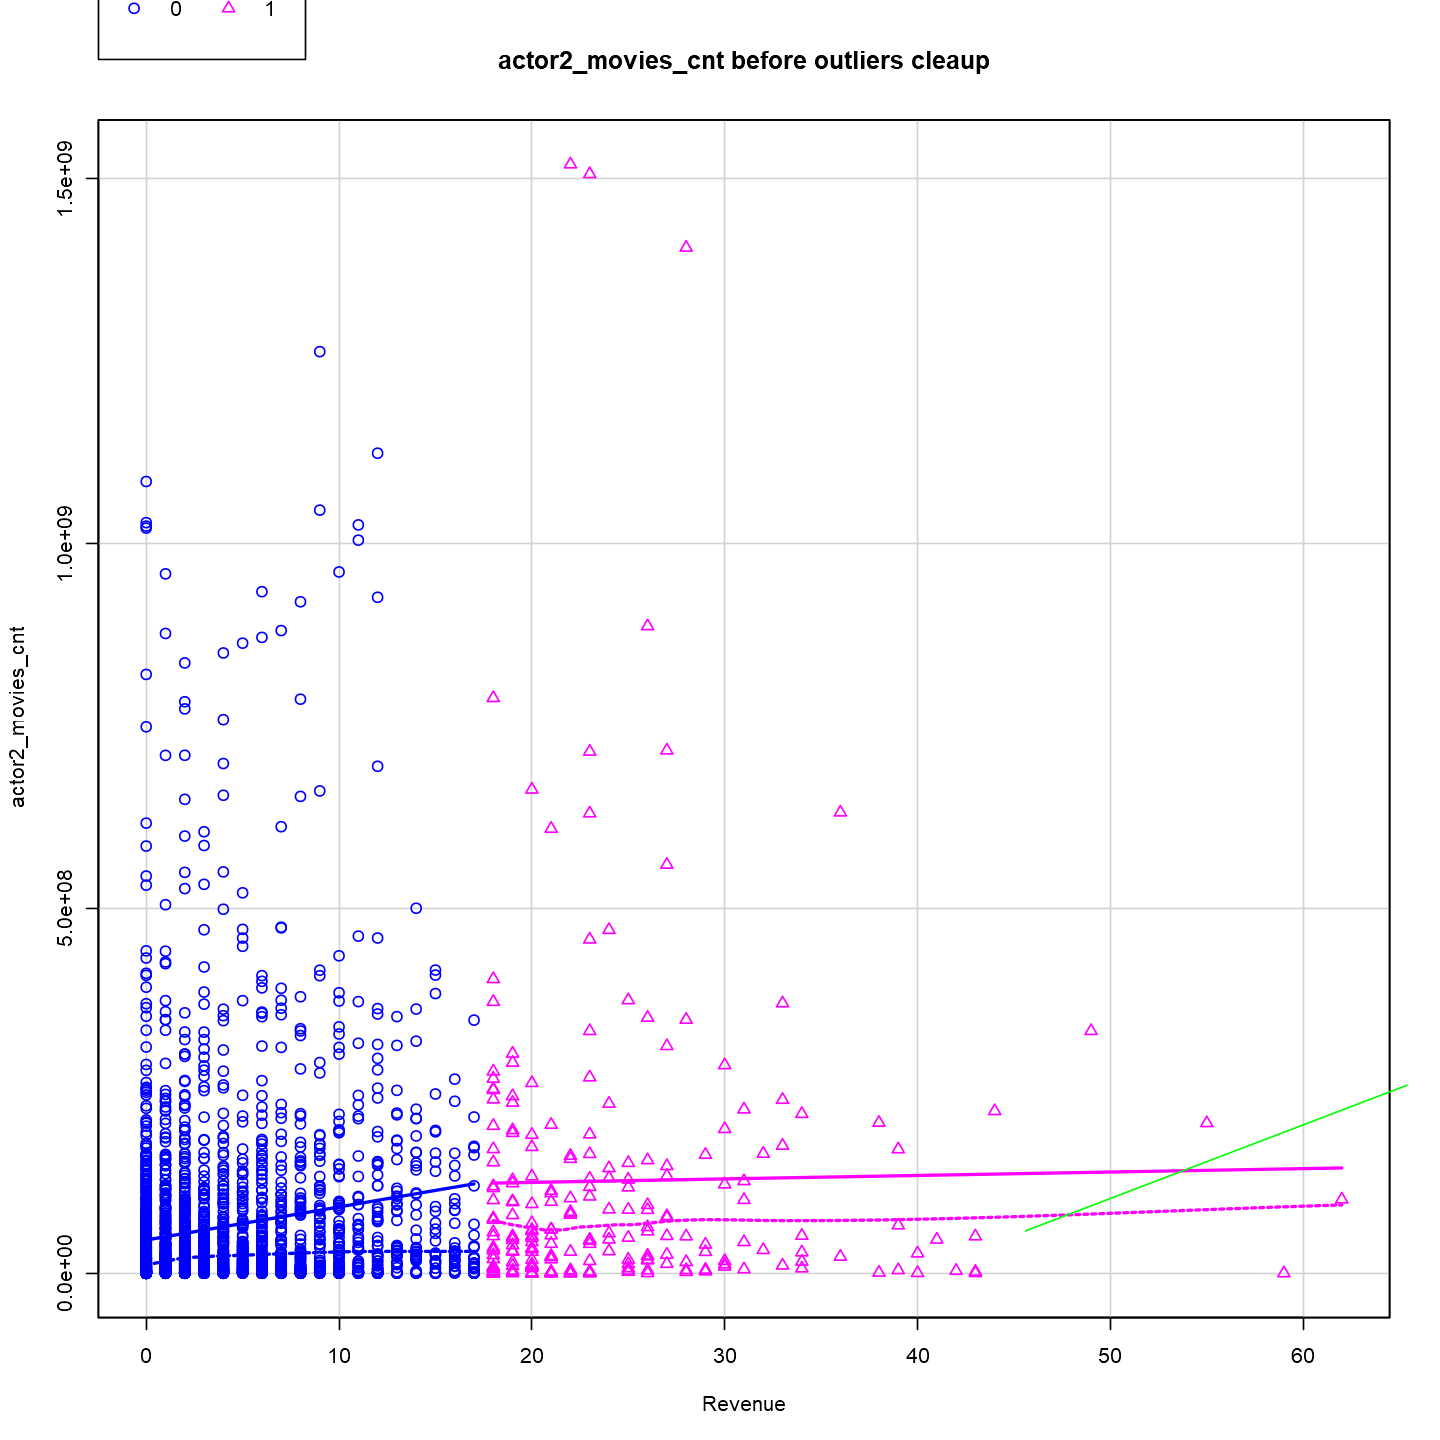

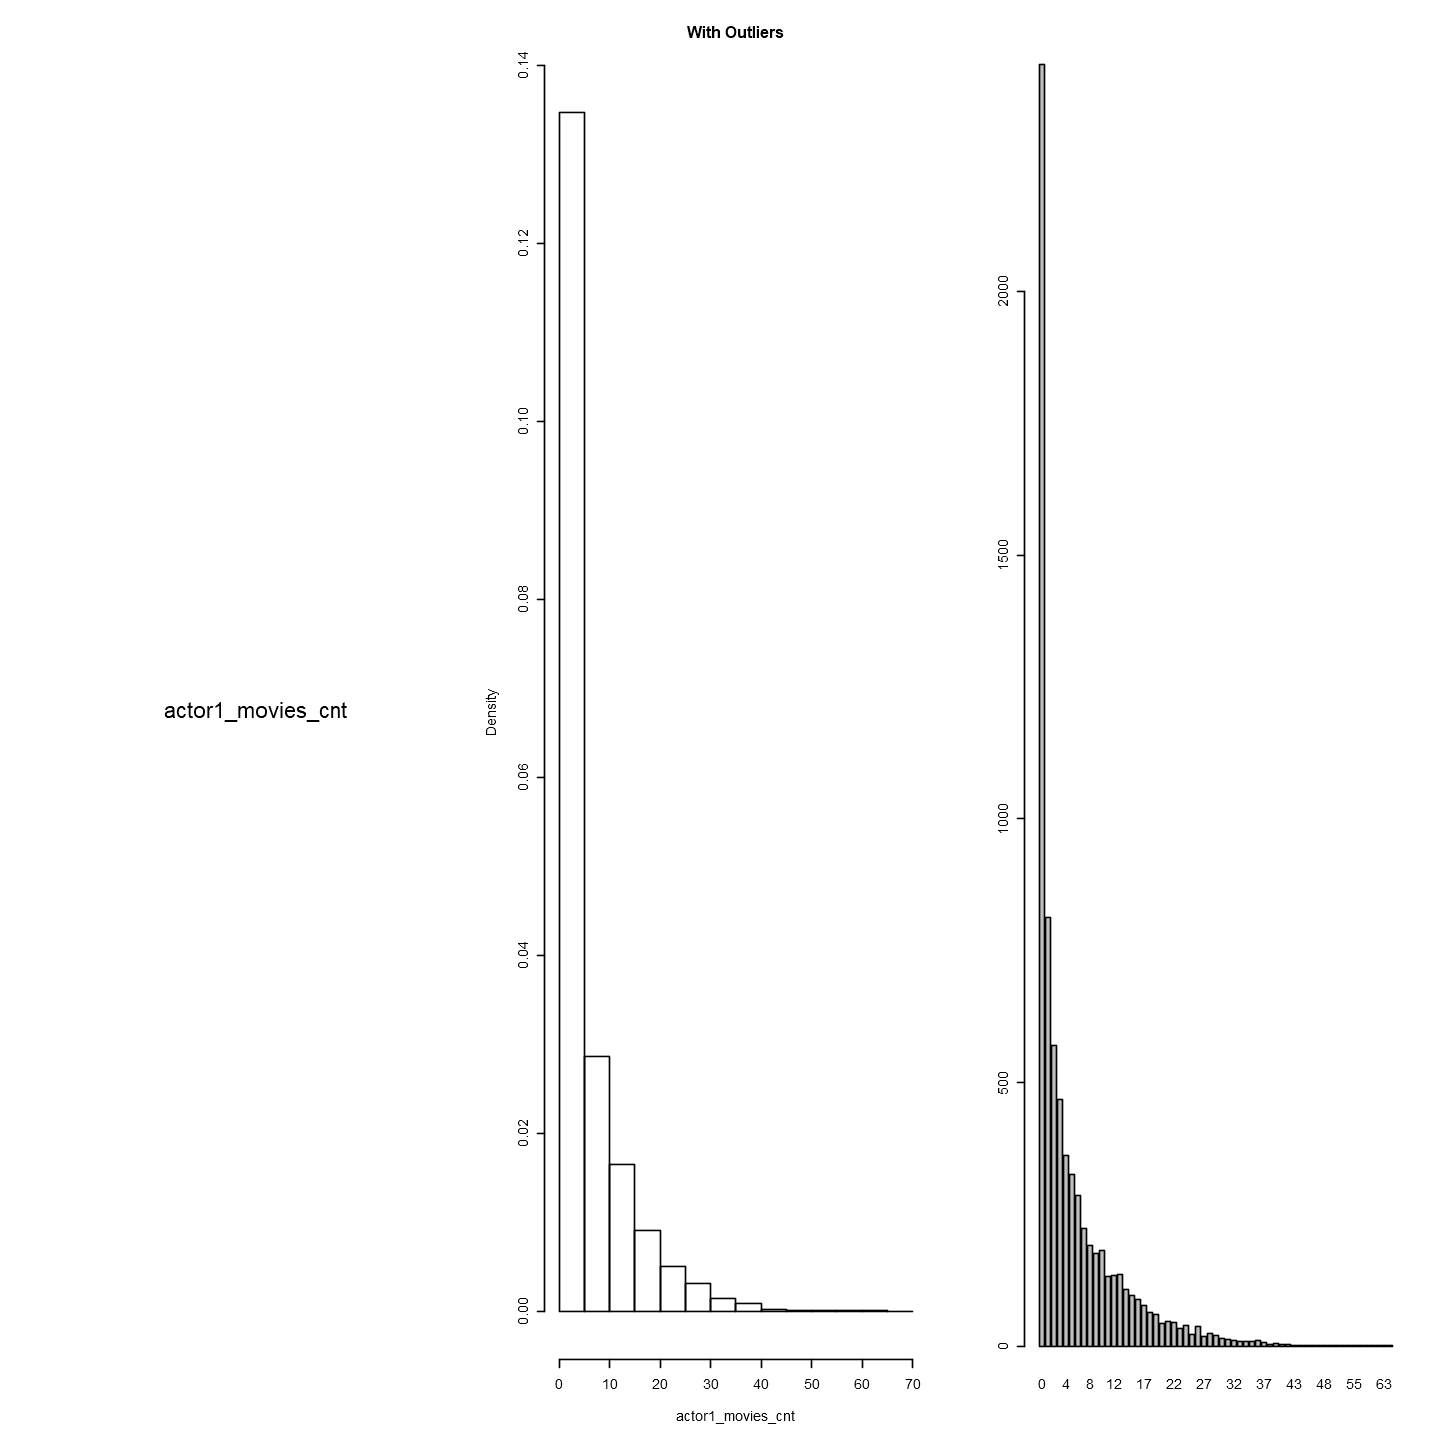

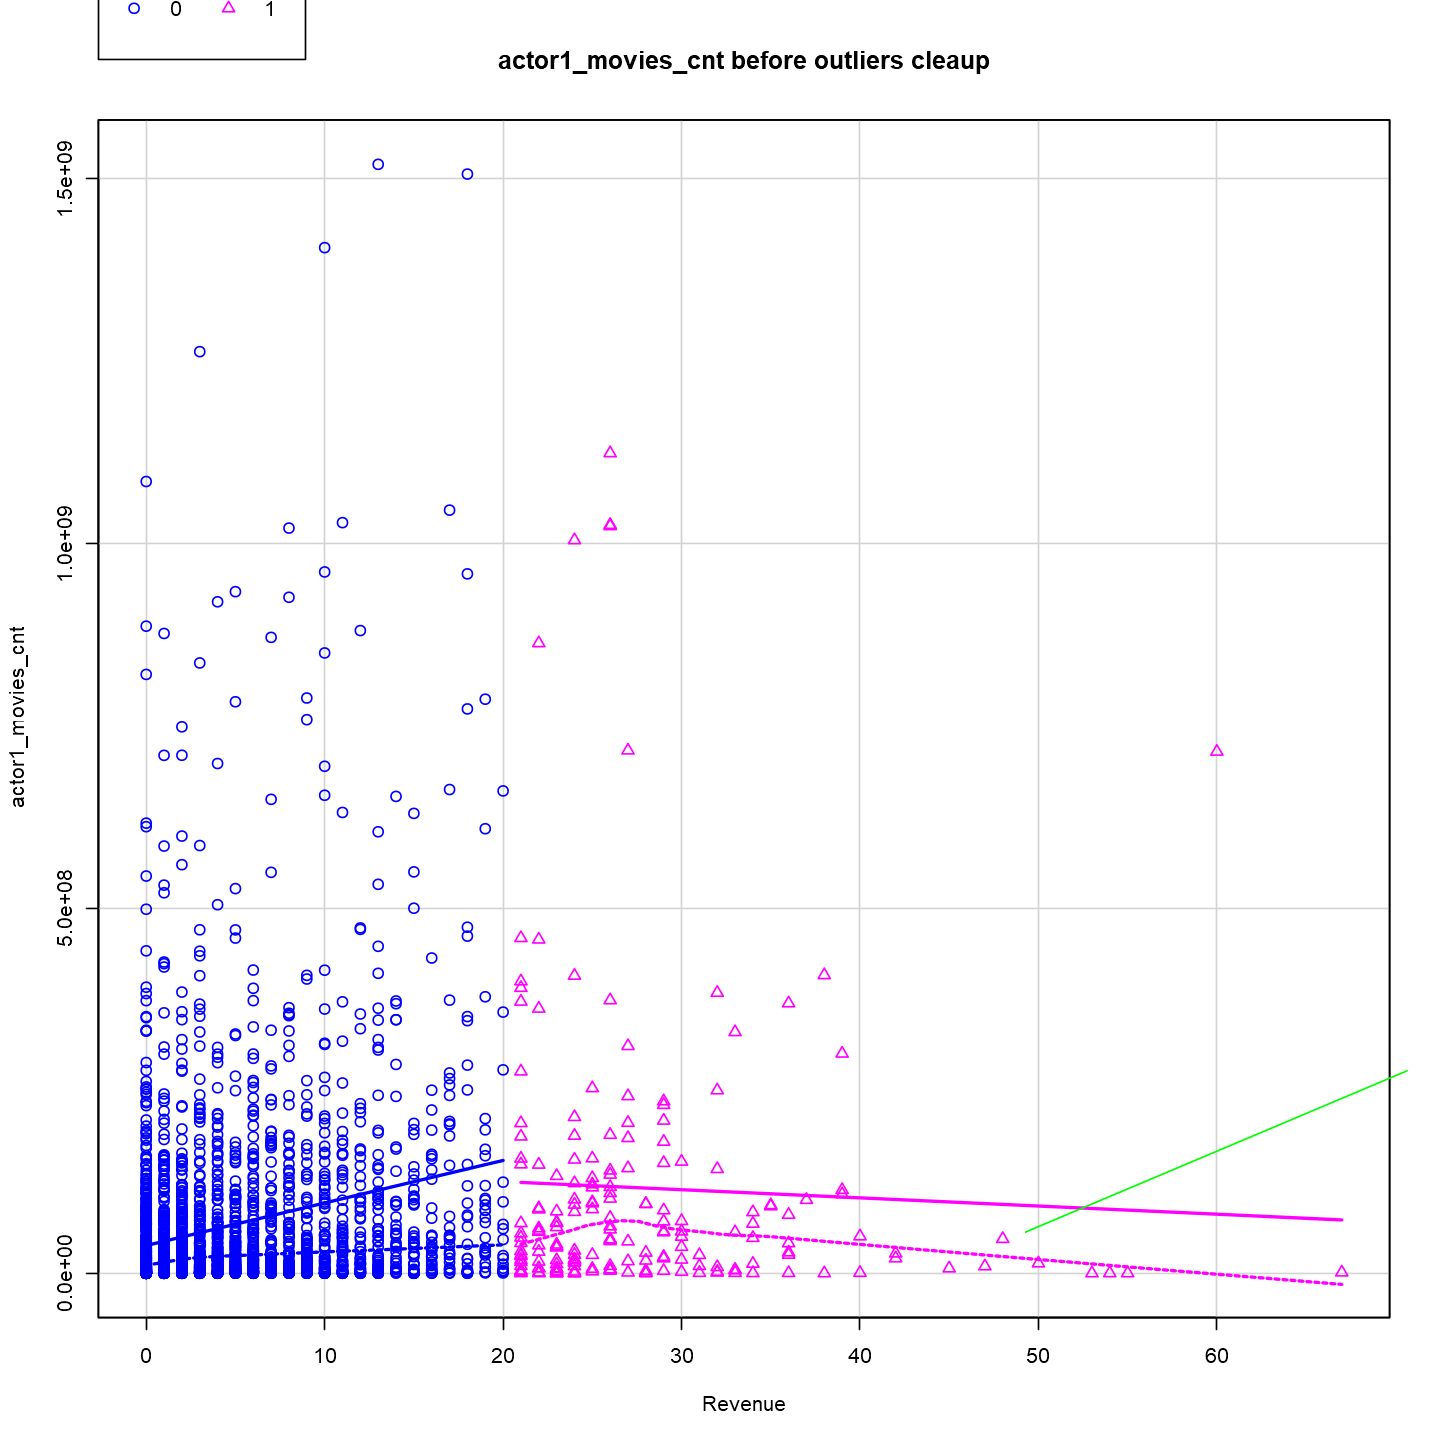

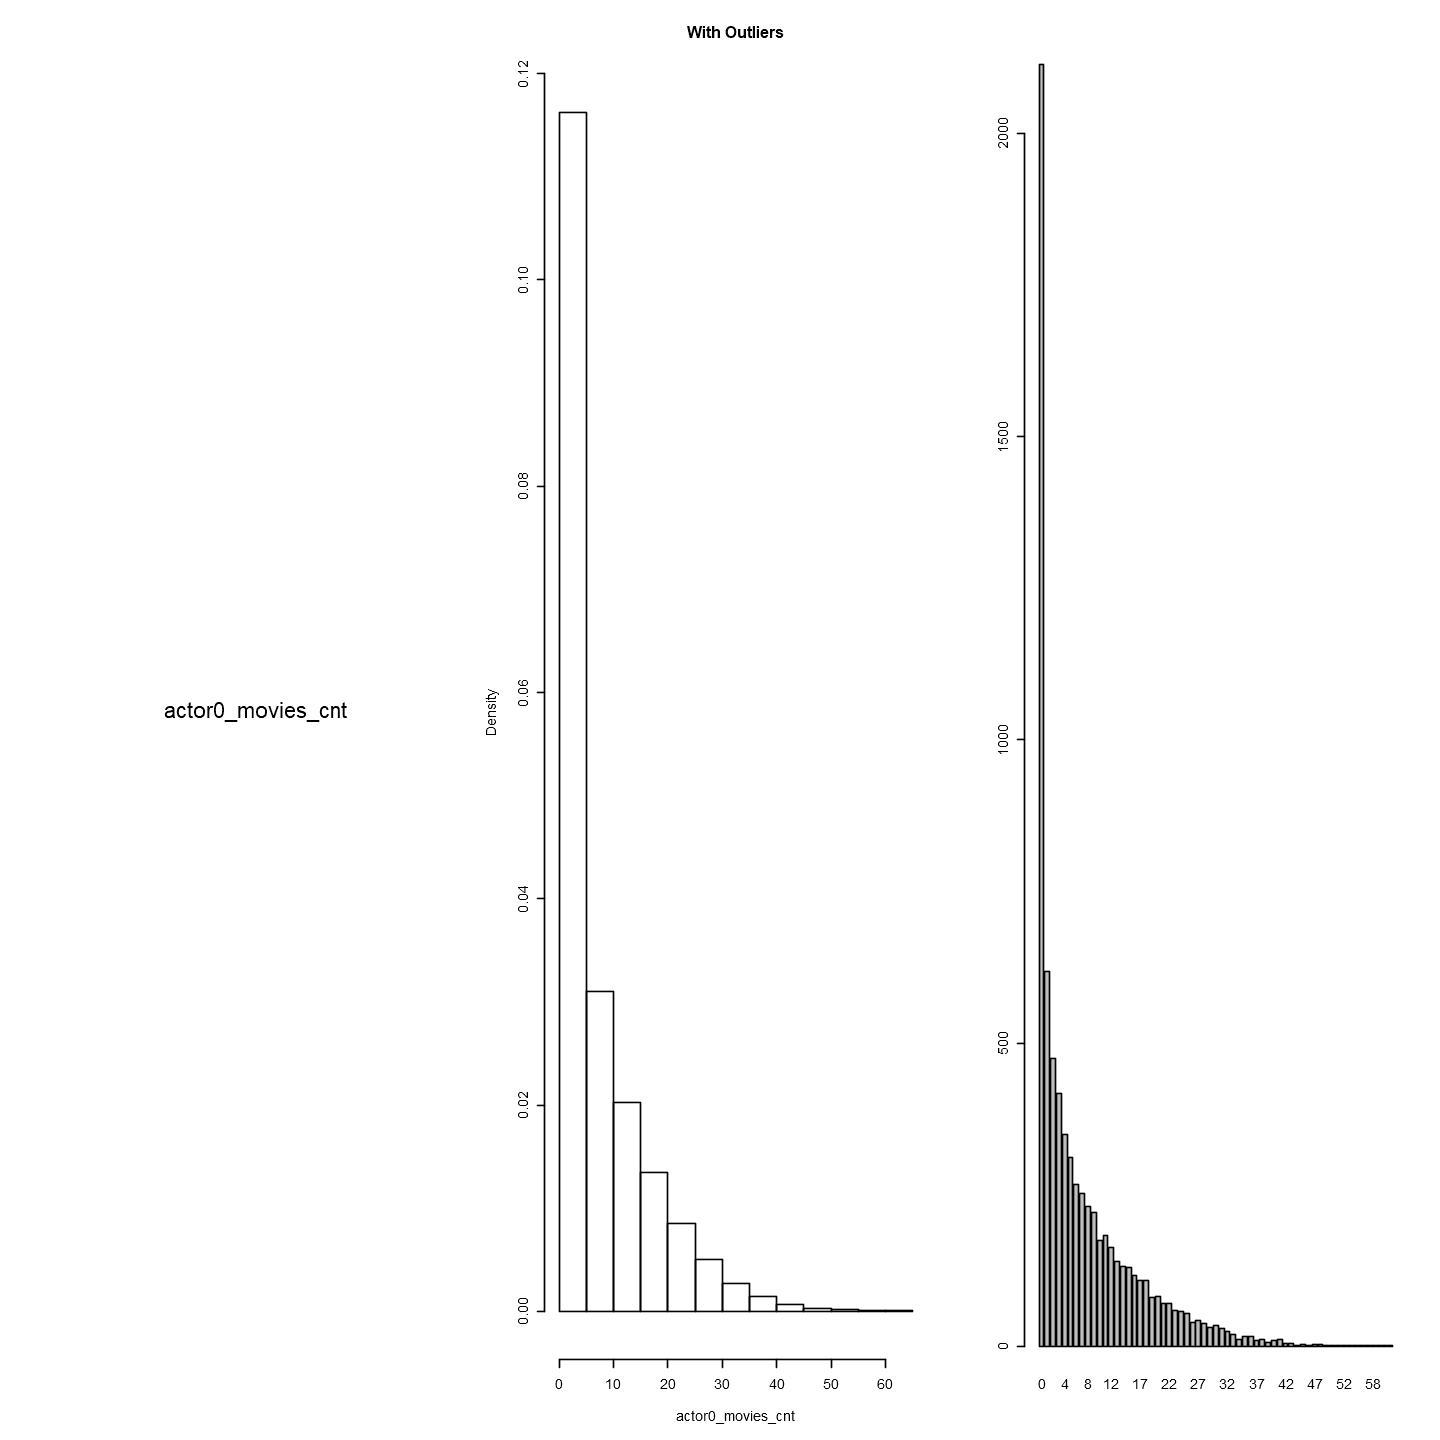

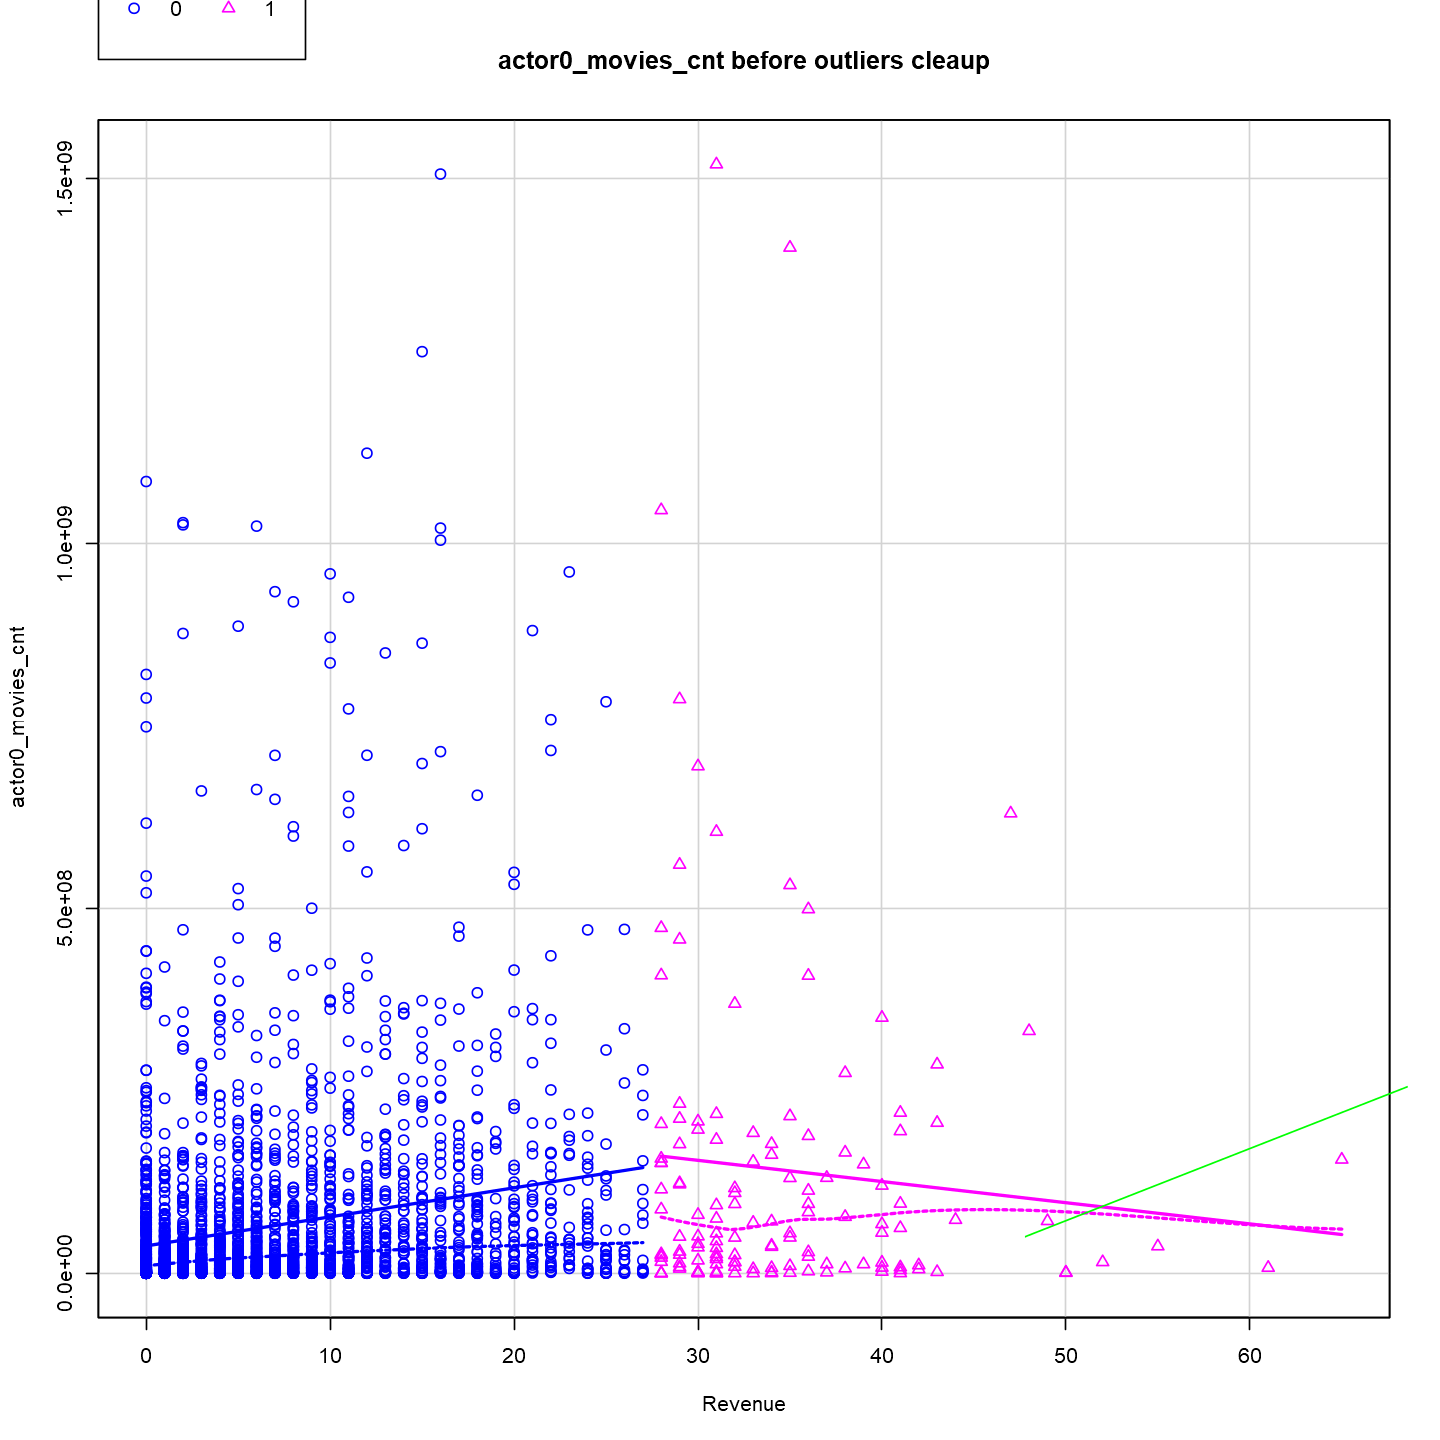

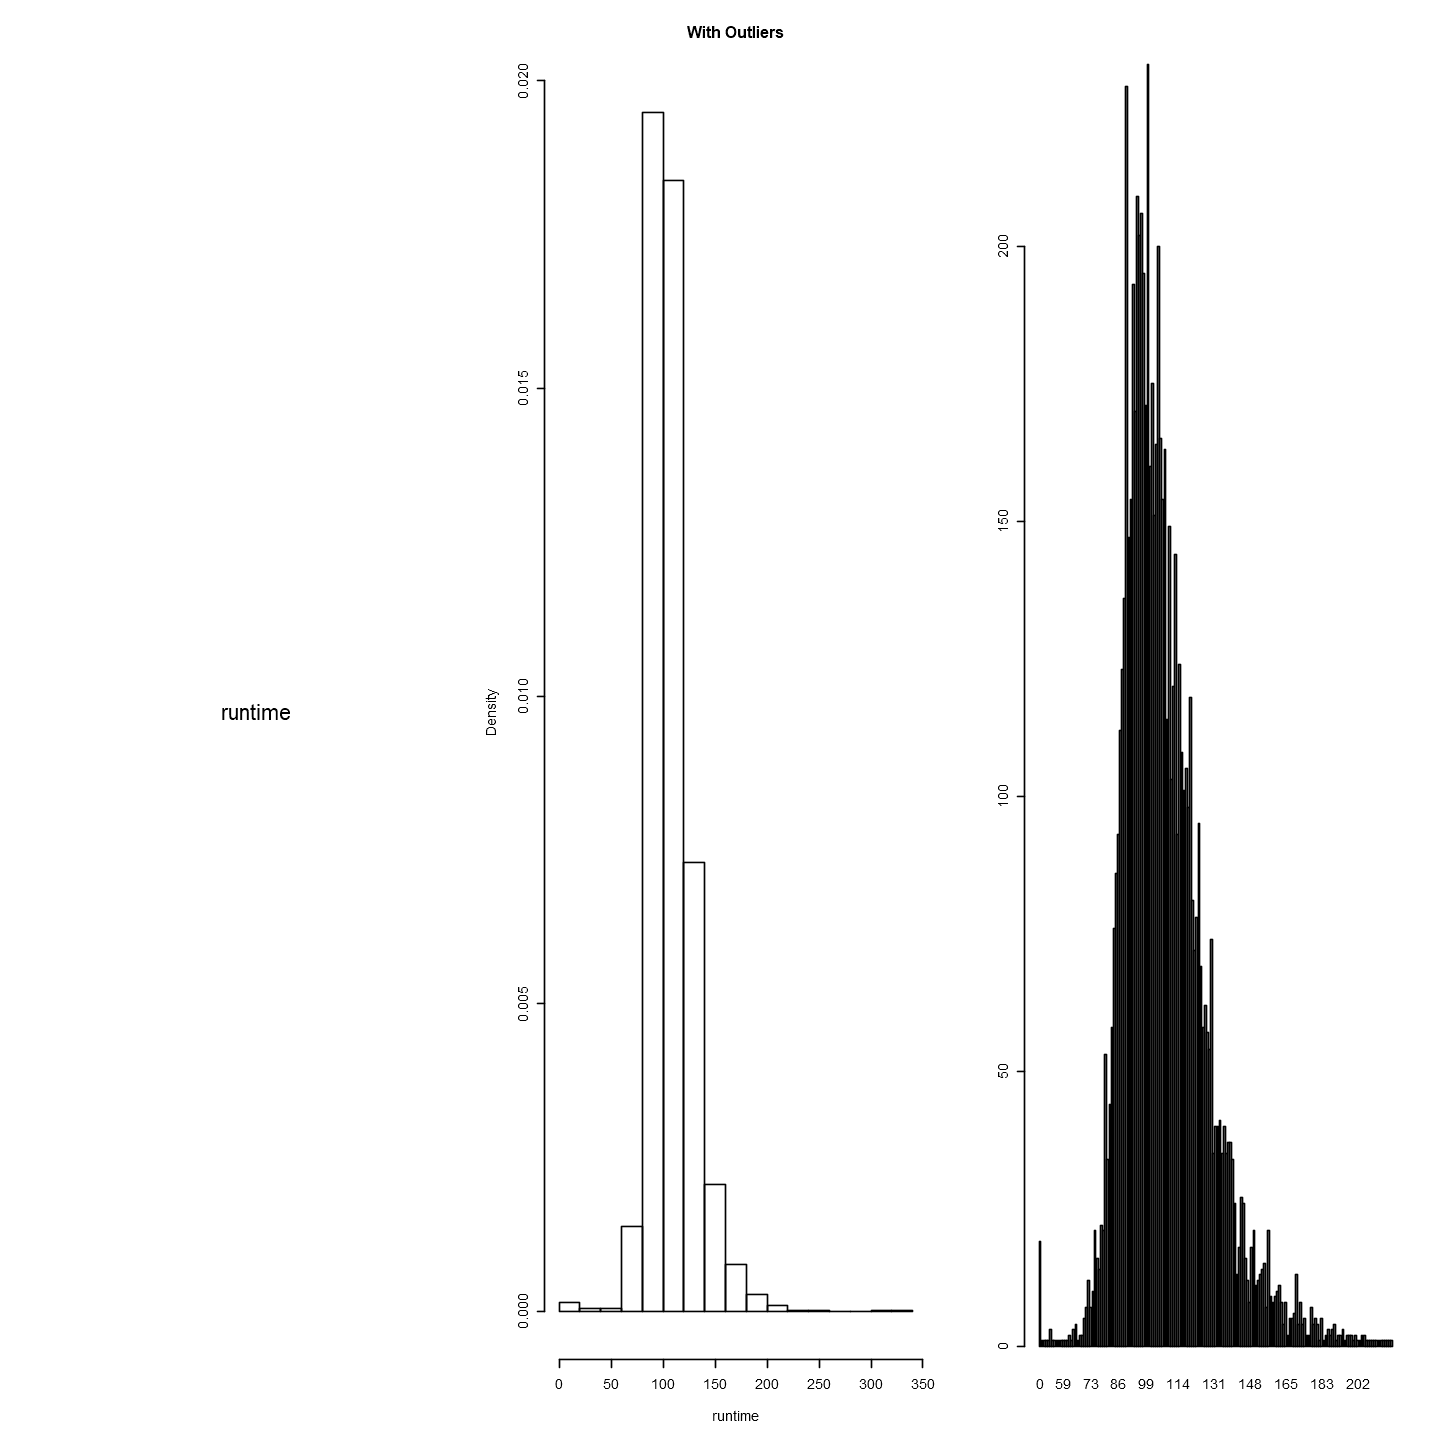

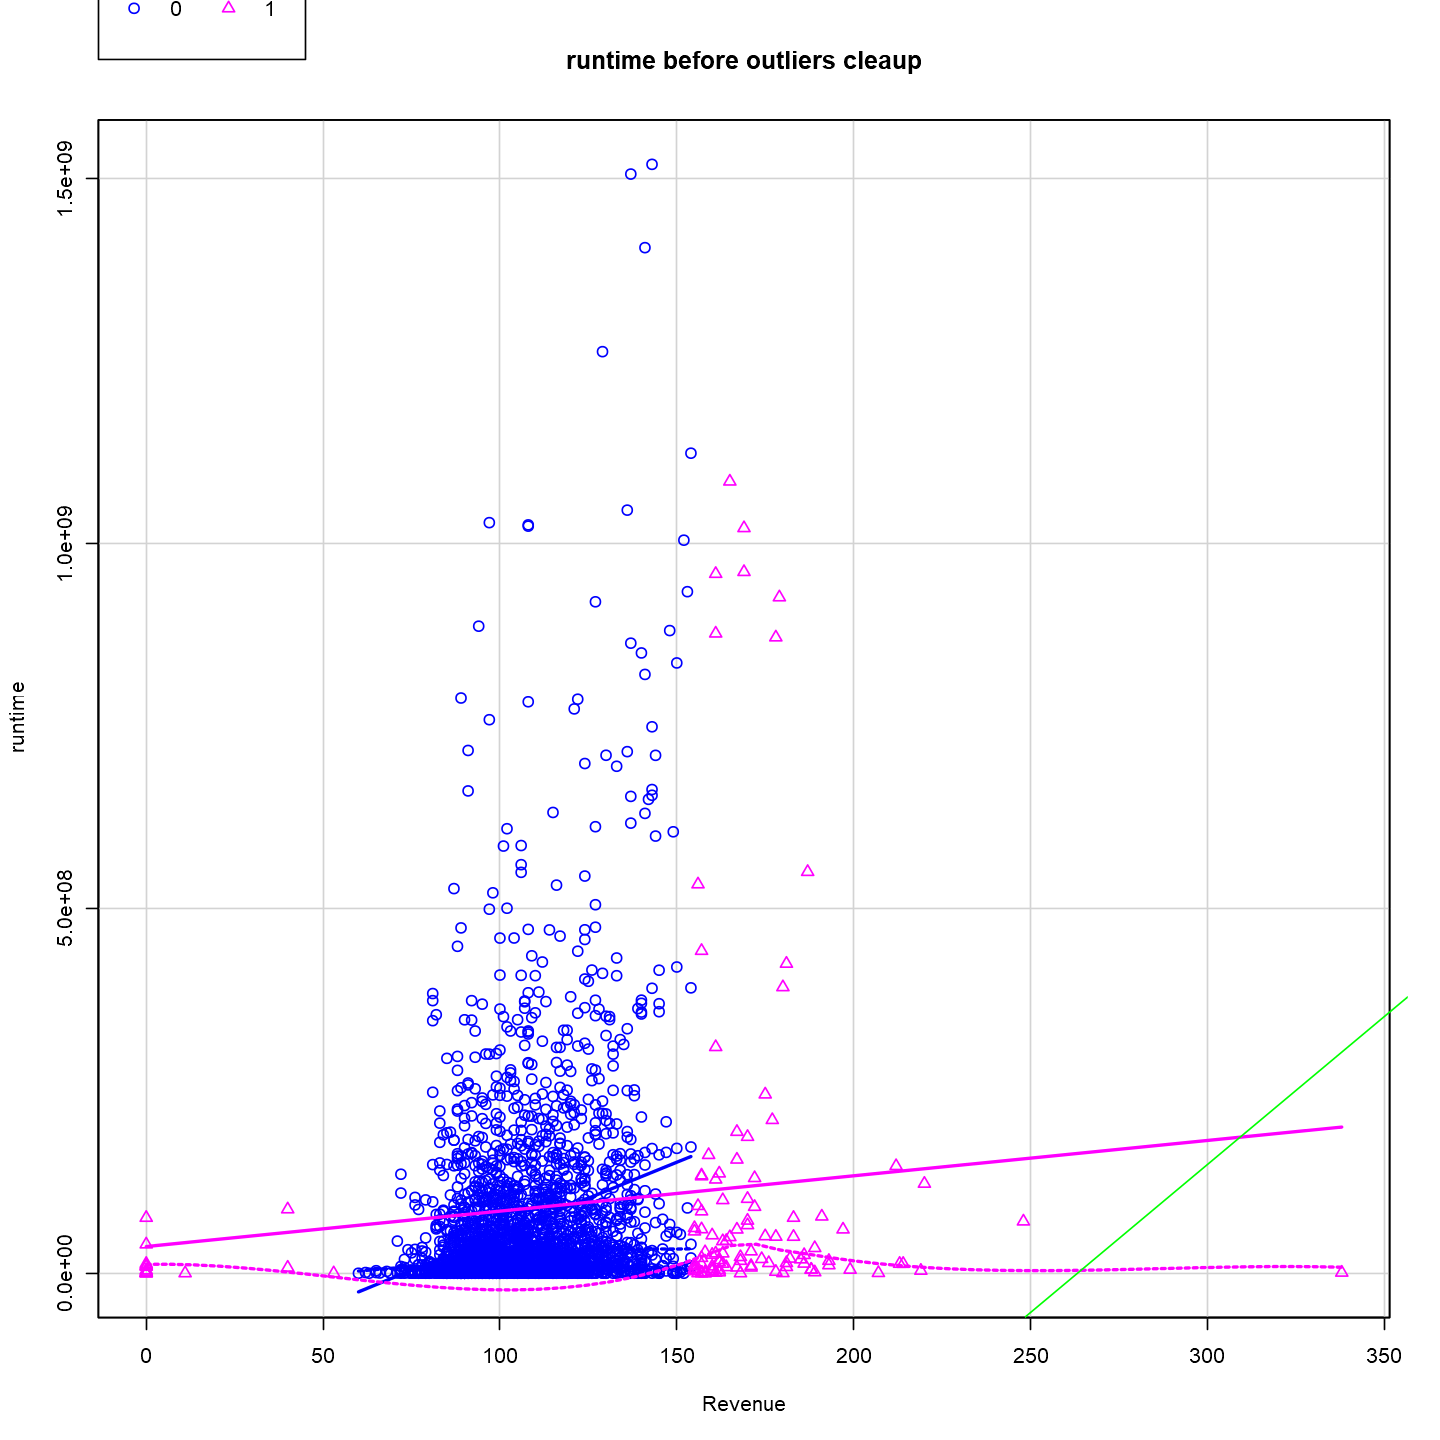

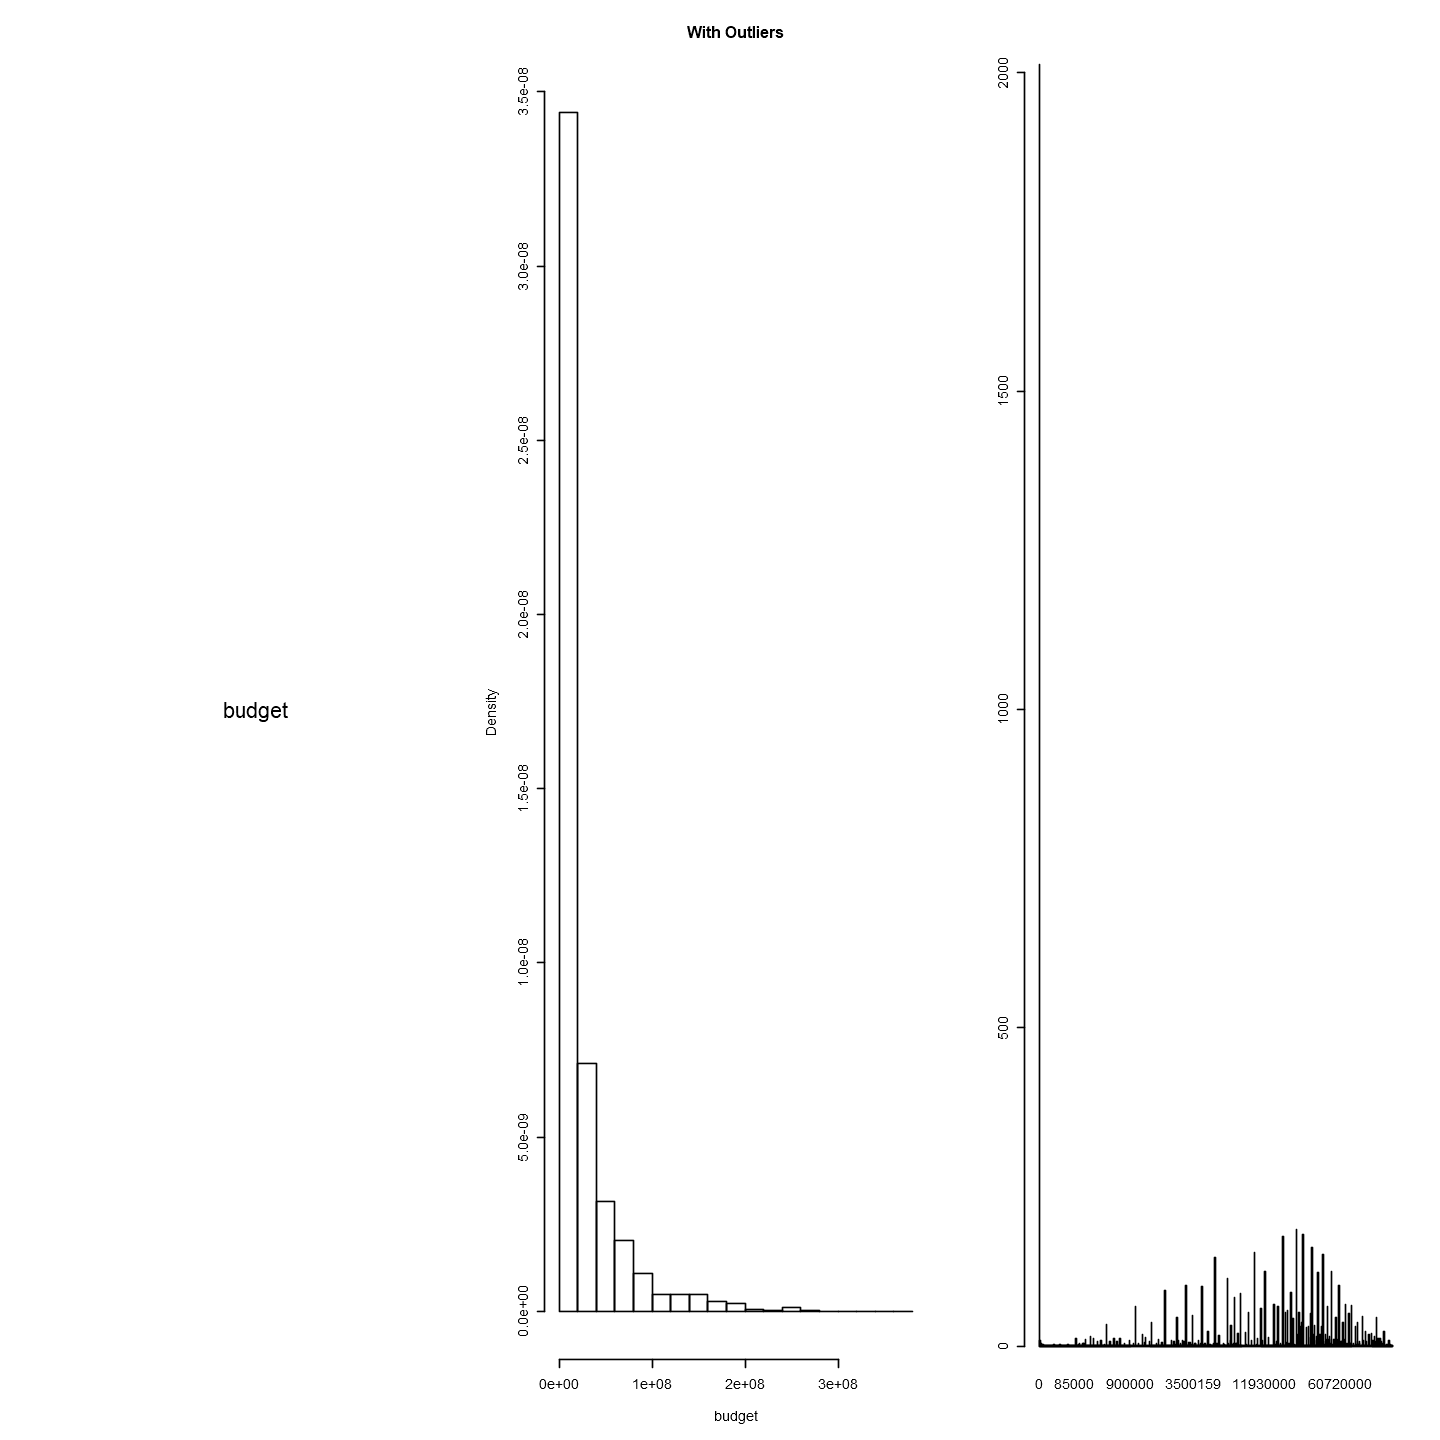

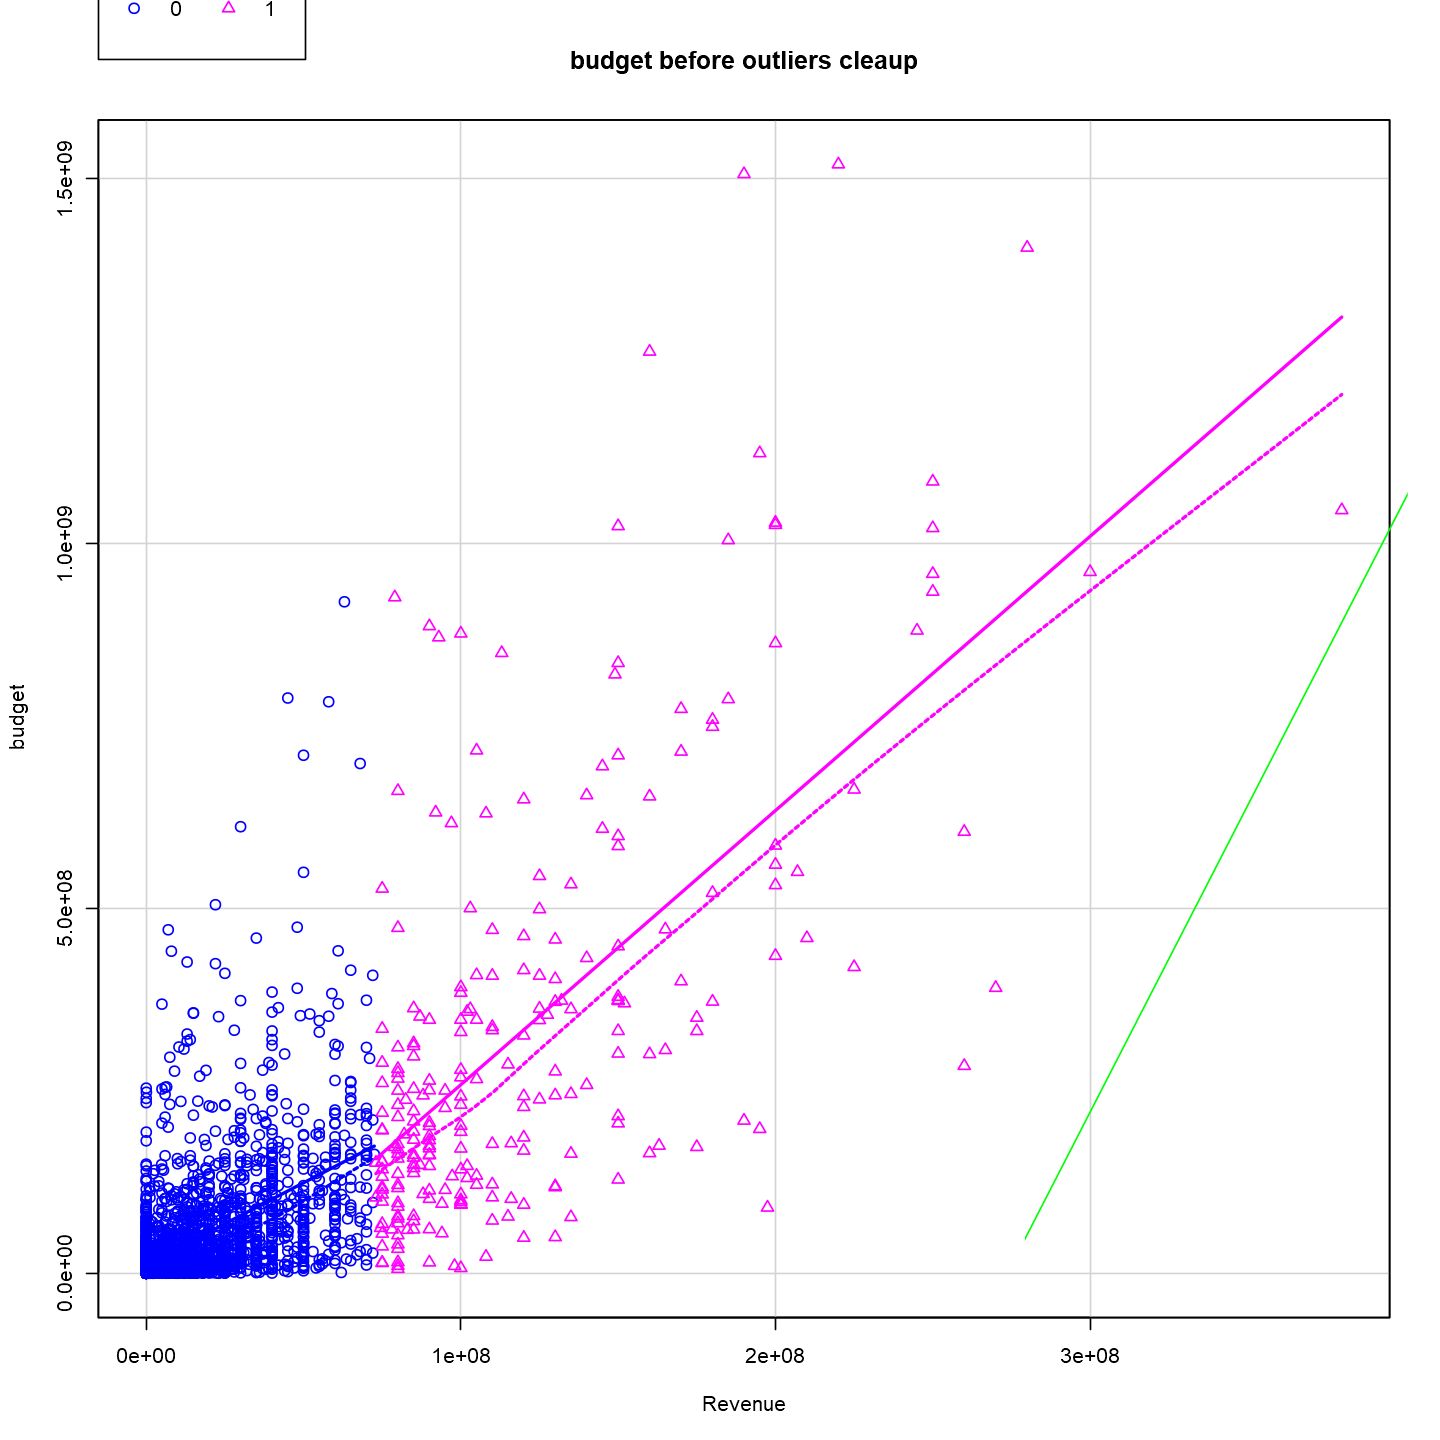

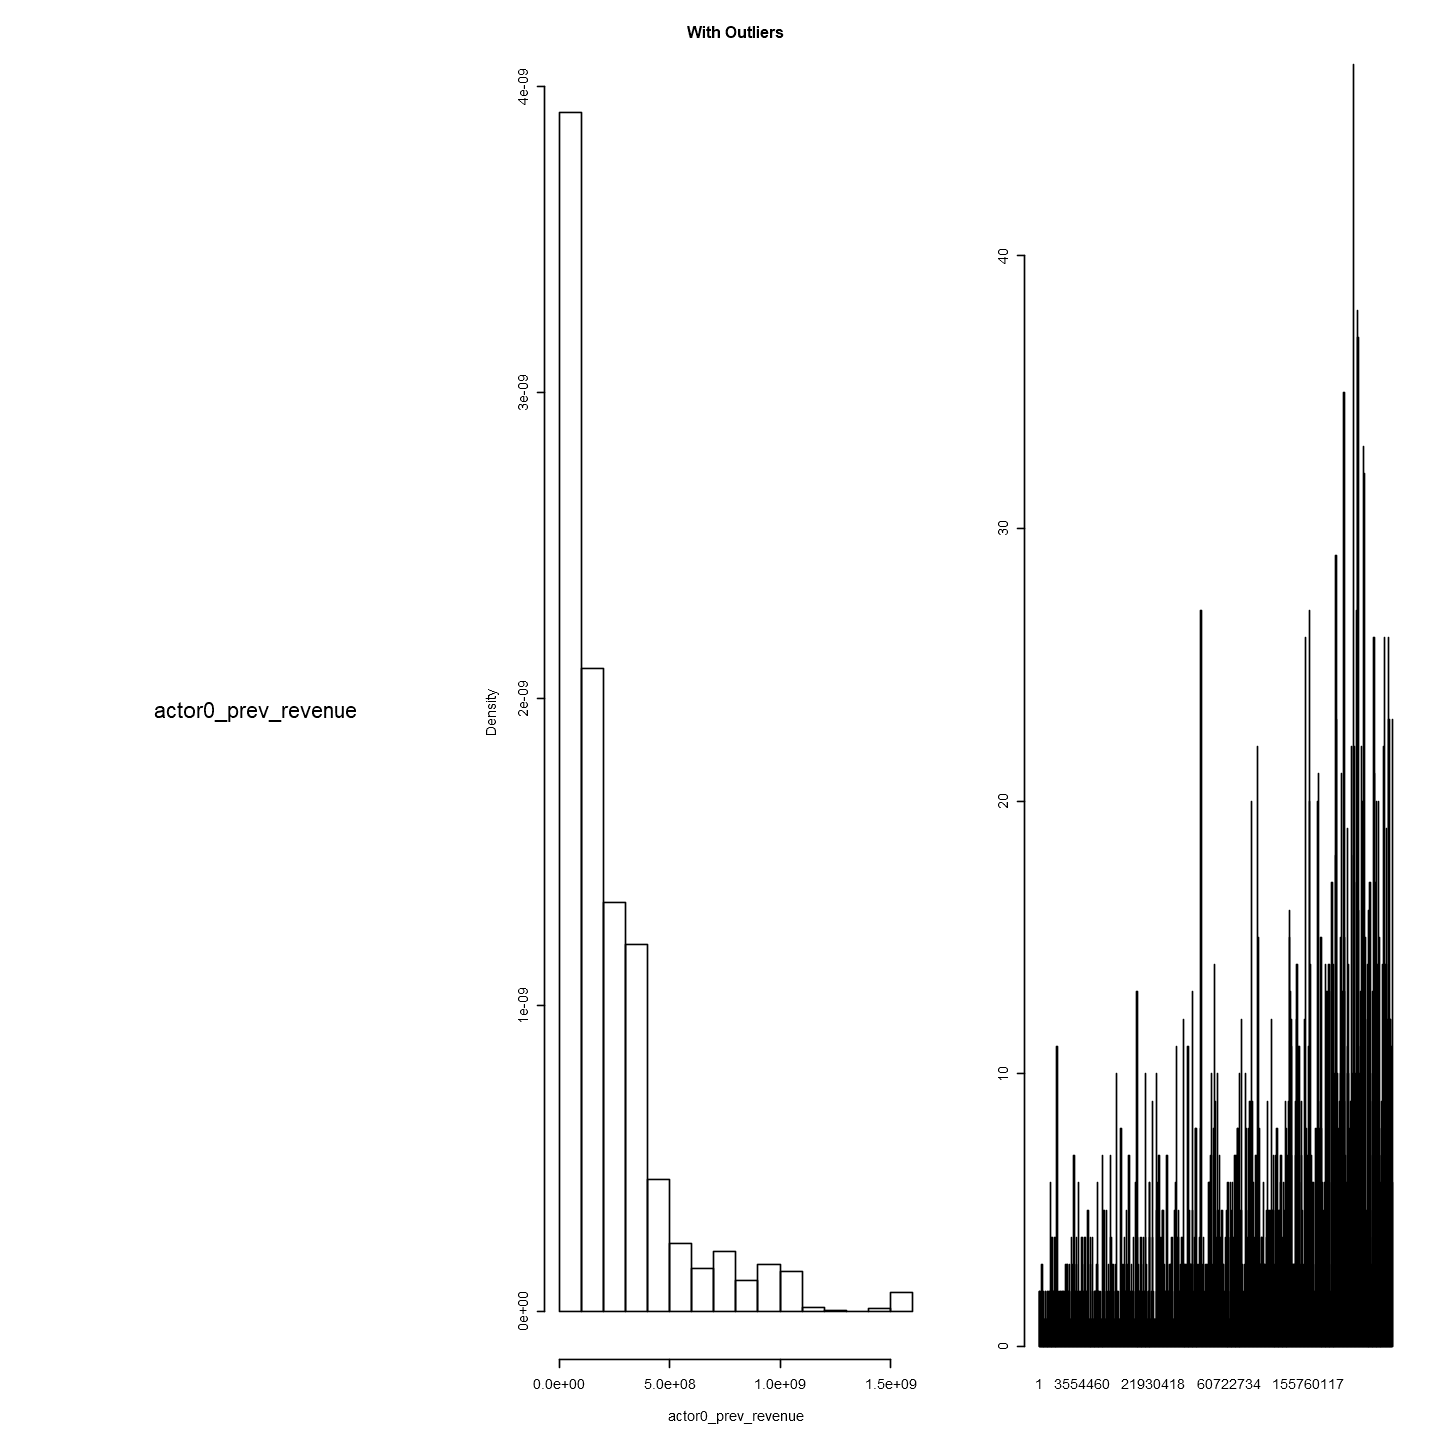

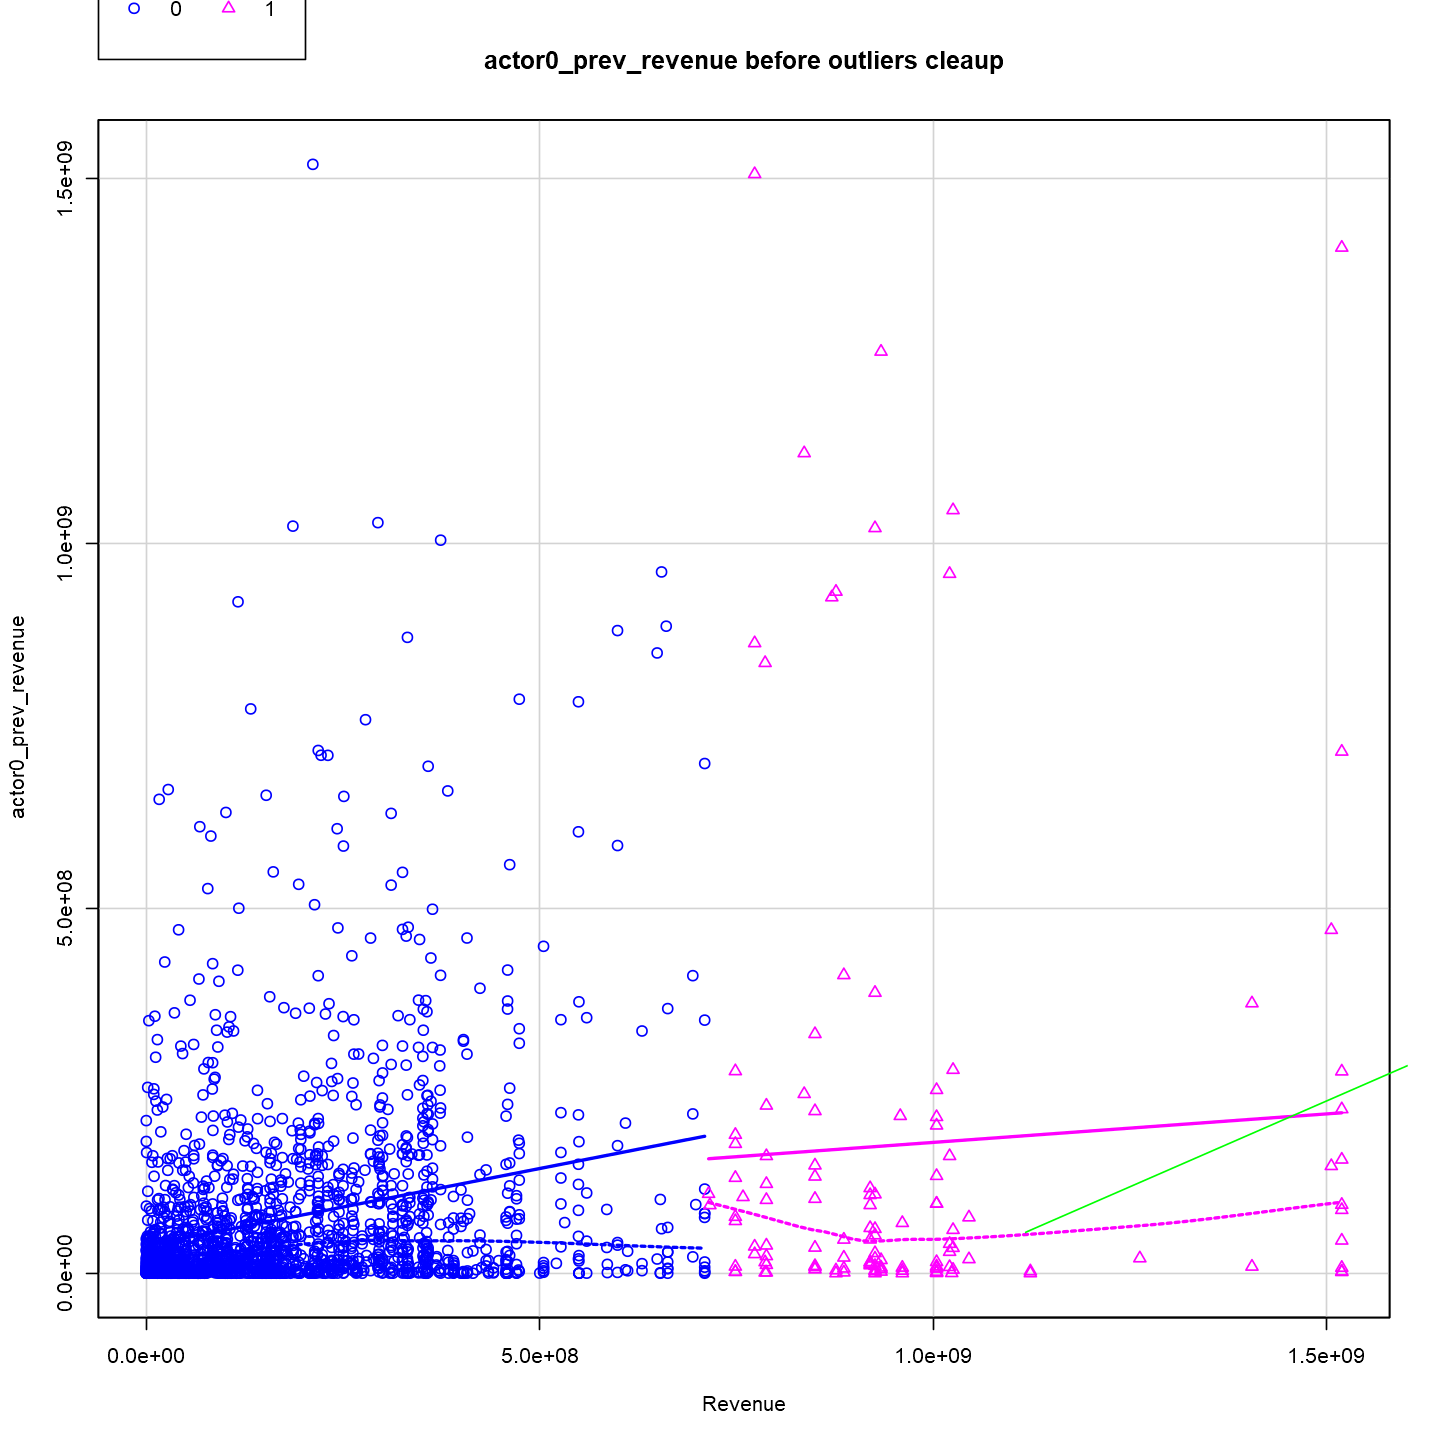

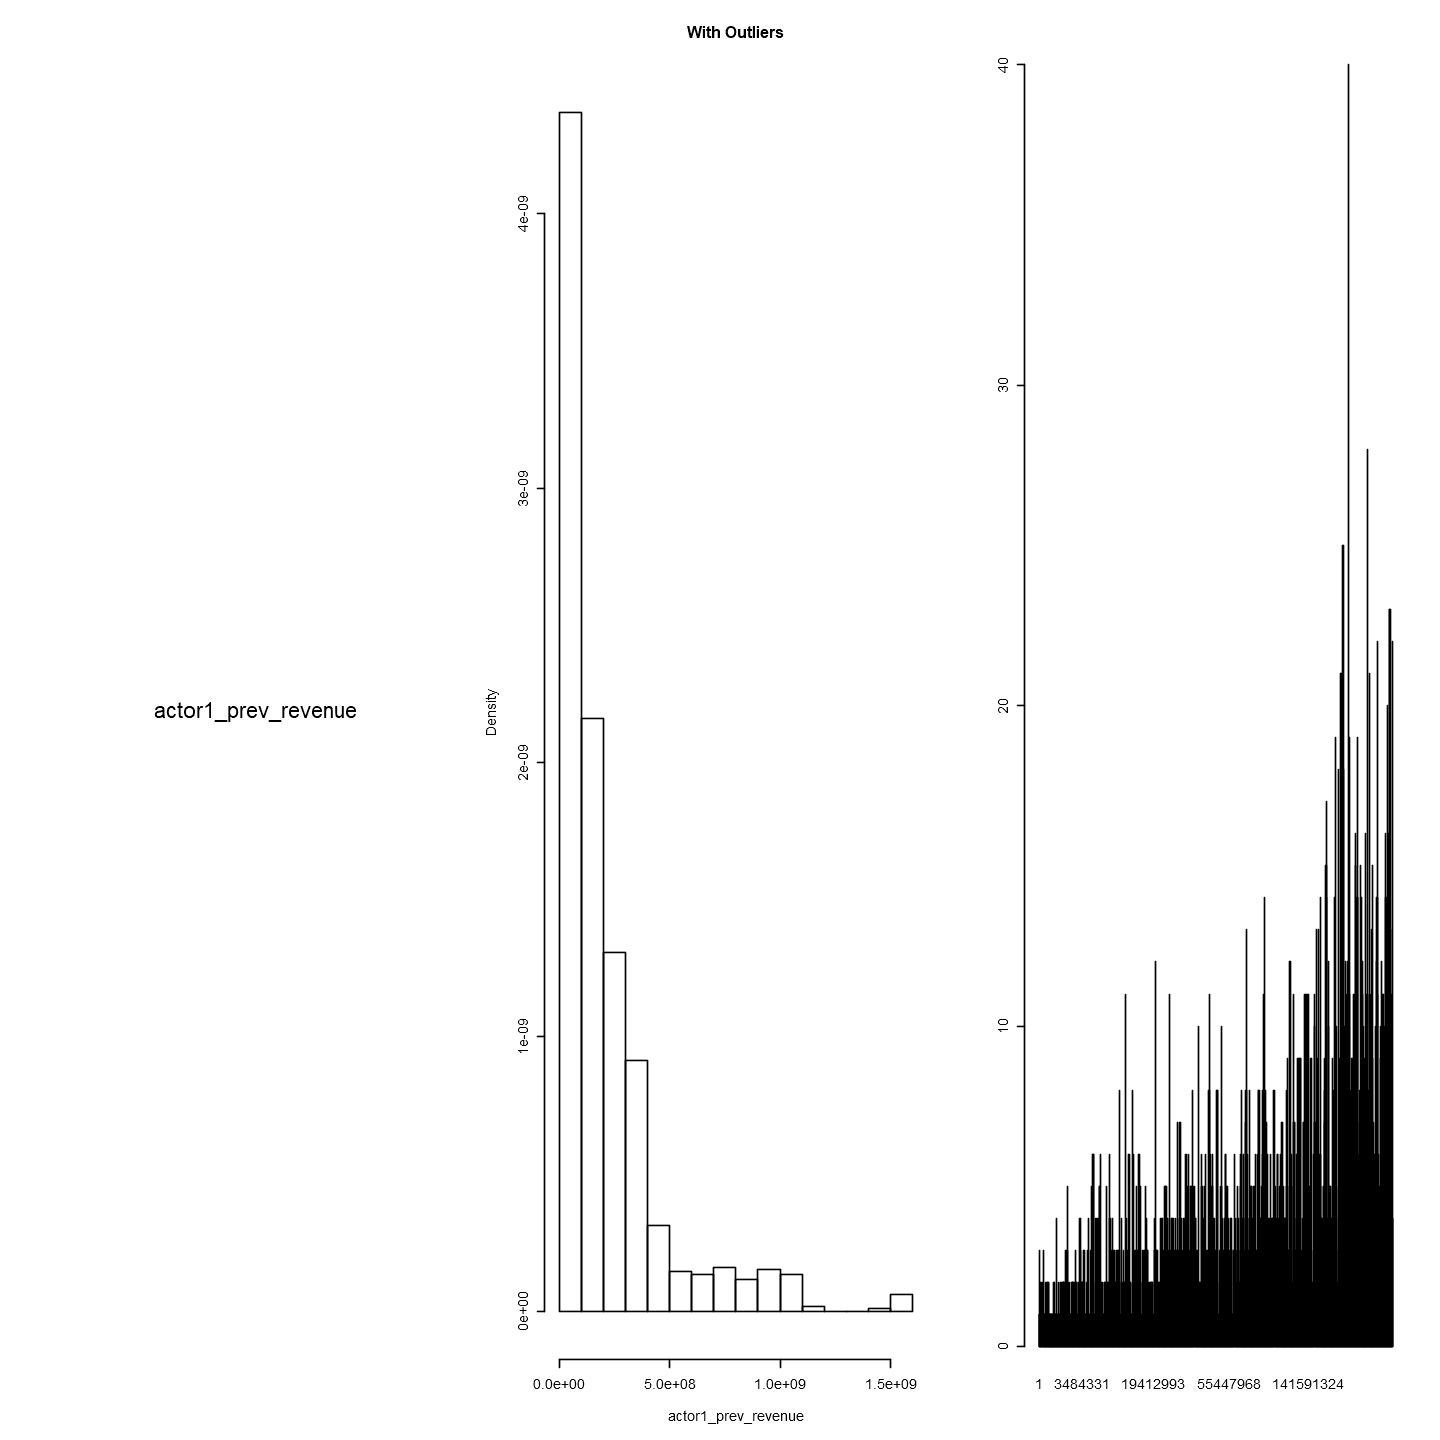

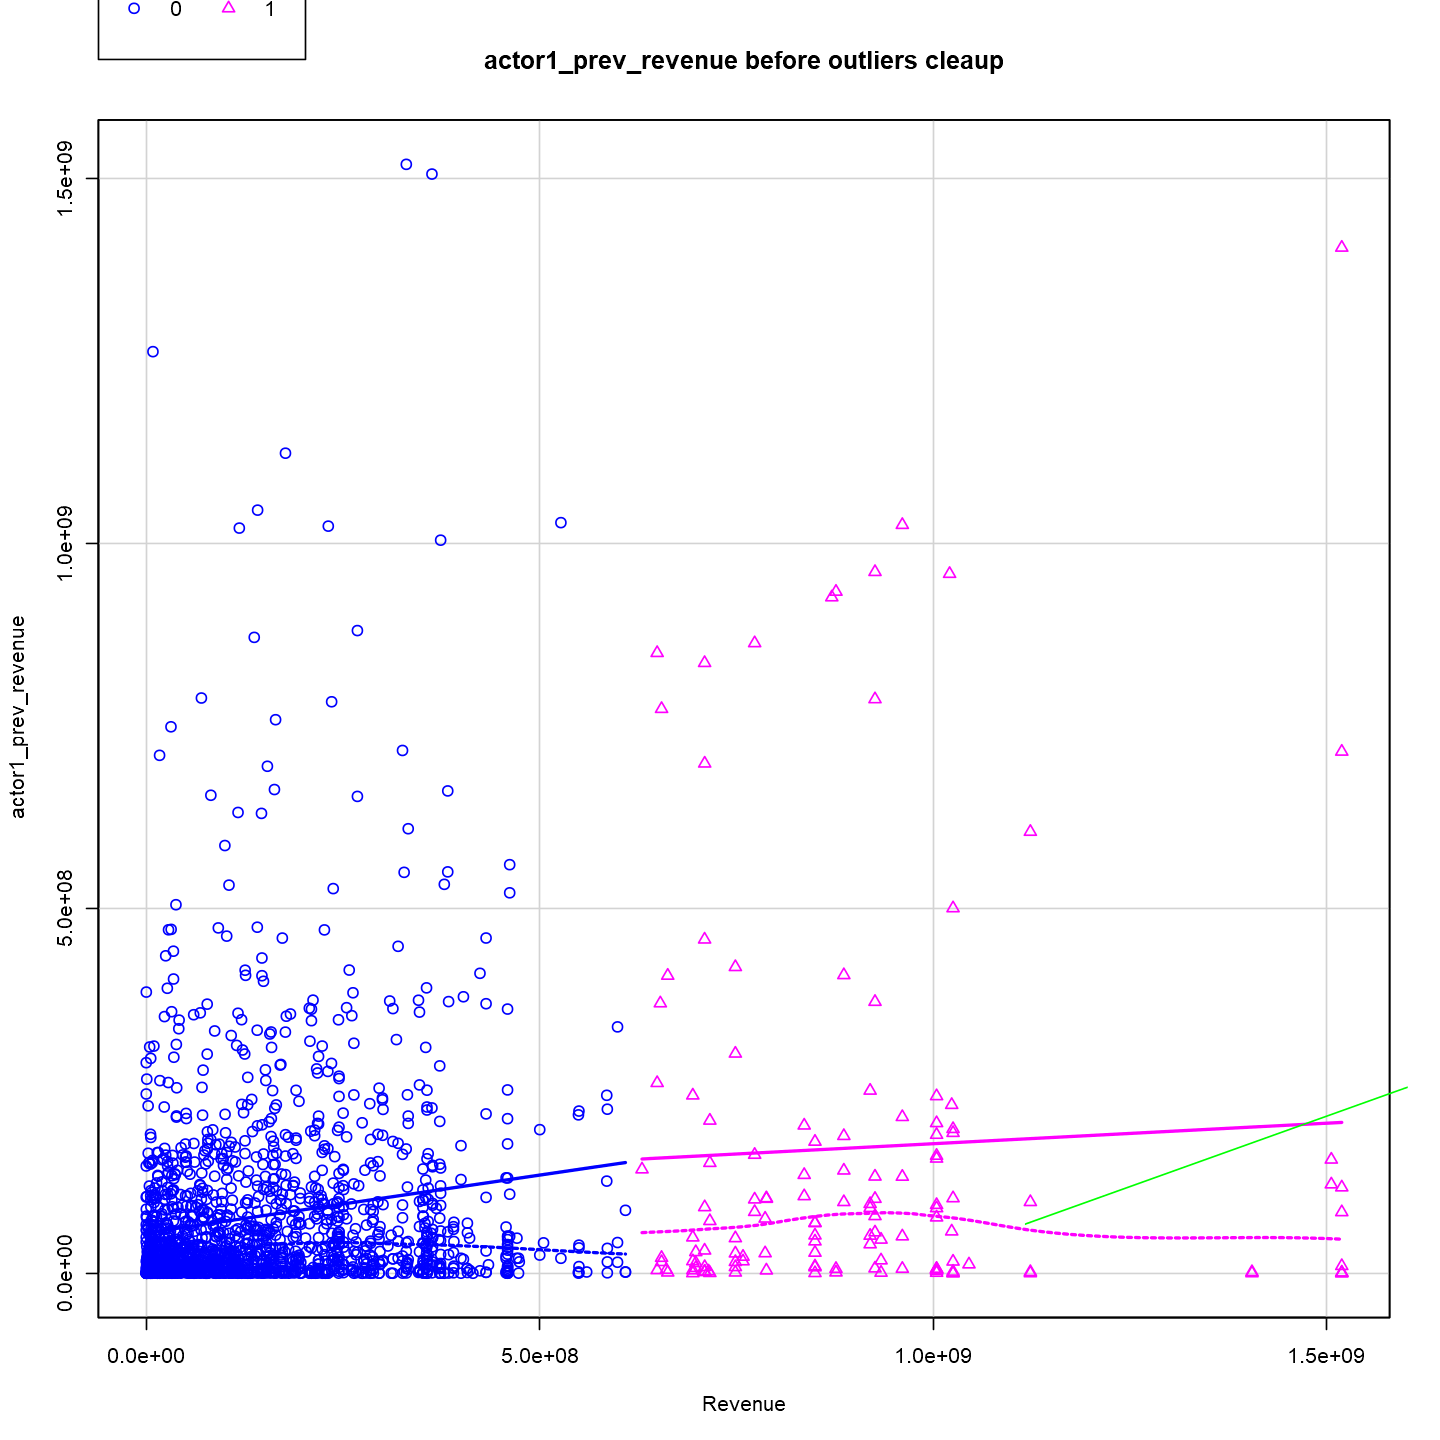

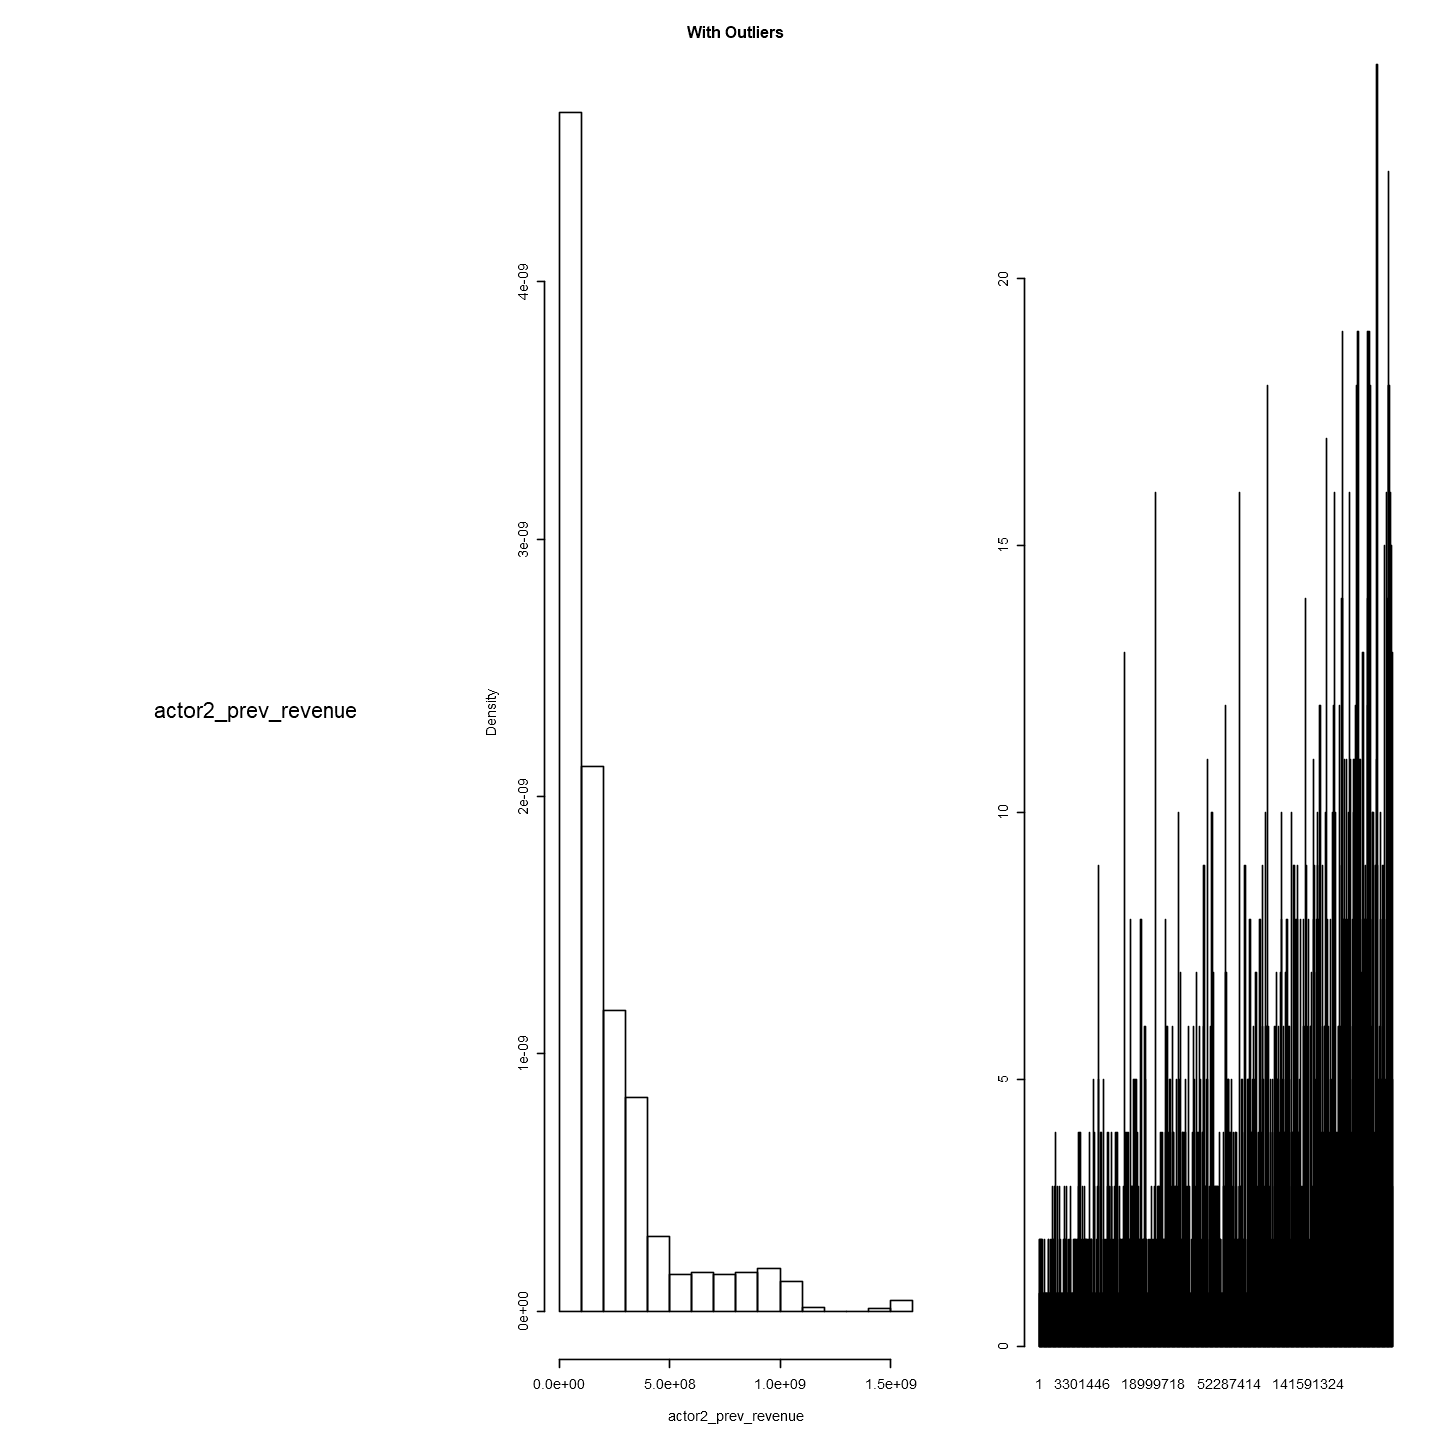

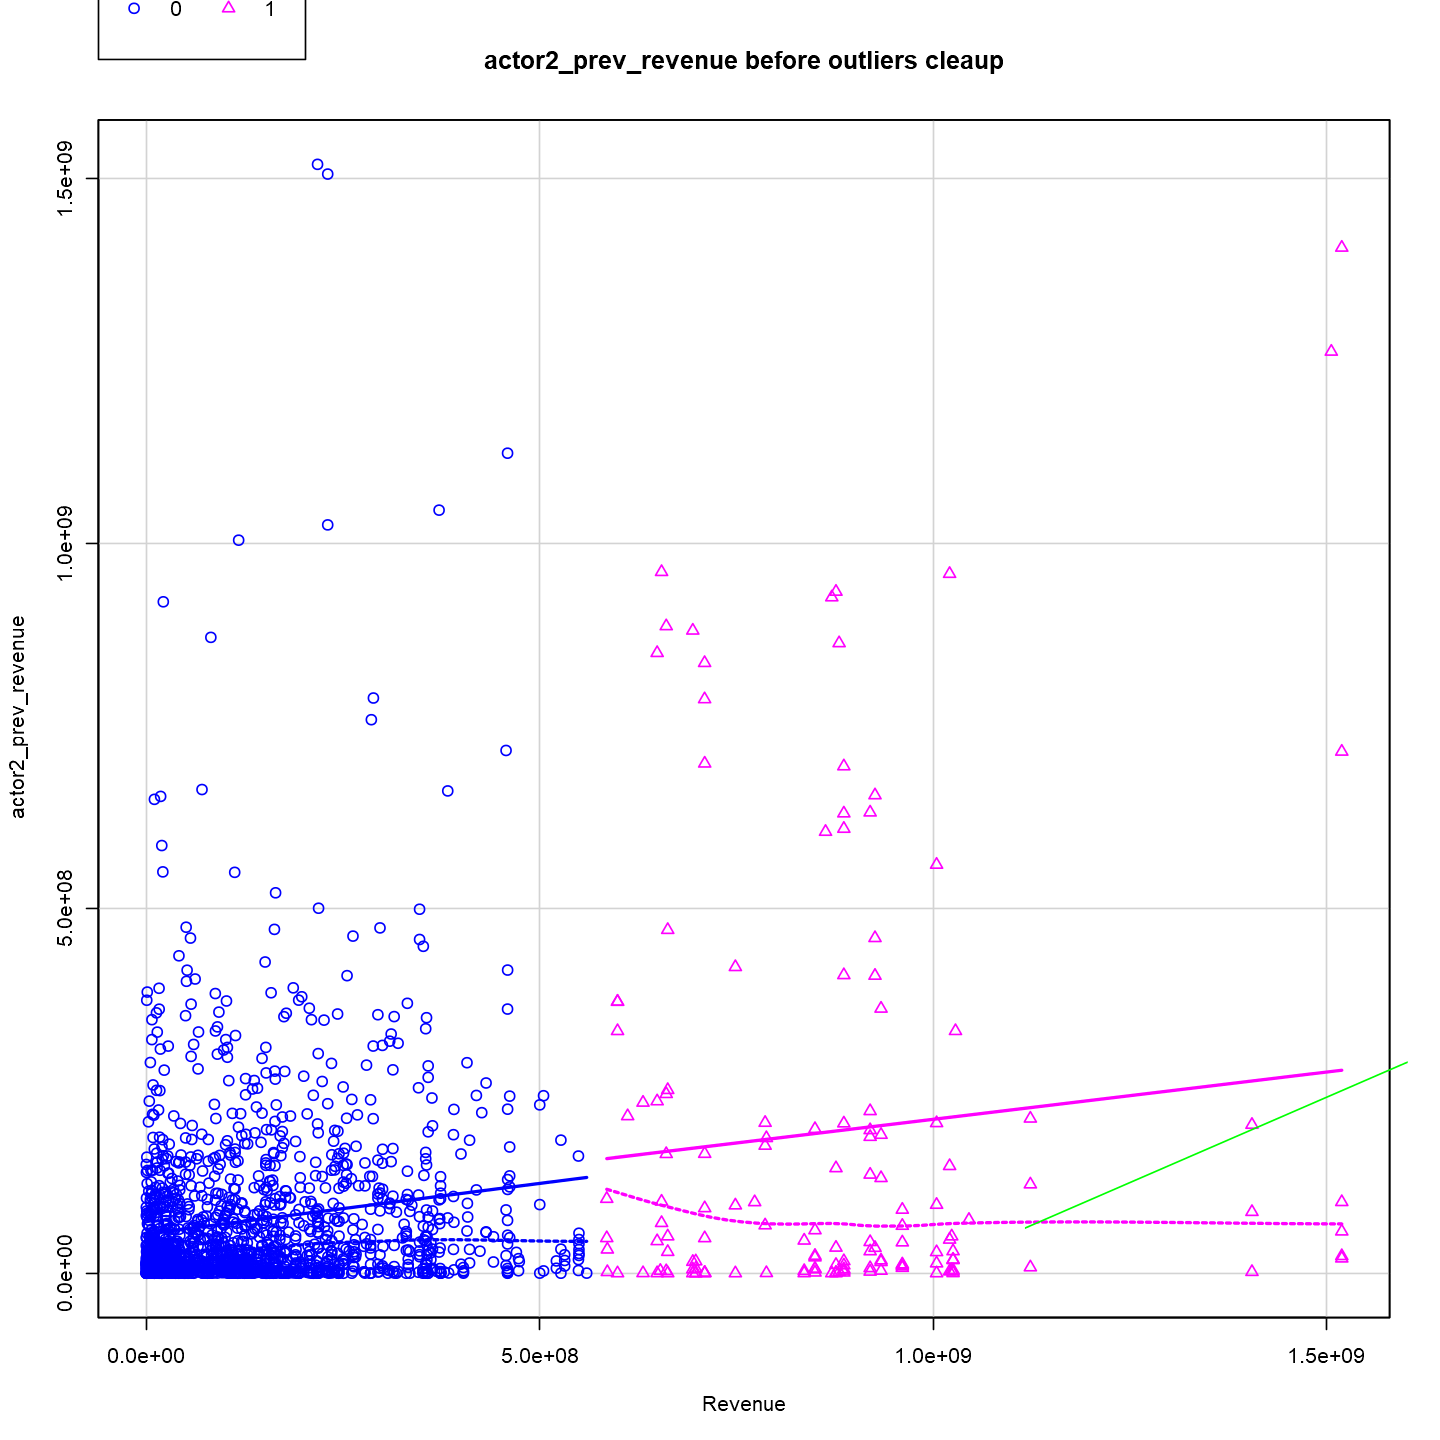

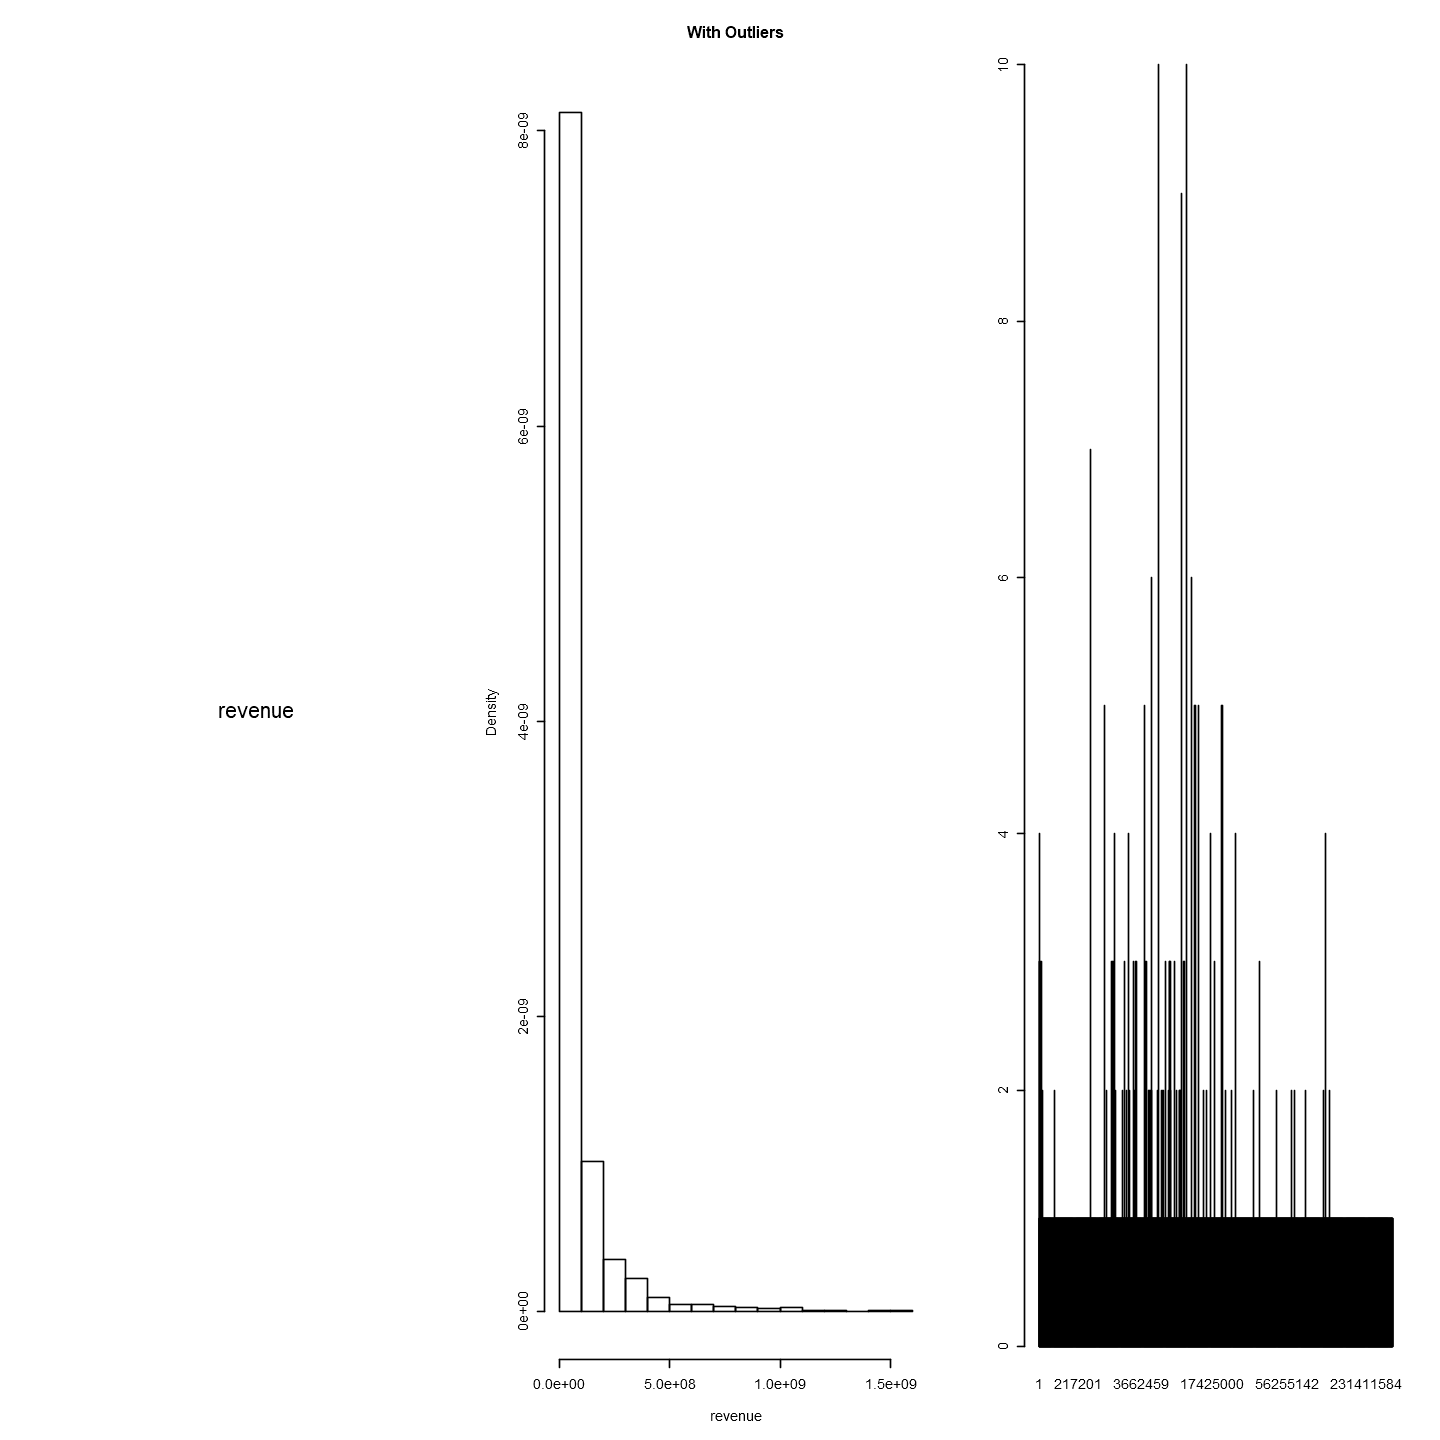

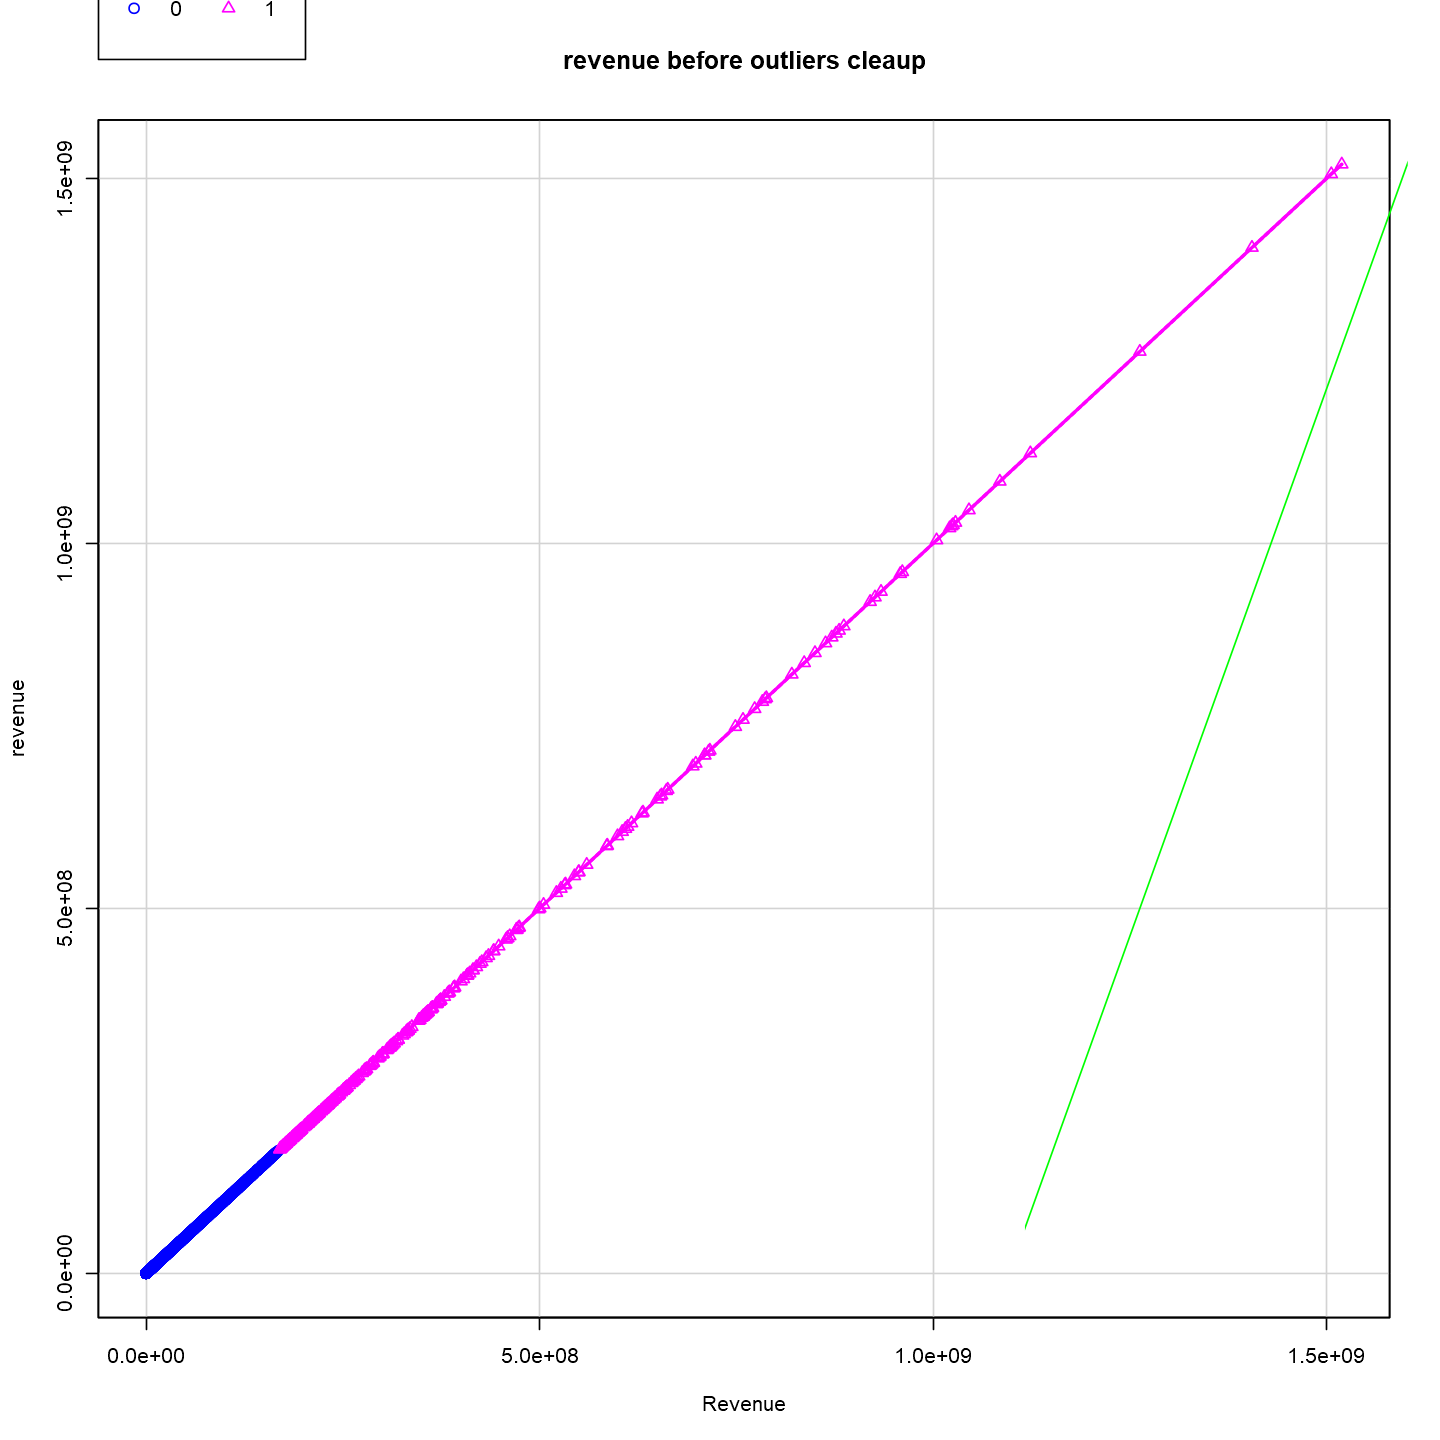

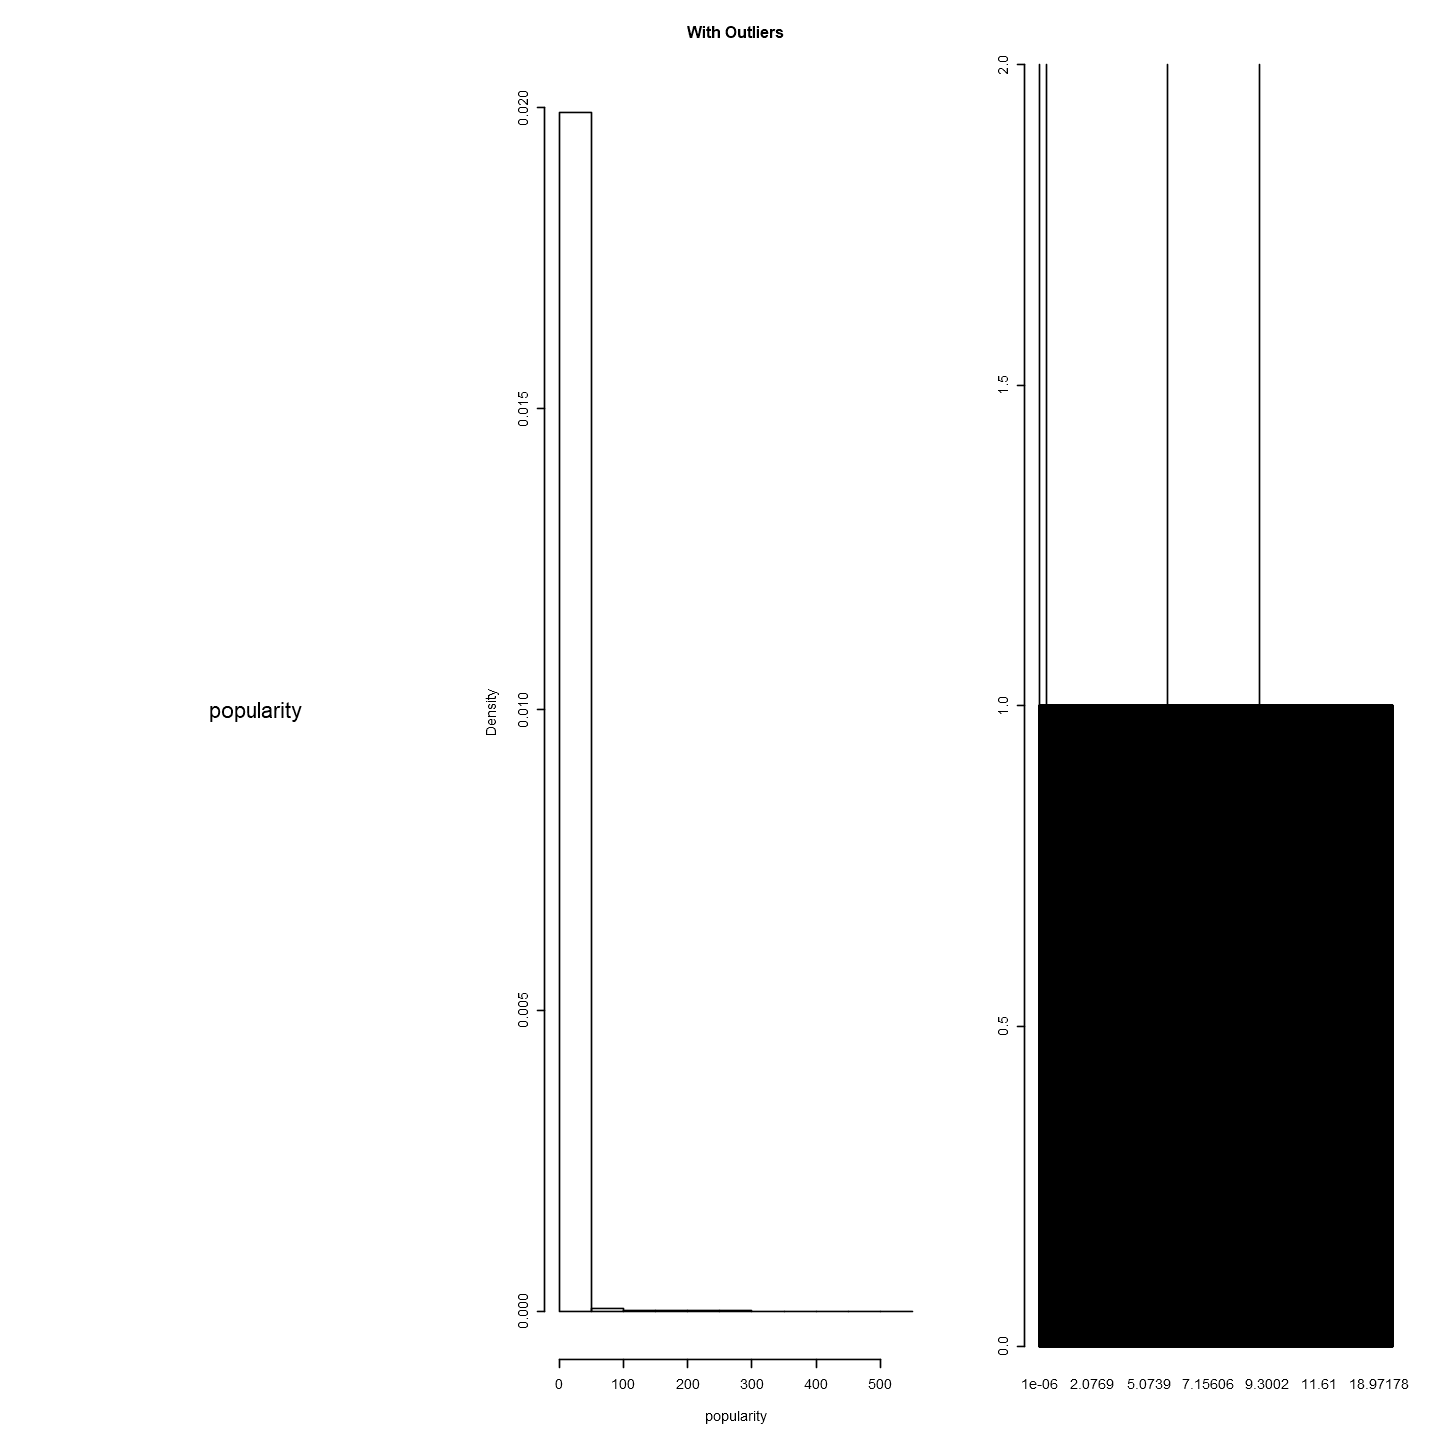

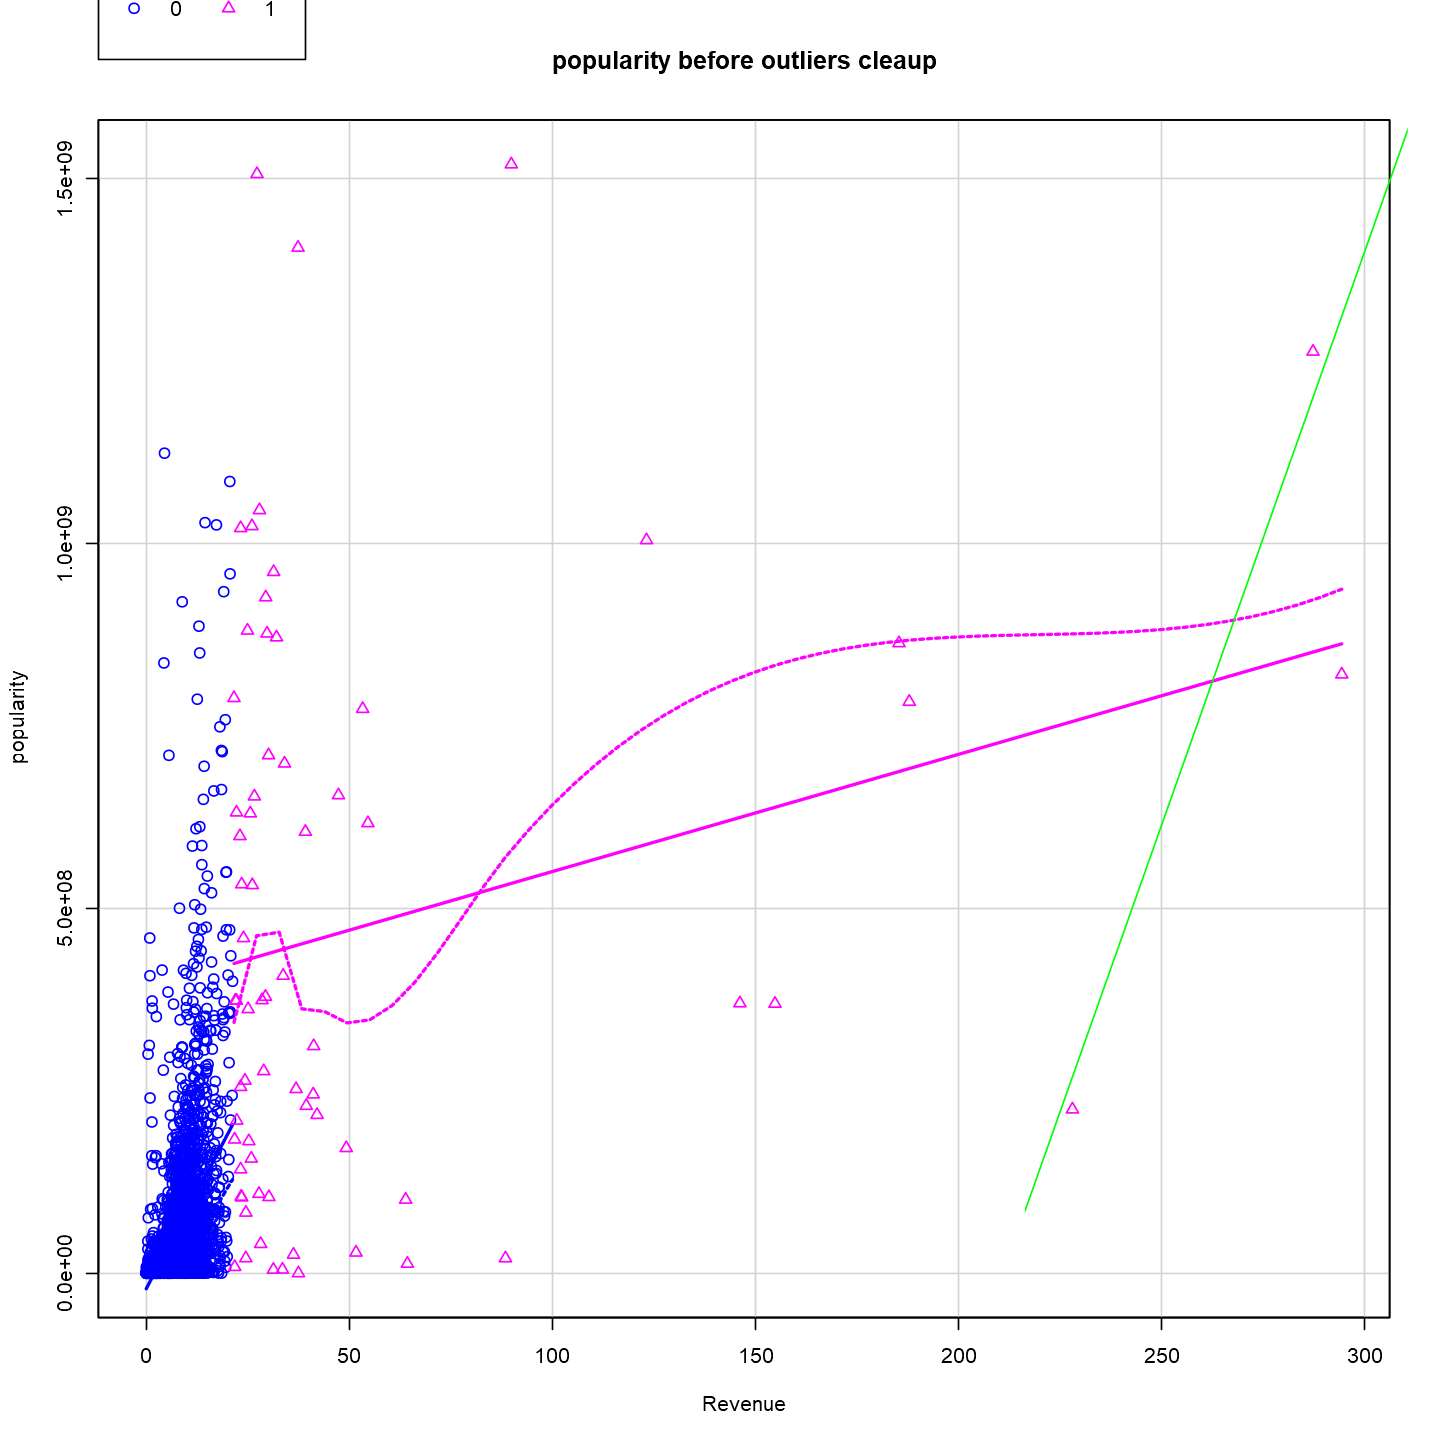

In [10]:

outlierMatrix <- function(data,threshold=1.5) {
  vn <- names(data)
  outdata <- data.frame(row1=1:nrow(data))
  for(v in vn) {
    if(is.numeric(data[[v]])) {
      med<- median(data[[v]], na.rm = T)
      outlow <- quantile(data[[v]],probs = 0.25,na.rm = T)
      outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
      irq_level <- (outhigh - outlow) * threshold
      outlow <- outlow - irq_level
      outhigh <- outhigh +  irq_level
      mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
      outdata[v] <- mv
    } else {
      mv <- rep(0,nrow(data))
    }
  }
  outdata$row1 <- NULL
  return(outdata)
}

outlierMatrixTrim <- function(data, v, threshold=1.5) {
  if(is.numeric(data[[v]])) {
    med<- median(data[[v]], na.rm = T)
    outlow <- quantile(data[[v]],probs = 0.25,na.rm = T)
    outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
    irq_level <- (outhigh - outlow) * threshold
    outlow <- outlow - irq_level
    outhigh <- outhigh +  irq_level

    data[data[[v]] < outlow, v]<-outlow

    data[data[[v]] > outhigh, v]<-outhigh

  } else {
    mv <- rep(0,nrow(data))
  }

  return(data)
}


movies_threshold<-2.0

out<-outlierMatrix(movies,threshold = movies_threshold)


ocmovies<-movies

options(repr.plot.width = 12, repr.plot.height = 12)
par(mfrow=c(1,3))
for(v in numerics) {
  #look on variable with some variability



    plot(c(0, 1), c(0, 1), ann = F, bty = 'n', type = 'n', xaxt = 'n', yaxt = 'n')
    text(x = 0.5, y = 0.5, v,
         cex = 1.6, col = "black")

    hist(movies[[v]], freq = FALSE, xlab = v,  main = "With Outliers")

    barplot(table(movies[[v]]))

    #dev.new(width=5, height=4)
    scatterplot(movies[['revenue']] ~ movies[[v]] | out[[v]],
                xlab=v, ylab="Revenue",
                main=paste(v, "before outliers cleaup"))
    abline(lm(ocmovies$revenue ~ movies[[v]]), col = 'green')




    ##############################
    #Handle outliers
    ##############################



}
par(mfrow=c(1,1))

